In [1]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import MCS as MCS
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd 
from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

/tmp/ipykernel_180451/894403247.py:17: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  from rdkit.Chem import MCS as MCS


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from rdkit.Chem import DataStructs
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


In [3]:
test_data= pd.read_csv("Test_data_DILIst_1111.csv")
train_data= pd.read_csv("Train_data_liv_tox_14256.csv")

In [4]:
train_data = train_data[~train_data.Source_rank.isin([2, 4, 9, 10, 12])].reset_index(drop=True)
train_data

smiles_r  TOXICITY  \
0                 CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12         1   
1      COc1cc2c(cc1OC)CC(=O)N(CCCN(C)CC1Cc3cc(OC)c(OC...         1   
2      CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...         1   
3                                             CNc1ccccc1         1   
4                   CCC1NC(=O)c2cc(S(N)(=O)=O)c(Cl)cc2N1         1   
...                                                  ...       ...   
12128  CC(C)C(Oc1ccc(CNC(=O)C2CCN(C(=O)CC(N)Cc3c(F)c(...         0   
12129                      O=C1CC(c2ccc(O)cc2)Oc2ccccc21         0   
12130                             CCCCSP(=O)(SCCCC)SCCCC         0   
12131                         O=C1CC(c2ccccc2)Oc2ccccc21         0   
12132                   O=C(O)CCC(=O)c1ccc(-c2ccccc2)cc1         0   

       Source_rank                                             Source    Data  \
0                3   human hepatotoxicity, hepatobiallry, literaty...  LivTox   
1                3   human hepatotoxicity, hepatobiallry, literaty...  LivTox   
2                3   human hepatotoxicity, hepatobiallry, literaty...  LivTox   
3                3   human hepatotoxicity, hepatobiallry, literaty...  LivTox   
4                3   human hepatotoxicity, hepatobiallry, literaty...  LivTox   
...            ...                                                ...     ...   
12128           16                Reactive Metabolite Mazzolari et al  LivTox   
12129           16                Reactive Metabolite Mazzolari et al  LivTox   
12130           16                Reactive Metabolite Mazzolari et al  LivTox   
12131           16                Reactive Metabolite Mazzolari et al  LivTox   
12132           16                Reactive Metabolite Mazzolari et al  LivTox   

                          InChIKey      InChIKey14  \
0      ABJKWBDEJIDSJZ-UHFFFAOYSA-N  ABJKWBDEJIDSJZ   
1      ACRHBAYQBXXRTO-UHFFFAOYSA-N  ACRHBAYQBXXRTO   
2      AEQGYUJKXATLBW-UHFFFAOYSA-N  AEQGYUJKXATLBW   
3      AFBPFSWMIHJQDM-UHFFFAOYSA-N  AFBPFSWMIHJQDM   
4      AGMMTXLNIQSRCG-UHFFFAOYSA-N  AGMMTXLNIQSRCG   
...                            ...             ...   
12128  ZFLVPOVMZBOEHJ-UHFFFAOYSA-N  ZFLVPOVMZBOEHJ   
12129  ZLHVIYHWWQYJID-UHFFFAOYSA-N  ZLHVIYHWWQYJID   
12130  ZOKXUAHZSKEQSS-UHFFFAOYSA-N  ZOKXUAHZSKEQSS   
12131  ZONYXWQDUYMKFB-UHFFFAOYSA-N  ZONYXWQDUYMKFB   
12132  ZPAKPRAICRBAOD-UHFFFAOYSA-N  ZPAKPRAICRBAOD   

                                     protonated_smiles_r  Mfp0  Mfp1  ...  \
0             C[NH+](Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12     0     0  ...   
1      COc1cc2c(cc1OC)CC(=O)[NH+](CCC[NH+](C)CC1Cc3cc...     0     0  ...   
2      CC(C)(C)CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)C=C...     0     0  ...   
3                                             CNc1ccccc1     0     0  ...   
4              CCC1NC(=O)c2cc(S(N)(=O)=O)c(Cl)cc2[NH2+]1     0     0  ...   
...                                                  ...   ...   ...  ...   
12128  CC(C)C(Oc1ccc(CNC(=O)C2CC[NH+](C(=O)CC([NH3+])...     0     1  ...   
12129                      O=C1CC(c2ccc(O)cc2)Oc2ccccc21     0     0  ...   
12130                             CCCCSP(=O)(SCCCC)SCCCC     0     0  ...   
12131                         O=C1CC(c2ccccc2)Oc2ccccc21     0     0  ...   
12132                O=C([O-])CCC(=O)c1ccc(-c2ccccc2)cc1     0     0  ...   

          SRW09      SRW10     TSRW10          MW       AMW   WPath  WPol  \
0      0.000000  10.085517  58.622510  318.221626  6.119647  1498.0  36.0   
1      5.293305  10.572726  78.667003  470.276975  6.531625  4157.0  58.0   
2      7.247793  10.915325  85.019190  458.266839  6.454463  3111.0  67.0   
3      0.000000   8.298291  35.247635  107.073499  6.298441    64.0   7.0   
4      0.000000   9.994653  51.598416  290.036066  9.356002   567.0  30.0   
...         ...        ...        ...         ...       ...     ...   ...   
12128  6.605298  10.533029  90.548061  572.217839  8.059406  6887.0  65.0   
12129  0.000000   9.860110  51.351894  240.0

In [5]:
train_data.to_csv("Train_data_liv_tox_12133.csv", index=False)

In [6]:
for i in train_data.Source_rank.unique():

 if (len(train_data[train_data["Source_rank"]==i]) != len(train_data[train_data["Source_rank"]==i].InChIKey14.unique())):
    print(i)

In [7]:
mfp_features = train_data.columns[8:2056]
#MACCS0 should be ignored, its a dummy variable
maccs_features= train_data.columns[2057:2223]
physicochemical_features= train_data.columns[2223:2238]
mordred_features= train_data.columns[2238:]
identifiers = train_data.columns[:8]

In [8]:
identifiers

Index(['smiles_r', 'TOXICITY', 'Source_rank', 'Source', 'Data', 'InChIKey',
       'InChIKey14', 'protonated_smiles_r'],
      dtype='object')

In [9]:
len(maccs_features)

166

In [10]:
len(mfp_features)

2048

In [11]:
len(physicochemical_features)

15

In [12]:
len(mordred_features)

1001

In [13]:
identifiers

Index(['smiles_r', 'TOXICITY', 'Source_rank', 'Source', 'Data', 'InChIKey',
       'InChIKey14', 'protonated_smiles_r'],
      dtype='object')

In [14]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=0.05):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select
selected_mfp_Features = fs_variance(train_data[mfp_features], threshold=0.05)
selected_maccs_Features = fs_variance(train_data[maccs_features], threshold=0.10)
selected_mordred_features = fs_variance(train_data[mordred_features], threshold=0.10)

print(len(selected_mfp_Features))
print(len(selected_maccs_Features))
print(len(selected_mordred_features))

89
100
653


In [15]:
print(len(list(identifiers)))
print(len(list(selected_mordred_features)))
print(len(list(selected_mfp_Features)))
print(len(list(selected_maccs_Features)))
print(len(list(physicochemical_features)))

8
653
89
100
15


In [16]:
89+100

189

In [17]:
653+15

668

In [18]:
668+189

857

In [19]:
all_features = list(identifiers)+ list(selected_mordred_features)  +list(selected_mfp_Features)+  list(selected_maccs_Features)+  list(physicochemical_features)
all_features

['smiles_r',
 'TOXICITY',
 'Source_rank',
 'Source',
 'Data',
 'InChIKey',
 'InChIKey14',
 'protonated_smiles_r',
 'ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpDiam_A',
 'SpAD_A',
 'LogEE_A',
 'VE1_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe'

In [20]:
len(all_features)

865

In [21]:
train_data = train_data[all_features]
test_data = test_data[all_features]

In [22]:
train_data.Source_rank.value_counts()

15    5239
7     2204
3     1163
8     1106
6      671
5      542
14     446
11     445
16     317
Name: Source_rank, dtype: int64

In [23]:
test_data

smiles_r  TOXICITY  \
0        C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1         1   
1     COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)O)=C(CSc3nnnn...         1   
2               CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1         1   
3     Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)...         1   
4                                    CC1OC1[P](=O)(=O)O         1   
...                                                 ...       ...   
1106         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1         0   
1107  CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...         0   
1108                         CCC(c1cccc(O)c1)C(C)CN(C)C         0   
1109                                     CC(N)Cc1ccccc1         0   
1110                              C[N+](C)(C)CC(=O)[O-]         0   

      Source_rank                              Source  Data  \
0               1         DILIst Classification  Oral  DILI   
1               1             DILIst Classification    DILI   
2               1             DILIst Classification    DILI   
3               1         DILIst Classification  oral  DILI   
4               1         DILIst Classification  Oral  DILI   
...           ...                                 ...   ...   
1106            1             DILIst Classification    DILI   
1107            1  DILIst Classification  Intravenous  DILI   
1108            1         DILIst Classification  Oral  DILI   
1109            1         DILIst Classification  Oral  DILI   
1110            1         DILIst Classification  Oral  DILI   

                         InChIKey      InChIKey14  \
0     AAKJLRGGTJKAMG-UHFFFAOYSA-N  AAKJLRGGTJKAMG   
1     UHRBTBZOWWGKMK-UHFFFAOYSA-N  UHRBTBZOWWGKMK   
2     UIEATEWHFDRYRU-UHFFFAOYSA-N  UIEATEWHFDRYRU   
3     UIOFUWFRIANQPC-UHFFFAOYSA-N  UIOFUWFRIANQPC   
4     UJNUDOLLRRCQDH-UHFFFAOYSA-N  UJNUDOLLRRCQDH   
...                           ...             ...   
1106  KYRVNWMVYQXFEU-UHFFFAOYSA-N  KYRVNWMVYQXFEU   
1107  KXNPVXPOPUZYGB-UHFFFAOYSA-N  KXNPVXPOPUZYGB   
1108  KWTWDQCKEHXFFR-UHFFFAOYSA-N  KWTWDQCKEHXFFR   
1109  KWTSXDURSIMDCE-UHFFFAOYSA-N  KWTSXDURSIMDCE   
1110  KWIUHFFTVRNATP-UHFFFAOYSA-N  KWIUHFFTVRNATP   

                                    protonated_smiles_r        ABC      ABCGG  \
0        C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1  21.798990  16.570489   
1     COC1(NC(=O)CSC(F)F)C(=O)[NH+]2C(C(=O)[O-])=C(C...  24.332110  20.403834   
2           CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)[NH+]1CCCC1  20.643996  17.133953   
3     Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)[NH+]2C1S...  23.871199  20.653733   
4                                    CC1OC1[P](=O)(=O)O   6.140950   6.624294   
...                                                 ...        ...        ...   
1106         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1  16.360915  13.772089   
1107  CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...  26.942267  21.807837   
1108                     CCC(c1cccc(O)c1)C(C)C[NH+](C)C  11.670387  10.989759   
1109                                CC([NH3+])Cc1ccccc1   7.289847   6.783462   
1110                              C[N+](C)(C)CC(=O)[O-]   5.645283   5.873928   

      ...  n_HBD      Fsp3     logP  NHOHCount  NOCount  NumHeteroatoms  \
0     ...    1.0  0.272727  2.82700        1.0      7.0             7.0   
1     ...    3.0  0.600000 -4.04240        3.0     13.0            17.0   
2     ...    1.0  0.500000  3.41310        1.0      3.0             3.0   
3     ...    2.0  0.368421 -0.06398        2.0      8.0            11.0   
4     ...    1.0  1.000000  0.34710        1.0      4.0             5.0   
...   ...    ...       ...      ...        ...      ...             ...   
1106  ...    2.0  0.071429  2.45560        2.0      6.0             7.0   
1107  ...    6.0  0.608696 -3.96830        8.0     11.0            12.0   
1108  ...    2.0  0.571429  1.66640        2.0      2.0             2.0   
1109  ...    1.0  0.333333  0.85950        3.0      1.0             1.0   
1110  ...    0.0  0.800000

In [24]:
test_data_ncv= pd.read_csv("test_data_ncv_DILIst_888.csv")
test_data_heldouttest= pd.read_csv("test_data_heldouttest_DILIst_223.csv")

In [25]:
test_data_heldouttest

smiles_r  TOXICITY  Source_rank  \
0       C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1         1            1   
1                                   CC1OC1[P](=O)(=O)O         1            1   
2                   CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1         1            1   
3    COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...         1            1   
4                   CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21         1            1   
..                                                 ...       ...          ...   
218                       ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl         0            1   
219       Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O         0            1   
220                            C=Cc1ccc(S(=O)(=O)O)cc1         0            1   
221                               OCC(O)c1oc(O)c(O)c1O         0            1   
222           CC1(Cn2ccnn2)C(C(=O)O)N2C(=O)CC2S1(=O)=O         0            1   

                                             Source  Data  \
0                       DILIst Classification  Oral  DILI   
1                       DILIst Classification  Oral  DILI   
2                       DILIst Classification  Oral  DILI   
3                       DILIst Classification  Oral  DILI   
4                       DILIst Classification  Oral  DILI   
..                                              ...   ...   
218                  DILIst Classification  Topical  DILI   
219                     DILIst Classification  Oral  DILI   
220                     DILIst Classification  Oral  DILI   
221              DILIst Classification  Intravenous  DILI   
222  DILIst Classification  Intravenous; Parenteral  DILI   

                        InChIKey      InChIKey14  \
0    AAKJLRGGTJKAMG-UHFFFAOYSA-N  AAKJLRGGTJKAMG   
1    UJNUDOLLRRCQDH-UHFFFAOYSA-N  UJNUDOLLRRCQDH   
2    UNAANXDKBXWMLN-UHFFFAOYSA-N  UNAANXDKBXWMLN   
3    UXOWGYHJODZGMF-UHFFFAOYSA-N  UXOWGYHJODZGMF   
4    VGKDLMBJGBXTGI-UHFFFAOYSA-N  VGKDLMBJGBXTGI   
..                           ...             ...   
218  JLYXXMFPNIAWKQ-UHFFFAOYSA-N  JLYXXMFPNIAWKQ   
219  JAUORDHNHDCTAS-UHFFFAOYSA-N  JAUORDHNHDCTAS   
220  MAGFQRLKWCCTQJ-UHFFFAOYSA-N  MAGFQRLKWCCTQJ   
221  LPYXWGMUVRGUOY-UHFFFAOYSA-N  LPYXWGMUVRGUOY   
222  LPQZKKCYTLCDGQ-UHFFFAOYSA-N  LPQZKKCYTLCDGQ   

                                   protonated_smiles_r  Mfp0  Mfp1  ...  \
0       C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1     0     0  ...   
1                                   CC1OC1[P](=O)(=O)O     0     0  ...   
2               CC(C)CC([NH+](C)C)C1(c2ccc(Cl)cc2)CCC1     0     1  ...   
3    COCCCOc1cc(CC(CC([NH3+])C(O)CC(C(=O)NCC(C)(C)C...     0     1  ...   
4              C[NH2+]C1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21     0     0  ...   
..                                                 ...   ...   ...  ...   
218                       ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl     0     0  ...   
219       Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O     0     0  ...   
220                         C=Cc1ccc(S(=O)(=O)[O-])cc1     0     0  ...   
221                               OCC(O)c1oc(O)c(O)c1O     0     1  ...   
222    CC1(Cn2ccnn2)C(C(=O)[O-])[NH+]2C(=O)CC2S1(=O)=O     0     0  ...   

        SRW09      SRW10     TSRW10          MW        AMW   WPath  WPol  \
0    0.000000  10.116298  64.016835  393.168856   7.560940  2396.0  43.0   
1    7.753194   9.180603  57.029675  137.000370   9.785741    61.0   7.0   
2    0.000000  10.141756  53.045750  280.182654   6.090927   666.0  29.0   
3    0.000000  10.297521  75.192100  552.400713   5.939793  5882.0  58.0   
4    0.000000  10.027694  53.970324  306.081081   8.054765   770.0  34.0   
..        ...        ...        ...         ...        ...     ...   ...   
218  0.000000   9.542876  43.309911  287.860066  15.992226   174.0  21.0   
219  0.000000  10.364040  61.506713  366.102272   8.135606  1705.0  47.0   
220  0.000000   9.246190  42.667356  183.012139   9.632218   201.0  15.0   
221  6.985642   9.261509  56.914288  176.032088   8.80

In [26]:
test_data_ncv

smiles_r  TOXICITY  Source_rank  \
0    COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)O)=C(CSc3nnnn...         1            1   
1              CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1         1            1   
2    Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)...         1            1   
3    CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...         1            1   
4               Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2         1            1   
..                                                 ...       ...          ...   
883         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1         0            1   
884  CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...         0            1   
885                         CCC(c1cccc(O)c1)C(C)CN(C)C         0            1   
886                                     CC(N)Cc1ccccc1         0            1   
887                              C[N+](C)(C)CC(=O)[O-]         0            1   

                                 Source  Data                     InChIKey  \
0               DILIst Classification    DILI  UHRBTBZOWWGKMK-UHFFFAOYSA-N   
1               DILIst Classification    DILI  UIEATEWHFDRYRU-UHFFFAOYSA-N   
2           DILIst Classification  oral  DILI  UIOFUWFRIANQPC-UHFFFAOYSA-N   
3           DILIst Classification  Oral  DILI  ULGZDMOVFRHVEP-UHFFFAOYSA-N   
4               DILIst Classification    DILI  UMSGKTJDUHERQW-UHFFFAOYSA-N   
..                                  ...   ...                          ...   
883             DILIst Classification    DILI  KYRVNWMVYQXFEU-UHFFFAOYSA-N   
884  DILIst Classification  Intravenous  DILI  KXNPVXPOPUZYGB-UHFFFAOYSA-N   
885         DILIst Classification  Oral  DILI  KWTWDQCKEHXFFR-UHFFFAOYSA-N   
886         DILIst Classification  Oral  DILI  KWTSXDURSIMDCE-UHFFFAOYSA-N   
887         DILIst Classification  Oral  DILI  KWIUHFFTVRNATP-UHFFFAOYSA-N   

         InChIKey14                                protonated_smiles_r  Mfp0  \
0    UHRBTBZOWWGKMK  COC1(NC(=O)CSC(F)F)C(=O)[NH+]2C(C(=O)[O-])=C(C...     0   
1    UIEATEWHFDRYRU        CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)[NH+]1CCCC1     0   
2    UIOFUWFRIANQPC  Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)[NH+]2C1S...     0   
3    ULGZDMOVFRHVEP  CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...     0   
4    UMSGKTJDUHERQW             Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2     0   
..              ...                                                ...   ...   
883  KYRVNWMVYQXFEU         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1     0   
884  KXNPVXPOPUZYGB  CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...     0   
885  KWTWDQCKEHXFFR                     CCC(c1cccc(O)c1)C(C)C[NH+](C)C     0   
886  KWTSXDURSIMDCE                                CC([NH3+])Cc1ccccc1     0   
887  KWIUHFFTVRNATP                              C[N+](C)(C)CC(=O)[O-]     0   

     Mfp1  ...     SRW09      SRW10     TSRW10          MW        AMW   WPath  \
0       1  ...  6.555357  10.733545  82.269503  496.064645   9.921293  3113.0   
1       1  ...  6.293419   9.845276  74.440588  367.274390   5.923780  1895.0   
2       0  ...  7.853605  10.768843  83.380114  453.056148   9.639493  2402.0   
3       0  ...  0.000000  11.023323  89.748896  734.468518   6.172004  8842.0   
4       0  ...  7.618251  10.155063  72.828985  391.949807  12.248431   921.0   
..    ...  ...       ...        ...        ...         ...        ...     ...   
883     0  ...  7.285507   9.858333  70.378545  301.052112   9.407879   994.0   
884     1  ...  0.000000  10.488075  71.463013  509.254066   7.072973  3704.0   
885     1  ...  0.000000   9.353834  47.590867  222.185241   5.554631   448.0   
886     1  ...  0.000000   8.564268  38.519688  136.112076   5.671336   126.0   
887     0  ...  0.000000   8.379080  35.393001  117.078979   6.162052    66.0   

      WPol  Zagreb1  Zagreb2   mZagreb2  
0     51.0    166.0    200.0   7.250000  
1     34.0    132.0    148.0   6.138889  
2     53.0    170.0    211.0   6.291667  
3    101.0    270.0    324.0  11.0

In [27]:
test_data_ncv = test_data_ncv[all_features]
test_data_heldouttest = test_data_heldouttest[all_features]

In [28]:
test_data_ncv

smiles_r  TOXICITY  Source_rank  \
0    COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)O)=C(CSc3nnnn...         1            1   
1              CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1         1            1   
2    Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)...         1            1   
3    CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...         1            1   
4               Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2         1            1   
..                                                 ...       ...          ...   
883         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1         0            1   
884  CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...         0            1   
885                         CCC(c1cccc(O)c1)C(C)CN(C)C         0            1   
886                                     CC(N)Cc1ccccc1         0            1   
887                              C[N+](C)(C)CC(=O)[O-]         0            1   

                                 Source  Data                     InChIKey  \
0               DILIst Classification    DILI  UHRBTBZOWWGKMK-UHFFFAOYSA-N   
1               DILIst Classification    DILI  UIEATEWHFDRYRU-UHFFFAOYSA-N   
2           DILIst Classification  oral  DILI  UIOFUWFRIANQPC-UHFFFAOYSA-N   
3           DILIst Classification  Oral  DILI  ULGZDMOVFRHVEP-UHFFFAOYSA-N   
4               DILIst Classification    DILI  UMSGKTJDUHERQW-UHFFFAOYSA-N   
..                                  ...   ...                          ...   
883             DILIst Classification    DILI  KYRVNWMVYQXFEU-UHFFFAOYSA-N   
884  DILIst Classification  Intravenous  DILI  KXNPVXPOPUZYGB-UHFFFAOYSA-N   
885         DILIst Classification  Oral  DILI  KWTWDQCKEHXFFR-UHFFFAOYSA-N   
886         DILIst Classification  Oral  DILI  KWTSXDURSIMDCE-UHFFFAOYSA-N   
887         DILIst Classification  Oral  DILI  KWIUHFFTVRNATP-UHFFFAOYSA-N   

         InChIKey14                                protonated_smiles_r  \
0    UHRBTBZOWWGKMK  COC1(NC(=O)CSC(F)F)C(=O)[NH+]2C(C(=O)[O-])=C(C...   
1    UIEATEWHFDRYRU        CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)[NH+]1CCCC1   
2    UIOFUWFRIANQPC  Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)[NH+]2C1S...   
3    ULGZDMOVFRHVEP  CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...   
4    UMSGKTJDUHERQW             Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2   
..              ...                                                ...   
883  KYRVNWMVYQXFEU         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1   
884  KXNPVXPOPUZYGB  CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...   
885  KWTWDQCKEHXFFR                     CCC(c1cccc(O)c1)C(C)C[NH+](C)C   
886  KWTSXDURSIMDCE                                CC([NH3+])Cc1ccccc1   
887  KWIUHFFTVRNATP                              C[N+](C)(C)CC(=O)[O-]   

           ABC      ABCGG  ...  n_HBD      Fsp3     logP  NHOHCount  NOCount  \
0    24.332110  20.403834  ...    3.0  0.600000 -4.04240        3.0     13.0   
1    20.643996  17.133953  ...    1.0  0.500000  3.41310        1.0      3.0   
2    23.871199  20.653733  ...    2.0  0.368421 -0.06398        2.0      8.0   
3    39.002040  32.313871  ...    6.0  0.945946  0.36850        6.0     14.0   
4    17.722758  15.010475  ...    0.0  0.133333  4.40412        0.0      4.0   
..         ...        ...  ...    ...       ...      ...        ...      ...   
883  16.360915  13.772089  ...    2.0  0.071429  2.45560        2.0      6.0   
884  26.942267  21.807837  ...    6.0  0.608696 -3.96830        8.0     11.0   
885  11.670387  10.989759  ...    2.0  0.571429  1.66640        2.0      2.0   
886   7.289847   6.783462  ...    1.0  0.333333  0.85950        3.0      1.0   
887   5.645283   5.873928  ...    0.0  0.800000 -1.55750        0.0      3.0   

     NumHeteroatoms  n_positive  _n_negative  n_ring_asmbl  n_stereo  
0              17.0        33.0         17.0           0.0       6.0  
1               3.0        45.0         17.0           0.0       2.0  
2              11.0        30.0         17.0           1.0       8.0  
3 

In [29]:
test_data_ncv['TOXICITY']

0      1
1      1
2      1
3      1
4      1
      ..
883    0
884    0
885    0
886    0
887    0
Name: TOXICITY, Length: 888, dtype: int64

In [30]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data", "InChIKey", "InChIKey14", "protonated_smiles_r"] , axis = 1)

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [31]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data", "InChIKey", "InChIKey14", "protonated_smiles_r"] , axis = 1)

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [32]:
test_feature_list

['ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpDiam_A',
 'SpAD_A',
 'LogEE_A',
 'VE1_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe',
 'ATS6pe',
 'ATS7pe',
 'ATS8pe',
 'ATS0are',
 'ATS1are',
 'ATS2are',
 'ATS3are',
 'ATS4are',
 'ATS5are',
 'ATS6a

In [33]:
#Write to file
len(test_feature_list)
f = open("features_morgan_mordred_maccs_physc.txt", "w")
for item in test_feature_list:
   f.write(item + "\n")
f.close()

file = open("features_morgan_mordred_maccs_physc.txt", "r")
file_lines = file.read()
all_features = file_lines.split("\n")
all_features = all_features[:-1]
len(all_features)

857

In [34]:
from collections import Counter
#from imblearn.over_sampling import SMOTE
import pickle

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from scipy.stats import randint
from numpy import argmax
from sklearn.model_selection import HalvingRandomSearchCV

In [36]:
train_data.Source_rank.unique()

array([ 3,  5,  6,  7,  8, 11, 14, 15, 16])

In [38]:
#Run 3a and 3b now

#Adding predictions for Cmax to the predicted proxy data
for column in ["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]:
    
    regressor = pickle.load(open(f"bestlivmodel_{column}_model.sav", 'rb'))
    
    #Add predictions to held out test set dili
    y_pred = regressor.predict(X_heldouttest)
    test_data_heldouttest[column]=y_pred
    
    #Add predictions to NCV compounds  dili
    y_pred = regressor.predict(X_ncv)
    test_data_ncv[column]=y_pred

/tmp/ipykernel_180451/1003446586.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_heldouttest[column]=y_pred
/tmp/ipykernel_180451/1003446586.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[column]=y_pred
/tmp/ipykernel_180451/1003446586.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [39]:
test_data_heldouttest

smiles_r  TOXICITY  Source_rank  \
0       C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1         1            1   
1                                   CC1OC1[P](=O)(=O)O         1            1   
2                   CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1         1            1   
3    COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...         1            1   
4                   CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21         1            1   
..                                                 ...       ...          ...   
218                       ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl         0            1   
219       Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O         0            1   
220                            C=Cc1ccc(S(=O)(=O)O)cc1         0            1   
221                               OCC(O)c1oc(O)c(O)c1O         0            1   
222           CC1(Cn2ccnn2)C(C(=O)O)N2C(=O)CC2S1(=O)=O         0            1   

                                             Source  Data  \
0                       DILIst Classification  Oral  DILI   
1                       DILIst Classification  Oral  DILI   
2                       DILIst Classification  Oral  DILI   
3                       DILIst Classification  Oral  DILI   
4                       DILIst Classification  Oral  DILI   
..                                              ...   ...   
218                  DILIst Classification  Topical  DILI   
219                     DILIst Classification  Oral  DILI   
220                     DILIst Classification  Oral  DILI   
221              DILIst Classification  Intravenous  DILI   
222  DILIst Classification  Intravenous; Parenteral  DILI   

                        InChIKey      InChIKey14  \
0    AAKJLRGGTJKAMG-UHFFFAOYSA-N  AAKJLRGGTJKAMG   
1    UJNUDOLLRRCQDH-UHFFFAOYSA-N  UJNUDOLLRRCQDH   
2    UNAANXDKBXWMLN-UHFFFAOYSA-N  UNAANXDKBXWMLN   
3    UXOWGYHJODZGMF-UHFFFAOYSA-N  UXOWGYHJODZGMF   
4    VGKDLMBJGBXTGI-UHFFFAOYSA-N  VGKDLMBJGBXTGI   
..                           ...             ...   
218  JLYXXMFPNIAWKQ-UHFFFAOYSA-N  JLYXXMFPNIAWKQ   
219  JAUORDHNHDCTAS-UHFFFAOYSA-N  JAUORDHNHDCTAS   
220  MAGFQRLKWCCTQJ-UHFFFAOYSA-N  MAGFQRLKWCCTQJ   
221  LPYXWGMUVRGUOY-UHFFFAOYSA-N  LPYXWGMUVRGUOY   
222  LPQZKKCYTLCDGQ-UHFFFAOYSA-N  LPQZKKCYTLCDGQ   

                                   protonated_smiles_r        ABC      ABCGG  \
0       C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1  21.798990  16.570489   
1                                   CC1OC1[P](=O)(=O)O   6.140950   6.624294   
2               CC(C)CC([NH+](C)C)C1(c2ccc(Cl)cc2)CCC1  14.525425  13.493219   
3    COCCCOc1cc(CC(CC([NH3+])C(O)CC(C(=O)NCC(C)(C)C...  28.615700  24.127835   
4              C[NH2+]C1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21  15.572928  12.623559   
..                                                 ...        ...        ...   
218                       ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   8.898979   8.883053   
219       Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O  20.620135  15.444462   
220                         C=Cc1ccc(S(=O)(=O)[O-])cc1   8.900428   8.287109   
221                               OCC(O)c1oc(O)c(O)c1O   8.761080   9.017795   
222    CC1(Cn2ccnn2)C(C(=O)[O-])[NH+]2C(=O)CC2S1(=O)=O  15.981561  15.139991   

     ...    logP  NHOHCount  NOCount  NumHeteroatoms  n_positive  _n_negative  \
0    ...  2.8270        1.0      7.0             7.0        38.0         14.0   
1    ...  0.3471        1.0      4.0             5.0         9.0          5.0   
2    ...  3.3209        1.0      1.0             2.0        33.0         13.0   
3    ...  2.5767        7.0      9.0             9.0        69.0         24.0   
4    ...  4.1534        2.0      1.0             3.0        25.0         13.0   
..   ...     ...        ...      ...             ...         ...          ...   
218  ...  3.6444        0.0      0.0             6.0        12.0          6.0   
219  ...  5.9611        3.0      3.0             4.0        26.0         19.0   
220  ...  1.2337        0

In [40]:
test_data_ncv

smiles_r  TOXICITY  Source_rank  \
0    COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)O)=C(CSc3nnnn...         1            1   
1              CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1         1            1   
2    Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)...         1            1   
3    CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...         1            1   
4               Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2         1            1   
..                                                 ...       ...          ...   
883         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1         0            1   
884  CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...         0            1   
885                         CCC(c1cccc(O)c1)C(C)CN(C)C         0            1   
886                                     CC(N)Cc1ccccc1         0            1   
887                              C[N+](C)(C)CC(=O)[O-]         0            1   

                                 Source  Data                     InChIKey  \
0               DILIst Classification    DILI  UHRBTBZOWWGKMK-UHFFFAOYSA-N   
1               DILIst Classification    DILI  UIEATEWHFDRYRU-UHFFFAOYSA-N   
2           DILIst Classification  oral  DILI  UIOFUWFRIANQPC-UHFFFAOYSA-N   
3           DILIst Classification  Oral  DILI  ULGZDMOVFRHVEP-UHFFFAOYSA-N   
4               DILIst Classification    DILI  UMSGKTJDUHERQW-UHFFFAOYSA-N   
..                                  ...   ...                          ...   
883             DILIst Classification    DILI  KYRVNWMVYQXFEU-UHFFFAOYSA-N   
884  DILIst Classification  Intravenous  DILI  KXNPVXPOPUZYGB-UHFFFAOYSA-N   
885         DILIst Classification  Oral  DILI  KWTWDQCKEHXFFR-UHFFFAOYSA-N   
886         DILIst Classification  Oral  DILI  KWTSXDURSIMDCE-UHFFFAOYSA-N   
887         DILIst Classification  Oral  DILI  KWIUHFFTVRNATP-UHFFFAOYSA-N   

         InChIKey14                                protonated_smiles_r  \
0    UHRBTBZOWWGKMK  COC1(NC(=O)CSC(F)F)C(=O)[NH+]2C(C(=O)[O-])=C(C...   
1    UIEATEWHFDRYRU        CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)[NH+]1CCCC1   
2    UIOFUWFRIANQPC  Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)[NH+]2C1S...   
3    ULGZDMOVFRHVEP  CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...   
4    UMSGKTJDUHERQW             Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2   
..              ...                                                ...   
883  KYRVNWMVYQXFEU         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1   
884  KXNPVXPOPUZYGB  CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...   
885  KWTWDQCKEHXFFR                     CCC(c1cccc(O)c1)C(C)C[NH+](C)C   
886  KWTSXDURSIMDCE                                CC([NH3+])Cc1ccccc1   
887  KWIUHFFTVRNATP                              C[N+](C)(C)CC(=O)[O-]   

           ABC      ABCGG  ...     logP  NHOHCount  NOCount  NumHeteroatoms  \
0    24.332110  20.403834  ... -4.04240        3.0     13.0            17.0   
1    20.643996  17.133953  ...  3.41310        1.0      3.0             3.0   
2    23.871199  20.653733  ... -0.06398        2.0      8.0            11.0   
3    39.002040  32.313871  ...  0.36850        6.0     14.0            14.0   
4    17.722758  15.010475  ...  4.40412        0.0      4.0             7.0   
..         ...        ...  ...      ...        ...      ...             ...   
883  16.360915  13.772089  ...  2.45560        2.0      6.0             7.0   
884  26.942267  21.807837  ... -3.96830        8.0     11.0            12.0   
885  11.670387  10.989759  ...  1.66640        2.0      2.0             2.0   
886   7.289847   6.783462  ...  0.85950        3.0      1.0             1.0   
887   5.645283   5.873928  ... -1.55750        0.0      3.0             3.0   

     n_positive  _n_negative  n_ring_asmbl  n_stereo  \
0          33.0         17.0           0.0       6.0   
1          45.0         17.0           0.0       2.0   
2          30.0         17.0           1.0       8.0   
3          93.0         26.0           0.0      36.0   
4          19.0   

3
857
1163
857
223
y_train dataset shape Counter({1: 588, 0: 575})
y_heldouttest dataset shape Counter({1: 156, 0: 67})
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 20
max_resources_: 1163
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 58
n_resources: 20
Fitting 5 folds for each of 58 candidates, totalling 290 fits
----------
iter: 1
n_candidates: 29
n_resources: 40
Fitting 5 folds for each of 29 candidates, totalling 145 fits
----------
iter: 2
n_candidates: 15
n_resources: 80
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 3
n_candidates: 8
n_resources: 160
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 4
n_candidates: 4
n_resources: 320
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 640
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_180451/2579505642.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_heldouttest[i]=y_proba
/tmp/ipykernel_180451/2579505642.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.590213
[[46 21]
 [87 69]]
              precision    recall  f1-score   support

           0       0.35      0.69      0.46        67
           1       0.77      0.44      0.56       156

    accuracy                           0.52       223
   macro avg       0.56      0.56      0.51       223
weighted avg       0.64      0.52      0.53       223

balanced_accuracy_score  0.5644374282433984
matthews_corrcoef  0.12042615491500162
Sensitivity 0.6865671641791045
Specificity 0.4423076923076923
f1 0.5609756097560975
LR+ 1.2310859495625321
ppv 0.7666666666666667
average_precision_score 0.7981782850871642
roc_auc_score 0.5806544202066589


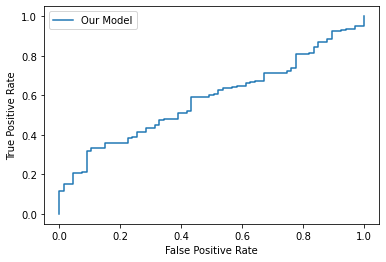

5
857
542
857
223
y_train dataset shape Counter({0: 358, 1: 184})
y_heldouttest dataset shape Counter({1: 156, 0: 67})
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 20
max_resources_: 542
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 27
n_resources: 20
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 14
n_resources: 40
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 2
n_candidates: 7
n_resources: 80
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 4
n_resources: 160
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 320
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_180451/2579505642.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_heldouttest[i]=y_proba
/tmp/ipykernel_180451/2579505642.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.576575
[[ 57  10]
 [128  28]]
              precision    recall  f1-score   support

           0       0.31      0.85      0.45        67
           1       0.74      0.18      0.29       156

    accuracy                           0.38       223
   macro avg       0.52      0.52      0.37       223
weighted avg       0.61      0.38      0.34       223

balanced_accuracy_score  0.515116724071948
matthews_corrcoef  0.036864616436594416
Sensitivity 0.8507462686567164
Specificity 0.1794871794871795
f1 0.288659793814433
LR+ 1.0368470149253732
ppv 0.7368421052631579
average_precision_score 0.748302988215961
roc_auc_score 0.5545350172215844


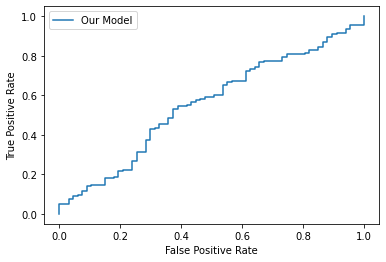

6
857
671
857
223
y_train dataset shape Counter({1: 369, 0: 302})
y_heldouttest dataset shape Counter({1: 156, 0: 67})
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 20
max_resources_: 671
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 33
n_resources: 20
Fitting 5 folds for each of 33 candidates, totalling 165 fits
----------
iter: 1
n_candidates: 17
n_resources: 40
Fitting 5 folds for each of 17 candidates, totalling 85 fits
----------
iter: 2
n_candidates: 9
n_resources: 80
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 5
n_resources: 160
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 3
n_resources: 320
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 2
n_resources: 640
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_180451/2579505642.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_heldouttest[i]=y_proba
/tmp/ipykernel_180451/2579505642.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.656450
[[ 60   7]
 [137  19]]
              precision    recall  f1-score   support

           0       0.30      0.90      0.45        67
           1       0.73      0.12      0.21       156

    accuracy                           0.35       223
   macro avg       0.52      0.51      0.33       223
weighted avg       0.60      0.35      0.28       223

balanced_accuracy_score  0.5086586299272866
matthews_corrcoef  0.02473768683362527
Sensitivity 0.8955223880597015
Specificity 0.12179487179487179
f1 0.2087912087912088
LR+ 1.019718923630025
ppv 0.7307692307692307
average_precision_score 0.7252281951541673
roc_auc_score 0.5445847684653655


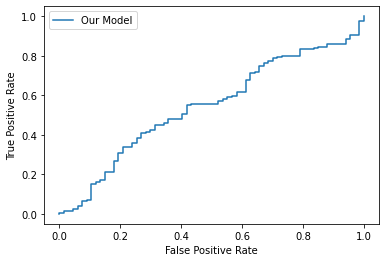

7
857
2204
857
223
y_train dataset shape Counter({1: 1642, 0: 562})
y_heldouttest dataset shape Counter({1: 156, 0: 67})
n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 20
max_resources_: 2204
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 110
n_resources: 20
Fitting 5 folds for each of 110 candidates, totalling 550 fits
----------
iter: 1
n_candidates: 55
n_resources: 40
Fitting 5 folds for each of 55 candidates, totalling 275 fits
----------
iter: 2
n_candidates: 28
n_resources: 80
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 14
n_resources: 160
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 4
n_candidates: 7
n_resources: 320
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 5
n_candidates: 4
n_resources: 640
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 128

/tmp/ipykernel_180451/2579505642.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_heldouttest[i]=y_proba
/tmp/ipykernel_180451/2579505642.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.654817
[[ 33  34]
 [ 47 109]]
              precision    recall  f1-score   support

           0       0.41      0.49      0.45        67
           1       0.76      0.70      0.73       156

    accuracy                           0.64       223
   macro avg       0.59      0.60      0.59       223
weighted avg       0.66      0.64      0.64       223

balanced_accuracy_score  0.5956276310753923
matthews_corrcoef  0.18281005586242974
Sensitivity 0.4925373134328358
Specificity 0.6987179487179487
f1 0.729096989966555
LR+ 1.6348046999047314
ppv 0.7622377622377622
average_precision_score 0.7536468335032976
roc_auc_score 0.6125143513203214


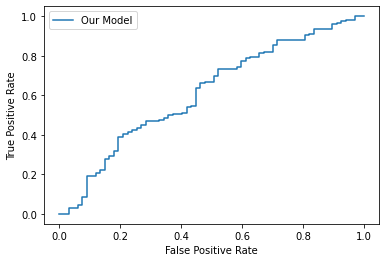

8
857
1106
857
223
y_train dataset shape Counter({0: 724, 1: 382})
y_heldouttest dataset shape Counter({1: 156, 0: 67})
n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 20
max_resources_: 1106
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 55
n_resources: 20
Fitting 5 folds for each of 55 candidates, totalling 275 fits
----------
iter: 1
n_candidates: 28
n_resources: 40
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 2
n_candidates: 14
n_resources: 80
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 3
n_candidates: 7
n_resources: 160
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 4
n_candidates: 4
n_resources: 320
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 640
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_180451/2579505642.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_heldouttest[i]=y_proba
/tmp/ipykernel_180451/2579505642.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.690146
[[ 63   4]
 [148   8]]
              precision    recall  f1-score   support

           0       0.30      0.94      0.45        67
           1       0.67      0.05      0.10       156

    accuracy                           0.32       223
   macro avg       0.48      0.50      0.27       223
weighted avg       0.56      0.32      0.20       223

balanced_accuracy_score  0.49579027937236897
matthews_corrcoef  -0.017106104506851245
Sensitivity 0.9402985074626866
Specificity 0.05128205128205128
f1 0.09523809523809523
LR+ 0.9911254538120211
ppv 0.6666666666666666
average_precision_score 0.7380235498856107
roc_auc_score 0.590987370838117


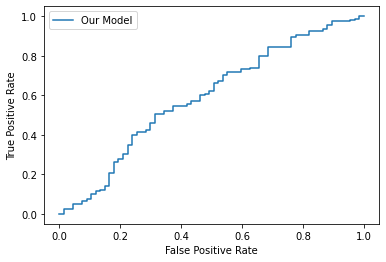

11
857
445
857
223
y_train dataset shape Counter({0: 237, 1: 208})
y_heldouttest dataset shape Counter({1: 156, 0: 67})
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 20
max_resources_: 445
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 22
n_resources: 20
Fitting 5 folds for each of 22 candidates, totalling 110 fits
----------
iter: 1
n_candidates: 11
n_resources: 40
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 2
n_candidates: 6
n_resources: 80
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 3
n_resources: 160
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 320
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_180451/2579505642.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_heldouttest[i]=y_proba
/tmp/ipykernel_180451/2579505642.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.551491
[[46 21]
 [81 75]]
              precision    recall  f1-score   support

           0       0.36      0.69      0.47        67
           1       0.78      0.48      0.60       156

    accuracy                           0.54       223
   macro avg       0.57      0.58      0.53       223
weighted avg       0.66      0.54      0.56       223

balanced_accuracy_score  0.5836681974741676
matthews_corrcoef  0.1549361043171801
Sensitivity 0.6865671641791045
Specificity 0.4807692307692308
f1 0.5952380952380952
LR+ 1.3222775013819792
ppv 0.78125
average_precision_score 0.7691229953818026
roc_auc_score 0.5860122464600077


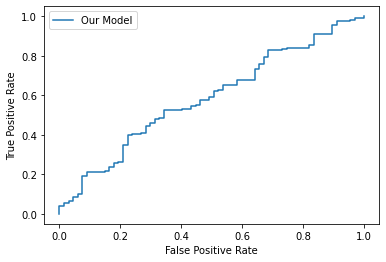

14
857
446
857
223
y_train dataset shape Counter({1: 240, 0: 206})
y_heldouttest dataset shape Counter({1: 156, 0: 67})
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 20
max_resources_: 446
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 22
n_resources: 20
Fitting 5 folds for each of 22 candidates, totalling 110 fits
----------
iter: 1
n_candidates: 11
n_resources: 40
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 2
n_candidates: 6
n_resources: 80
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 3
n_resources: 160
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 320
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_180451/2579505642.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_heldouttest[i]=y_proba
/tmp/ipykernel_180451/2579505642.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.654817
[[ 49  18]
 [103  53]]
              precision    recall  f1-score   support

           0       0.32      0.73      0.45        67
           1       0.75      0.34      0.47       156

    accuracy                           0.46       223
   macro avg       0.53      0.54      0.46       223
weighted avg       0.62      0.46      0.46       223

balanced_accuracy_score  0.5355434366628397
matthews_corrcoef  0.06995812238872635
Sensitivity 0.7313432835820896
Specificity 0.33974358974358976
f1 0.4669603524229075
LR+ 1.1076655557165629
ppv 0.7464788732394366
average_precision_score 0.7513388198409882
roc_auc_score 0.5652506697282816


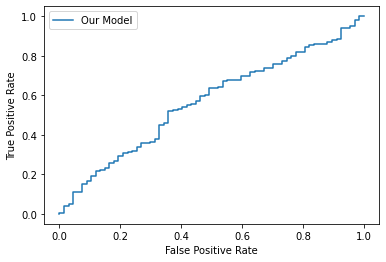

15
857
5239
857
223
y_train dataset shape Counter({0: 4550, 1: 689})
y_heldouttest dataset shape Counter({1: 156, 0: 67})
n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 9
min_resources_: 20
max_resources_: 5239
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 261
n_resources: 20
Fitting 5 folds for each of 261 candidates, totalling 1305 fits
----------
iter: 1
n_candidates: 131
n_resources: 40
Fitting 5 folds for each of 131 candidates, totalling 655 fits
----------
iter: 2
n_candidates: 66
n_resources: 80
Fitting 5 folds for each of 66 candidates, totalling 330 fits
----------
iter: 3
n_candidates: 33
n_resources: 160
Fitting 5 folds for each of 33 candidates, totalling 165 fits
----------
iter: 4
n_candidates: 17
n_resources: 320
Fitting 5 folds for each of 17 candidates, totalling 85 fits
----------
iter: 5
n_candidates: 9
n_resources: 640
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 6
n_candidates: 5
n_resourc

/tmp/ipykernel_180451/2579505642.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_heldouttest[i]=y_proba
/tmp/ipykernel_180451/2579505642.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.660984
[[ 65   2]
 [151   5]]
              precision    recall  f1-score   support

           0       0.30      0.97      0.46        67
           1       0.71      0.03      0.06       156

    accuracy                           0.31       223
   macro avg       0.51      0.50      0.26       223
weighted avg       0.59      0.31      0.18       223

balanced_accuracy_score  0.5011002678913127
matthews_corrcoef  0.005785651095437463
Sensitivity 0.9701492537313433
Specificity 0.03205128205128205
f1 0.061349693251533735
LR+ 1.0022734012058911
ppv 0.7142857142857143
average_precision_score 0.7769939184867852
roc_auc_score 0.612705702257941


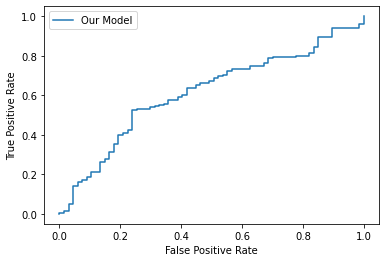

16
857
317
857
223
y_train dataset shape Counter({0: 236, 1: 81})
y_heldouttest dataset shape Counter({1: 156, 0: 67})
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 20
max_resources_: 317
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 15
n_resources: 20
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 8
n_resources: 40
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 2
n_candidates: 4
n_resources: 80
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 160
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/tmp/ipykernel_180451/2579505642.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_heldouttest[i]=y_proba
/tmp/ipykernel_180451/2579505642.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_ncv[i]=y_proba


Best Threshold=0.662085
[[ 66   1]
 [153   3]]
              precision    recall  f1-score   support

           0       0.30      0.99      0.46        67
           1       0.75      0.02      0.04       156

    accuracy                           0.31       223
   macro avg       0.53      0.50      0.25       223
weighted avg       0.62      0.31      0.16       223

balanced_accuracy_score  0.5021526980482204
matthews_corrcoef  0.014871704935678373
Sensitivity 0.9850746268656716
Specificity 0.019230769230769232
f1 0.0375
LR+ 1.0043898156277435
ppv 0.75
average_precision_score 0.7016374096059256
roc_auc_score 0.47388059701492535


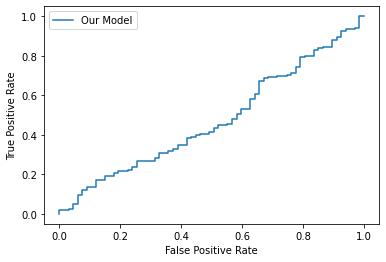

In [41]:
#built on individual Liv models, Predict DILI ext test set with models built on individual Liv datasets


for i in train_data.Source_rank.unique():
    print(i)
    
    df_subset = train_data[train_data["Source_rank"]==i]
    
    if(len(df_subset.TOXICITY.unique())<2):
        continue
    
    y_train = np.array(df_subset['TOXICITY'])
    features= df_subset.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data", "InChIKey", "InChIKey14", "protonated_smiles_r"]  , axis = 1)

    feature_list = list(features.columns)
    X_train = np.array(features)
    
    print(len(X_train[0]))
    print(len(y_train))
    print(len(X_heldouttest[0]))
    print(len(y_heldouttest))
    
    print('y_train dataset shape %s' % Counter(y_train))
    print('y_heldouttest dataset shape %s' % Counter(y_heldouttest))
          
    
    #Hyperparameter Optimisation
    rf = RandomForestClassifier(n_jobs=-1, random_state=42)
    # Instantiate the RandomHalving search model
    param_dist_grid = { 
            'max_depth': randint(5, 20),
            'max_features': randint(30, 50),
            'min_samples_leaf': randint(5, 15),
            'min_samples_split': randint(5, 15),
            'n_estimators':[200, 300, 400, 500, 600],
            'bootstrap': [True, False],
            'oob_score': [False],
            'random_state': [42],
            'criterion': ['gini', 'entropy'],
            'n_jobs': [30],
            'class_weight' : [None, 'balanced_subsample', 'balanced']}

    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)    
    rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=2, random_state=42, n_jobs=30, verbose=1, cv = inner_cv)
    rsh.fit(X_train, y_train)
    classifier = rsh.best_estimator_
    classifier.fit(X_train, y_train)
    pickle.dump(classifier, open(f"bestlivmodel_{i}_model.sav",  'wb'))
    
    #Add predictions to held out test set dili
    y_proba = classifier.predict_proba(X_heldouttest)[:,1]
    test_data_heldouttest[i]=y_proba
    
    #Add predictions to NCV compounds  dili
    y_proba = classifier.predict_proba(X_ncv)[:,1]
    test_data_ncv[i]=y_proba
    
    #Find best threshold using NCV DIlI compounds
    cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
    # get the best threshold
    J = tpr - fpr
    ix = argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    
    #Comapre for held out test set
    y_proba = classifier.predict_proba(X_heldouttest)[:,1]
    y_pred  = [ 1 if x>best_thresh  else 0 for x in y_proba ]

    conf_matrix = confusion_matrix(y_heldouttest, y_pred)
    print(conf_matrix)
    print(classification_report(y_heldouttest, y_pred))
    print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
    print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

    # Sensitivity, hit rate, recall, or true positive rate
    Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    # Specificity or true negative rate
    Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 
    f1= metrics.f1_score(y_heldouttest, y_pred)
    pos_LR = Sensitivity / (1 - Specificity) 
    ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')
    
    print("Sensitivity", Sensitivity)
    print("Specificity", Specificity)
    print("f1", f1)
    print("LR+", pos_LR)
    print("ppv", ppv)
       
    print("average_precision_score", metrics.average_precision_score(y_heldouttest, y_proba))
    
    print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba)) 
    # calculate roc curves
    best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
    # plot the roc curve for the model
    plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()  


In [42]:
test_data_ncv

smiles_r  TOXICITY  Source_rank  \
0    COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)O)=C(CSc3nnnn...         1            1   
1              CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1         1            1   
2    Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)...         1            1   
3    CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...         1            1   
4               Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2         1            1   
..                                                 ...       ...          ...   
883         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1         0            1   
884  CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...         0            1   
885                         CCC(c1cccc(O)c1)C(C)CN(C)C         0            1   
886                                     CC(N)Cc1ccccc1         0            1   
887                              C[N+](C)(C)CC(=O)[O-]         0            1   

                                 Source  Data                     InChIKey  \
0               DILIst Classification    DILI  UHRBTBZOWWGKMK-UHFFFAOYSA-N   
1               DILIst Classification    DILI  UIEATEWHFDRYRU-UHFFFAOYSA-N   
2           DILIst Classification  oral  DILI  UIOFUWFRIANQPC-UHFFFAOYSA-N   
3           DILIst Classification  Oral  DILI  ULGZDMOVFRHVEP-UHFFFAOYSA-N   
4               DILIst Classification    DILI  UMSGKTJDUHERQW-UHFFFAOYSA-N   
..                                  ...   ...                          ...   
883             DILIst Classification    DILI  KYRVNWMVYQXFEU-UHFFFAOYSA-N   
884  DILIst Classification  Intravenous  DILI  KXNPVXPOPUZYGB-UHFFFAOYSA-N   
885         DILIst Classification  Oral  DILI  KWTWDQCKEHXFFR-UHFFFAOYSA-N   
886         DILIst Classification  Oral  DILI  KWTSXDURSIMDCE-UHFFFAOYSA-N   
887         DILIst Classification  Oral  DILI  KWIUHFFTVRNATP-UHFFFAOYSA-N   

         InChIKey14                                protonated_smiles_r  \
0    UHRBTBZOWWGKMK  COC1(NC(=O)CSC(F)F)C(=O)[NH+]2C(C(=O)[O-])=C(C...   
1    UIEATEWHFDRYRU        CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)[NH+]1CCCC1   
2    UIOFUWFRIANQPC  Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)[NH+]2C1S...   
3    ULGZDMOVFRHVEP  CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...   
4    UMSGKTJDUHERQW             Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2   
..              ...                                                ...   
883  KYRVNWMVYQXFEU         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1   
884  KXNPVXPOPUZYGB  CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...   
885  KWTWDQCKEHXFFR                     CCC(c1cccc(O)c1)C(C)C[NH+](C)C   
886  KWTSXDURSIMDCE                                CC([NH3+])Cc1ccccc1   
887  KWIUHFFTVRNATP                              C[N+](C)(C)CC(=O)[O-]   

           ABC      ABCGG  ...  median pMolar total plasma concentration  \
0    24.332110  20.403834  ...                                  4.036471   
1    20.643996  17.133953  ...                                  5.718989   
2    23.871199  20.653733  ...                                  4.048808   
3    39.002040  32.313871  ...                                  5.240709   
4    17.722758  15.010475  ...                                  6.338442   
..         ...        ...  ...                                       ...   
883  16.360915  13.772089  ...                                  5.241611   
884  26.942267  21.807837  ...                                  5.653729   
885  11.670387  10.989759  ...                                  6.116869   
886   7.289847   6.783462  ...                                  6.057551   
887   5.645283   5.873928  ...                                  3.866101   

            3         5         6         7         8        11        14  \
0    0.716006  0.434122  0.305579  0.757919  0.628396  0.555379  0.179538   
1    0.479661  0.419735  0.590300  0.643406  0.377860  0.454481  0.807188   
2    0.725943  0.609397  0.426453  0.697050  0.589820  0.532171  0.702188   
3    0.348377  0.146174  0

In [43]:
test_data_heldouttest

smiles_r  TOXICITY  Source_rank  \
0       C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1         1            1   
1                                   CC1OC1[P](=O)(=O)O         1            1   
2                   CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1         1            1   
3    COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...         1            1   
4                   CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21         1            1   
..                                                 ...       ...          ...   
218                       ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl         0            1   
219       Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O         0            1   
220                            C=Cc1ccc(S(=O)(=O)O)cc1         0            1   
221                               OCC(O)c1oc(O)c(O)c1O         0            1   
222           CC1(Cn2ccnn2)C(C(=O)O)N2C(=O)CC2S1(=O)=O         0            1   

                                             Source  Data  \
0                       DILIst Classification  Oral  DILI   
1                       DILIst Classification  Oral  DILI   
2                       DILIst Classification  Oral  DILI   
3                       DILIst Classification  Oral  DILI   
4                       DILIst Classification  Oral  DILI   
..                                              ...   ...   
218                  DILIst Classification  Topical  DILI   
219                     DILIst Classification  Oral  DILI   
220                     DILIst Classification  Oral  DILI   
221              DILIst Classification  Intravenous  DILI   
222  DILIst Classification  Intravenous; Parenteral  DILI   

                        InChIKey      InChIKey14  \
0    AAKJLRGGTJKAMG-UHFFFAOYSA-N  AAKJLRGGTJKAMG   
1    UJNUDOLLRRCQDH-UHFFFAOYSA-N  UJNUDOLLRRCQDH   
2    UNAANXDKBXWMLN-UHFFFAOYSA-N  UNAANXDKBXWMLN   
3    UXOWGYHJODZGMF-UHFFFAOYSA-N  UXOWGYHJODZGMF   
4    VGKDLMBJGBXTGI-UHFFFAOYSA-N  VGKDLMBJGBXTGI   
..                           ...             ...   
218  JLYXXMFPNIAWKQ-UHFFFAOYSA-N  JLYXXMFPNIAWKQ   
219  JAUORDHNHDCTAS-UHFFFAOYSA-N  JAUORDHNHDCTAS   
220  MAGFQRLKWCCTQJ-UHFFFAOYSA-N  MAGFQRLKWCCTQJ   
221  LPYXWGMUVRGUOY-UHFFFAOYSA-N  LPYXWGMUVRGUOY   
222  LPQZKKCYTLCDGQ-UHFFFAOYSA-N  LPQZKKCYTLCDGQ   

                                   protonated_smiles_r        ABC      ABCGG  \
0       C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1  21.798990  16.570489   
1                                   CC1OC1[P](=O)(=O)O   6.140950   6.624294   
2               CC(C)CC([NH+](C)C)C1(c2ccc(Cl)cc2)CCC1  14.525425  13.493219   
3    COCCCOc1cc(CC(CC([NH3+])C(O)CC(C(=O)NCC(C)(C)C...  28.615700  24.127835   
4              C[NH2+]C1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21  15.572928  12.623559   
..                                                 ...        ...        ...   
218                       ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl   8.898979   8.883053   
219       Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O  20.620135  15.444462   
220                         C=Cc1ccc(S(=O)(=O)[O-])cc1   8.900428   8.287109   
221                               OCC(O)c1oc(O)c(O)c1O   8.761080   9.017795   
222    CC1(Cn2ccnn2)C(C(=O)[O-])[NH+]2C(=O)CC2S1(=O)=O  15.981561  15.139991   

     ...  median pMolar total plasma concentration         3         5  \
0    ...                                  5.992269  0.557014  0.456931   
1    ...                                  3.857602  0.350417  0.254330   
2    ...                                  6.538902  0.322297  0.636731   
3    ...                                  6.467869  0.595764  0.176782   
4    ...                                  6.091766  0.708626  0.679524   
..   ...                                       ...       ...       ...   
218  ...                                  4.684940  0.484429  0.493742   
219  ...                                  5.272305  0.602714  0.453562   
220  ...                                  4.289188  0.346764  0.387101   
221  ...      

In [44]:
test_data_ncv.to_csv("test_data_ncv_DILIst_888_livpreds.csv", index=False)

In [45]:
test_data_heldouttest.to_csv("test_data_heldouttest_DILIst_223_livpreds.csv", index=False)

In [46]:
#Models to predict DILI with All : Mordred, Morgan, Physicochemical and Liv preds

In [47]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data", "InChIKey", "InChIKey14", "protonated_smiles_r"]  , axis = 1)

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [48]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data", "InChIKey", "InChIKey14", "protonated_smiles_r"]  , axis = 1)

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [49]:
test_dili_all = pd.concat([test_data_heldouttest, test_data_ncv]).reset_index(drop=True)
test_dili_all

smiles_r  TOXICITY  \
0        C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1         1   
1                                    CC1OC1[P](=O)(=O)O         1   
2                    CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1         1   
3     COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...         1   
4                    CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21         1   
...                                                 ...       ...   
1106         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1         0   
1107  CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...         0   
1108                         CCC(c1cccc(O)c1)C(C)CN(C)C         0   
1109                                     CC(N)Cc1ccccc1         0   
1110                              C[N+](C)(C)CC(=O)[O-]         0   

      Source_rank                              Source  Data  \
0               1         DILIst Classification  Oral  DILI   
1               1         DILIst Classification  Oral  DILI   
2               1         DILIst Classification  Oral  DILI   
3               1         DILIst Classification  Oral  DILI   
4               1         DILIst Classification  Oral  DILI   
...           ...                                 ...   ...   
1106            1             DILIst Classification    DILI   
1107            1  DILIst Classification  Intravenous  DILI   
1108            1         DILIst Classification  Oral  DILI   
1109            1         DILIst Classification  Oral  DILI   
1110            1         DILIst Classification  Oral  DILI   

                         InChIKey      InChIKey14  \
0     AAKJLRGGTJKAMG-UHFFFAOYSA-N  AAKJLRGGTJKAMG   
1     UJNUDOLLRRCQDH-UHFFFAOYSA-N  UJNUDOLLRRCQDH   
2     UNAANXDKBXWMLN-UHFFFAOYSA-N  UNAANXDKBXWMLN   
3     UXOWGYHJODZGMF-UHFFFAOYSA-N  UXOWGYHJODZGMF   
4     VGKDLMBJGBXTGI-UHFFFAOYSA-N  VGKDLMBJGBXTGI   
...                           ...             ...   
1106  KYRVNWMVYQXFEU-UHFFFAOYSA-N  KYRVNWMVYQXFEU   
1107  KXNPVXPOPUZYGB-UHFFFAOYSA-N  KXNPVXPOPUZYGB   
1108  KWTWDQCKEHXFFR-UHFFFAOYSA-N  KWTWDQCKEHXFFR   
1109  KWTSXDURSIMDCE-UHFFFAOYSA-N  KWTSXDURSIMDCE   
1110  KWIUHFFTVRNATP-UHFFFAOYSA-N  KWIUHFFTVRNATP   

                                    protonated_smiles_r        ABC      ABCGG  \
0        C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1  21.798990  16.570489   
1                                    CC1OC1[P](=O)(=O)O   6.140950   6.624294   
2                CC(C)CC([NH+](C)C)C1(c2ccc(Cl)cc2)CCC1  14.525425  13.493219   
3     COCCCOc1cc(CC(CC([NH3+])C(O)CC(C(=O)NCC(C)(C)C...  28.615700  24.127835   
4               C[NH2+]C1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21  15.572928  12.623559   
...                                                 ...        ...        ...   
1106         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1  16.360915  13.772089   
1107  CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...  26.942267  21.807837   
1108                     CCC(c1cccc(O)c1)C(C)C[NH+](C)C  11.670387  10.989759   
1109                                CC([NH3+])Cc1ccccc1   7.289847   6.783462   
1110                              C[N+](C)(C)CC(=O)[O-]   5.645283   5.873928   

      ...  median pMolar total plasma concentration         3         5  \
0     ...                                  5.992269  0.557014  0.456931   
1     ...                                  3.857602  0.350417  0.254330   
2     ...                                  6.538902  0.322297  0.636731   
3     ...                                  6.467869  0.595764  0.176782   
4     ...                                  6.091766  0.708626  0.679524   
...   ...                                       ...       ...       ...   
1106  ...                                  5.241611  0.732836  0.500677   
1107  ...                                  5.653729  0.711124  0.155374   
1108  ...                                  6.116869  0.185916  0.241239   
1109  ...                                  6.057551  0.301023  0.163379   
1110  ...                 

In [50]:
y_dili = np.array(test_dili_all['TOXICITY'])
test_features= test_dili_all.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data", "InChIKey", "InChIKey14", "protonated_smiles_r"] , axis = 1)

test_feature_list = list(test_features.columns)
X_dili = np.array(test_features)

In [51]:
test_feature_list = list(test_feature_list)
test_feature_list

['ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpDiam_A',
 'SpAD_A',
 'LogEE_A',
 'VE1_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe',
 'ATS6pe',
 'ATS7pe',
 'ATS8pe',
 'ATS0are',
 'ATS1are',
 'ATS2are',
 'ATS3are',
 'ATS4are',
 'ATS5are',
 'ATS6a

In [52]:
len(test_feature_list)

868

In [53]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

(888, 868)
(223, 868)
888
223


In [54]:
print(len(y_dili))
print(X_dili.shape)

1111
(1111, 868)


In [55]:

from tqdm import tqdm
from sklearn.model_selection import KFold
import pickle

  0%|                                                    | 0/11 [00:00<?, ?it/s]

42
0
Best Threshold=0.615282
[[38 27]
 [39 74]]
              precision    recall  f1-score   support

           0       0.49      0.58      0.54        65
           1       0.73      0.65      0.69       113

    accuracy                           0.63       178
   macro avg       0.61      0.62      0.61       178
weighted avg       0.65      0.63      0.63       178

balanced_accuracy_score  0.6197413206262764
matthews_corrcoef  0.23273617364348775
Sensitivity 0.5846153846153846
Specificity 0.6548672566371682
f1 0.691588785046729
LR+ 1.6938856015779094
ppv 0.7326732673267327
average_precision_score 0.7442110901292394
roc_auc_score 0.6615384615384615


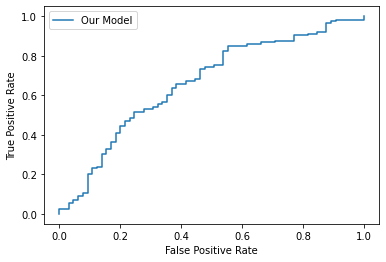

saving model


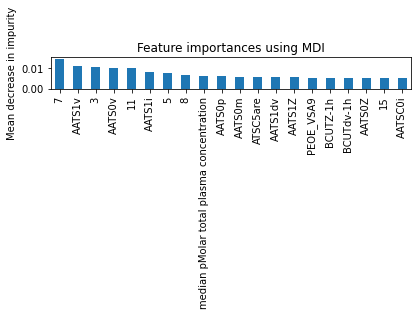

1
Best Threshold=0.636099
[[36 15]
 [49 78]]
              precision    recall  f1-score   support

           0       0.42      0.71      0.53        51
           1       0.84      0.61      0.71       127

    accuracy                           0.64       178
   macro avg       0.63      0.66      0.62       178
weighted avg       0.72      0.64      0.66       178

balanced_accuracy_score  0.6600277906438166
matthews_corrcoef  0.2897086193490695
Sensitivity 0.7058823529411765
Specificity 0.6141732283464567
f1 0.7090909090909091
LR+ 1.8295318127250904
ppv 0.8387096774193549
average_precision_score 0.8410511016194337
roc_auc_score 0.6960012351397251


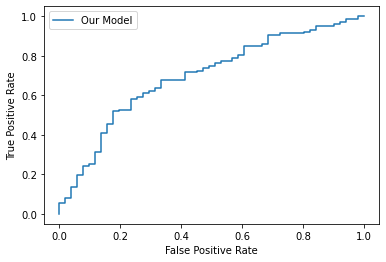

saving model


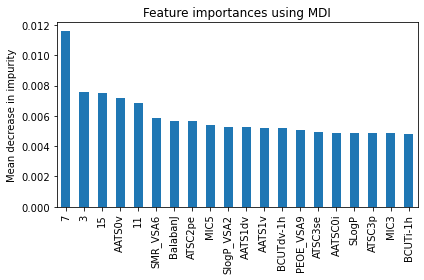

2
Best Threshold=0.669011
[[45 20]
 [47 66]]
              precision    recall  f1-score   support

           0       0.49      0.69      0.57        65
           1       0.77      0.58      0.66       113

    accuracy                           0.62       178
   macro avg       0.63      0.64      0.62       178
weighted avg       0.67      0.62      0.63       178

balanced_accuracy_score  0.6381892443839347
matthews_corrcoef  0.2662913127014657
Sensitivity 0.6923076923076923
Specificity 0.584070796460177
f1 0.6633165829145728
LR+ 1.6644844517184942
ppv 0.7674418604651163
average_precision_score 0.7626974247279067
roc_auc_score 0.6750170183798503


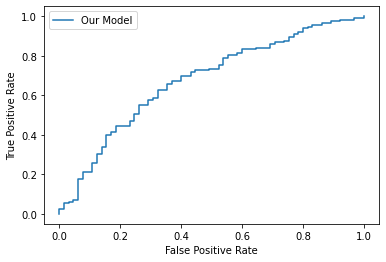

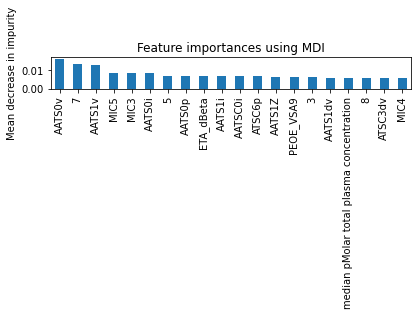

3
Best Threshold=0.662419
[[59 23]
 [33 62]]
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        82
           1       0.73      0.65      0.69        95

    accuracy                           0.68       177
   macro avg       0.69      0.69      0.68       177
weighted avg       0.69      0.68      0.68       177

balanced_accuracy_score  0.6860718870346598
matthews_corrcoef  0.3714292573639746
Sensitivity 0.7195121951219512
Specificity 0.6526315789473685
f1 0.688888888888889
LR+ 2.0713229859571323
ppv 0.7294117647058823
average_precision_score 0.7048147581184645
roc_auc_score 0.7156611039794607


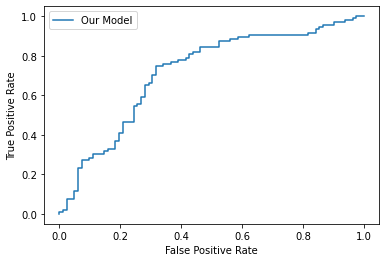

saving model


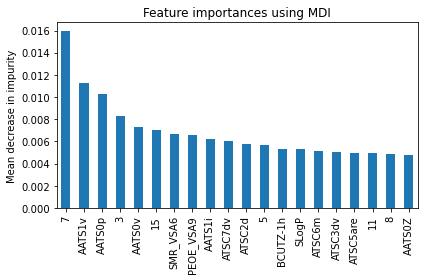

4
Best Threshold=0.609759
[[32 33]
 [37 75]]
              precision    recall  f1-score   support

           0       0.46      0.49      0.48        65
           1       0.69      0.67      0.68       112

    accuracy                           0.60       177
   macro avg       0.58      0.58      0.58       177
weighted avg       0.61      0.60      0.61       177

balanced_accuracy_score  0.5809752747252748
matthews_corrcoef  0.1600706440437084
Sensitivity 0.49230769230769234
Specificity 0.6696428571428571
f1 0.6818181818181819
LR+ 1.49022869022869
ppv 0.6944444444444444
average_precision_score 0.7614400767891378
roc_auc_score 0.6590659340659341


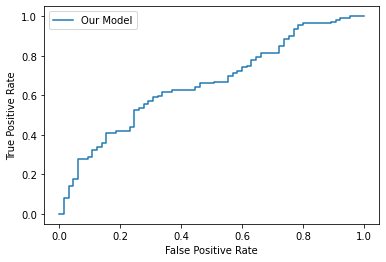

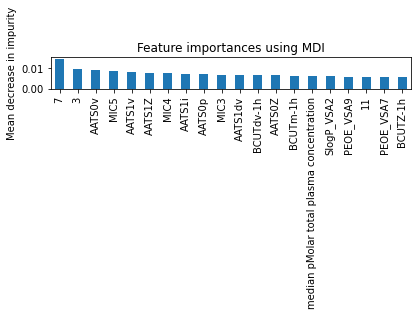

  9%|████                                        | 1/11 [00:53<08:53, 53.32s/it]

43
0
Best Threshold=0.623834
[[38 18]
 [40 82]]
              precision    recall  f1-score   support

           0       0.49      0.68      0.57        56
           1       0.82      0.67      0.74       122

    accuracy                           0.67       178
   macro avg       0.65      0.68      0.65       178
weighted avg       0.72      0.67      0.68       178

balanced_accuracy_score  0.675351288056206
matthews_corrcoef  0.32822040991190027
Sensitivity 0.6785714285714286
Specificity 0.6721311475409836
f1 0.7387387387387387
LR+ 2.069642857142857
ppv 0.82
average_precision_score 0.779513376124876
roc_auc_score 0.6831088992974238


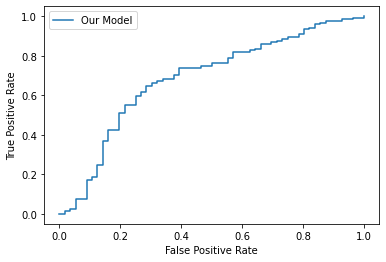

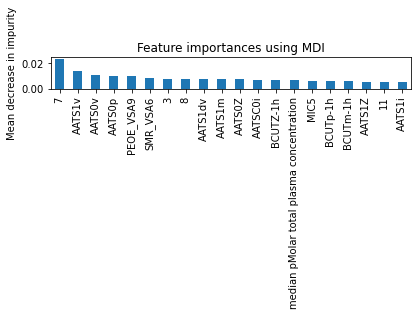

1
Best Threshold=0.617236
[[44 37]
 [27 70]]
              precision    recall  f1-score   support

           0       0.62      0.54      0.58        81
           1       0.65      0.72      0.69        97

    accuracy                           0.64       178
   macro avg       0.64      0.63      0.63       178
weighted avg       0.64      0.64      0.64       178

balanced_accuracy_score  0.6324296805396461
matthews_corrcoef  0.2693535107064587
Sensitivity 0.5432098765432098
Specificity 0.7216494845360825
f1 0.6862745098039216
LR+ 1.9515317786922723
ppv 0.6542056074766355
average_precision_score 0.6961857306435382
roc_auc_score 0.658266513936617


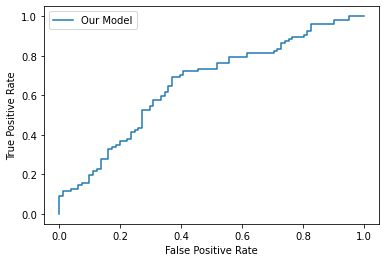

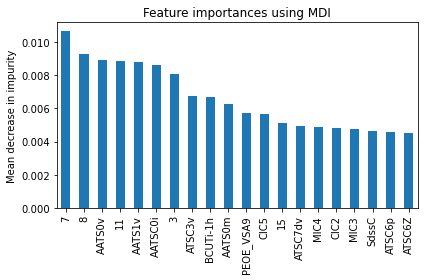

2
Best Threshold=0.601134
[[33 23]
 [43 79]]
              precision    recall  f1-score   support

           0       0.43      0.59      0.50        56
           1       0.77      0.65      0.71       122

    accuracy                           0.63       178
   macro avg       0.60      0.62      0.60       178
weighted avg       0.67      0.63      0.64       178

balanced_accuracy_score  0.6184133489461359
matthews_corrcoef  0.22232981489916726
Sensitivity 0.5892857142857143
Specificity 0.6475409836065574
f1 0.7053571428571429
LR+ 1.6719269102990035
ppv 0.7745098039215687
average_precision_score 0.7852856753289874
roc_auc_score 0.6503220140515222


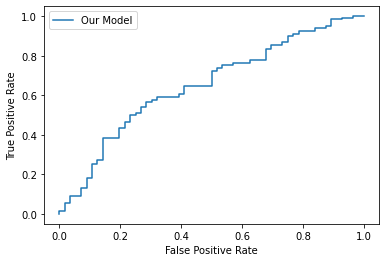

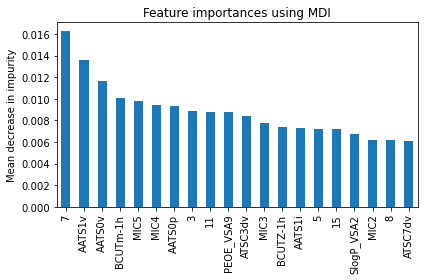

3
Best Threshold=0.678390
[[48 15]
 [48 66]]
              precision    recall  f1-score   support

           0       0.50      0.76      0.60        63
           1       0.81      0.58      0.68       114

    accuracy                           0.64       177
   macro avg       0.66      0.67      0.64       177
weighted avg       0.70      0.64      0.65       177

balanced_accuracy_score  0.6704260651629073
matthews_corrcoef  0.3275748773757787
Sensitivity 0.7619047619047619
Specificity 0.5789473684210527
f1 0.6769230769230768
LR+ 1.8095238095238095
ppv 0.8148148148148148
average_precision_score 0.8017261833501045
roc_auc_score 0.7101086048454468


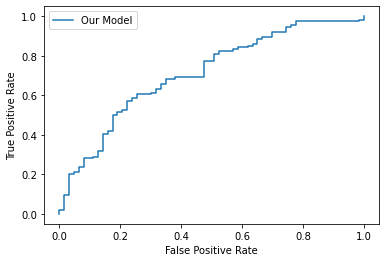

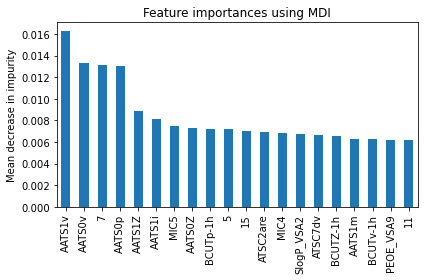

4
Best Threshold=0.666303
[[54 18]
 [42 63]]
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        72
           1       0.78      0.60      0.68       105

    accuracy                           0.66       177
   macro avg       0.67      0.68      0.66       177
weighted avg       0.69      0.66      0.66       177

balanced_accuracy_score  0.675
matthews_corrcoef  0.34510465401414425
Sensitivity 0.75
Specificity 0.6
f1 0.6774193548387097
LR+ 1.875
ppv 0.7777777777777778
average_precision_score 0.7506590375296971
roc_auc_score 0.6964285714285715


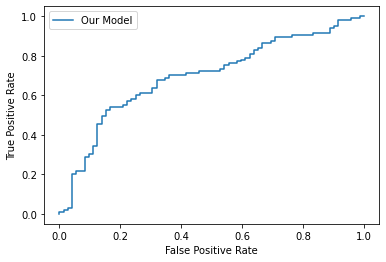

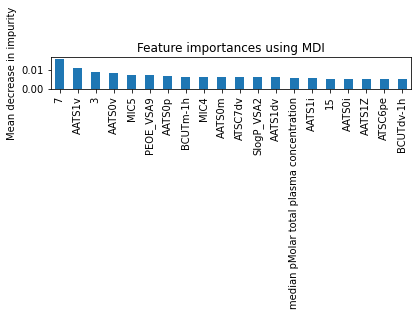

 18%|████████                                    | 2/11 [01:47<08:04, 53.83s/it]

44
0
Best Threshold=0.637851
[[45 22]
 [45 66]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        67
           1       0.75      0.59      0.66       111

    accuracy                           0.62       178
   macro avg       0.62      0.63      0.62       178
weighted avg       0.66      0.62      0.63       178

balanced_accuracy_score  0.6331181928196854
matthews_corrcoef  0.25799049674327673
Sensitivity 0.6716417910447762
Specificity 0.5945945945945946
f1 0.6633165829145727
LR+ 1.656716417910448
ppv 0.75
average_precision_score 0.7733816649593835
roc_auc_score 0.6872394782842546


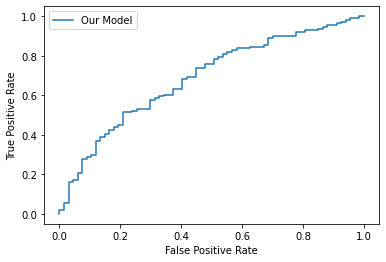

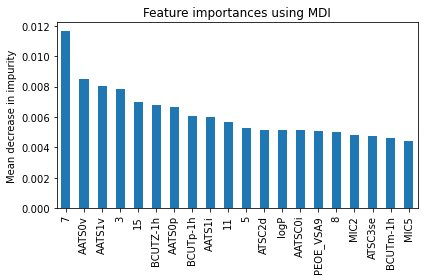

1
Best Threshold=0.629064
[[38 26]
 [49 65]]
              precision    recall  f1-score   support

           0       0.44      0.59      0.50        64
           1       0.71      0.57      0.63       114

    accuracy                           0.58       178
   macro avg       0.58      0.58      0.57       178
weighted avg       0.61      0.58      0.59       178

balanced_accuracy_score  0.5819627192982456
matthews_corrcoef  0.157365108137859
Sensitivity 0.59375
Specificity 0.5701754385964912
f1 0.6341463414634146
LR+ 1.381377551020408
ppv 0.7142857142857143
average_precision_score 0.731059698265732
roc_auc_score 0.6247258771929824


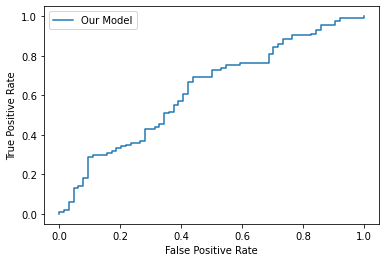

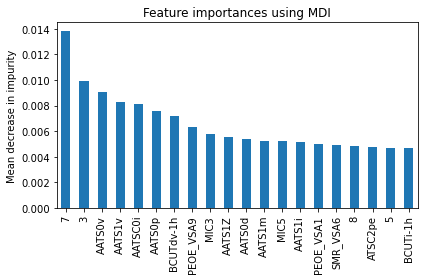

2
Best Threshold=0.626915
[[43 24]
 [33 78]]
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        67
           1       0.76      0.70      0.73       111

    accuracy                           0.68       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.69      0.68      0.68       178

balanced_accuracy_score  0.672246873739411
matthews_corrcoef  0.337421966868765
Sensitivity 0.6417910447761194
Specificity 0.7027027027027027
f1 0.7323943661971832
LR+ 2.158751696065129
ppv 0.7647058823529411
average_precision_score 0.7806640887767864
roc_auc_score 0.7332257630765094


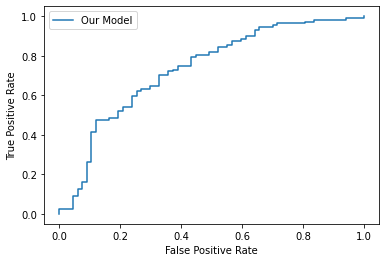

saving model


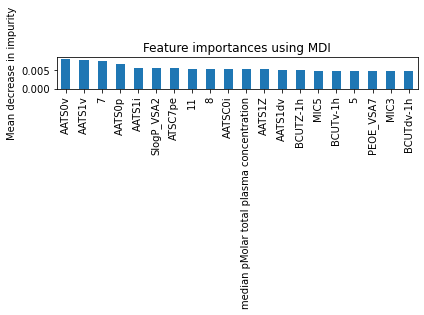

3
Best Threshold=0.660597
[[41 17]
 [43 76]]
              precision    recall  f1-score   support

           0       0.49      0.71      0.58        58
           1       0.82      0.64      0.72       119

    accuracy                           0.66       177
   macro avg       0.65      0.67      0.65       177
weighted avg       0.71      0.66      0.67       177

balanced_accuracy_score  0.6727760069545059
matthews_corrcoef  0.32480281803867084
Sensitivity 0.7068965517241379
Specificity 0.6386554621848739
f1 0.7169811320754716
LR+ 1.9562951082598232
ppv 0.8172043010752689
average_precision_score 0.8234567207785547
roc_auc_score 0.7290640394088671


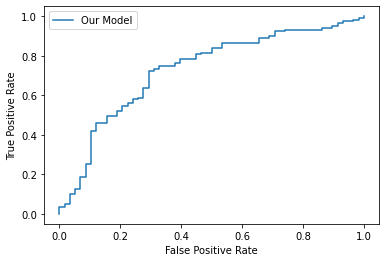

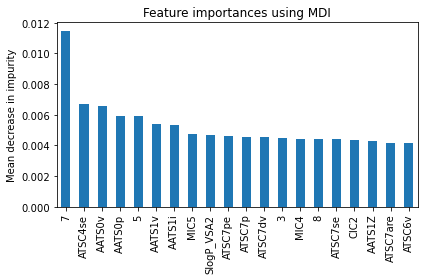

4
Best Threshold=0.699535
[[49 23]
 [55 50]]
              precision    recall  f1-score   support

           0       0.47      0.68      0.56        72
           1       0.68      0.48      0.56       105

    accuracy                           0.56       177
   macro avg       0.58      0.58      0.56       177
weighted avg       0.60      0.56      0.56       177

balanced_accuracy_score  0.5783730158730158
matthews_corrcoef  0.15641534354699374
Sensitivity 0.6805555555555556
Specificity 0.47619047619047616
f1 0.5617977528089888
LR+ 1.2992424242424243
ppv 0.684931506849315
average_precision_score 0.7081570054792357
roc_auc_score 0.626984126984127


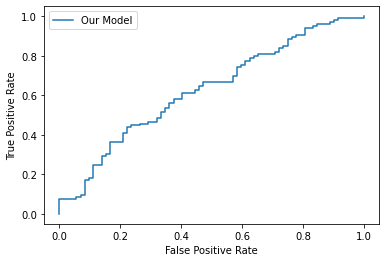

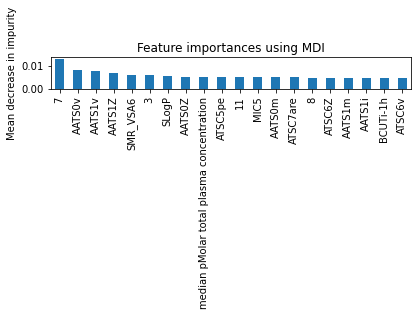

 27%|████████████                                | 3/11 [02:44<07:21, 55.17s/it]

45
0
Best Threshold=0.532881
[[34 30]
 [26 88]]
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        64
           1       0.75      0.77      0.76       114

    accuracy                           0.69       178
   macro avg       0.66      0.65      0.65       178
weighted avg       0.68      0.69      0.68       178

balanced_accuracy_score  0.6515899122807017
matthews_corrcoef  0.3077698558515424
Sensitivity 0.53125
Specificity 0.7719298245614035
f1 0.7586206896551725
LR+ 2.3293269230769225
ppv 0.7457627118644068
average_precision_score 0.7416245151209935
roc_auc_score 0.6796875


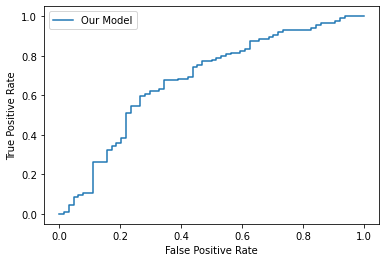

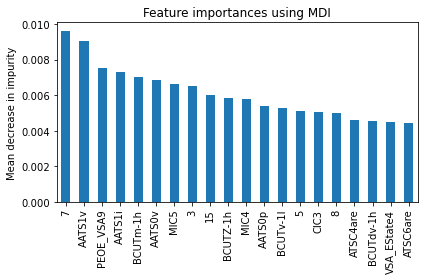

1
Best Threshold=0.580074
[[41 36]
 [30 71]]
              precision    recall  f1-score   support

           0       0.58      0.53      0.55        77
           1       0.66      0.70      0.68       101

    accuracy                           0.63       178
   macro avg       0.62      0.62      0.62       178
weighted avg       0.63      0.63      0.63       178

balanced_accuracy_score  0.6177189147486177
matthews_corrcoef  0.23821068151726885
Sensitivity 0.5324675324675324
Specificity 0.7029702970297029
f1 0.6826923076923076
LR+ 1.7926406926406921
ppv 0.6635514018691588
average_precision_score 0.735886132823045
roc_auc_score 0.6634949209206635


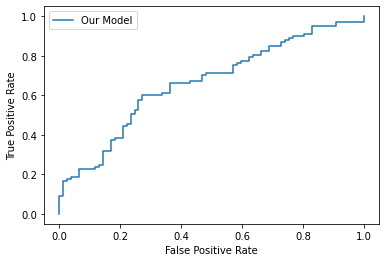

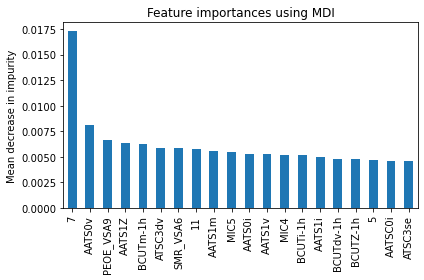

2
Best Threshold=0.654322
[[45 12]
 [60 61]]
              precision    recall  f1-score   support

           0       0.43      0.79      0.56        57
           1       0.84      0.50      0.63       121

    accuracy                           0.60       178
   macro avg       0.63      0.65      0.59       178
weighted avg       0.71      0.60      0.61       178

balanced_accuracy_score  0.6468029578077426
matthews_corrcoef  0.2785087441424018
Sensitivity 0.7894736842105263
Specificity 0.5041322314049587
f1 0.6288659793814433
LR+ 1.5921052631578947
ppv 0.8356164383561644
average_precision_score 0.7821729961687648
roc_auc_score 0.6508626939248949


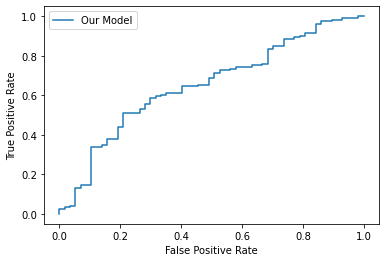

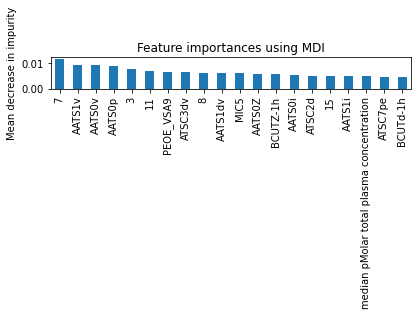

3
Best Threshold=0.578777
[[33 30]
 [29 85]]
              precision    recall  f1-score   support

           0       0.53      0.52      0.53        63
           1       0.74      0.75      0.74       114

    accuracy                           0.67       177
   macro avg       0.64      0.63      0.64       177
weighted avg       0.67      0.67      0.67       177

balanced_accuracy_score  0.6347117794486216
matthews_corrcoef  0.2704042442803883
Sensitivity 0.5238095238095238
Specificity 0.7456140350877193
f1 0.74235807860262
LR+ 2.0591133004926108
ppv 0.7391304347826086
average_precision_score 0.7970002966453404
roc_auc_score 0.6989696463380674


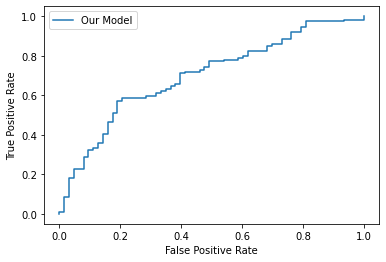

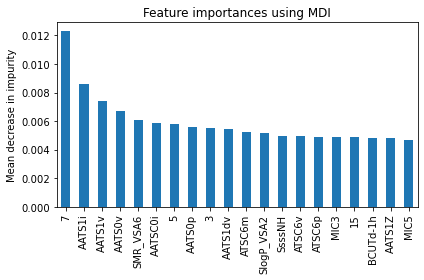

4
Best Threshold=0.600337
[[41 26]
 [24 86]]
              precision    recall  f1-score   support

           0       0.63      0.61      0.62        67
           1       0.77      0.78      0.77       110

    accuracy                           0.72       177
   macro avg       0.70      0.70      0.70       177
weighted avg       0.72      0.72      0.72       177

balanced_accuracy_score  0.6968792401628223
matthews_corrcoef  0.39618495061882836
Sensitivity 0.6119402985074627
Specificity 0.7818181818181819
f1 0.7747747747747747
LR+ 2.8047263681592045
ppv 0.7678571428571429
average_precision_score 0.8057605423520078
roc_auc_score 0.7332428765264586


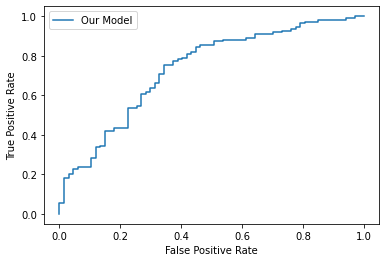

saving model


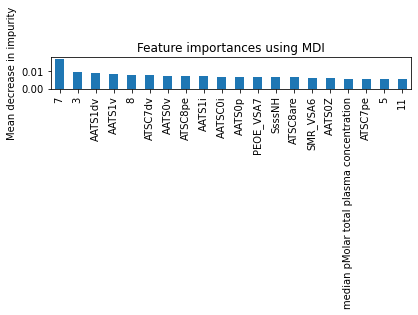

 36%|████████████████                            | 4/11 [03:42<06:35, 56.50s/it]

46
0
Best Threshold=0.566397
[[25 41]
 [21 91]]
              precision    recall  f1-score   support

           0       0.54      0.38      0.45        66
           1       0.69      0.81      0.75       112

    accuracy                           0.65       178
   macro avg       0.62      0.60      0.60       178
weighted avg       0.64      0.65      0.63       178

balanced_accuracy_score  0.5956439393939394
matthews_corrcoef  0.2110583550041834
Sensitivity 0.3787878787878788
Specificity 0.8125
f1 0.7459016393442623
LR+ 2.0202020202020203
ppv 0.6893939393939394
average_precision_score 0.7861773787332911
roc_auc_score 0.6891233766233766


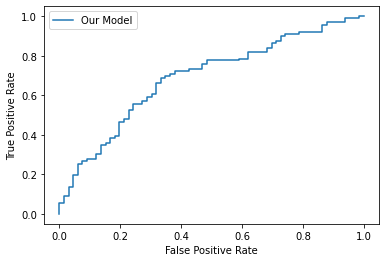

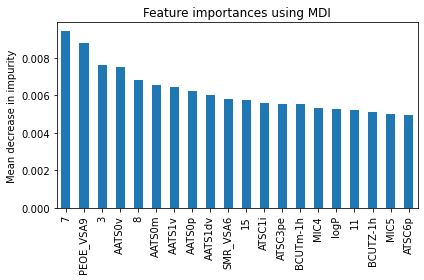

1
Best Threshold=0.650168
[[42 18]
 [57 61]]
              precision    recall  f1-score   support

           0       0.42      0.70      0.53        60
           1       0.77      0.52      0.62       118

    accuracy                           0.58       178
   macro avg       0.60      0.61      0.57       178
weighted avg       0.65      0.58      0.59       178

balanced_accuracy_score  0.6084745762711864
matthews_corrcoef  0.20641604088322874
Sensitivity 0.7
Specificity 0.5169491525423728
f1 0.6192893401015228
LR+ 1.4491228070175437
ppv 0.7721518987341772
average_precision_score 0.7623240371097557
roc_auc_score 0.6423728813559322


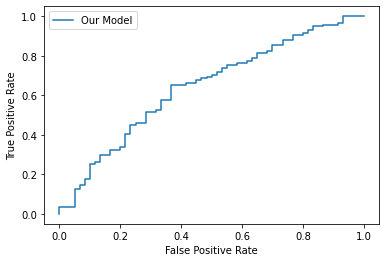

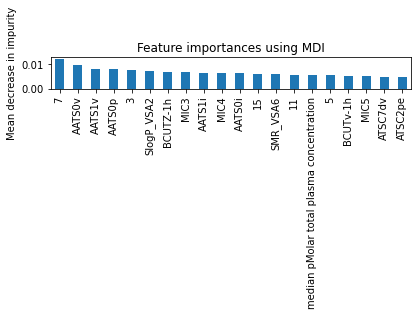

2
Best Threshold=0.653217
[[52 13]
 [44 69]]
              precision    recall  f1-score   support

           0       0.54      0.80      0.65        65
           1       0.84      0.61      0.71       113

    accuracy                           0.68       178
   macro avg       0.69      0.71      0.68       178
weighted avg       0.73      0.68      0.69       178

balanced_accuracy_score  0.7053097345132744
matthews_corrcoef  0.39663669844309446
Sensitivity 0.8
Specificity 0.6106194690265486
f1 0.7076923076923077
LR+ 2.0545454545454542
ppv 0.8414634146341463
average_precision_score 0.8027227259315888
roc_auc_score 0.7409121851599727


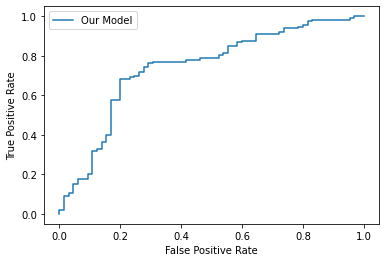

saving model


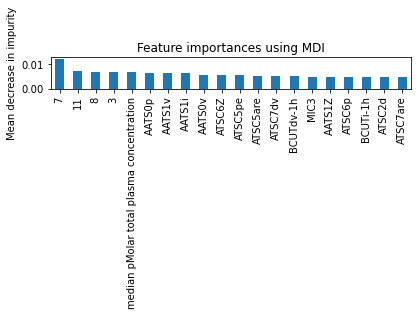

3
Best Threshold=0.662190
[[51 14]
 [44 68]]
              precision    recall  f1-score   support

           0       0.54      0.78      0.64        65
           1       0.83      0.61      0.70       112

    accuracy                           0.67       177
   macro avg       0.68      0.70      0.67       177
weighted avg       0.72      0.67      0.68       177

balanced_accuracy_score  0.6958791208791208
matthews_corrcoef  0.37871726365293723
Sensitivity 0.7846153846153846
Specificity 0.6071428571428571
f1 0.7010309278350515
LR+ 1.997202797202797
ppv 0.8292682926829268
average_precision_score 0.8336971432658301
roc_auc_score 0.7471153846153846


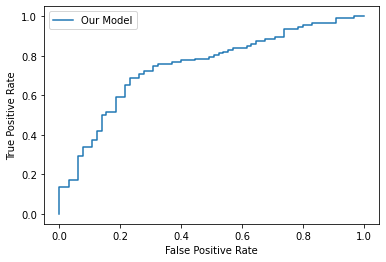

saving model


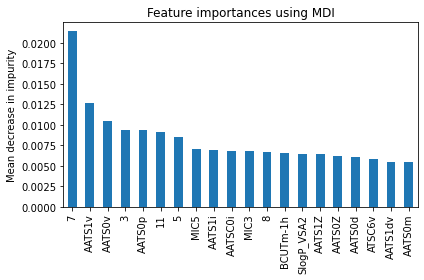

4
Best Threshold=0.623622
[[45 27]
 [44 61]]
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        72
           1       0.69      0.58      0.63       105

    accuracy                           0.60       177
   macro avg       0.60      0.60      0.60       177
weighted avg       0.62      0.60      0.60       177

balanced_accuracy_score  0.6029761904761906
matthews_corrcoef  0.2023444866046577
Sensitivity 0.625
Specificity 0.580952380952381
f1 0.6321243523316064
LR+ 1.491477272727273
ppv 0.6931818181818182
average_precision_score 0.6776097252020781
roc_auc_score 0.616931216931217


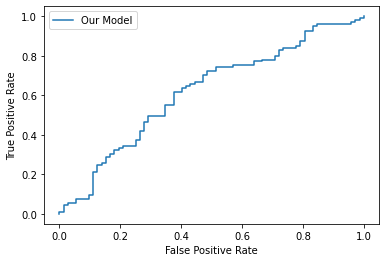

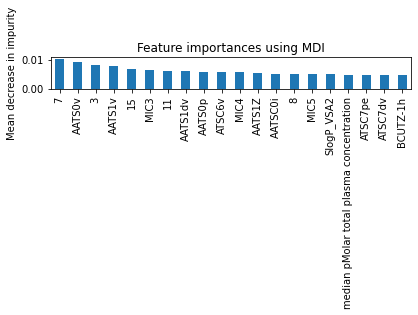

 45%|████████████████████                        | 5/11 [04:44<05:51, 58.52s/it]

47
0
Best Threshold=0.568619
[[47 21]
 [41 69]]
              precision    recall  f1-score   support

           0       0.53      0.69      0.60        68
           1       0.77      0.63      0.69       110

    accuracy                           0.65       178
   macro avg       0.65      0.66      0.65       178
weighted avg       0.68      0.65      0.66       178

balanced_accuracy_score  0.6592245989304812
matthews_corrcoef  0.30947699227989095
Sensitivity 0.6911764705882353
Specificity 0.6272727272727273
f1 0.6900000000000001
LR+ 1.8543758967001436
ppv 0.7666666666666667
average_precision_score 0.7133800860795247
roc_auc_score 0.651336898395722


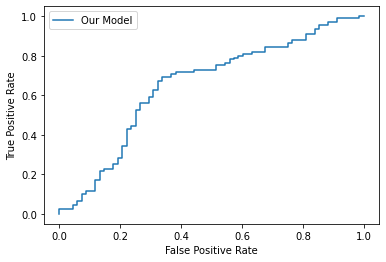

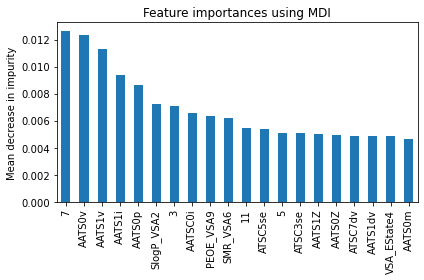

1
Best Threshold=0.554430
[[33 25]
 [42 78]]
              precision    recall  f1-score   support

           0       0.44      0.57      0.50        58
           1       0.76      0.65      0.70       120

    accuracy                           0.62       178
   macro avg       0.60      0.61      0.60       178
weighted avg       0.65      0.62      0.63       178

balanced_accuracy_score  0.6094827586206897
matthews_corrcoef  0.2078409425064961
Sensitivity 0.5689655172413793
Specificity 0.65
f1 0.6995515695067265
LR+ 1.6256157635467983
ppv 0.7572815533980582
average_precision_score 0.7790073606778434
roc_auc_score 0.6517241379310345


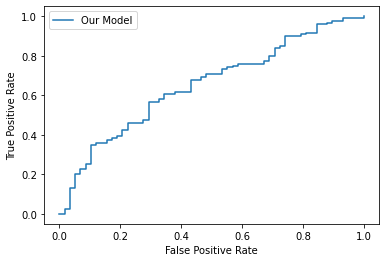

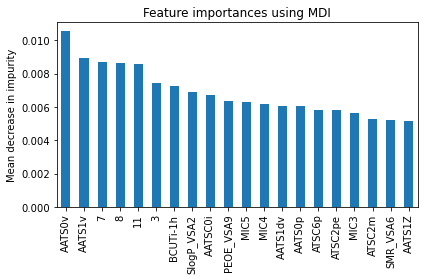

2
Best Threshold=0.542700
[[41 27]
 [29 81]]
              precision    recall  f1-score   support

           0       0.59      0.60      0.59        68
           1       0.75      0.74      0.74       110

    accuracy                           0.69       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.69      0.69      0.69       178

balanced_accuracy_score  0.6696524064171123
matthews_corrcoef  0.3375047746033545
Sensitivity 0.6029411764705882
Specificity 0.7363636363636363
f1 0.7431192660550459
LR+ 2.2870182555780927
ppv 0.75
average_precision_score 0.786602189599605
roc_auc_score 0.7101604278074867


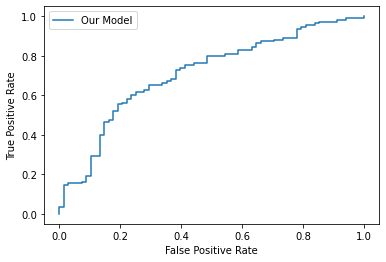

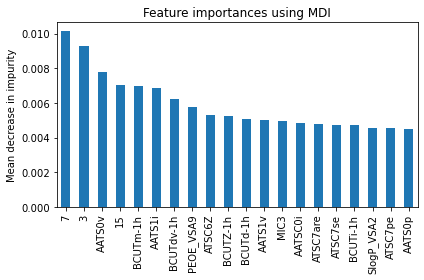

3
Best Threshold=0.634799
[[43 20]
 [40 74]]
              precision    recall  f1-score   support

           0       0.52      0.68      0.59        63
           1       0.79      0.65      0.71       114

    accuracy                           0.66       177
   macro avg       0.65      0.67      0.65       177
weighted avg       0.69      0.66      0.67       177

balanced_accuracy_score  0.6658312447786132
matthews_corrcoef  0.3182116560600234
Sensitivity 0.6825396825396826
Specificity 0.6491228070175439
f1 0.7115384615384615
LR+ 1.9452380952380954
ppv 0.7872340425531915
average_precision_score 0.8016365479812002
roc_auc_score 0.7063492063492062


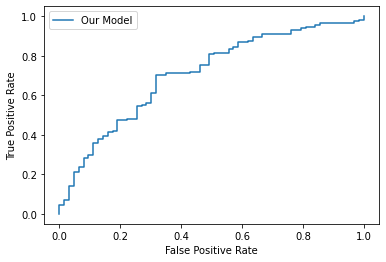

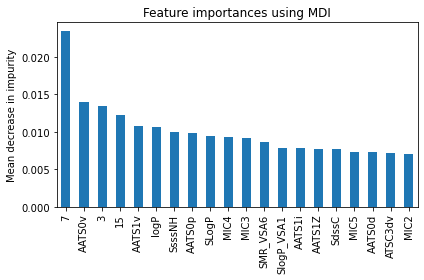

4
Best Threshold=0.642777
[[42 29]
 [39 67]]
              precision    recall  f1-score   support

           0       0.52      0.59      0.55        71
           1       0.70      0.63      0.66       106

    accuracy                           0.62       177
   macro avg       0.61      0.61      0.61       177
weighted avg       0.63      0.62      0.62       177

balanced_accuracy_score  0.6118123837363805
matthews_corrcoef  0.2200006089990685
Sensitivity 0.5915492957746479
Specificity 0.6320754716981132
f1 0.6633663366336633
LR+ 1.607800650054171
ppv 0.6979166666666666
average_precision_score 0.7414775398508007
roc_auc_score 0.6874833909115069


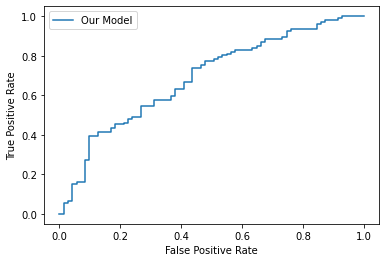

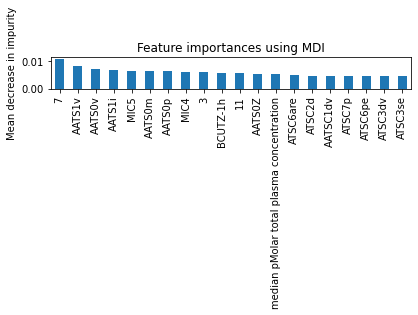

 55%|████████████████████████                    | 6/11 [05:39<04:45, 57.07s/it]

48
0
Best Threshold=0.628162
[[38 25]
 [53 62]]
              precision    recall  f1-score   support

           0       0.42      0.60      0.49        63
           1       0.71      0.54      0.61       115

    accuracy                           0.56       178
   macro avg       0.57      0.57      0.55       178
weighted avg       0.61      0.56      0.57       178

balanced_accuracy_score  0.571152518978606
matthews_corrcoef  0.13613166236322502
Sensitivity 0.6031746031746031
Specificity 0.5391304347826087
f1 0.6138613861386139
LR+ 1.308775082359988
ppv 0.7126436781609196
average_precision_score 0.727176578162289
roc_auc_score 0.6082815734989648


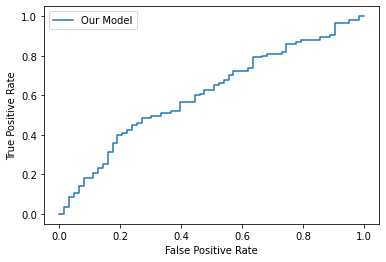

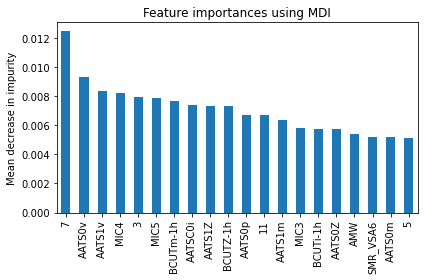

1
Best Threshold=0.562385
[[42 27]
 [46 63]]
              precision    recall  f1-score   support

           0       0.48      0.61      0.54        69
           1       0.70      0.58      0.63       109

    accuracy                           0.59       178
   macro avg       0.59      0.59      0.58       178
weighted avg       0.61      0.59      0.60       178

balanced_accuracy_score  0.5933386517750299
matthews_corrcoef  0.18191425100919906
Sensitivity 0.6086956521739131
Specificity 0.5779816513761468
f1 0.6331658291457285
LR+ 1.44234404536862
ppv 0.7
average_precision_score 0.7303650488713133
roc_auc_score 0.6560297832735009


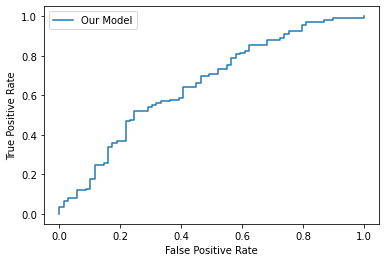

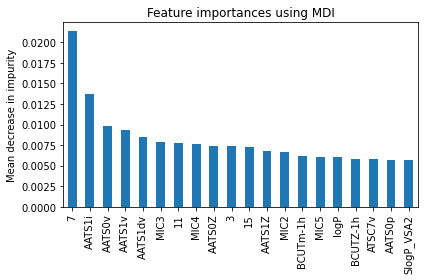

2
Best Threshold=0.566351
[[42 21]
 [40 75]]
              precision    recall  f1-score   support

           0       0.51      0.67      0.58        63
           1       0.78      0.65      0.71       115

    accuracy                           0.66       178
   macro avg       0.65      0.66      0.65       178
weighted avg       0.69      0.66      0.66       178

balanced_accuracy_score  0.6594202898550725
matthews_corrcoef  0.3058794089114875
Sensitivity 0.6666666666666666
Specificity 0.6521739130434783
f1 0.7109004739336493
LR+ 1.9166666666666665
ppv 0.78125
average_precision_score 0.8009059757883921
roc_auc_score 0.7102829537612146


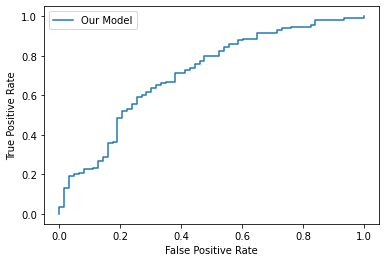

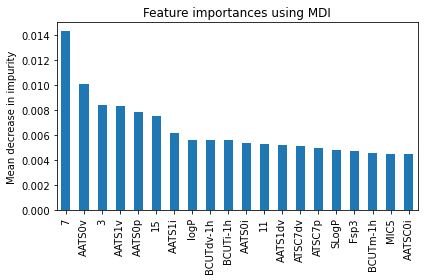

3
Best Threshold=0.588986
[[43 18]
 [39 77]]
              precision    recall  f1-score   support

           0       0.52      0.70      0.60        61
           1       0.81      0.66      0.73       116

    accuracy                           0.68       177
   macro avg       0.67      0.68      0.67       177
weighted avg       0.71      0.68      0.69       177

balanced_accuracy_score  0.6843555681175806
matthews_corrcoef  0.3514078332478892
Sensitivity 0.7049180327868853
Specificity 0.6637931034482759
f1 0.7298578199052133
LR+ 2.096679277007146
ppv 0.8105263157894737
average_precision_score 0.8352194066757465
roc_auc_score 0.7419446014697569


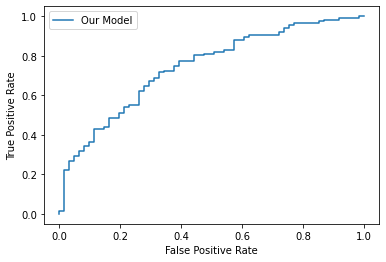

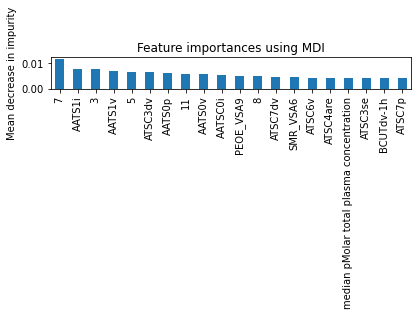

4
Best Threshold=0.598120
[[47 25]
 [39 66]]
              precision    recall  f1-score   support

           0       0.55      0.65      0.59        72
           1       0.73      0.63      0.67       105

    accuracy                           0.64       177
   macro avg       0.64      0.64      0.63       177
weighted avg       0.65      0.64      0.64       177

balanced_accuracy_score  0.6406746031746031
matthews_corrcoef  0.27652644496361817
Sensitivity 0.6527777777777778
Specificity 0.6285714285714286
f1 0.6734693877551019
LR+ 1.7574786324786325
ppv 0.7252747252747253
average_precision_score 0.7217751083821156
roc_auc_score 0.6772486772486773


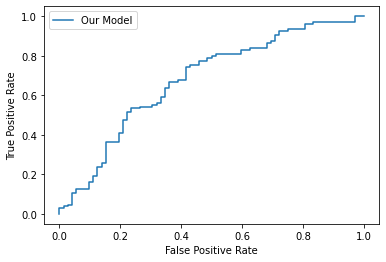

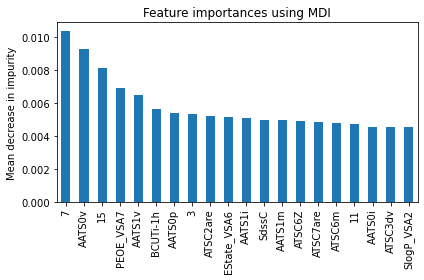

 64%|████████████████████████████                | 7/11 [06:43<03:57, 59.42s/it]

49
0
Best Threshold=0.648597
[[44 20]
 [55 59]]
              precision    recall  f1-score   support

           0       0.44      0.69      0.54        64
           1       0.75      0.52      0.61       114

    accuracy                           0.58       178
   macro avg       0.60      0.60      0.58       178
weighted avg       0.64      0.58      0.59       178

balanced_accuracy_score  0.6025219298245614
matthews_corrcoef  0.1980423348747564
Sensitivity 0.6875
Specificity 0.5175438596491229
f1 0.61139896373057
LR+ 1.4250000000000003
ppv 0.7468354430379747
average_precision_score 0.7294312158464669
roc_auc_score 0.6207510964912281


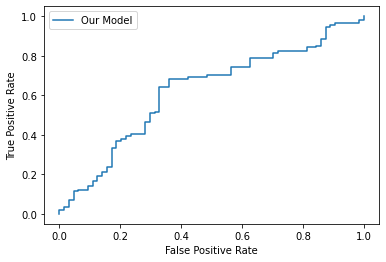

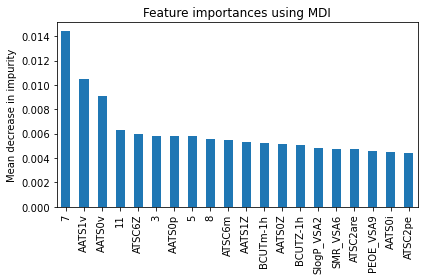

1
Best Threshold=0.632113
[[43 27]
 [34 74]]
              precision    recall  f1-score   support

           0       0.56      0.61      0.59        70
           1       0.73      0.69      0.71       108

    accuracy                           0.66       178
   macro avg       0.65      0.65      0.65       178
weighted avg       0.66      0.66      0.66       178

balanced_accuracy_score  0.6497354497354497
matthews_corrcoef  0.29526330405613277
Sensitivity 0.6142857142857143
Specificity 0.6851851851851852
f1 0.708133971291866
LR+ 1.951260504201681
ppv 0.7326732673267327
average_precision_score 0.7481734285104303
roc_auc_score 0.6710317460317461


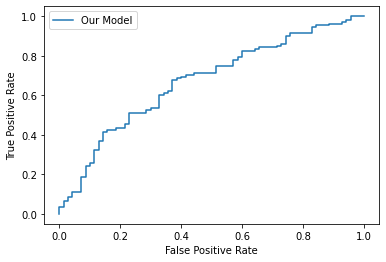

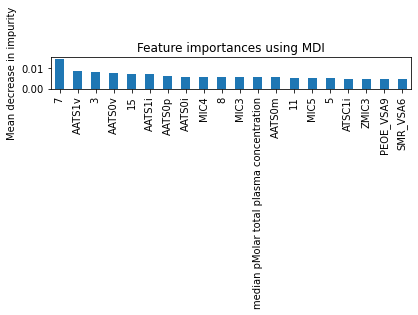

2
Best Threshold=0.638670
[[45 30]
 [28 75]]
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        75
           1       0.71      0.73      0.72       103

    accuracy                           0.67       178
   macro avg       0.67      0.66      0.66       178
weighted avg       0.67      0.67      0.67       178

balanced_accuracy_score  0.6640776699029126
matthews_corrcoef  0.3294372014823425
Sensitivity 0.6
Specificity 0.7281553398058253
f1 0.7211538461538461
LR+ 2.2071428571428573
ppv 0.7142857142857143
average_precision_score 0.7346892391475366
roc_auc_score 0.7220711974110033


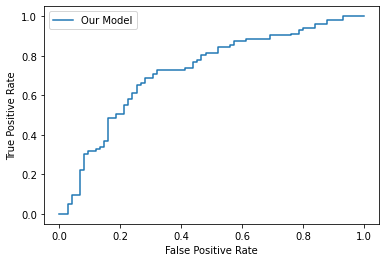

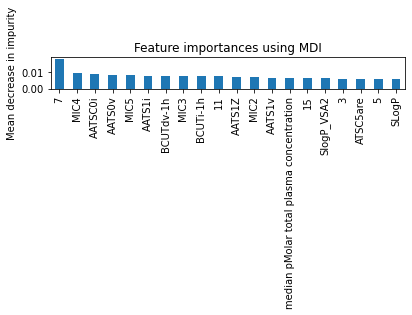

3
Best Threshold=0.618373
[[37 16]
 [39 85]]
              precision    recall  f1-score   support

           0       0.49      0.70      0.57        53
           1       0.84      0.69      0.76       124

    accuracy                           0.69       177
   macro avg       0.66      0.69      0.66       177
weighted avg       0.74      0.69      0.70       177

balanced_accuracy_score  0.6917985392574558
matthews_corrcoef  0.3549413405829649
Sensitivity 0.6981132075471698
Specificity 0.6854838709677419
f1 0.7555555555555555
LR+ 2.2196419932268983
ppv 0.8415841584158416
average_precision_score 0.8214422138898981
roc_auc_score 0.7096774193548387


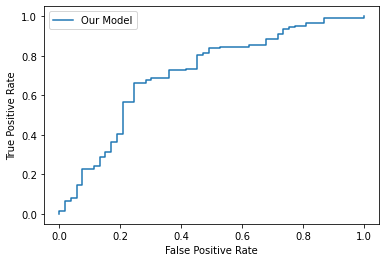

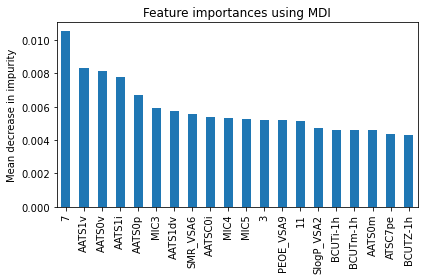

4
Best Threshold=0.622797
[[43 23]
 [40 71]]
              precision    recall  f1-score   support

           0       0.52      0.65      0.58        66
           1       0.76      0.64      0.69       111

    accuracy                           0.64       177
   macro avg       0.64      0.65      0.63       177
weighted avg       0.67      0.64      0.65       177

balanced_accuracy_score  0.6455773955773956
matthews_corrcoef  0.28213334978590576
Sensitivity 0.6515151515151515
Specificity 0.6396396396396397
f1 0.6926829268292682
LR+ 1.8079545454545454
ppv 0.7553191489361702
average_precision_score 0.7379784851745721
roc_auc_score 0.6706251706251706


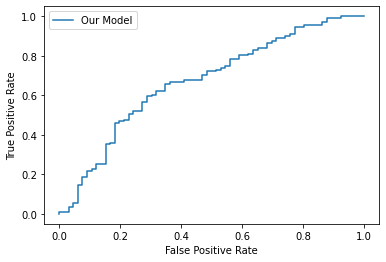

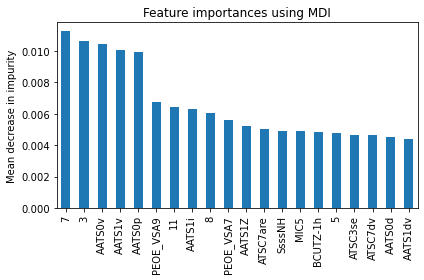

 73%|████████████████████████████████            | 8/11 [07:39<02:55, 58.51s/it]

50
0
Best Threshold=0.590892
[[36 25]
 [42 75]]
              precision    recall  f1-score   support

           0       0.46      0.59      0.52        61
           1       0.75      0.64      0.69       117

    accuracy                           0.62       178
   macro avg       0.61      0.62      0.60       178
weighted avg       0.65      0.62      0.63       178

balanced_accuracy_score  0.6155947877259353
matthews_corrcoef  0.22114585032240322
Sensitivity 0.5901639344262295
Specificity 0.6410256410256411
f1 0.6912442396313365
LR+ 1.6440281030444968
ppv 0.75
average_precision_score 0.757122904350052
roc_auc_score 0.6434075942272663


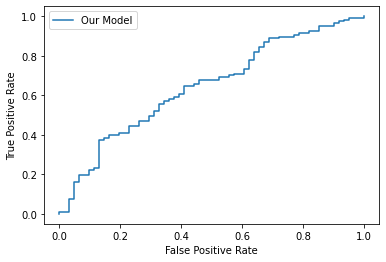

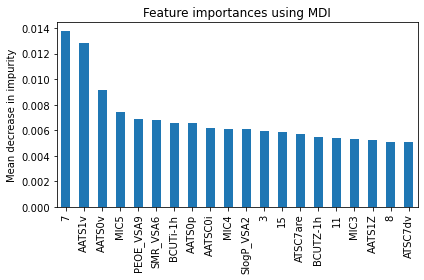

1
Best Threshold=0.510237
[[35 30]
 [40 73]]
              precision    recall  f1-score   support

           0       0.47      0.54      0.50        65
           1       0.71      0.65      0.68       113

    accuracy                           0.61       178
   macro avg       0.59      0.59      0.59       178
weighted avg       0.62      0.61      0.61       178

balanced_accuracy_score  0.5922396187882913
matthews_corrcoef  0.17988466888313043
Sensitivity 0.5384615384615384
Specificity 0.6460176991150443
f1 0.6759259259259259
LR+ 1.521153846153846
ppv 0.7087378640776699
average_precision_score 0.7591019513733637
roc_auc_score 0.6371681415929203


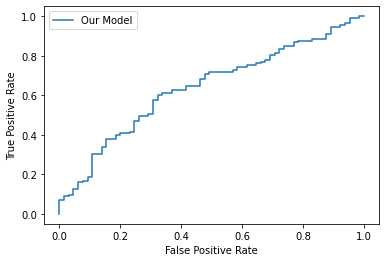

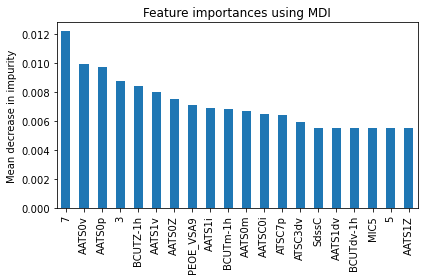

2
Best Threshold=0.547794
[[48 27]
 [30 73]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        75
           1       0.73      0.71      0.72       103

    accuracy                           0.68       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.68      0.68      0.68       178

balanced_accuracy_score  0.674368932038835
matthews_corrcoef  0.3470571898902518
Sensitivity 0.64
Specificity 0.7087378640776699
f1 0.7192118226600985
LR+ 2.1973333333333334
ppv 0.73
average_precision_score 0.7461607292012777
roc_auc_score 0.7185760517799353


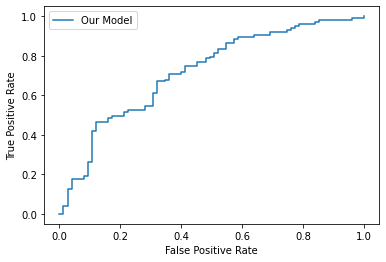

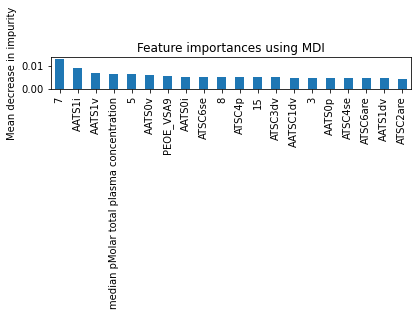

3
Best Threshold=0.676879
[[50 21]
 [41 65]]
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        71
           1       0.76      0.61      0.68       106

    accuracy                           0.65       177
   macro avg       0.65      0.66      0.65       177
weighted avg       0.67      0.65      0.65       177

balanced_accuracy_score  0.6587164496412437
matthews_corrcoef  0.3112892484746771
Sensitivity 0.704225352112676
Specificity 0.6132075471698113
f1 0.6770833333333334
LR+ 1.820680178632772
ppv 0.7558139534883721
average_precision_score 0.7624626173743626
roc_auc_score 0.6966516077597662


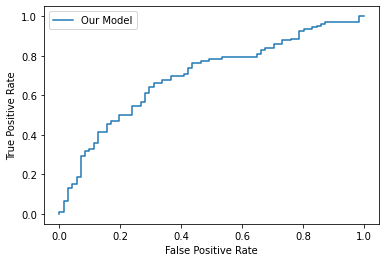

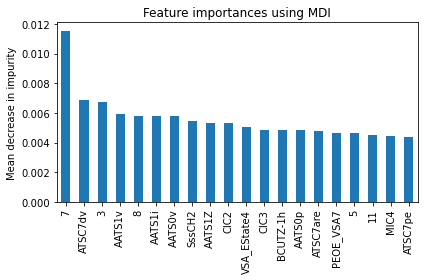

4
Best Threshold=0.642156
[[39 17]
 [44 77]]
              precision    recall  f1-score   support

           0       0.47      0.70      0.56        56
           1       0.82      0.64      0.72       121

    accuracy                           0.66       177
   macro avg       0.64      0.67      0.64       177
weighted avg       0.71      0.66      0.67       177

balanced_accuracy_score  0.6663961038961039
matthews_corrcoef  0.31013935158591427
Sensitivity 0.6964285714285714
Specificity 0.6363636363636364
f1 0.7162790697674419
LR+ 1.9151785714285714
ppv 0.8191489361702128
average_precision_score 0.8102095405409547
roc_auc_score 0.7043978748524202


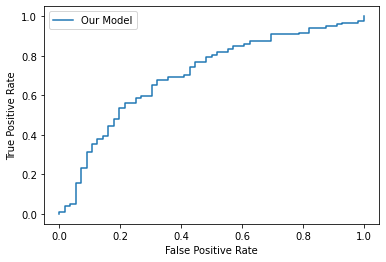

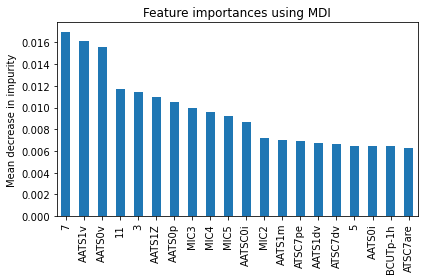

 82%|████████████████████████████████████        | 9/11 [08:38<01:56, 58.48s/it]

51
0
Best Threshold=0.577747
[[42 26]
 [40 70]]
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        68
           1       0.73      0.64      0.68       110

    accuracy                           0.63       178
   macro avg       0.62      0.63      0.62       178
weighted avg       0.65      0.63      0.63       178

balanced_accuracy_score  0.6270053475935828
matthews_corrcoef  0.24760548402336938
Sensitivity 0.6176470588235294
Specificity 0.6363636363636364
f1 0.6796116504854369
LR+ 1.6985294117647058
ppv 0.7291666666666666
average_precision_score 0.743849749100068
roc_auc_score 0.6863636363636364


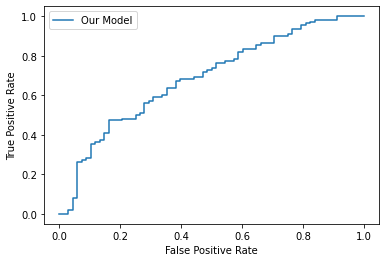

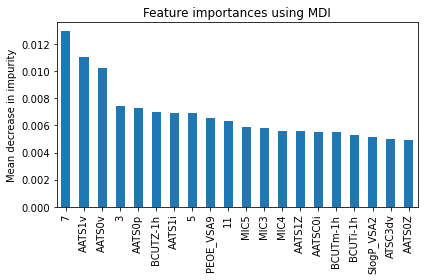

1
Best Threshold=0.606304
[[51 17]
 [42 68]]
              precision    recall  f1-score   support

           0       0.55      0.75      0.63        68
           1       0.80      0.62      0.70       110

    accuracy                           0.67       178
   macro avg       0.67      0.68      0.67       178
weighted avg       0.70      0.67      0.67       178

balanced_accuracy_score  0.6840909090909091
matthews_corrcoef  0.3581477275111593
Sensitivity 0.75
Specificity 0.6181818181818182
f1 0.6974358974358974
LR+ 1.9642857142857142
ppv 0.8
average_precision_score 0.7642531830752884
roc_auc_score 0.700668449197861


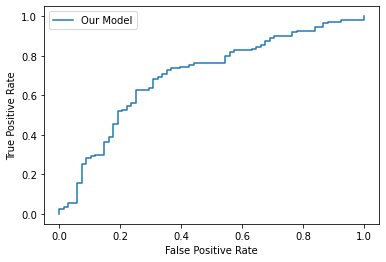

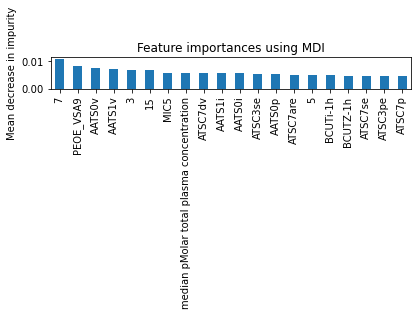

2
Best Threshold=0.641540
[[46 26]
 [33 73]]
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        72
           1       0.74      0.69      0.71       106

    accuracy                           0.67       178
   macro avg       0.66      0.66      0.66       178
weighted avg       0.67      0.67      0.67       178

balanced_accuracy_score  0.6637840670859538
matthews_corrcoef  0.32358597120509225
Sensitivity 0.6388888888888888
Specificity 0.6886792452830188
f1 0.7121951219512194
LR+ 2.052188552188552
ppv 0.7373737373737373
average_precision_score 0.7726373771138249
roc_auc_score 0.7102987421383649


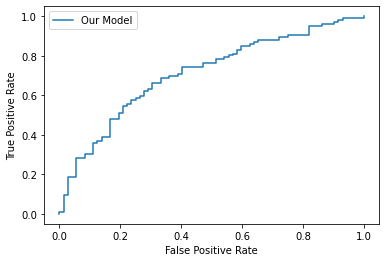

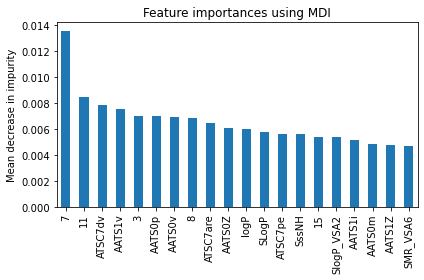

3
Best Threshold=0.619181
[[35 16]
 [41 85]]
              precision    recall  f1-score   support

           0       0.46      0.69      0.55        51
           1       0.84      0.67      0.75       126

    accuracy                           0.68       177
   macro avg       0.65      0.68      0.65       177
weighted avg       0.73      0.68      0.69       177

balanced_accuracy_score  0.6804388422035481
matthews_corrcoef  0.33018923114835824
Sensitivity 0.6862745098039216
Specificity 0.6746031746031746
f1 0.7488986784140969
LR+ 2.1090387374461983
ppv 0.8415841584158416
average_precision_score 0.8656555278558427
roc_auc_score 0.7242452536570184


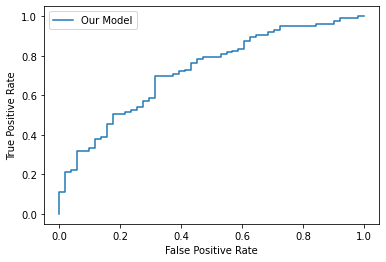

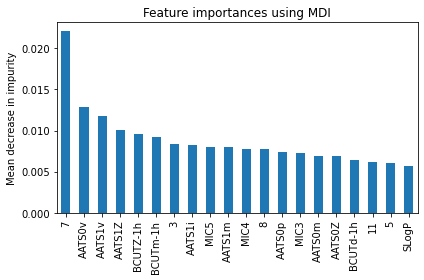

4
Best Threshold=0.576215
[[42 27]
 [42 66]]
              precision    recall  f1-score   support

           0       0.50      0.61      0.55        69
           1       0.71      0.61      0.66       108

    accuracy                           0.61       177
   macro avg       0.60      0.61      0.60       177
weighted avg       0.63      0.61      0.61       177

balanced_accuracy_score  0.6099033816425121
matthews_corrcoef  0.21468235810691053
Sensitivity 0.6086956521739131
Specificity 0.6111111111111112
f1 0.6567164179104478
LR+ 1.5652173913043481
ppv 0.7096774193548387
average_precision_score 0.6881610255664602
roc_auc_score 0.6323134728931831


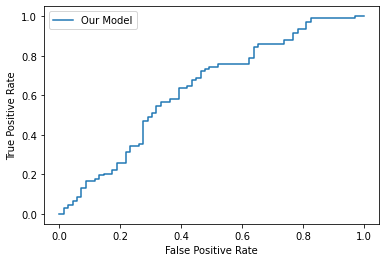

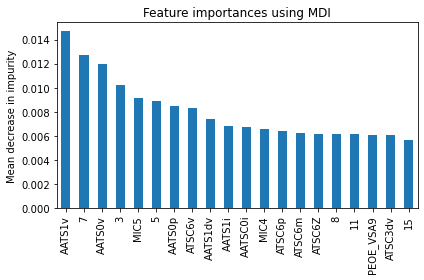

 91%|███████████████████████████████████████    | 10/11 [09:43<01:00, 60.50s/it]

52
0
Best Threshold=0.633628
[[39 23]
 [42 74]]
              precision    recall  f1-score   support

           0       0.48      0.63      0.55        62
           1       0.76      0.64      0.69       116

    accuracy                           0.63       178
   macro avg       0.62      0.63      0.62       178
weighted avg       0.66      0.63      0.64       178

balanced_accuracy_score  0.6334816462736375
matthews_corrcoef  0.25541594914045057
Sensitivity 0.6290322580645161
Specificity 0.6379310344827587
f1 0.6948356807511737
LR+ 1.7373271889400923
ppv 0.7628865979381443
average_precision_score 0.7737982902901946
roc_auc_score 0.6519744160177975


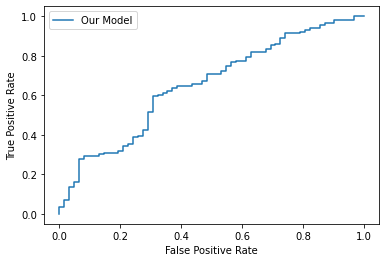

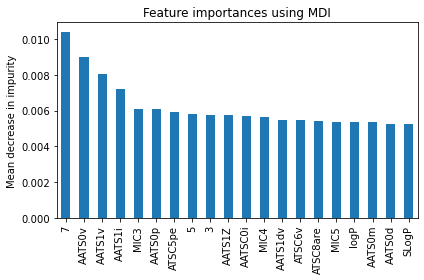

1
Best Threshold=0.609973
[[32 27]
 [43 76]]
              precision    recall  f1-score   support

           0       0.43      0.54      0.48        59
           1       0.74      0.64      0.68       119

    accuracy                           0.61       178
   macro avg       0.58      0.59      0.58       178
weighted avg       0.63      0.61      0.62       178

balanced_accuracy_score  0.590514171770403
matthews_corrcoef  0.1725825255023957
Sensitivity 0.5423728813559322
Specificity 0.6386554621848739
f1 0.6846846846846846
LR+ 1.5009854158454865
ppv 0.7378640776699029
average_precision_score 0.7703326657613606
roc_auc_score 0.6523287281014101


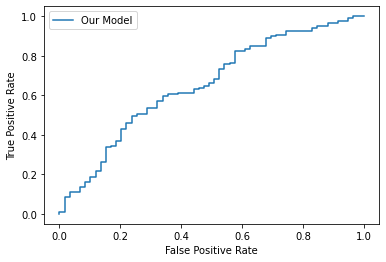

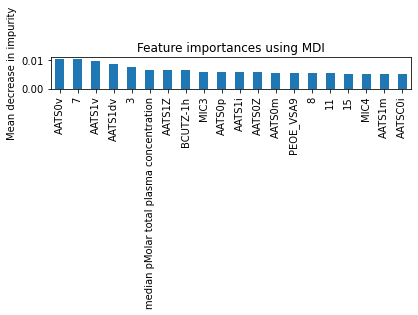

2
Best Threshold=0.592712
[[37 31]
 [30 80]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.55        68
           1       0.72      0.73      0.72       110

    accuracy                           0.66       178
   macro avg       0.64      0.64      0.64       178
weighted avg       0.66      0.66      0.66       178

balanced_accuracy_score  0.6356951871657754
matthews_corrcoef  0.2721738196924865
Sensitivity 0.5441176470588235
Specificity 0.7272727272727273
f1 0.7239819004524887
LR+ 1.9950980392156863
ppv 0.7207207207207207
average_precision_score 0.7146611536788847
roc_auc_score 0.6474598930481283


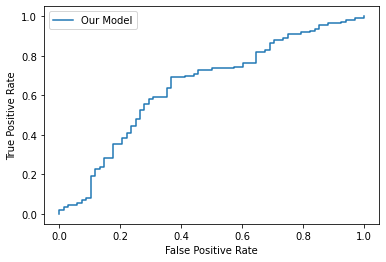

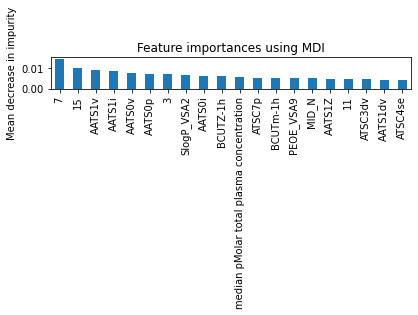

3
Best Threshold=0.678170
[[57 17]
 [49 54]]
              precision    recall  f1-score   support

           0       0.54      0.77      0.63        74
           1       0.76      0.52      0.62       103

    accuracy                           0.63       177
   macro avg       0.65      0.65      0.63       177
weighted avg       0.67      0.63      0.63       177

balanced_accuracy_score  0.6472710574652323
matthews_corrcoef  0.29641471942437125
Sensitivity 0.7702702702702703
Specificity 0.5242718446601942
f1 0.6206896551724137
LR+ 1.6191395477109762
ppv 0.7605633802816901
average_precision_score 0.7194091830435241
roc_auc_score 0.683154027814222


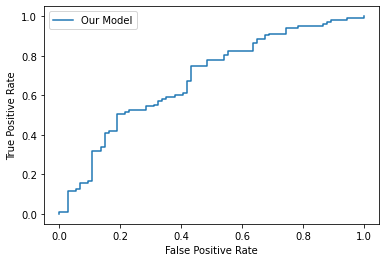

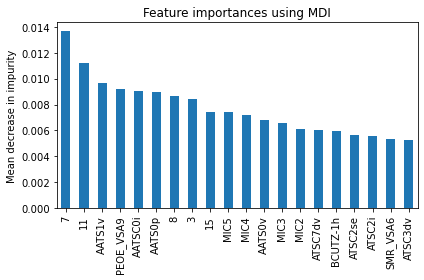

4
Best Threshold=0.643406
[[42 23]
 [31 81]]
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        65
           1       0.78      0.72      0.75       112

    accuracy                           0.69       177
   macro avg       0.68      0.68      0.68       177
weighted avg       0.70      0.69      0.70       177

balanced_accuracy_score  0.6846840659340659
matthews_corrcoef  0.36169875414555785
Sensitivity 0.6461538461538462
Specificity 0.7232142857142857
f1 0.75
LR+ 2.3344913151364763
ppv 0.7788461538461539
average_precision_score 0.8323761017706219
roc_auc_score 0.7369505494505495


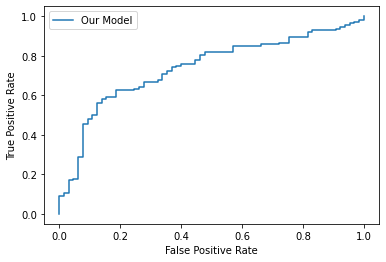

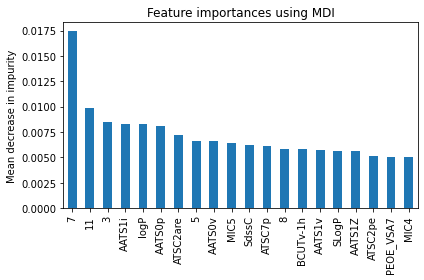

100%|███████████████████████████████████████████| 11/11 [10:38<00:00, 58.07s/it]


In [56]:
#Models to predict DILI with All : Mordred, Morgan, Physicochemical and Liv preds


list_of_lists=[]
baseline=0.50
for i in tqdm(range(42,53)):
    
    print(i)
    outercv = KFold(n_splits=5, random_state=i, shuffle=True) 
    for split, (train_index, test_index) in enumerate(outercv.split(X_ncv)):
            
        print(split)
        X_train= X_ncv[train_index]
        y_train= y_ncv[train_index]

        X_test= X_ncv[test_index]
        y_test= y_ncv[test_index]

        inner_cv = KFold(n_splits=4, random_state=i, shuffle=True) 

        #Hyperparameter Optimisation
        rf = RandomForestClassifier(n_jobs=-1, random_state=i)
        # Instantiate the RandomHalving search model
        param_dist_grid = { 
                'max_depth': randint(5, 20),
                'max_features': randint(30, 50),
                'min_samples_leaf': randint(5, 15),
                'min_samples_split': randint(5, 15),
                'n_estimators':[200, 300, 400, 500, 600],
                'bootstrap': [True, False],
                'oob_score': [False],
                'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'n_jobs': [40],
                'class_weight' : [None, 'balanced_subsample', 'balanced']}

        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                    factor=2, random_state=i, n_jobs=40, verbose=0, cv = inner_cv)
        rsh.fit(X_train, y_train)
        classifier = rsh.best_estimator_
        classifier.fit(X_train, y_train)

        #Threshold Balancing
        cross_val_prob_cp = cross_val_predict(classifier, X_train, y_train, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_train, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))


        y_proba = classifier.predict_proba(X_test)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        print(classification_report(y_test, y_pred))
        ba =balanced_accuracy_score(y_test, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(y_test, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

        f1= metrics.f1_score(y_test, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_test, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_test, y_proba)
        print("average_precision_score", average_precision_score)

        auc= roc_auc_score(y_test, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_proba)
        # plot the roc curve for the model
        plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        if (auc>baseline):
                    # save
                    print("saving model")
                    baseline=auc
                    pickle.dump(classifier, open("dili_bestNCV_model.sav",  'wb'))


        importances = classifier.feature_importances_
        forest_importances = pd.Series(importances, index=test_feature_list)

        fig, ax = plt.subplots()
        forest_importances.sort_values(ascending=False)[:20].plot.bar()
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

        plt.show()

        metrics_row=["NCV",  "DILI", i, split, ba, mcc, Sensitivity, Specificity, auc, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(metrics_row)


In [57]:
results = pd.DataFrame(list_of_lists, columns=["NCV",  "DILI", "i", "split", "ba", "mcc", "Sensitivity", "Specificity", "auc",
                                               "f1", "pos_LR", "ppv", "average_precision_score"])
results["Features"] = "Morgan, Mordred, Phisicochemical, Liv data"
results.to_csv("NCV_models_all_features.csv", index=False)
results

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0   NCV  DILI  42      0  0.619741  0.232736     0.584615     0.654867   
1   NCV  DILI  42      1  0.660028  0.289709     0.705882     0.614173   
2   NCV  DILI  42      2  0.638189  0.266291     0.692308     0.584071   
3   NCV  DILI  42      3  0.686072  0.371429     0.719512     0.652632   
4   NCV  DILI  42      4  0.580975  0.160071     0.492308     0.669643   
5   NCV  DILI  43      0  0.675351  0.328220     0.678571     0.672131   
6   NCV  DILI  43      1  0.632430  0.269354     0.543210     0.721649   
7   NCV  DILI  43      2  0.618413  0.222330     0.589286     0.647541   
8   NCV  DILI  43      3  0.670426  0.327575     0.761905     0.578947   
9   NCV  DILI  43      4  0.675000  0.345105     0.750000     0.600000   
10  NCV  DILI  44      0  0.633118  0.257990     0.671642     0.594595   
11  NCV  DILI  44      1  0.581963  0.157365     0.593750     0.570175   
12  NCV  DILI  44      2  0.672247  0.337422     0.641791     0.702703   
13  NCV  DILI  44      3  0.672776  0.324803     0.706897     0.638655   
14  NCV  DILI  44      4  0.578373  0.156415     0.680556     0.476190   
15  NCV  DILI  45      0  0.651590  0.307770     0.531250     0.771930   
16  NCV  DILI  45      1  0.617719  0.238211     0.532468     0.702970   
17  NCV  DILI  45      2  0.646803  0.278509     0.789474     0.504132   
18  NCV  DILI  45      3  0.634712  0.270404     0.523810     0.745614   
19  NCV  DILI  45      4  0.696879  0.396185     0.611940     0.781818   
20  NCV  DILI  46      0  0.595644  0.211058     0.378788     0.812500   
21  NCV  DILI  46      1  0.608475  0.206416     0.700000     0.516949   
22  NCV  DILI  46      2  0.705310  0.396637     0.800000     0.610619   
23  NCV  DILI  46      3  0.695879  0.378717     0.784615     0.607143   
24  NCV  DILI  46      4  0.602976  0.202344     0.625000     0.580952   
25  NCV  DILI  47      0  0.659225  0.309477     0.691176     0.627273   
26  NCV  DILI  47      1  0.609483  0.207841     0.568966     0.650000   
27  NCV  DILI  47      2  0.669652  0.337505     0.602941     0.736364   
28  NCV  DILI  47      3  0.665831  0.318212     0.682540     0.649123   
29  NCV  DILI  47      4  0.611812  0.220001     0.591549     0.632075   
30  NCV  DILI  48      0  0.571153  0.136132     0.603175     0.539130   
31  NCV  DILI  48      1  0.593339  0.181914     0.608696     0.577982   
32  NCV  DILI  48      2  0.659420  0.305879     0.666667     0.652174   
33  NCV  DILI  48      3  0.684356  0.351408     0.704918     0.663793   
34  NCV  DILI  48      4  0.640675  0.276526     0.652778     0.628571   
35  NCV  DILI  49      0  0.602522  0.198042     0.687500     0.517544   
36  NCV  DILI  49      1  0.649735  0.295263     0.614286     0.685185   
37  NCV  DILI  49      2  0.664078  0.329437     0.600000     0.728155   
38  NCV  DILI  49      3  0.691799  0.354941     0.698113     0.685484   
39  NCV  DILI  49      4  0.645577  0.282133     0.651515     0.639640   
40  NCV  DILI  50      0  0.615595  0.221146     0.590164     0.641026   
41  NCV  DILI  50      1  0.592240  0.179885     0.538462     0.646018   
42  NCV  DILI  50      2  0.674369  0.347057     0.640000     0.708738   
43  NCV  DILI  50      3  0.658716  0.311289     0.704225     0.613208   
44  NCV  DILI  50      4  0.666396  0.310139     0.696429     0.636364   
45  NCV  DILI  51      0  0.627005  0.247605     0.617647     0.636364   
46  NCV  DILI  51      1  0.684091  0.358148     0.750000     0.618182   
47  NCV  DILI  51      2  0.663784  0.323586     0.638889     0.688679   
48  NCV  DILI  51      3  0.680439  0.330189     0.686275     0.674603   
49  NCV  DILI  51      4  0.609903  0.214682     0.608696     0.611111   
50  NCV  DILI  52      0  0.633482  0.255416     0.629032     0.637931   
51  NCV  DILI  52      1  0.590514  0.172583     0.542373     0.638655   
52  NCV  DILI  52      2  0.635695  0.272174     0.544118     0.727273   
53  NCV 

In [58]:
results.describe()

i      split         ba        mcc  Sensitivity  Specificity  \
count  55.000000  55.000000  55.000000  55.000000    55.000000    55.000000   
mean   47.000000   2.000000   0.642435   0.277087     0.642130     0.642741   
std     3.191424   1.427248   0.035378   0.067937     0.082394     0.070266   
min    42.000000   0.000000   0.571153   0.136132     0.378788     0.476190   
25%    44.000000   1.000000   0.613704   0.220573     0.592650     0.608881   
50%    47.000000   2.000000   0.646803   0.282133     0.641791     0.639640   
75%    50.000000   3.000000   0.671336   0.328829     0.697271     0.685335   
max    52.000000   4.000000   0.705310   0.396637     0.800000     0.812500   

             auc         f1     pos_LR        ppv  average_precision_score  
count  55.000000  55.000000  55.000000  55.000000                55.000000  
mean    0.681644   0.691417   1.841774   0.755170                 0.764704  
std     0.036259   0.043262   0.300423   0.047808                 0.041748  
min     0.608282   0.561798   1.299242   0.654206                 0.677610  
25%     0.651849   0.674698   1.622378   0.722998                 0.735288  
50%     0.683154   0.692683   1.829532   0.750000                 0.762463  
75%     0.710135   0.718096   2.053367   0.780048                 0.791801  
max     0.747115   0.774775   2.804726   0.841584                 0.865656

In [59]:
from sklearn.model_selection import KFold
import pickle

In [60]:


loaded_rf = pickle.load(open("dili_bestNCV_model.sav", 'rb'))
params = loaded_rf.get_params()
#Important to retrain on entire data as previous one was the best of trained in NCV (on 4 out 5 folds)   
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(max_depth=15, max_features=44, min_samples_leaf=14,
                       min_samples_split=5, n_estimators=600, n_jobs=40,
                       random_state=42)

Best Threshold=0.638612
[[41 26]
 [68 88]]
              precision    recall  f1-score   support

           0       0.38      0.61      0.47        67
           1       0.77      0.56      0.65       156

    accuracy                           0.58       223
   macro avg       0.57      0.59      0.56       223
weighted avg       0.65      0.58      0.60       223

balanced_accuracy_score  0.5880214313050134
matthews_corrcoef  0.1614553527614774
Sensitivity 0.6119402985074627
Specificity 0.5641025641025641
f1 0.6518518518518518
LR+ 1.4038630377524144
ppv 0.7719298245614035
average_precision_score 0.7874635000711183
roc_auc_score 0.6255262150784539


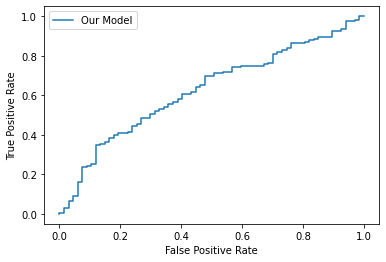

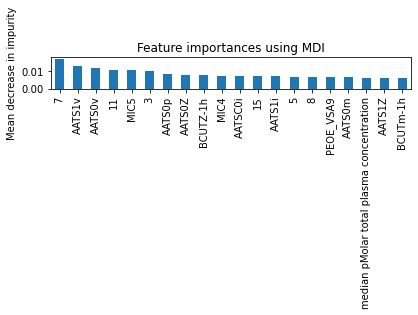

In [61]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)

average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
print("average_precision_score", average_precision_score)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [62]:
#Final model released on all data
loaded_rf = pickle.load(open("dili_bestNCV_model.sav", 'rb'))
params = loaded_rf.get_params()
    
final_classifier= RandomForestClassifier(**params)
final_classifier.fit(X_dili, y_dili)
pickle.dump(final_classifier, open("final_dili_model.sav",  'wb'))

In [63]:
#Models to predict DILI with All : Morgan, MACCS, Mordred and Physicochemical 

In [64]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[selected_mfp_Features+selected_maccs_Features+selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [65]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[selected_mfp_Features+selected_maccs_Features+selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [66]:
y_dili = np.array(test_dili_all['TOXICITY'])
test_features= test_dili_all[selected_mfp_Features+selected_maccs_Features+selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_dili = np.array(test_features)

In [67]:
test_feature_list = list(test_feature_list)
test_feature_list

['Mfp1',
 'Mfp13',
 'Mfp80',
 'Mfp114',
 'Mfp147',
 'Mfp216',
 'Mfp222',
 'Mfp227',
 'Mfp231',
 'Mfp249',
 'Mfp283',
 'Mfp294',
 'Mfp310',
 'Mfp314',
 'Mfp322',
 'Mfp350',
 'Mfp378',
 'Mfp389',
 'Mfp392',
 'Mfp397',
 'Mfp486',
 'Mfp519',
 'Mfp561',
 'Mfp591',
 'Mfp650',
 'Mfp656',
 'Mfp675',
 'Mfp694',
 'Mfp695',
 'Mfp715',
 'Mfp718',
 'Mfp725',
 'Mfp739',
 'Mfp745',
 'Mfp794',
 'Mfp807',
 'Mfp816',
 'Mfp841',
 'Mfp875',
 'Mfp926',
 'Mfp935',
 'Mfp1017',
 'Mfp1019',
 'Mfp1028',
 'Mfp1039',
 'Mfp1057',
 'Mfp1060',
 'Mfp1088',
 'Mfp1114',
 'Mfp1143',
 'Mfp1152',
 'Mfp1162',
 'Mfp1171',
 'Mfp1199',
 'Mfp1226',
 'Mfp1257',
 'Mfp1274',
 'Mfp1292',
 'Mfp1309',
 'Mfp1325',
 'Mfp1357',
 'Mfp1366',
 'Mfp1380',
 'Mfp1385',
 'Mfp1386',
 'Mfp1391',
 'Mfp1444',
 'Mfp1452',
 'Mfp1476',
 'Mfp1536',
 'Mfp1564',
 'Mfp1602',
 'Mfp1607',
 'Mfp1683',
 'Mfp1690',
 'Mfp1722',
 'Mfp1729',
 'Mfp1738',
 'Mfp1750',
 'Mfp1754',
 'Mfp1855',
 'Mfp1873',
 'Mfp1911',
 'Mfp1917',
 'Mfp1921',
 'Mfp1928',
 'Mfp1970',
 

In [68]:
len(test_feature_list)

857

In [69]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

print((X_dili).shape)
print(len(y_dili)) 

(888, 857)
(223, 857)
888
223
(1111, 857)
1111


  0%|                                                    | 0/11 [00:00<?, ?it/s]

42
0
Best Threshold=0.639823
[[42 23]
 [45 68]]
              precision    recall  f1-score   support

           0       0.48      0.65      0.55        65
           1       0.75      0.60      0.67       113

    accuracy                           0.62       178
   macro avg       0.62      0.62      0.61       178
weighted avg       0.65      0.62      0.63       178

balanced_accuracy_score  0.6239618788291355
matthews_corrcoef  0.23879967052824752
Sensitivity 0.6461538461538462
Specificity 0.6017699115044248
f1 0.6666666666666667
LR+ 1.6225641025641029
ppv 0.7472527472527473
average_precision_score 0.762759930380542
roc_auc_score 0.6541865214431586


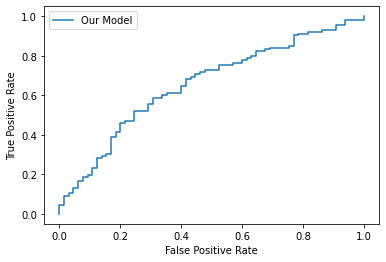

saving model


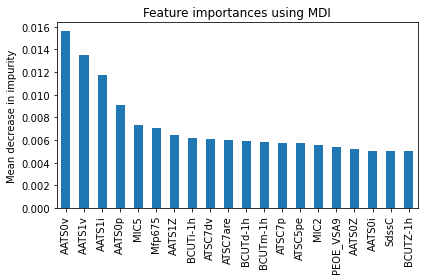

1
Best Threshold=0.551538
[[33 18]
 [47 80]]
              precision    recall  f1-score   support

           0       0.41      0.65      0.50        51
           1       0.82      0.63      0.71       127

    accuracy                           0.63       178
   macro avg       0.61      0.64      0.61       178
weighted avg       0.70      0.63      0.65       178

balanced_accuracy_score  0.6384900416859658
matthews_corrcoef  0.25175462563116774
Sensitivity 0.6470588235294118
Specificity 0.6299212598425197
f1 0.7111111111111111
LR+ 1.7484355444305382
ppv 0.8163265306122449
average_precision_score 0.8299881898986212
roc_auc_score 0.6919870310328856


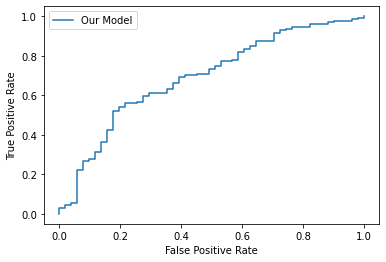

saving model


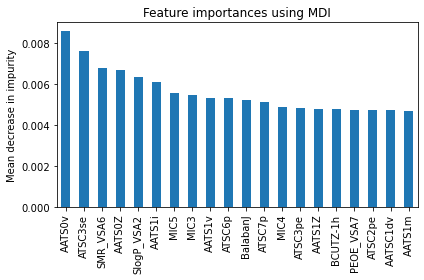

2
Best Threshold=0.645618
[[41 24]
 [40 73]]
              precision    recall  f1-score   support

           0       0.51      0.63      0.56        65
           1       0.75      0.65      0.70       113

    accuracy                           0.64       178
   macro avg       0.63      0.64      0.63       178
weighted avg       0.66      0.64      0.65       178

balanced_accuracy_score  0.6383934649421374
matthews_corrcoef  0.2676166327839903
Sensitivity 0.6307692307692307
Specificity 0.6460176991150443
f1 0.6952380952380952
LR+ 1.781923076923077
ppv 0.7525773195876289
average_precision_score 0.7604032454972738
roc_auc_score 0.6698434309053779


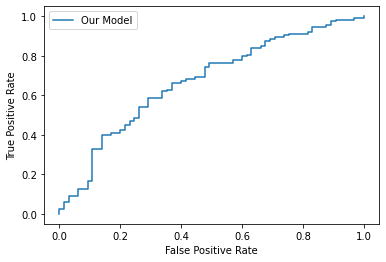

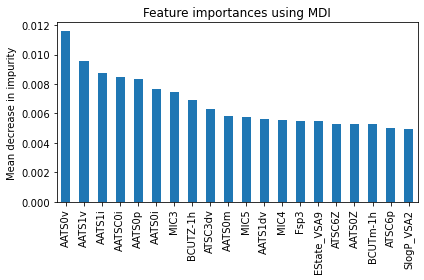

3
Best Threshold=0.641388
[[54 28]
 [28 67]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        82
           1       0.71      0.71      0.71        95

    accuracy                           0.68       177
   macro avg       0.68      0.68      0.68       177
weighted avg       0.68      0.68      0.68       177

balanced_accuracy_score  0.6818998716302953
matthews_corrcoef  0.3637997432605905
Sensitivity 0.6585365853658537
Specificity 0.7052631578947368
f1 0.7052631578947368
LR+ 2.234320557491289
ppv 0.7052631578947368
average_precision_score 0.7063358503608584
roc_auc_score 0.7132220795892169


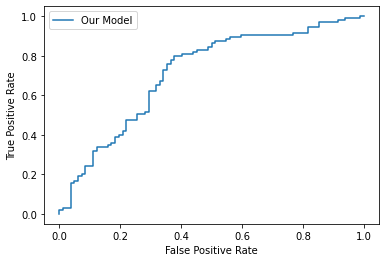

saving model


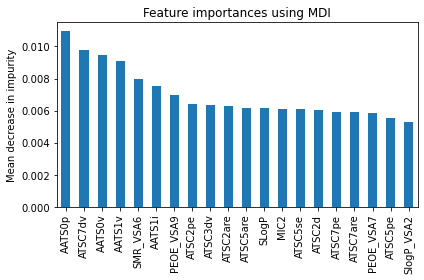

4
Best Threshold=0.602933
[[32 33]
 [39 73]]
              precision    recall  f1-score   support

           0       0.45      0.49      0.47        65
           1       0.69      0.65      0.67       112

    accuracy                           0.59       177
   macro avg       0.57      0.57      0.57       177
weighted avg       0.60      0.59      0.60       177

balanced_accuracy_score  0.5720467032967034
matthews_corrcoef  0.14171887350183163
Sensitivity 0.49230769230769234
Specificity 0.6517857142857143
f1 0.6697247706422018
LR+ 1.4138067061143986
ppv 0.6886792452830188
average_precision_score 0.7579099244820714
roc_auc_score 0.6471153846153846


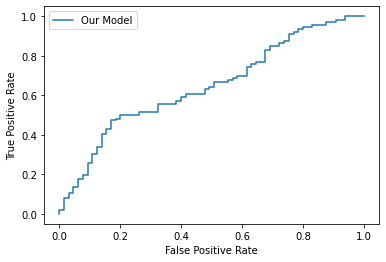

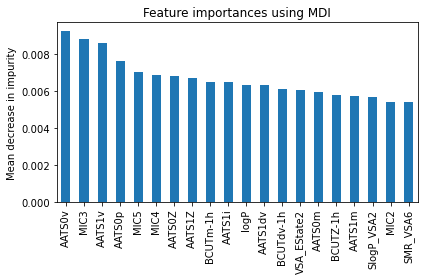

  9%|████                                        | 1/11 [00:54<09:09, 54.96s/it]

43
0
Best Threshold=0.617363
[[36 20]
 [44 78]]
              precision    recall  f1-score   support

           0       0.45      0.64      0.53        56
           1       0.80      0.64      0.71       122

    accuracy                           0.64       178
   macro avg       0.62      0.64      0.62       178
weighted avg       0.69      0.64      0.65       178

balanced_accuracy_score  0.6411007025761124
matthews_corrcoef  0.2634359672065436
Sensitivity 0.6428571428571429
Specificity 0.639344262295082
f1 0.7090909090909091
LR+ 1.7824675324675328
ppv 0.7959183673469388
average_precision_score 0.8004544329401235
roc_auc_score 0.6822306791569086


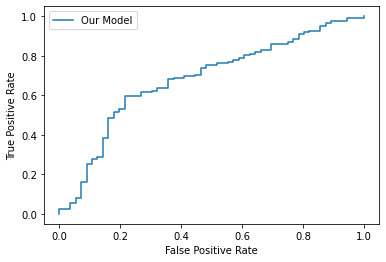

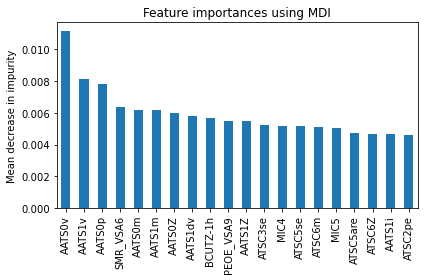

1
Best Threshold=0.638960
[[49 32]
 [34 63]]
              precision    recall  f1-score   support

           0       0.59      0.60      0.60        81
           1       0.66      0.65      0.66        97

    accuracy                           0.63       178
   macro avg       0.63      0.63      0.63       178
weighted avg       0.63      0.63      0.63       178

balanced_accuracy_score  0.6272114038437062
matthews_corrcoef  0.2539706723583515
Sensitivity 0.6049382716049383
Specificity 0.6494845360824743
f1 0.65625
LR+ 1.725853304284677
ppv 0.6631578947368421
average_precision_score 0.6980384168955355
roc_auc_score 0.6517754868270331


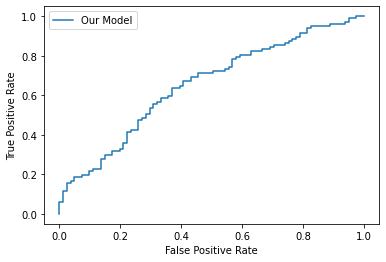

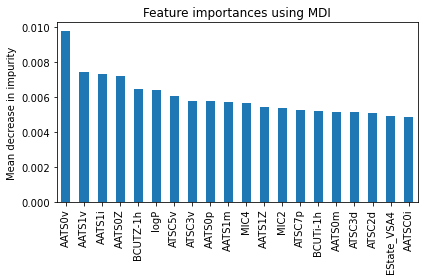

2
Best Threshold=0.602501
[[32 24]
 [43 79]]
              precision    recall  f1-score   support

           0       0.43      0.57      0.49        56
           1       0.77      0.65      0.70       122

    accuracy                           0.62       178
   macro avg       0.60      0.61      0.60       178
weighted avg       0.66      0.62      0.63       178

balanced_accuracy_score  0.6094847775175645
matthews_corrcoef  0.20592468989202475
Sensitivity 0.5714285714285714
Specificity 0.6475409836065574
f1 0.7022222222222223
LR+ 1.621262458471761
ppv 0.7669902912621359
average_precision_score 0.7925141480485847
roc_auc_score 0.6536885245901639


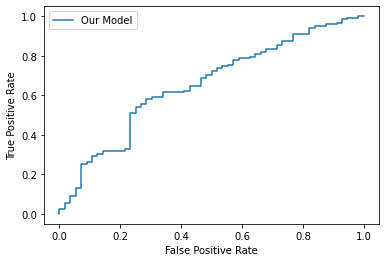

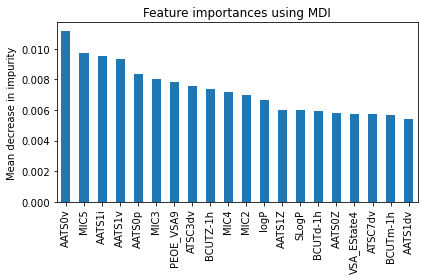

3
Best Threshold=0.607768
[[34 29]
 [33 81]]
              precision    recall  f1-score   support

           0       0.51      0.54      0.52        63
           1       0.74      0.71      0.72       114

    accuracy                           0.65       177
   macro avg       0.62      0.63      0.62       177
weighted avg       0.65      0.65      0.65       177

balanced_accuracy_score  0.6251044277360067
matthews_corrcoef  0.2469969740593296
Sensitivity 0.5396825396825397
Specificity 0.7105263157894737
f1 0.7232142857142857
LR+ 1.8643578643578642
ppv 0.7363636363636363
average_precision_score 0.7903272468416611
roc_auc_score 0.6950710108604845


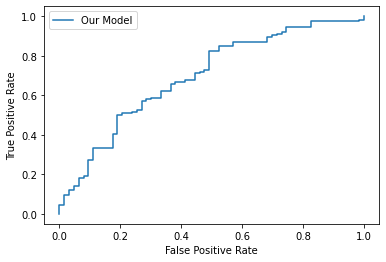

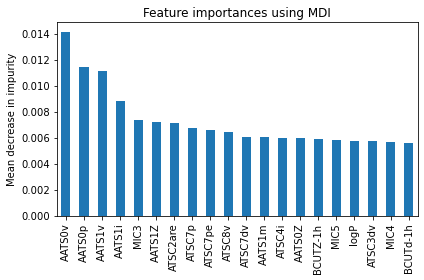

4
Best Threshold=0.592136
[[40 32]
 [30 75]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.56        72
           1       0.70      0.71      0.71       105

    accuracy                           0.65       177
   macro avg       0.64      0.63      0.64       177
weighted avg       0.65      0.65      0.65       177

balanced_accuracy_score  0.6349206349206349
matthews_corrcoef  0.2710992779188888
Sensitivity 0.5555555555555556
Specificity 0.7142857142857143
f1 0.7075471698113207
LR+ 1.9444444444444446
ppv 0.7009345794392523
average_precision_score 0.756646275757271
roc_auc_score 0.6988095238095239


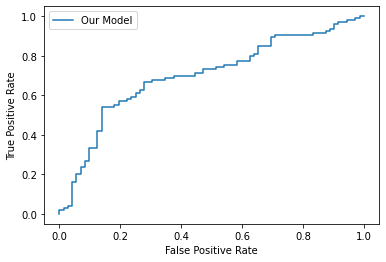

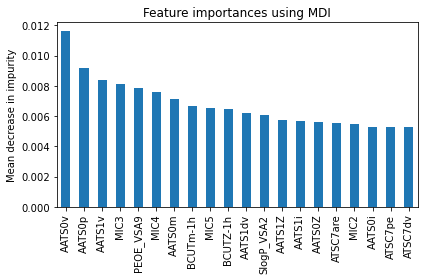

 18%|████████                                    | 2/11 [01:47<08:02, 53.65s/it]

44
0
Best Threshold=0.630753
[[45 22]
 [41 70]]
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        67
           1       0.76      0.63      0.69       111

    accuracy                           0.65       178
   macro avg       0.64      0.65      0.64       178
weighted avg       0.67      0.65      0.65       178

balanced_accuracy_score  0.6511362108377035
matthews_corrcoef  0.29305846928799884
Sensitivity 0.6716417910447762
Specificity 0.6306306306306306
f1 0.6896551724137931
LR+ 1.8183472879504916
ppv 0.7608695652173914
average_precision_score 0.7883210750135975
roc_auc_score 0.6974586526825332


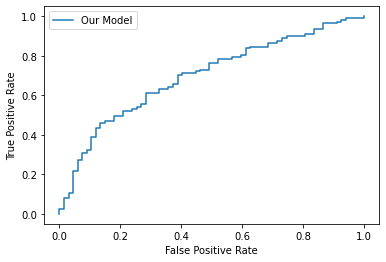

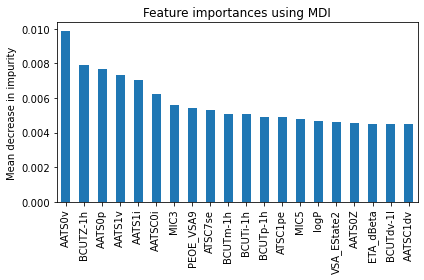

1
Best Threshold=0.618964
[[34 30]
 [40 74]]
              precision    recall  f1-score   support

           0       0.46      0.53      0.49        64
           1       0.71      0.65      0.68       114

    accuracy                           0.61       178
   macro avg       0.59      0.59      0.59       178
weighted avg       0.62      0.61      0.61       178

balanced_accuracy_score  0.5901864035087719
matthews_corrcoef  0.17562282028415102
Sensitivity 0.53125
Specificity 0.6491228070175439
f1 0.6788990825688075
LR+ 1.5140625
ppv 0.7115384615384616
average_precision_score 0.7251352082120623
roc_auc_score 0.6115679824561403


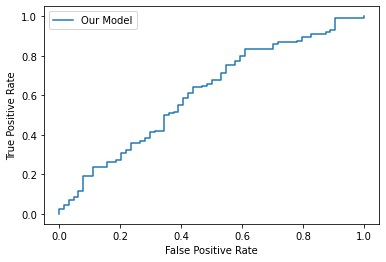

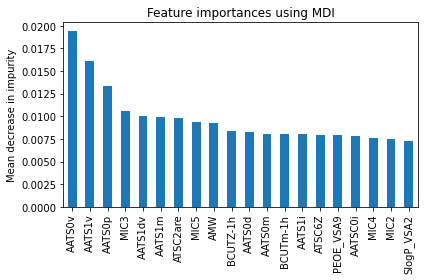

2
Best Threshold=0.622746
[[44 23]
 [32 79]]
              precision    recall  f1-score   support

           0       0.58      0.66      0.62        67
           1       0.77      0.71      0.74       111

    accuracy                           0.69       178
   macro avg       0.68      0.68      0.68       178
weighted avg       0.70      0.69      0.69       178

balanced_accuracy_score  0.6842140648110797
matthews_corrcoef  0.3608650231149165
Sensitivity 0.6567164179104478
Specificity 0.7117117117117117
f1 0.7417840375586854
LR+ 2.2779850746268653
ppv 0.7745098039215687
average_precision_score 0.7751110129375738
roc_auc_score 0.7344359284657793


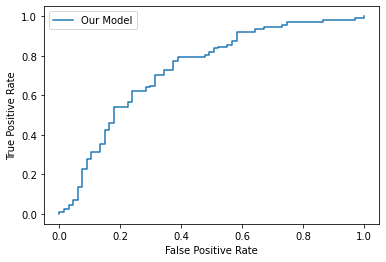

saving model


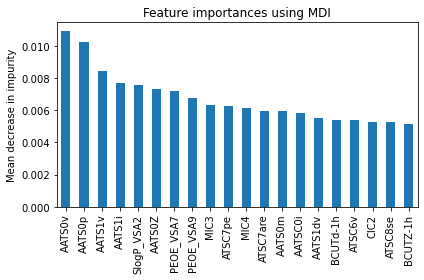

3
Best Threshold=0.646480
[[42 16]
 [38 81]]
              precision    recall  f1-score   support

           0       0.53      0.72      0.61        58
           1       0.84      0.68      0.75       119

    accuracy                           0.69       177
   macro avg       0.68      0.70      0.68       177
weighted avg       0.73      0.69      0.70       177

balanced_accuracy_score  0.702405099971023
matthews_corrcoef  0.3817755079680834
Sensitivity 0.7241379310344828
Specificity 0.680672268907563
f1 0.7500000000000001
LR+ 2.267695099818512
ppv 0.8350515463917526
average_precision_score 0.8221998472248574
roc_auc_score 0.7264560996812518


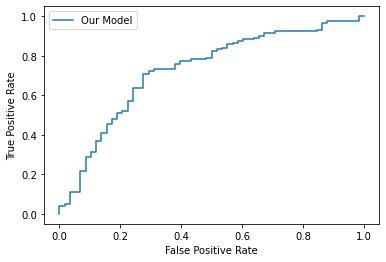

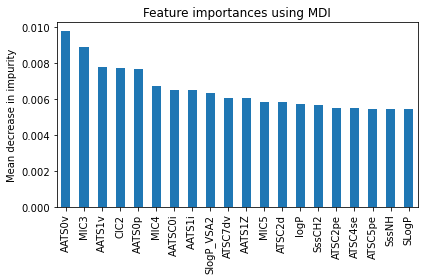

4
Best Threshold=0.616902
[[37 35]
 [39 66]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        72
           1       0.65      0.63      0.64       105

    accuracy                           0.58       177
   macro avg       0.57      0.57      0.57       177
weighted avg       0.59      0.58      0.58       177

balanced_accuracy_score  0.5712301587301587
matthews_corrcoef  0.1413797868337776
Sensitivity 0.5138888888888888
Specificity 0.6285714285714286
f1 0.6407766990291262
LR+ 1.3835470085470083
ppv 0.6534653465346535
average_precision_score 0.7076847633498187
roc_auc_score 0.6230158730158729


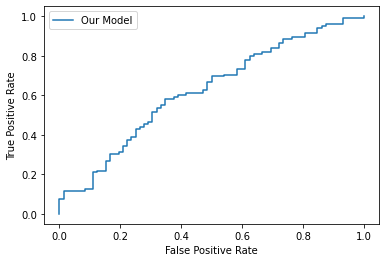

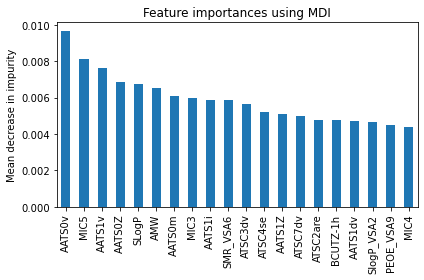

 27%|████████████                                | 3/11 [02:46<07:28, 56.07s/it]

45
0
Best Threshold=0.525886
[[30 34]
 [28 86]]
              precision    recall  f1-score   support

           0       0.52      0.47      0.49        64
           1       0.72      0.75      0.74       114

    accuracy                           0.65       178
   macro avg       0.62      0.61      0.61       178
weighted avg       0.64      0.65      0.65       178

balanced_accuracy_score  0.6115679824561404
matthews_corrcoef  0.22845852476943507
Sensitivity 0.46875
Specificity 0.7543859649122807
f1 0.735042735042735
LR+ 1.908482142857143
ppv 0.7166666666666667
average_precision_score 0.7513089466678169
roc_auc_score 0.6870888157894737


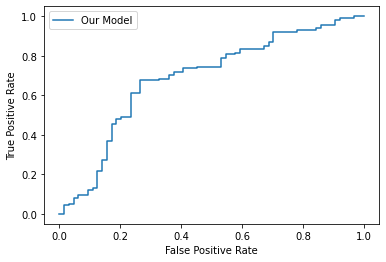

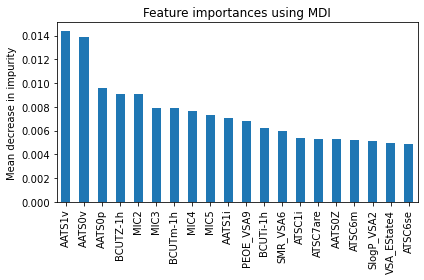

1
Best Threshold=0.627010
[[42 35]
 [32 69]]
              precision    recall  f1-score   support

           0       0.57      0.55      0.56        77
           1       0.66      0.68      0.67       101

    accuracy                           0.62       178
   macro avg       0.62      0.61      0.61       178
weighted avg       0.62      0.62      0.62       178

balanced_accuracy_score  0.6143114311431144
matthews_corrcoef  0.22982283500949774
Sensitivity 0.5454545454545454
Specificity 0.6831683168316832
f1 0.6731707317073171
LR+ 1.7215909090909092
ppv 0.6634615384615384
average_precision_score 0.7643481454218927
roc_auc_score 0.6787964510736788


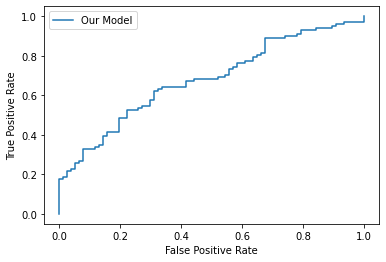

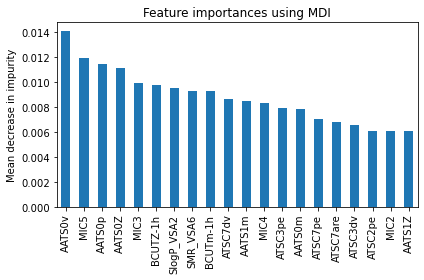

2
Best Threshold=0.592669
[[41 16]
 [58 63]]
              precision    recall  f1-score   support

           0       0.41      0.72      0.53        57
           1       0.80      0.52      0.63       121

    accuracy                           0.58       178
   macro avg       0.61      0.62      0.58       178
weighted avg       0.67      0.58      0.60       178

balanced_accuracy_score  0.6199797013194143
matthews_corrcoef  0.22533919689887155
Sensitivity 0.7192982456140351
Specificity 0.5206611570247934
f1 0.63
LR+ 1.5006049606775562
ppv 0.7974683544303798
average_precision_score 0.7911803336219464
roc_auc_score 0.649122807017544


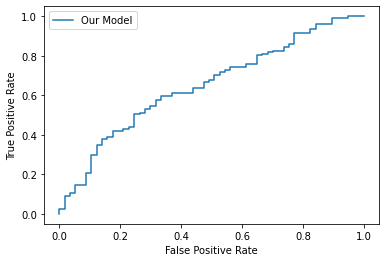

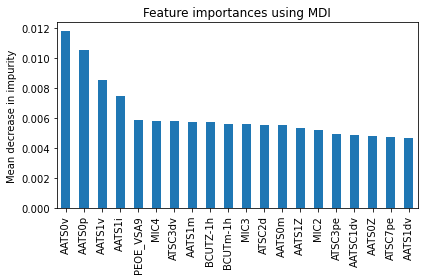

3
Best Threshold=0.600159
[[33 30]
 [31 83]]
              precision    recall  f1-score   support

           0       0.52      0.52      0.52        63
           1       0.73      0.73      0.73       114

    accuracy                           0.66       177
   macro avg       0.63      0.63      0.63       177
weighted avg       0.66      0.66      0.66       177

balanced_accuracy_score  0.6259398496240602
matthews_corrcoef  0.25100747660232514
Sensitivity 0.5238095238095238
Specificity 0.7280701754385965
f1 0.7312775330396476
LR+ 1.926267281105991
ppv 0.7345132743362832
average_precision_score 0.7916632393279921
roc_auc_score 0.6910331384015593


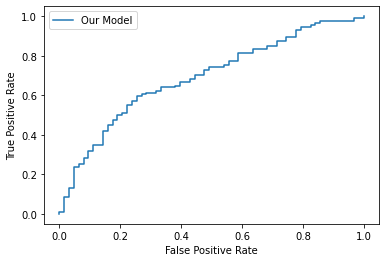

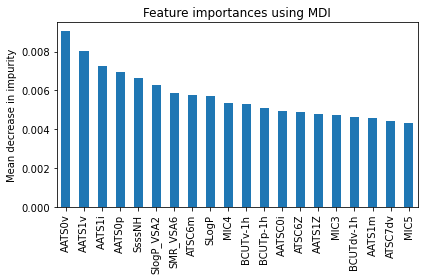

4
Best Threshold=0.636023
[[47 20]
 [39 71]]
              precision    recall  f1-score   support

           0       0.55      0.70      0.61        67
           1       0.78      0.65      0.71       110

    accuracy                           0.67       177
   macro avg       0.66      0.67      0.66       177
weighted avg       0.69      0.67      0.67       177

balanced_accuracy_score  0.6734735413839892
matthews_corrcoef  0.3366875538214207
Sensitivity 0.7014925373134329
Specificity 0.6454545454545455
f1 0.7064676616915424
LR+ 1.9785686949866057
ppv 0.7802197802197802
average_precision_score 0.8000711363334693
roc_auc_score 0.7275440976933513


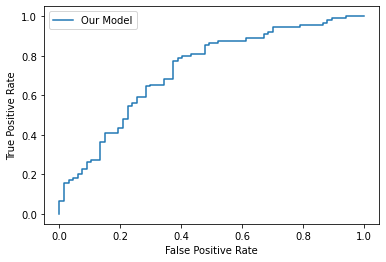

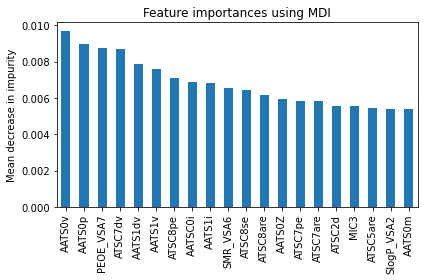

 36%|████████████████                            | 4/11 [03:44<06:37, 56.73s/it]

46
0
Best Threshold=0.535372
[[18 48]
 [19 93]]
              precision    recall  f1-score   support

           0       0.49      0.27      0.35        66
           1       0.66      0.83      0.74       112

    accuracy                           0.62       178
   macro avg       0.57      0.55      0.54       178
weighted avg       0.60      0.62      0.59       178

balanced_accuracy_score  0.5515422077922079
matthews_corrcoef  0.12270537128306375
Sensitivity 0.2727272727272727
Specificity 0.8303571428571429
f1 0.7351778656126483
LR+ 1.607655502392345
ppv 0.6595744680851063
average_precision_score 0.7835881093401744
roc_auc_score 0.6880411255411256


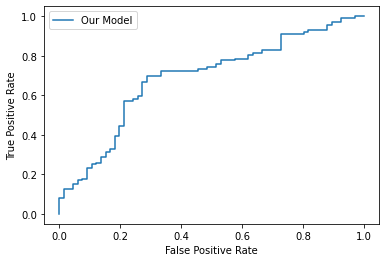

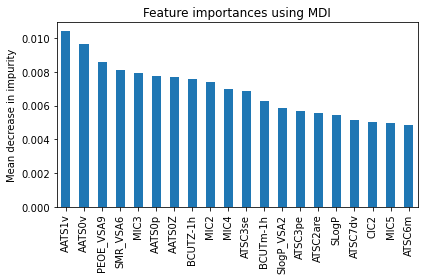

1
Best Threshold=0.648516
[[42 18]
 [55 63]]
              precision    recall  f1-score   support

           0       0.43      0.70      0.54        60
           1       0.78      0.53      0.63       118

    accuracy                           0.59       178
   macro avg       0.61      0.62      0.58       178
weighted avg       0.66      0.59      0.60       178

balanced_accuracy_score  0.6169491525423729
matthews_corrcoef  0.22203187529951318
Sensitivity 0.7
Specificity 0.5338983050847458
f1 0.6331658291457286
LR+ 1.5018181818181817
ppv 0.7777777777777778
average_precision_score 0.7505278511927056
roc_auc_score 0.6265536723163841


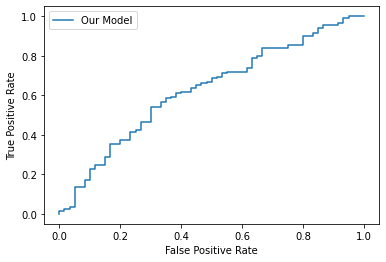

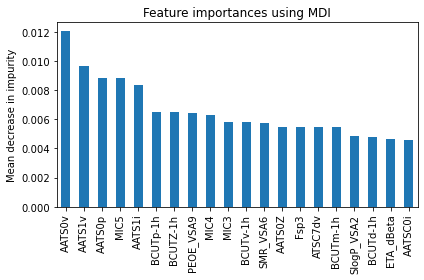

2
Best Threshold=0.658081
[[51 14]
 [51 62]]
              precision    recall  f1-score   support

           0       0.50      0.78      0.61        65
           1       0.82      0.55      0.66       113

    accuracy                           0.63       178
   macro avg       0.66      0.67      0.63       178
weighted avg       0.70      0.63      0.64       178

balanced_accuracy_score  0.6666439754935329
matthews_corrcoef  0.324420755543622
Sensitivity 0.7846153846153846
Specificity 0.5486725663716814
f1 0.656084656084656
LR+ 1.7384615384615383
ppv 0.8157894736842105
average_precision_score 0.7939652229692575
roc_auc_score 0.7334240980258679


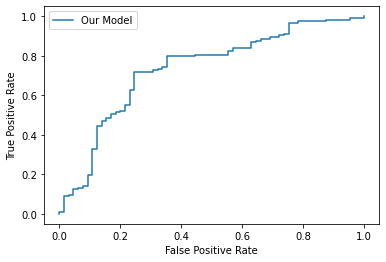

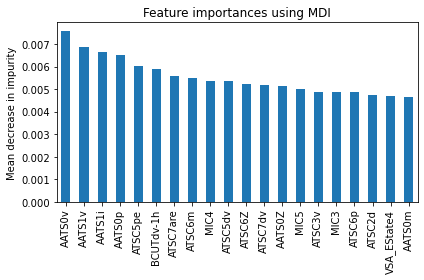

3
Best Threshold=0.635151
[[46 19]
 [31 81]]
              precision    recall  f1-score   support

           0       0.60      0.71      0.65        65
           1       0.81      0.72      0.76       112

    accuracy                           0.72       177
   macro avg       0.70      0.72      0.71       177
weighted avg       0.73      0.72      0.72       177

balanced_accuracy_score  0.7154532967032967
matthews_corrcoef  0.4189898153795043
Sensitivity 0.7076923076923077
Specificity 0.7232142857142857
f1 0.7641509433962265
LR+ 2.5568238213399503
ppv 0.81
average_precision_score 0.8499348706065601
roc_auc_score 0.7717032967032967


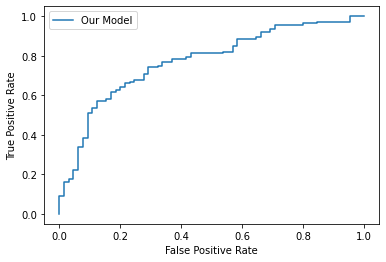

saving model


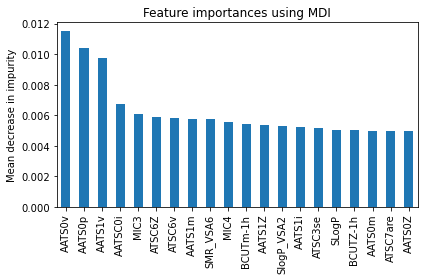

4
Best Threshold=0.632348
[[42 30]
 [47 58]]
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        72
           1       0.66      0.55      0.60       105

    accuracy                           0.56       177
   macro avg       0.57      0.57      0.56       177
weighted avg       0.58      0.56      0.57       177

balanced_accuracy_score  0.5678571428571428
matthews_corrcoef  0.13333682932330043
Sensitivity 0.5833333333333334
Specificity 0.5523809523809524
f1 0.601036269430052
LR+ 1.3031914893617023
ppv 0.6590909090909091
average_precision_score 0.6695229656317496
roc_auc_score 0.6010582010582012


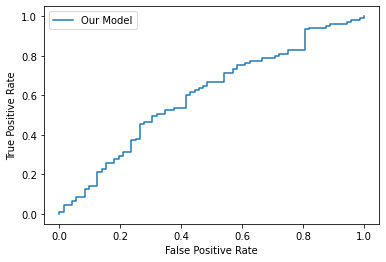

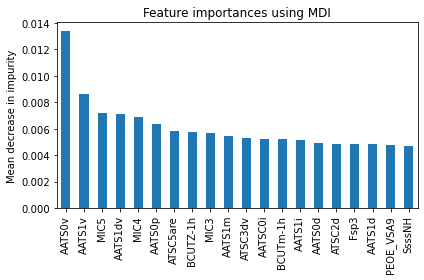

 45%|████████████████████                        | 5/11 [04:47<05:54, 59.02s/it]

47
0
Best Threshold=0.643037
[[48 20]
 [43 67]]
              precision    recall  f1-score   support

           0       0.53      0.71      0.60        68
           1       0.77      0.61      0.68       110

    accuracy                           0.65       178
   macro avg       0.65      0.66      0.64       178
weighted avg       0.68      0.65      0.65       178

balanced_accuracy_score  0.6574866310160428
matthews_corrcoef  0.3061569796136832
Sensitivity 0.7058823529411765
Specificity 0.6090909090909091
f1 0.6802030456852791
LR+ 1.805745554035568
ppv 0.7701149425287356
average_precision_score 0.7232535023788353
roc_auc_score 0.664572192513369


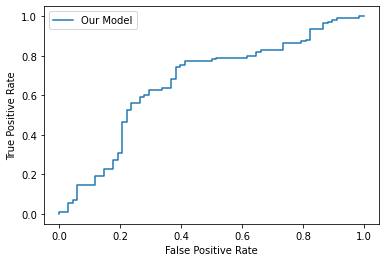

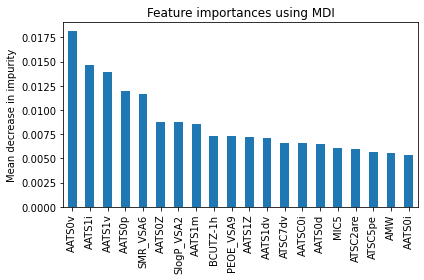

1
Best Threshold=0.565170
[[36 22]
 [47 73]]
              precision    recall  f1-score   support

           0       0.43      0.62      0.51        58
           1       0.77      0.61      0.68       120

    accuracy                           0.61       178
   macro avg       0.60      0.61      0.59       178
weighted avg       0.66      0.61      0.62       178

balanced_accuracy_score  0.6145114942528735
matthews_corrcoef  0.21517055914237834
Sensitivity 0.6206896551724138
Specificity 0.6083333333333333
f1 0.6790697674418604
LR+ 1.5847395451210564
ppv 0.7684210526315789
average_precision_score 0.7763994675383211
roc_auc_score 0.6564655172413792


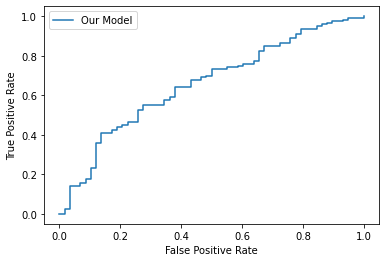

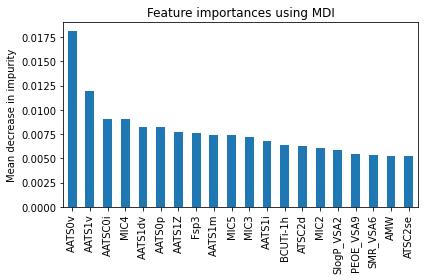

2
Best Threshold=0.650898
[[46 22]
 [41 69]]
              precision    recall  f1-score   support

           0       0.53      0.68      0.59        68
           1       0.76      0.63      0.69       110

    accuracy                           0.65       178
   macro avg       0.64      0.65      0.64       178
weighted avg       0.67      0.65      0.65       178

balanced_accuracy_score  0.6518716577540107
matthews_corrcoef  0.29524136573951115
Sensitivity 0.6764705882352942
Specificity 0.6272727272727273
f1 0.6865671641791045
LR+ 1.8149210903873747
ppv 0.7582417582417582
average_precision_score 0.7569300193190385
roc_auc_score 0.6906417112299466


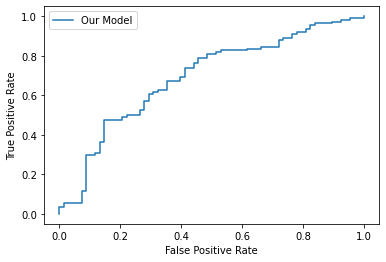

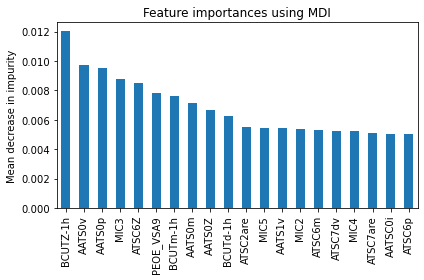

3
Best Threshold=0.617640
[[40 23]
 [37 77]]
              precision    recall  f1-score   support

           0       0.52      0.63      0.57        63
           1       0.77      0.68      0.72       114

    accuracy                           0.66       177
   macro avg       0.64      0.66      0.65       177
weighted avg       0.68      0.66      0.67       177

balanced_accuracy_score  0.6551796157059315
matthews_corrcoef  0.29973813827186035
Sensitivity 0.6349206349206349
Specificity 0.6754385964912281
f1 0.719626168224299
LR+ 1.9562419562419562
ppv 0.77
average_precision_score 0.793399010962994
roc_auc_score 0.697020328599276


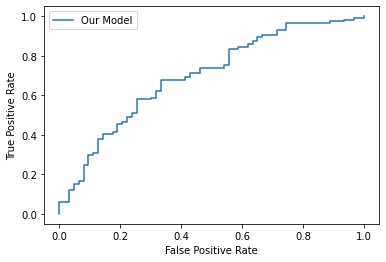

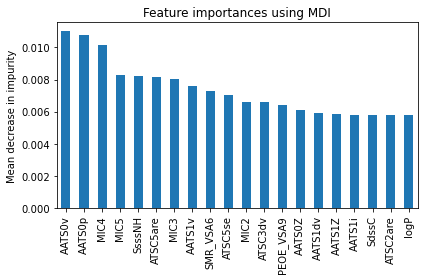

4
Best Threshold=0.620611
[[41 30]
 [31 75]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.57        71
           1       0.71      0.71      0.71       106

    accuracy                           0.66       177
   macro avg       0.64      0.64      0.64       177
weighted avg       0.66      0.66      0.66       177

balanced_accuracy_score  0.6425059792718575
matthews_corrcoef  0.28437033642347737
Sensitivity 0.5774647887323944
Specificity 0.7075471698113207
f1 0.7109004739336493
LR+ 1.974557019536574
ppv 0.7142857142857143
average_precision_score 0.7163001124744658
roc_auc_score 0.6687483390911507


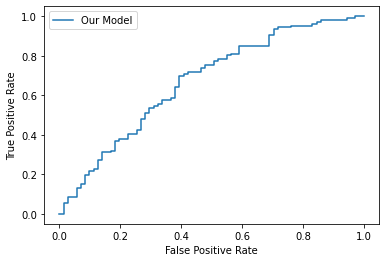

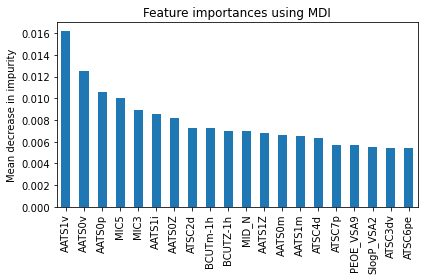

 55%|████████████████████████                    | 6/11 [05:40<04:45, 57.11s/it]

48
0
Best Threshold=0.562276
[[31 32]
 [37 78]]
              precision    recall  f1-score   support

           0       0.46      0.49      0.47        63
           1       0.71      0.68      0.69       115

    accuracy                           0.61       178
   macro avg       0.58      0.59      0.58       178
weighted avg       0.62      0.61      0.62       178

balanced_accuracy_score  0.5851621808143547
matthews_corrcoef  0.16762746058274813
Sensitivity 0.49206349206349204
Specificity 0.6782608695652174
f1 0.6933333333333334
LR+ 1.5293865293865292
ppv 0.7090909090909091
average_precision_score 0.7112187007039321
roc_auc_score 0.5889579020013803


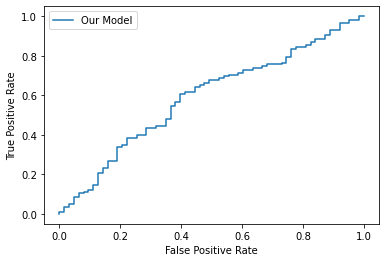

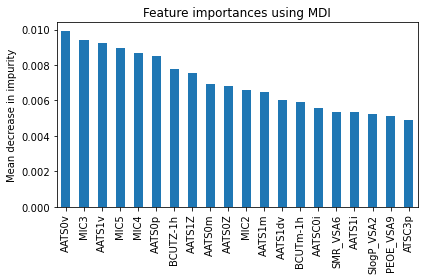

1
Best Threshold=0.475712
[[29 40]
 [27 82]]
              precision    recall  f1-score   support

           0       0.52      0.42      0.46        69
           1       0.67      0.75      0.71       109

    accuracy                           0.62       178
   macro avg       0.59      0.59      0.59       178
weighted avg       0.61      0.62      0.61       178

balanced_accuracy_score  0.5862917165270576
matthews_corrcoef  0.18107686599063627
Sensitivity 0.42028985507246375
Specificity 0.7522935779816514
f1 0.70995670995671
LR+ 1.696725711218465
ppv 0.6721311475409836
average_precision_score 0.7312912274066592
roc_auc_score 0.6560297832735008


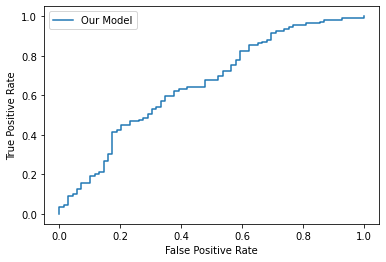

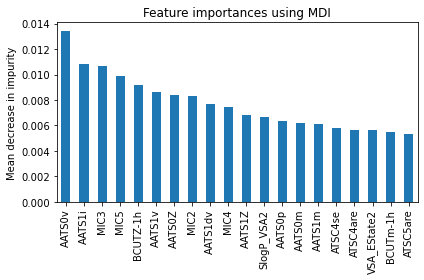

2
Best Threshold=0.578261
[[45 18]
 [43 72]]
              precision    recall  f1-score   support

           0       0.51      0.71      0.60        63
           1       0.80      0.63      0.70       115

    accuracy                           0.66       178
   macro avg       0.66      0.67      0.65       178
weighted avg       0.70      0.66      0.66       178

balanced_accuracy_score  0.6701863354037267
matthews_corrcoef  0.3255451927174039
Sensitivity 0.7142857142857143
Specificity 0.6260869565217392
f1 0.7024390243902439
LR+ 1.9102990033222593
ppv 0.8
average_precision_score 0.7943341918321247
roc_auc_score 0.7211870255348516


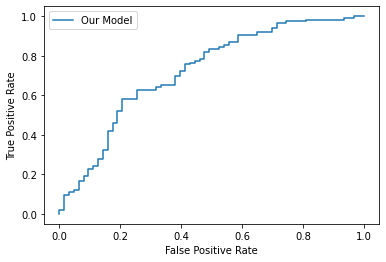

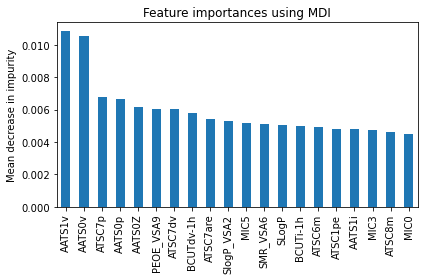

3
Best Threshold=0.569326
[[42 19]
 [41 75]]
              precision    recall  f1-score   support

           0       0.51      0.69      0.58        61
           1       0.80      0.65      0.71       116

    accuracy                           0.66       177
   macro avg       0.65      0.67      0.65       177
weighted avg       0.70      0.66      0.67       177

balanced_accuracy_score  0.6675381571509327
matthews_corrcoef  0.3191057786630077
Sensitivity 0.6885245901639344
Specificity 0.646551724137931
f1 0.7142857142857143
LR+ 1.9480207916833268
ppv 0.7978723404255319
average_precision_score 0.833405904804606
roc_auc_score 0.7432165065008479


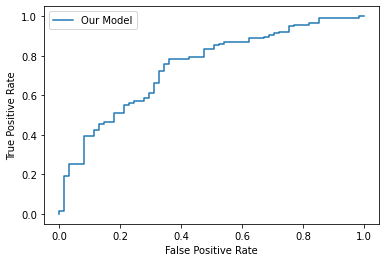

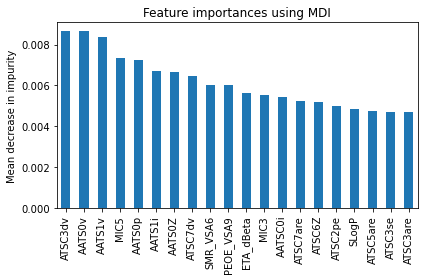

4
Best Threshold=0.608215
[[45 27]
 [39 66]]
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        72
           1       0.71      0.63      0.67       105

    accuracy                           0.63       177
   macro avg       0.62      0.63      0.62       177
weighted avg       0.64      0.63      0.63       177

balanced_accuracy_score  0.6267857142857143
matthews_corrcoef  0.2494480411106821
Sensitivity 0.625
Specificity 0.6285714285714286
f1 0.6666666666666666
LR+ 1.6826923076923077
ppv 0.7096774193548387
average_precision_score 0.7123618088984918
roc_auc_score 0.6666666666666666


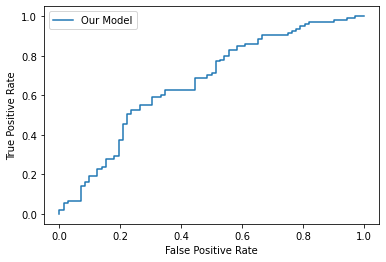

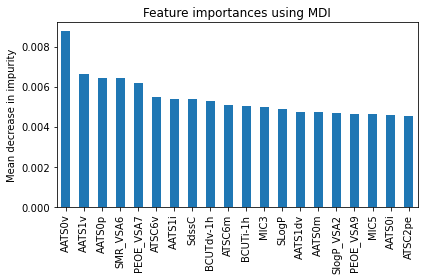

 64%|████████████████████████████                | 7/11 [06:43<03:55, 58.82s/it]

49
0
Best Threshold=0.610955
[[41 23]
 [42 72]]
              precision    recall  f1-score   support

           0       0.49      0.64      0.56        64
           1       0.76      0.63      0.69       114

    accuracy                           0.63       178
   macro avg       0.63      0.64      0.62       178
weighted avg       0.66      0.63      0.64       178

balanced_accuracy_score  0.6361019736842105
matthews_corrcoef  0.2618399941920424
Sensitivity 0.640625
Specificity 0.631578947368421
f1 0.6889952153110048
LR+ 1.7388392857142856
ppv 0.7578947368421053
average_precision_score 0.7152368782608222
roc_auc_score 0.6047149122807016


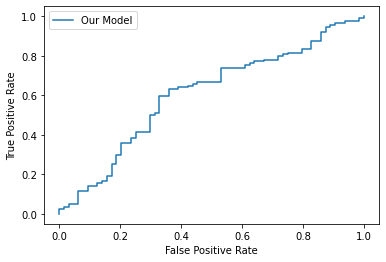

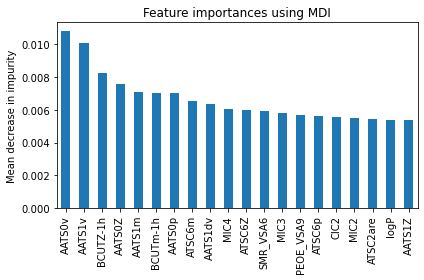

1
Best Threshold=0.660582
[[48 22]
 [50 58]]
              precision    recall  f1-score   support

           0       0.49      0.69      0.57        70
           1       0.72      0.54      0.62       108

    accuracy                           0.60       178
   macro avg       0.61      0.61      0.59       178
weighted avg       0.63      0.60      0.60       178

balanced_accuracy_score  0.6113756613756614
matthews_corrcoef  0.21873745664131616
Sensitivity 0.6857142857142857
Specificity 0.5370370370370371
f1 0.6170212765957447
LR+ 1.4811428571428573
ppv 0.725
average_precision_score 0.7395089133337562
roc_auc_score 0.6682539682539682


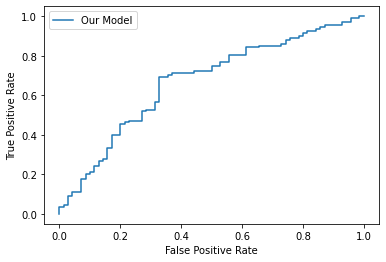

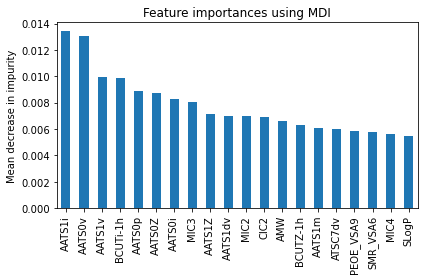

2
Best Threshold=0.636381
[[45 30]
 [27 76]]
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        75
           1       0.72      0.74      0.73       103

    accuracy                           0.68       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.68      0.68      0.68       178

balanced_accuracy_score  0.6689320388349514
matthews_corrcoef  0.33991637172867756
Sensitivity 0.6
Specificity 0.7378640776699029
f1 0.7272727272727272
LR+ 2.2888888888888888
ppv 0.7169811320754716
average_precision_score 0.7455586680211715
roc_auc_score 0.720388349514563


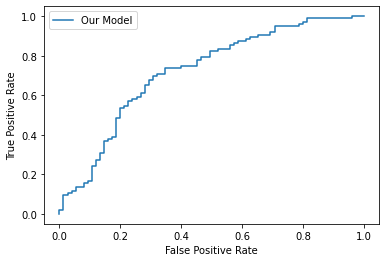

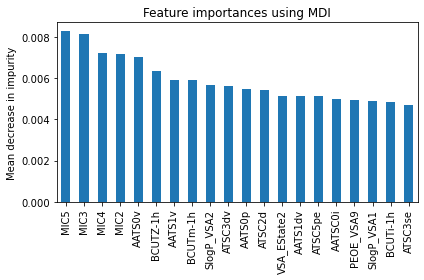

3
Best Threshold=0.555890
[[34 19]
 [40 84]]
              precision    recall  f1-score   support

           0       0.46      0.64      0.54        53
           1       0.82      0.68      0.74       124

    accuracy                           0.67       177
   macro avg       0.64      0.66      0.64       177
weighted avg       0.71      0.67      0.68       177

balanced_accuracy_score  0.6594643944004869
matthews_corrcoef  0.29614747130577207
Sensitivity 0.6415094339622641
Specificity 0.6774193548387096
f1 0.7400881057268722
LR+ 1.9886792452830184
ppv 0.8155339805825242
average_precision_score 0.8222324724190837
roc_auc_score 0.7008520998174071


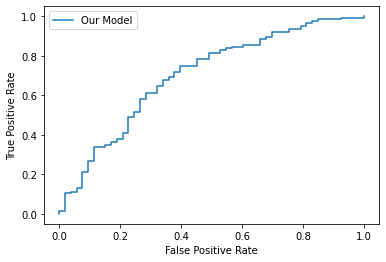

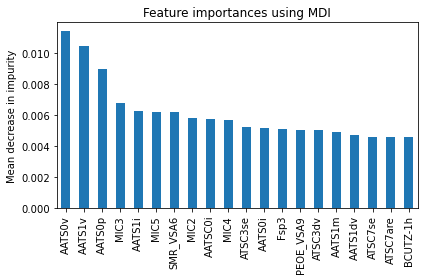

4
Best Threshold=0.639022
[[45 21]
 [44 67]]
              precision    recall  f1-score   support

           0       0.51      0.68      0.58        66
           1       0.76      0.60      0.67       111

    accuracy                           0.63       177
   macro avg       0.63      0.64      0.63       177
weighted avg       0.67      0.63      0.64       177

balanced_accuracy_score  0.6427108927108927
matthews_corrcoef  0.27604776563443917
Sensitivity 0.6818181818181818
Specificity 0.6036036036036037
f1 0.6733668341708543
LR+ 1.7200413223140496
ppv 0.7613636363636364
average_precision_score 0.7457577344050228
roc_auc_score 0.6726726726726727


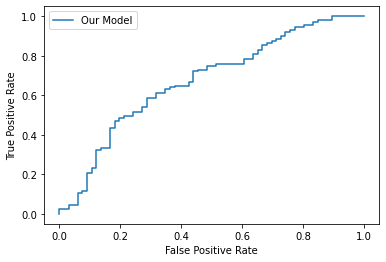

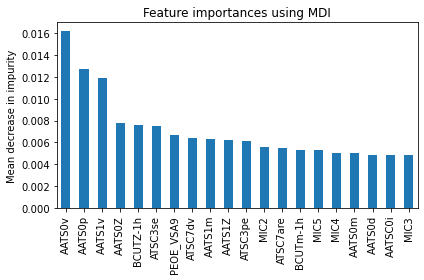

 73%|████████████████████████████████            | 8/11 [07:39<02:53, 57.98s/it]

50
0
Best Threshold=0.583413
[[27 34]
 [31 86]]
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        61
           1       0.72      0.74      0.73       117

    accuracy                           0.63       178
   macro avg       0.59      0.59      0.59       178
weighted avg       0.63      0.63      0.63       178

balanced_accuracy_score  0.5888328429312036
matthews_corrcoef  0.17991061385055143
Sensitivity 0.4426229508196721
Specificity 0.7350427350427351
f1 0.7257383966244726
LR+ 1.6705446853516661
ppv 0.7166666666666667
average_precision_score 0.7541878198750405
roc_auc_score 0.6511139134089953


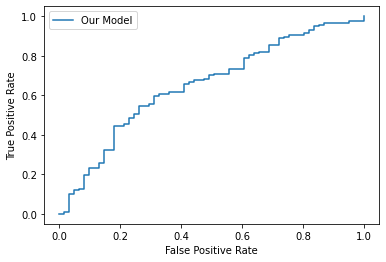

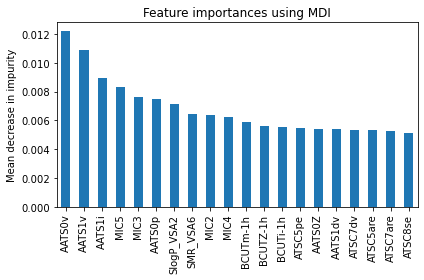

1
Best Threshold=0.470980
[[32 33]
 [28 85]]
              precision    recall  f1-score   support

           0       0.53      0.49      0.51        65
           1       0.72      0.75      0.74       113

    accuracy                           0.66       178
   macro avg       0.63      0.62      0.62       178
weighted avg       0.65      0.66      0.65       178

balanced_accuracy_score  0.6222600408441117
matthews_corrcoef  0.24905416182890966
Sensitivity 0.49230769230769234
Specificity 0.7522123893805309
f1 0.735930735930736
LR+ 1.9868131868131864
ppv 0.7203389830508474
average_precision_score 0.7597642875969239
roc_auc_score 0.6370319945541185


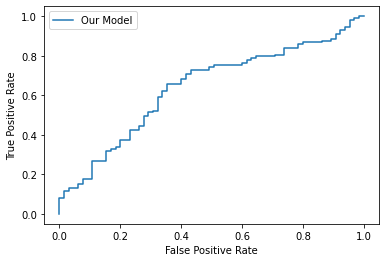

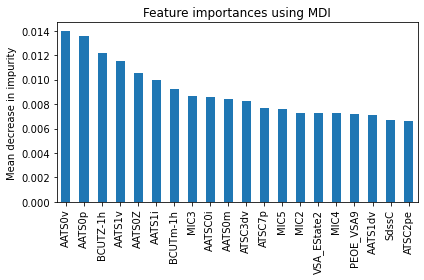

2
Best Threshold=0.576951
[[52 23]
 [43 60]]
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        75
           1       0.72      0.58      0.65       103

    accuracy                           0.63       178
   macro avg       0.64      0.64      0.63       178
weighted avg       0.65      0.63      0.63       178

balanced_accuracy_score  0.6379288025889968
matthews_corrcoef  0.273044452199442
Sensitivity 0.6933333333333334
Specificity 0.5825242718446602
f1 0.6451612903225807
LR+ 1.6607751937984496
ppv 0.7228915662650602
average_precision_score 0.7507473555382189
roc_auc_score 0.7246601941747572


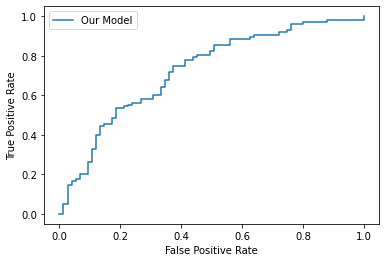

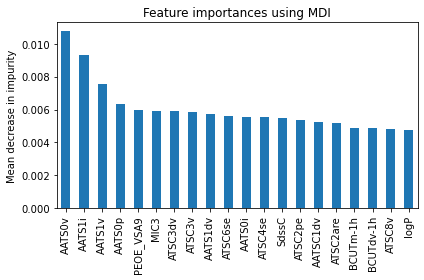

3
Best Threshold=0.624325
[[45 26]
 [32 74]]
              precision    recall  f1-score   support

           0       0.58      0.63      0.61        71
           1       0.74      0.70      0.72       106

    accuracy                           0.67       177
   macro avg       0.66      0.67      0.66       177
weighted avg       0.68      0.67      0.67       177

balanced_accuracy_score  0.6659580122242892
matthews_corrcoef  0.328144375311208
Sensitivity 0.6338028169014085
Specificity 0.6981132075471698
f1 0.7184466019417476
LR+ 2.0994718309859155
ppv 0.74
average_precision_score 0.7592256634536778
roc_auc_score 0.7020993887855435


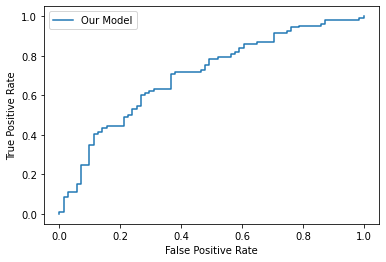

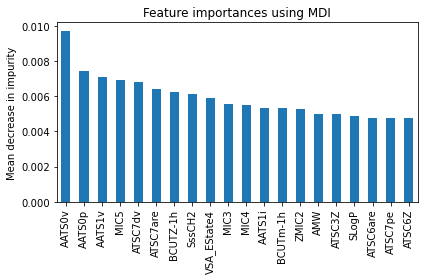

4
Best Threshold=0.527875
[[31 25]
 [35 86]]
              precision    recall  f1-score   support

           0       0.47      0.55      0.51        56
           1       0.77      0.71      0.74       121

    accuracy                           0.66       177
   macro avg       0.62      0.63      0.62       177
weighted avg       0.68      0.66      0.67       177

balanced_accuracy_score  0.6321576151121606
matthews_corrcoef  0.25419993198935076
Sensitivity 0.5535714285714286
Specificity 0.7107438016528925
f1 0.7413793103448275
LR+ 1.9137755102040814
ppv 0.7747747747747747
average_precision_score 0.8130384959637986
roc_auc_score 0.6896399055489965


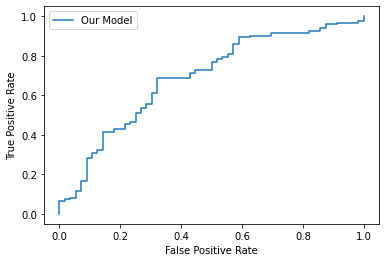

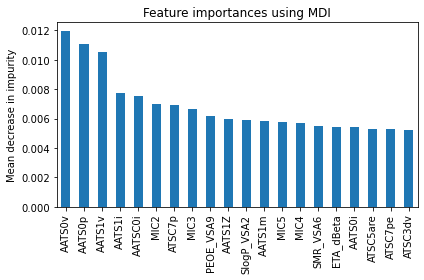

 82%|████████████████████████████████████        | 9/11 [08:36<01:55, 57.75s/it]

51
0
Best Threshold=0.581371
[[50 18]
 [51 59]]
              precision    recall  f1-score   support

           0       0.50      0.74      0.59        68
           1       0.77      0.54      0.63       110

    accuracy                           0.61       178
   macro avg       0.63      0.64      0.61       178
weighted avg       0.66      0.61      0.62       178

balanced_accuracy_score  0.6358288770053476
matthews_corrcoef  0.26642001916238167
Sensitivity 0.7352941176470589
Specificity 0.5363636363636364
f1 0.6310160427807487
LR+ 1.5859284890426761
ppv 0.7662337662337663
average_precision_score 0.7404418743491721
roc_auc_score 0.6826203208556151


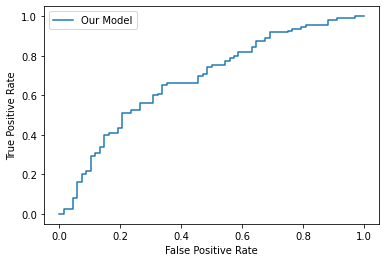

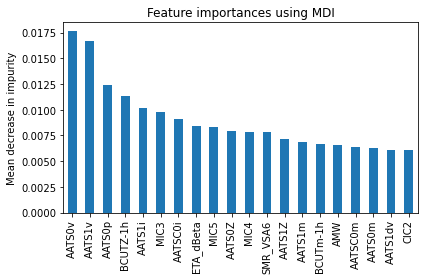

1
Best Threshold=0.558815
[[50 18]
 [39 71]]
              precision    recall  f1-score   support

           0       0.56      0.74      0.64        68
           1       0.80      0.65      0.71       110

    accuracy                           0.68       178
   macro avg       0.68      0.69      0.68       178
weighted avg       0.71      0.68      0.68       178

balanced_accuracy_score  0.6903743315508022
matthews_corrcoef  0.36999783205030423
Sensitivity 0.7352941176470589
Specificity 0.6454545454545455
f1 0.7135678391959799
LR+ 2.073906485671192
ppv 0.797752808988764
average_precision_score 0.7868727297032363
roc_auc_score 0.712566844919786


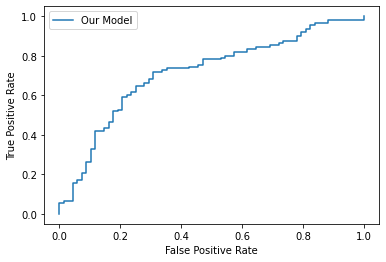

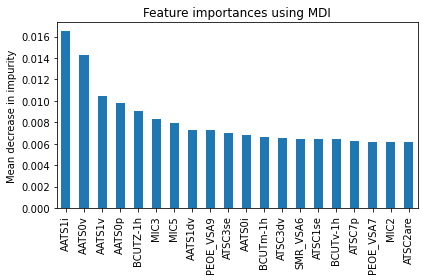

2
Best Threshold=0.572594
[[39 33]
 [29 77]]
              precision    recall  f1-score   support

           0       0.57      0.54      0.56        72
           1       0.70      0.73      0.71       106

    accuracy                           0.65       178
   macro avg       0.64      0.63      0.64       178
weighted avg       0.65      0.65      0.65       178

balanced_accuracy_score  0.6340408805031446
matthews_corrcoef  0.2707918876054022
Sensitivity 0.5416666666666666
Specificity 0.7264150943396226
f1 0.7129629629629629
LR+ 1.9798850574712639
ppv 0.7
average_precision_score 0.7888487895485576
roc_auc_score 0.7177672955974843


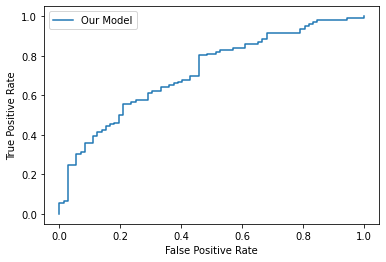

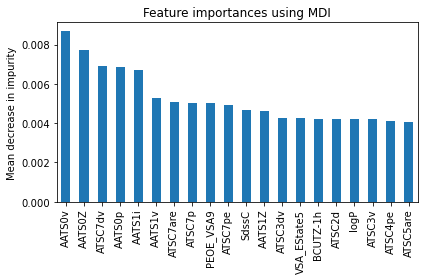

3
Best Threshold=0.555298
[[25 26]
 [27 99]]
              precision    recall  f1-score   support

           0       0.48      0.49      0.49        51
           1       0.79      0.79      0.79       126

    accuracy                           0.70       177
   macro avg       0.64      0.64      0.64       177
weighted avg       0.70      0.70      0.70       177

balanced_accuracy_score  0.6379551820728291
matthews_corrcoef  0.2743353017554787
Sensitivity 0.49019607843137253
Specificity 0.7857142857142857
f1 0.7888446215139442
LR+ 2.287581699346405
ppv 0.792
average_precision_score 0.8550204225210224
roc_auc_score 0.7153750389044506


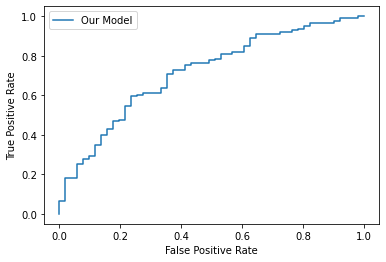

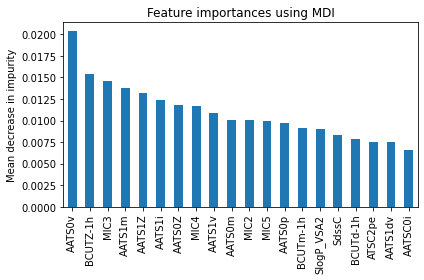

4
Best Threshold=0.582965
[[43 26]
 [41 67]]
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        69
           1       0.72      0.62      0.67       108

    accuracy                           0.62       177
   macro avg       0.62      0.62      0.61       177
weighted avg       0.64      0.62      0.63       177

balanced_accuracy_score  0.6217793880837359
matthews_corrcoef  0.2378806348986829
Sensitivity 0.6231884057971014
Specificity 0.6203703703703703
f1 0.6666666666666666
LR+ 1.6415694591728525
ppv 0.7204301075268817
average_precision_score 0.6877452170902012
roc_auc_score 0.631508319914117


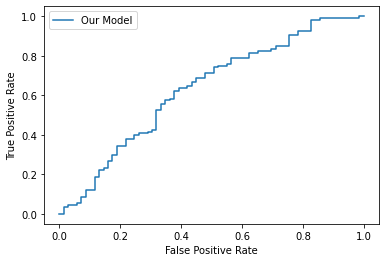

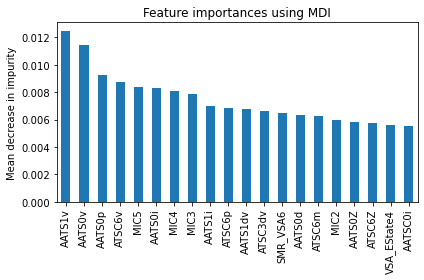

 91%|███████████████████████████████████████    | 10/11 [09:37<00:58, 58.66s/it]

52
0
Best Threshold=0.617054
[[35 27]
 [43 73]]
              precision    recall  f1-score   support

           0       0.45      0.56      0.50        62
           1       0.73      0.63      0.68       116

    accuracy                           0.61       178
   macro avg       0.59      0.60      0.59       178
weighted avg       0.63      0.61      0.61       178

balanced_accuracy_score  0.5969132369299222
matthews_corrcoef  0.18611896683429252
Sensitivity 0.5645161290322581
Specificity 0.6293103448275862
f1 0.6759259259259258
LR+ 1.5228807201800452
ppv 0.73
average_precision_score 0.7670781899536152
roc_auc_score 0.6439098998887652


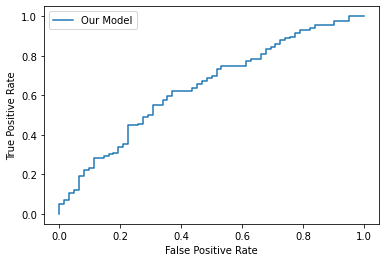

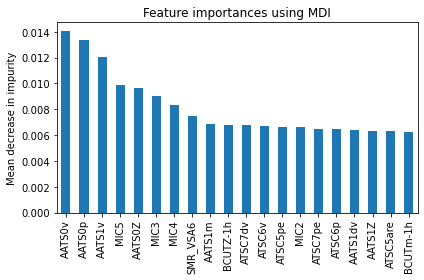

1
Best Threshold=0.567511
[[42 17]
 [54 65]]
              precision    recall  f1-score   support

           0       0.44      0.71      0.54        59
           1       0.79      0.55      0.65       119

    accuracy                           0.60       178
   macro avg       0.62      0.63      0.59       178
weighted avg       0.67      0.60      0.61       178

balanced_accuracy_score  0.6290414470873095
matthews_corrcoef  0.24373402705753278
Sensitivity 0.711864406779661
Specificity 0.5462184873949579
f1 0.6467661691542288
LR+ 1.5687382297551786
ppv 0.7926829268292683
average_precision_score 0.7695178077098501
roc_auc_score 0.6486255519156816


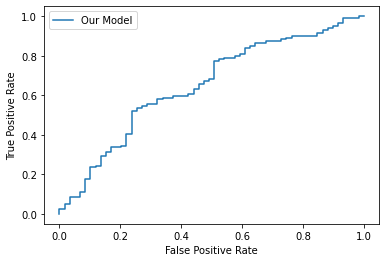

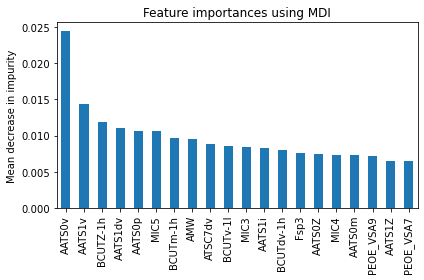

2
Best Threshold=0.575795
[[40 28]
 [36 74]]
              precision    recall  f1-score   support

           0       0.53      0.59      0.56        68
           1       0.73      0.67      0.70       110

    accuracy                           0.64       178
   macro avg       0.63      0.63      0.63       178
weighted avg       0.65      0.64      0.64       178

balanced_accuracy_score  0.6304812834224599
matthews_corrcoef  0.256343395344204
Sensitivity 0.5882352941176471
Specificity 0.6727272727272727
f1 0.6981132075471698
LR+ 1.7973856209150327
ppv 0.7254901960784313
average_precision_score 0.7257920829524697
roc_auc_score 0.6564171122994653


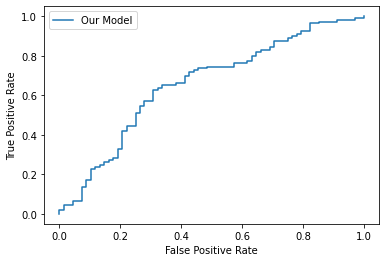

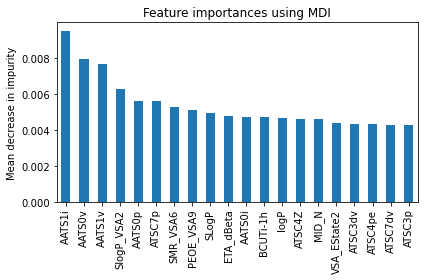

3
Best Threshold=0.632797
[[47 27]
 [37 66]]
              precision    recall  f1-score   support

           0       0.56      0.64      0.59        74
           1       0.71      0.64      0.67       103

    accuracy                           0.64       177
   macro avg       0.63      0.64      0.63       177
weighted avg       0.65      0.64      0.64       177

balanced_accuracy_score  0.6379559170821307
matthews_corrcoef  0.2725358780402701
Sensitivity 0.6351351351351351
Specificity 0.6407766990291263
f1 0.6734693877551021
LR+ 1.7680788897005115
ppv 0.7096774193548387
average_precision_score 0.7335543631872843
roc_auc_score 0.695093151403831


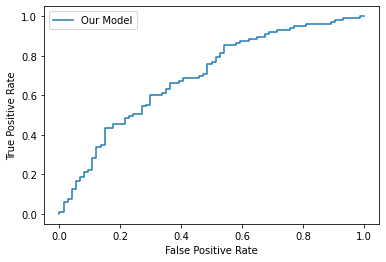

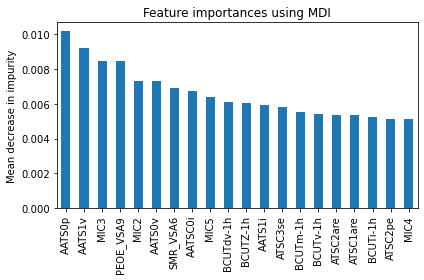

4
Best Threshold=0.660342
[[44 21]
 [39 73]]
              precision    recall  f1-score   support

           0       0.53      0.68      0.59        65
           1       0.78      0.65      0.71       112

    accuracy                           0.66       177
   macro avg       0.65      0.66      0.65       177
weighted avg       0.69      0.66      0.67       177

balanced_accuracy_score  0.6643543956043956
matthews_corrcoef  0.31752215685306445
Sensitivity 0.676923076923077
Specificity 0.6517857142857143
f1 0.7087378640776699
LR+ 1.943984220907298
ppv 0.776595744680851
average_precision_score 0.8156846406404936
roc_auc_score 0.710576923076923


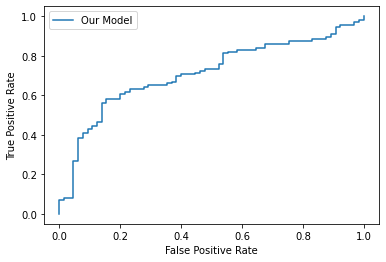

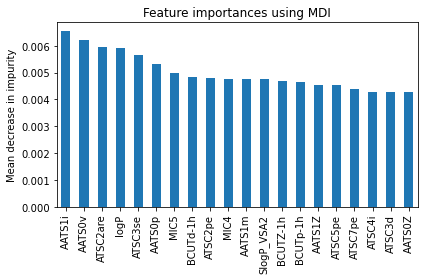

100%|███████████████████████████████████████████| 11/11 [10:32<00:00, 57.48s/it]


In [70]:
#Models to predict DILI with Morgan, MACCS, Mordred and Physicochemical 
list_of_lists=[]
baseline=0.50
for i in tqdm(range(42,53)):
    
    print(i)
    outercv = KFold(n_splits=5, random_state=i, shuffle=True) 
    for split, (train_index, test_index) in enumerate(outercv.split(X_ncv)):
            
        print(split)
        X_train= X_ncv[train_index]
        y_train= y_ncv[train_index]

        X_test= X_ncv[test_index]
        y_test= y_ncv[test_index]

        inner_cv = KFold(n_splits=4, random_state=i, shuffle=True) 

        #Hyperparameter Optimisation
        rf = RandomForestClassifier(n_jobs=-1, random_state=i)
        # Instantiate the RandomHalving search model
        param_dist_grid = { 
                'max_depth': randint(5, 20),
                'max_features': randint(30, 50),
                'min_samples_leaf': randint(5, 15),
                'min_samples_split': randint(5, 15),
                'n_estimators':[200, 300, 400, 500, 600],
                'bootstrap': [True, False],
                'oob_score': [False],
                'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'n_jobs': [40],
                'class_weight' : [None, 'balanced_subsample', 'balanced']}

        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                    factor=2, random_state=i, n_jobs=40, verbose=0, cv = inner_cv)
        rsh.fit(X_train, y_train)
        classifier = rsh.best_estimator_
        classifier.fit(X_train, y_train)

        #Threshold Balancing
        cross_val_prob_cp = cross_val_predict(classifier, X_train, y_train, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_train, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))


        y_proba = classifier.predict_proba(X_test)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        print(classification_report(y_test, y_pred))
        ba =balanced_accuracy_score(y_test, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(y_test, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

        f1= metrics.f1_score(y_test, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_test, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_test, y_proba)
        print("average_precision_score", average_precision_score)

        auc= roc_auc_score(y_test, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_proba)
        # plot the roc curve for the model
        plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        if (auc>baseline):
            # save
            print("saving model")
            baseline=auc
            pickle.dump(classifier, open("dili_NCV_bestMfpMACCSMordredPhyscochemical_model.sav",  'wb'))


        importances = classifier.feature_importances_
        forest_importances = pd.Series(importances, index=test_feature_list)

        fig, ax = plt.subplots()
        forest_importances.sort_values(ascending=False)[:20].plot.bar()
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

        plt.show()

        metrics_row=["NCV",  "DILI", i, split, ba, mcc, Sensitivity, Specificity, auc, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(metrics_row)


In [71]:
results = pd.DataFrame(list_of_lists, columns=["NCV",  "DILI", "i", "split", "ba", "mcc", "Sensitivity"
                                                       , "Specificity", "auc", "f1", "pos_LR", "ppv", 
                                                       "average_precision_score"])
results["Features"] = "Morgan, MACCS, Mordred, Phisicochemical"
results.to_csv("NCV_models_MfpMACCSMordredPhyscochemical.csv", index=False)
results

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0   NCV  DILI  42      0  0.623962  0.238800     0.646154     0.601770   
1   NCV  DILI  42      1  0.638490  0.251755     0.647059     0.629921   
2   NCV  DILI  42      2  0.638393  0.267617     0.630769     0.646018   
3   NCV  DILI  42      3  0.681900  0.363800     0.658537     0.705263   
4   NCV  DILI  42      4  0.572047  0.141719     0.492308     0.651786   
5   NCV  DILI  43      0  0.641101  0.263436     0.642857     0.639344   
6   NCV  DILI  43      1  0.627211  0.253971     0.604938     0.649485   
7   NCV  DILI  43      2  0.609485  0.205925     0.571429     0.647541   
8   NCV  DILI  43      3  0.625104  0.246997     0.539683     0.710526   
9   NCV  DILI  43      4  0.634921  0.271099     0.555556     0.714286   
10  NCV  DILI  44      0  0.651136  0.293058     0.671642     0.630631   
11  NCV  DILI  44      1  0.590186  0.175623     0.531250     0.649123   
12  NCV  DILI  44      2  0.684214  0.360865     0.656716     0.711712   
13  NCV  DILI  44      3  0.702405  0.381776     0.724138     0.680672   
14  NCV  DILI  44      4  0.571230  0.141380     0.513889     0.628571   
15  NCV  DILI  45      0  0.611568  0.228459     0.468750     0.754386   
16  NCV  DILI  45      1  0.614311  0.229823     0.545455     0.683168   
17  NCV  DILI  45      2  0.619980  0.225339     0.719298     0.520661   
18  NCV  DILI  45      3  0.625940  0.251007     0.523810     0.728070   
19  NCV  DILI  45      4  0.673474  0.336688     0.701493     0.645455   
20  NCV  DILI  46      0  0.551542  0.122705     0.272727     0.830357   
21  NCV  DILI  46      1  0.616949  0.222032     0.700000     0.533898   
22  NCV  DILI  46      2  0.666644  0.324421     0.784615     0.548673   
23  NCV  DILI  46      3  0.715453  0.418990     0.707692     0.723214   
24  NCV  DILI  46      4  0.567857  0.133337     0.583333     0.552381   
25  NCV  DILI  47      0  0.657487  0.306157     0.705882     0.609091   
26  NCV  DILI  47      1  0.614511  0.215171     0.620690     0.608333   
27  NCV  DILI  47      2  0.651872  0.295241     0.676471     0.627273   
28  NCV  DILI  47      3  0.655180  0.299738     0.634921     0.675439   
29  NCV  DILI  47      4  0.642506  0.284370     0.577465     0.707547   
30  NCV  DILI  48      0  0.585162  0.167627     0.492063     0.678261   
31  NCV  DILI  48      1  0.586292  0.181077     0.420290     0.752294   
32  NCV  DILI  48      2  0.670186  0.325545     0.714286     0.626087   
33  NCV  DILI  48      3  0.667538  0.319106     0.688525     0.646552   
34  NCV  DILI  48      4  0.626786  0.249448     0.625000     0.628571   
35  NCV  DILI  49      0  0.636102  0.261840     0.640625     0.631579   
36  NCV  DILI  49      1  0.611376  0.218737     0.685714     0.537037   
37  NCV  DILI  49      2  0.668932  0.339916     0.600000     0.737864   
38  NCV  DILI  49      3  0.659464  0.296147     0.641509     0.677419   
39  NCV  DILI  49      4  0.642711  0.276048     0.681818     0.603604   
40  NCV  DILI  50      0  0.588833  0.179911     0.442623     0.735043   
41  NCV  DILI  50      1  0.622260  0.249054     0.492308     0.752212   
42  NCV  DILI  50      2  0.637929  0.273044     0.693333     0.582524   
43  NCV  DILI  50      3  0.665958  0.328144     0.633803     0.698113   
44  NCV  DILI  50      4  0.632158  0.254200     0.553571     0.710744   
45  NCV  DILI  51      0  0.635829  0.266420     0.735294     0.536364   
46  NCV  DILI  51      1  0.690374  0.369998     0.735294     0.645455   
47  NCV  DILI  51      2  0.634041  0.270792     0.541667     0.726415   
48  NCV  DILI  51      3  0.637955  0.274335     0.490196     0.785714   
49  NCV  DILI  51      4  0.621779  0.237881     0.623188     0.620370   
50  NCV  DILI  52      0  0.596913  0.186119     0.564516     0.629310   
51  NCV  DILI  52      1  0.629041  0.243734     0.711864     0.546218   
52  NCV  DILI  52      2  0.630481  0.256343     0.588235     0.672727   
53  NCV 

In [72]:
results.describe()

i      split         ba        mcc  Sensitivity  Specificity  \
count  55.000000  55.000000  55.000000  55.000000    55.000000    55.000000   
mean   47.000000   2.000000   0.633772   0.261215     0.611224     0.656321   
std     3.191424   1.427248   0.034040   0.064414     0.095774     0.067376   
min    42.000000   0.000000   0.551542   0.122705     0.272727     0.520661   
25%    44.000000   1.000000   0.615730   0.226899     0.549513     0.626680   
50%    47.000000   2.000000   0.634921   0.261840     0.633803     0.647541   
75%    50.000000   3.000000   0.656333   0.297943     0.683766     0.709037   
max    52.000000   4.000000   0.715453   0.418990     0.784615     0.830357   

             auc         f1     pos_LR        ppv  average_precision_score  
count  55.000000  55.000000  55.000000  55.000000                55.000000  
mean    0.678993   0.694646   1.806669   0.744647                 0.764448  
std     0.038877   0.038324   0.258247   0.046378                 0.041366  
min     0.588958   0.601036   1.303191   0.653465                 0.669523  
25%     0.652732   0.671448   1.621913   0.712912                 0.736532  
50%     0.682620   0.702222   1.781923   0.747253                 0.760403  
75%     0.706338   0.719036   1.952131   0.777187                 0.792089  
max     0.771703   0.788845   2.556824   0.835052                 0.855020

In [73]:
loaded_rf = pickle.load(open("dili_NCV_bestMfpMACCSMordredPhyscochemical_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(max_depth=10, max_features=43, min_samples_leaf=7,
                       min_samples_split=10, n_estimators=600, n_jobs=40,
                       random_state=42)

Best Threshold=0.572299
[[ 29  38]
 [ 46 110]]
              precision    recall  f1-score   support

           0       0.39      0.43      0.41        67
           1       0.74      0.71      0.72       156

    accuracy                           0.62       223
   macro avg       0.56      0.57      0.57       223
weighted avg       0.64      0.62      0.63       223

balanced_accuracy_score  0.5689820130118638
matthews_corrcoef  0.1338764138732096
Sensitivity 0.43283582089552236
Specificity 0.7051282051282052
f1 0.7236842105263159
LR+ 1.4678780012978587
ppv 0.7432432432432432
average_precision_score 0.7948855791186735
roc_auc_score 0.6217948717948717


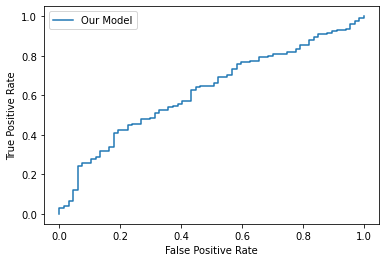

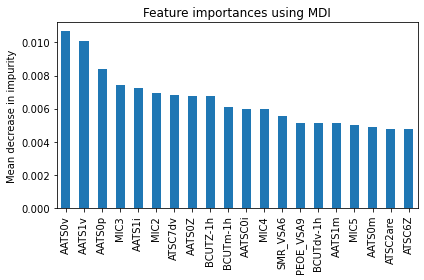

In [74]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)

average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
print("average_precision_score", average_precision_score)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [75]:
#Final model released on all data
loaded_rf = pickle.load(open("dili_NCV_bestMfpMACCSMordredPhyscochemical_model.sav", 'rb'))
params = loaded_rf.get_params()
    
final_classifier= RandomForestClassifier(**params)
final_classifier.fit(X_dili, y_dili)
pickle.dump(final_classifier, open("final_dili_bestMfpMACCSMordredPhyscochemical_model.sav",  'wb'))

In [76]:
#Models using just liv data preds

In [78]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[[3,  5, 6, 7, 8,  11, 14, 15, 16, "median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [80]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[[3, 5, 6, 7, 8, 11, 14, 15, 16, "median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [81]:
y_dili = np.array(test_dili_all['TOXICITY'])
test_features= test_dili_all[[3, 5, 6, 7, 8, 11, 14, 15, 16, "median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]]

test_feature_list = list(test_features.columns)
X_dili = np.array(test_features)

In [82]:
test_feature_list = list(test_feature_list)
test_feature_list

[3,
 5,
 6,
 7,
 8,
 11,
 14,
 15,
 16,
 'median pMolar unbound plasma concentration',
 'median pMolar total plasma concentration']

In [83]:
len(test_feature_list)

11

In [84]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

print((X_dili).shape)
print(len(y_dili)) 

(888, 11)
(223, 11)
888
223
(1111, 11)
1111


  0%|                                                    | 0/11 [00:00<?, ?it/s]

42
0
Best Threshold=0.588092
[[30 35]
 [29 84]]
              precision    recall  f1-score   support

           0       0.51      0.46      0.48        65
           1       0.71      0.74      0.72       113

    accuracy                           0.64       178
   macro avg       0.61      0.60      0.60       178
weighted avg       0.63      0.64      0.64       178

balanced_accuracy_score  0.6024506466984343
matthews_corrcoef  0.20957579069204096
Sensitivity 0.46153846153846156
Specificity 0.7433628318584071
f1 0.7241379310344829
LR+ 1.7984084880636608
ppv 0.7058823529411765
average_precision_score 0.7355494769234352
roc_auc_score 0.6396187882913547


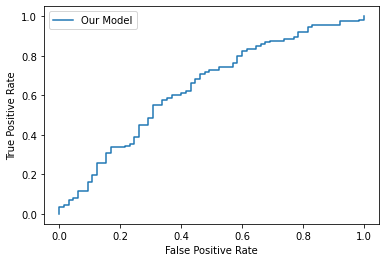

saving model


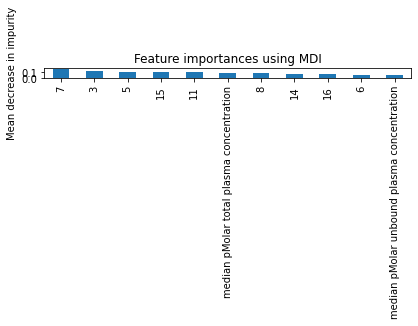

1
Best Threshold=0.491807
[[ 16  35]
 [ 21 106]]
              precision    recall  f1-score   support

           0       0.43      0.31      0.36        51
           1       0.75      0.83      0.79       127

    accuracy                           0.69       178
   macro avg       0.59      0.57      0.58       178
weighted avg       0.66      0.69      0.67       178

balanced_accuracy_score  0.5741855797437085
matthews_corrcoef  0.16532023759910686
Sensitivity 0.3137254901960784
Specificity 0.8346456692913385
f1 0.791044776119403
LR+ 1.8972922502334262
ppv 0.75177304964539
average_precision_score 0.8699652807151604
roc_auc_score 0.7197776748494673


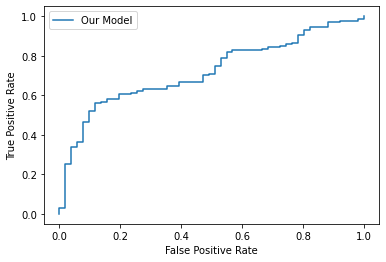

saving model


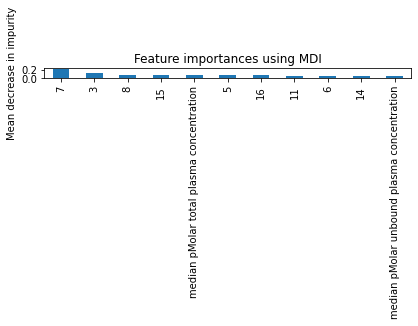

2
Best Threshold=0.605007
[[35 30]
 [29 84]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.54        65
           1       0.74      0.74      0.74       113

    accuracy                           0.67       178
   macro avg       0.64      0.64      0.64       178
weighted avg       0.67      0.67      0.67       178

balanced_accuracy_score  0.6409121851599728
matthews_corrcoef  0.28276915415191095
Sensitivity 0.5384615384615384
Specificity 0.7433628318584071
f1 0.7400881057268723
LR+ 2.0981432360742707
ppv 0.7368421052631579
average_precision_score 0.7767460395070265
roc_auc_score 0.6744724302246425


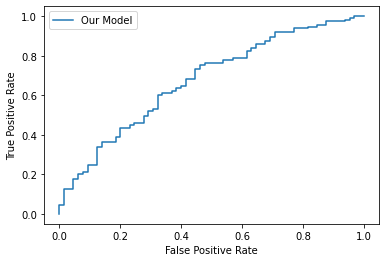

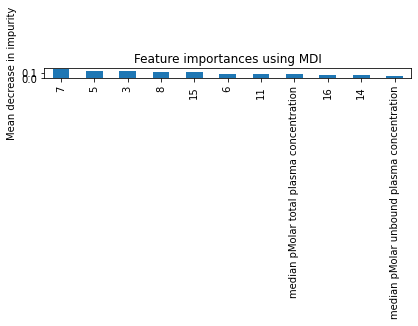

3
Best Threshold=0.674613
[[62 20]
 [45 50]]
              precision    recall  f1-score   support

           0       0.58      0.76      0.66        82
           1       0.71      0.53      0.61        95

    accuracy                           0.63       177
   macro avg       0.65      0.64      0.63       177
weighted avg       0.65      0.63      0.63       177

balanced_accuracy_score  0.641206675224647
matthews_corrcoef  0.2880136315079063
Sensitivity 0.7560975609756098
Specificity 0.5263157894736842
f1 0.6060606060606061
LR+ 1.5962059620596205
ppv 0.7142857142857143
average_precision_score 0.706020128398184
roc_auc_score 0.6699614890885751


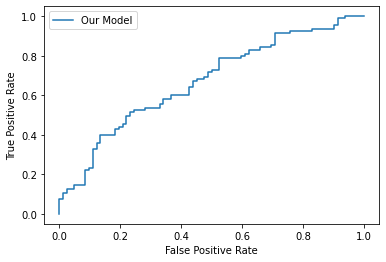

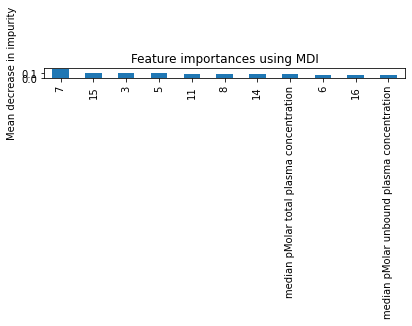

4
Best Threshold=0.630451
[[36 29]
 [47 65]]
              precision    recall  f1-score   support

           0       0.43      0.55      0.49        65
           1       0.69      0.58      0.63       112

    accuracy                           0.57       177
   macro avg       0.56      0.57      0.56       177
weighted avg       0.60      0.57      0.58       177

balanced_accuracy_score  0.5671016483516484
matthews_corrcoef  0.12963608326178186
Sensitivity 0.5538461538461539
Specificity 0.5803571428571429
f1 0.6310679611650486
LR+ 1.3198036006546647
ppv 0.6914893617021277
average_precision_score 0.7278049248701889
roc_auc_score 0.6155219780219781


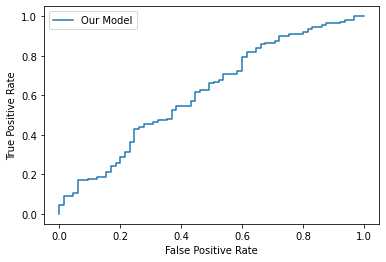

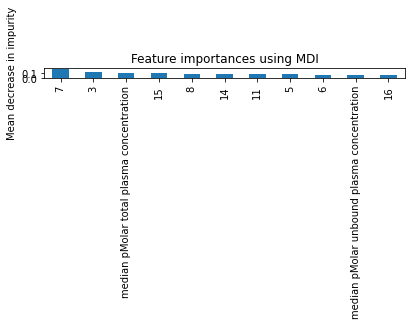

  9%|████                                        | 1/11 [00:53<08:52, 53.21s/it]

43
0
Best Threshold=0.576119
[[29 27]
 [30 92]]
              precision    recall  f1-score   support

           0       0.49      0.52      0.50        56
           1       0.77      0.75      0.76       122

    accuracy                           0.68       178
   macro avg       0.63      0.64      0.63       178
weighted avg       0.68      0.68      0.68       178

balanced_accuracy_score  0.6359777517564402
matthews_corrcoef  0.2682701143006449
Sensitivity 0.5178571428571429
Specificity 0.7540983606557377
f1 0.7634854771784233
LR+ 2.1059523809523806
ppv 0.773109243697479
average_precision_score 0.7695011954144949
roc_auc_score 0.6510538641686184


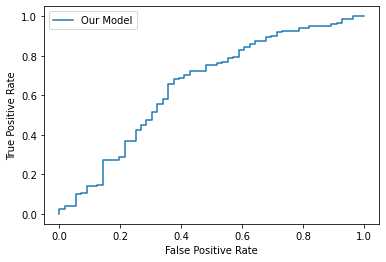

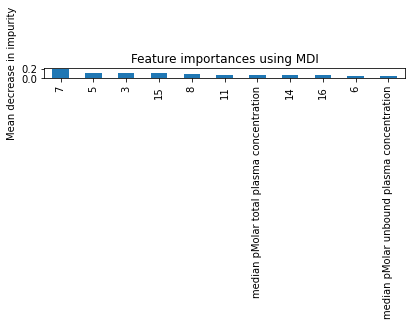

1
Best Threshold=0.659510
[[49 32]
 [41 56]]
              precision    recall  f1-score   support

           0       0.54      0.60      0.57        81
           1       0.64      0.58      0.61        97

    accuracy                           0.59       178
   macro avg       0.59      0.59      0.59       178
weighted avg       0.59      0.59      0.59       178

balanced_accuracy_score  0.5911289296169021
matthews_corrcoef  0.18153152271782852
Sensitivity 0.6049382716049383
Specificity 0.5773195876288659
f1 0.6054054054054053
LR+ 1.4311954230653416
ppv 0.6363636363636364
average_precision_score 0.6745893682602688
roc_auc_score 0.6237749777268677


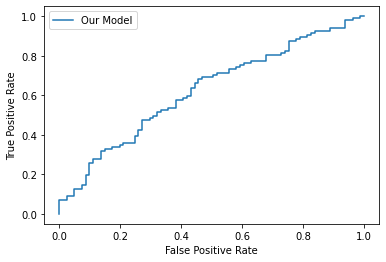

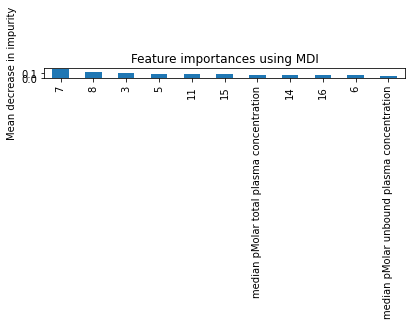

2
Best Threshold=0.579420
[[32 24]
 [39 83]]
              precision    recall  f1-score   support

           0       0.45      0.57      0.50        56
           1       0.78      0.68      0.72       122

    accuracy                           0.65       178
   macro avg       0.61      0.63      0.61       178
weighted avg       0.67      0.65      0.66       178

balanced_accuracy_score  0.6258782201405152
matthews_corrcoef  0.2387445436562371
Sensitivity 0.5714285714285714
Specificity 0.680327868852459
f1 0.7248908296943232
LR+ 1.7875457875457874
ppv 0.7757009345794392
average_precision_score 0.7596262199042294
roc_auc_score 0.6331967213114754


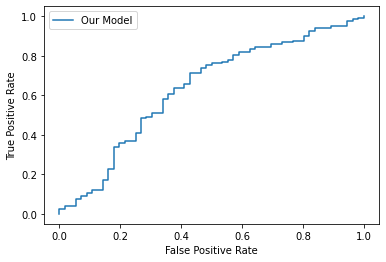

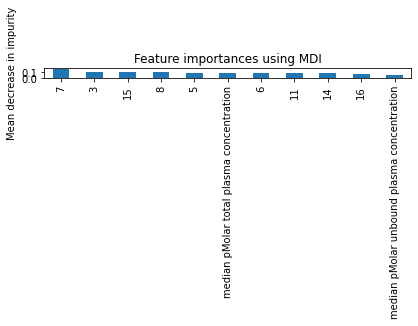

3
Best Threshold=0.683392
[[48 15]
 [50 64]]
              precision    recall  f1-score   support

           0       0.49      0.76      0.60        63
           1       0.81      0.56      0.66       114

    accuracy                           0.63       177
   macro avg       0.65      0.66      0.63       177
weighted avg       0.70      0.63      0.64       177

balanced_accuracy_score  0.6616541353383458
matthews_corrcoef  0.31139592967929364
Sensitivity 0.7619047619047619
Specificity 0.5614035087719298
f1 0.6632124352331606
LR+ 1.7371428571428569
ppv 0.810126582278481
average_precision_score 0.8040041885661151
roc_auc_score 0.7243107769423559


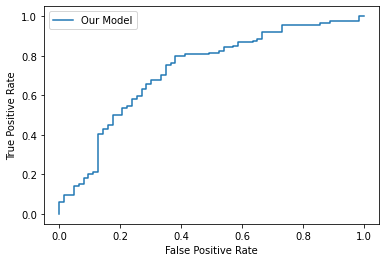

saving model


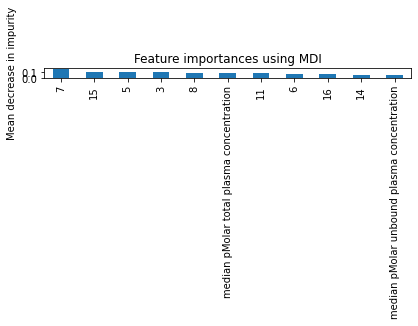

4
Best Threshold=0.664072
[[50 22]
 [49 56]]
              precision    recall  f1-score   support

           0       0.51      0.69      0.58        72
           1       0.72      0.53      0.61       105

    accuracy                           0.60       177
   macro avg       0.61      0.61      0.60       177
weighted avg       0.63      0.60      0.60       177

balanced_accuracy_score  0.6138888888888889
matthews_corrcoef  0.22537583601827
Sensitivity 0.6944444444444444
Specificity 0.5333333333333333
f1 0.6120218579234972
LR+ 1.488095238095238
ppv 0.717948717948718
average_precision_score 0.7521879933382838
roc_auc_score 0.6658730158730158


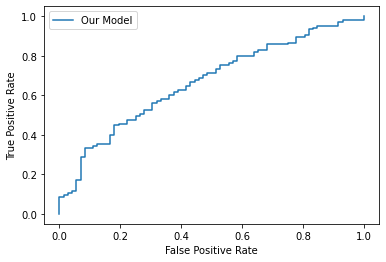

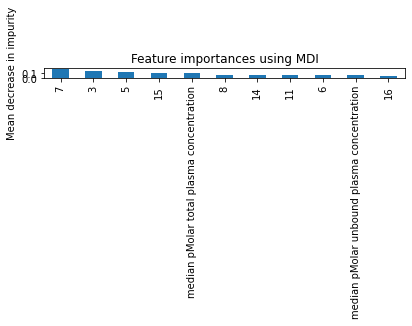

 18%|████████                                    | 2/11 [01:43<07:43, 51.47s/it]

44
0
Best Threshold=0.555362
[[28 39]
 [22 89]]
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        67
           1       0.70      0.80      0.74       111

    accuracy                           0.66       178
   macro avg       0.63      0.61      0.61       178
weighted avg       0.64      0.66      0.64       178

balanced_accuracy_score  0.609856124781498
matthews_corrcoef  0.2368444293551199
Sensitivity 0.417910447761194
Specificity 0.8018018018018018
f1 0.7447698744769874
LR+ 2.108548168249661
ppv 0.6953125
average_precision_score 0.7284194362342807
roc_auc_score 0.6302272421675407


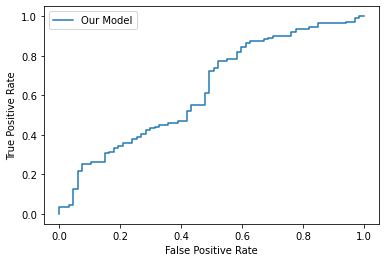

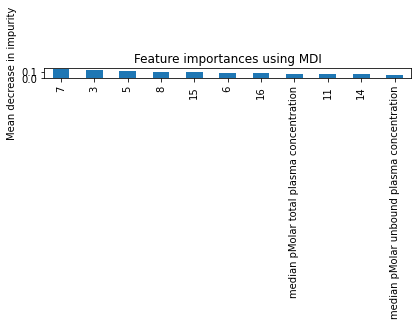

1
Best Threshold=0.596364
[[29 35]
 [38 76]]
              precision    recall  f1-score   support

           0       0.43      0.45      0.44        64
           1       0.68      0.67      0.68       114

    accuracy                           0.59       178
   macro avg       0.56      0.56      0.56       178
weighted avg       0.59      0.59      0.59       178

balanced_accuracy_score  0.5598958333333333
matthews_corrcoef  0.11865065204608993
Sensitivity 0.453125
Specificity 0.6666666666666666
f1 0.6755555555555556
LR+ 1.3593749999999998
ppv 0.6846846846846847
average_precision_score 0.7030392454267309
roc_auc_score 0.5737390350877193


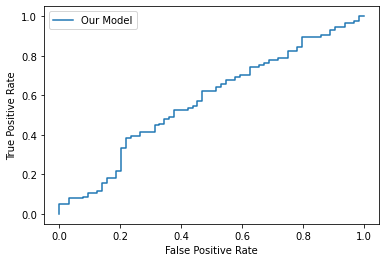

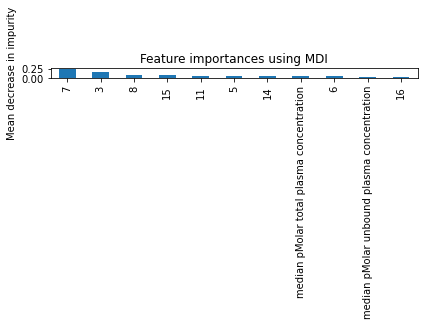

2
Best Threshold=0.606710
[[37 30]
 [31 80]]
              precision    recall  f1-score   support

           0       0.54      0.55      0.55        67
           1       0.73      0.72      0.72       111

    accuracy                           0.66       178
   macro avg       0.64      0.64      0.64       178
weighted avg       0.66      0.66      0.66       178

balanced_accuracy_score  0.636479763345435
matthews_corrcoef  0.2721738196924865
Sensitivity 0.5522388059701493
Specificity 0.7207207207207207
f1 0.7239819004524887
LR+ 1.97737120847376
ppv 0.7272727272727273
average_precision_score 0.7695119776353303
roc_auc_score 0.7036439424499126


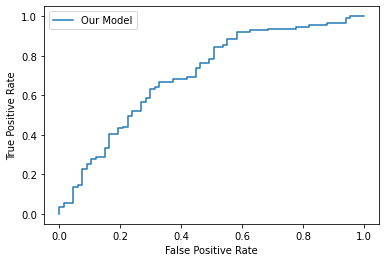

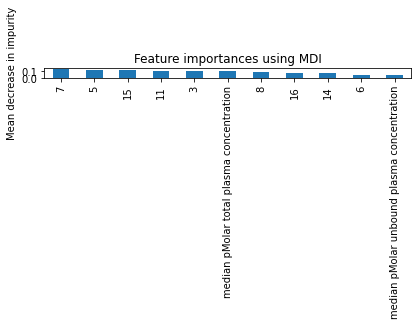

3
Best Threshold=0.540022
[[32 26]
 [21 98]]
              precision    recall  f1-score   support

           0       0.60      0.55      0.58        58
           1       0.79      0.82      0.81       119

    accuracy                           0.73       177
   macro avg       0.70      0.69      0.69       177
weighted avg       0.73      0.73      0.73       177

balanced_accuracy_score  0.6876267748478702
matthews_corrcoef  0.38455946880089426
Sensitivity 0.5517241379310345
Specificity 0.8235294117647058
f1 0.8065843621399176
LR+ 3.1264367816091947
ppv 0.7903225806451613
average_precision_score 0.8393471274410751
roc_auc_score 0.7373225152129818


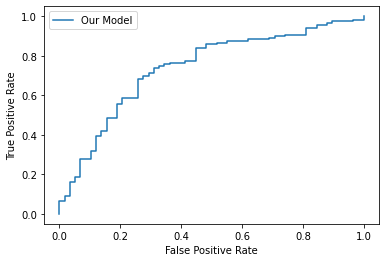

saving model


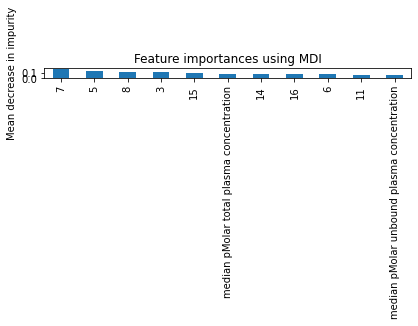

4
Best Threshold=0.614616
[[42 30]
 [38 67]]
              precision    recall  f1-score   support

           0       0.53      0.58      0.55        72
           1       0.69      0.64      0.66       105

    accuracy                           0.62       177
   macro avg       0.61      0.61      0.61       177
weighted avg       0.62      0.62      0.62       177

balanced_accuracy_score  0.6107142857142858
matthews_corrcoef  0.2185564839385367
Sensitivity 0.5833333333333334
Specificity 0.638095238095238
f1 0.6633663366336633
LR+ 1.6118421052631577
ppv 0.6907216494845361
average_precision_score 0.7079059457360656
roc_auc_score 0.6195767195767196


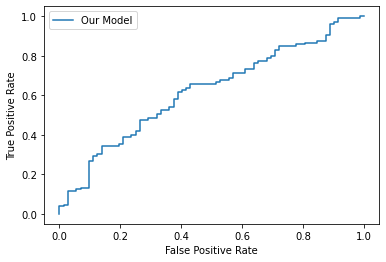

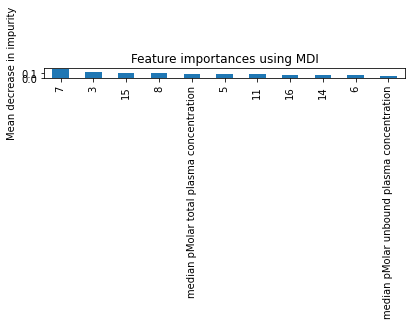

 27%|████████████                                | 3/11 [02:40<07:11, 53.92s/it]

45
0
Best Threshold=0.592054
[[34 30]
 [19 95]]
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        64
           1       0.76      0.83      0.79       114

    accuracy                           0.72       178
   macro avg       0.70      0.68      0.69       178
weighted avg       0.72      0.72      0.72       178

balanced_accuracy_score  0.6822916666666667
matthews_corrcoef  0.3826011602161475
Sensitivity 0.53125
Specificity 0.8333333333333334
f1 0.7949790794979081
LR+ 3.187500000000001
ppv 0.76
average_precision_score 0.7775076280282712
roc_auc_score 0.7086074561403509


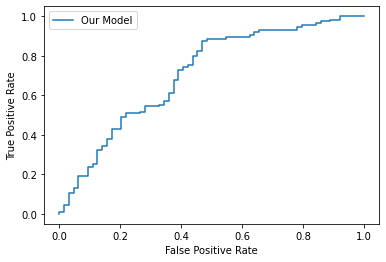

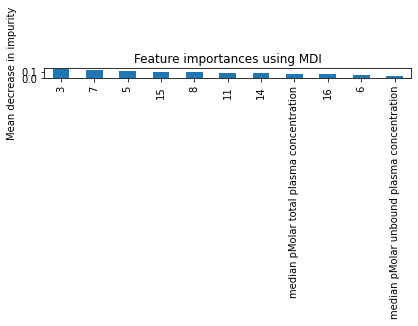

1
Best Threshold=0.641933
[[44 33]
 [44 57]]
              precision    recall  f1-score   support

           0       0.50      0.57      0.53        77
           1       0.63      0.56      0.60       101

    accuracy                           0.57       178
   macro avg       0.57      0.57      0.57       178
weighted avg       0.58      0.57      0.57       178

balanced_accuracy_score  0.5678925035360678
matthews_corrcoef  0.1345535863870529
Sensitivity 0.5714285714285714
Specificity 0.5643564356435643
f1 0.5968586387434553
LR+ 1.3116883116883113
ppv 0.6333333333333333
average_precision_score 0.686754319490672
roc_auc_score 0.6102610261026102


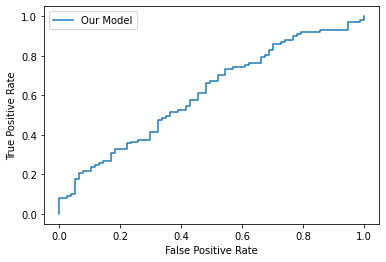

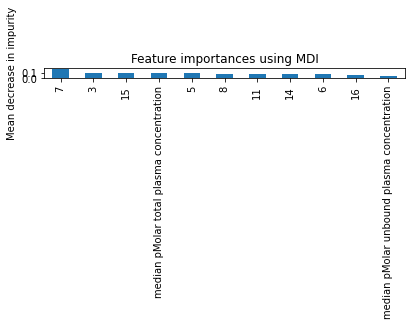

2
Best Threshold=0.607520
[[30 27]
 [40 81]]
              precision    recall  f1-score   support

           0       0.43      0.53      0.47        57
           1       0.75      0.67      0.71       121

    accuracy                           0.62       178
   macro avg       0.59      0.60      0.59       178
weighted avg       0.65      0.62      0.63       178

balanced_accuracy_score  0.597868638538495
matthews_corrcoef  0.18695744219559607
Sensitivity 0.5263157894736842
Specificity 0.6694214876033058
f1 0.7074235807860261
LR+ 1.5921052631578947
ppv 0.75
average_precision_score 0.7972363820876145
roc_auc_score 0.6470929389589677


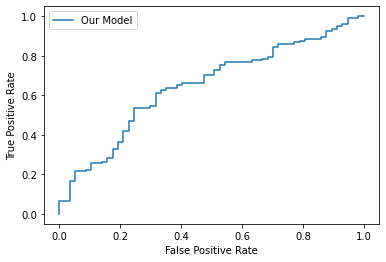

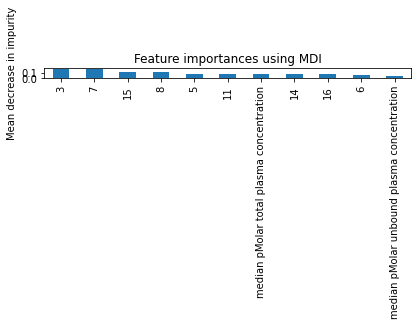

3
Best Threshold=0.612793
[[33 30]
 [41 73]]
              precision    recall  f1-score   support

           0       0.45      0.52      0.48        63
           1       0.71      0.64      0.67       114

    accuracy                           0.60       177
   macro avg       0.58      0.58      0.58       177
weighted avg       0.62      0.60      0.60       177

balanced_accuracy_score  0.5820802005012531
matthews_corrcoef  0.1593516748643461
Sensitivity 0.5238095238095238
Specificity 0.6403508771929824
f1 0.672811059907834
LR+ 1.456445993031359
ppv 0.7087378640776699
average_precision_score 0.8062358634599758
roc_auc_score 0.6892230576441103


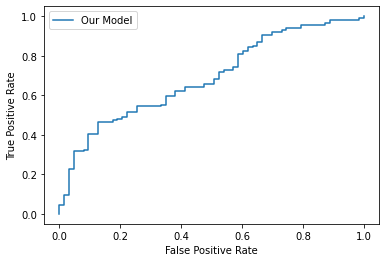

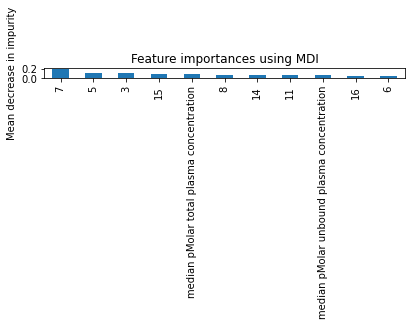

4
Best Threshold=0.455494
[[25 42]
 [15 95]]
              precision    recall  f1-score   support

           0       0.62      0.37      0.47        67
           1       0.69      0.86      0.77       110

    accuracy                           0.68       177
   macro avg       0.66      0.62      0.62       177
weighted avg       0.67      0.68      0.65       177

balanced_accuracy_score  0.6183853459972863
matthews_corrcoef  0.2745815853159532
Sensitivity 0.373134328358209
Specificity 0.8636363636363636
f1 0.7692307692307693
LR+ 2.736318407960199
ppv 0.6934306569343066
average_precision_score 0.7983466752940476
roc_auc_score 0.7162822252374492


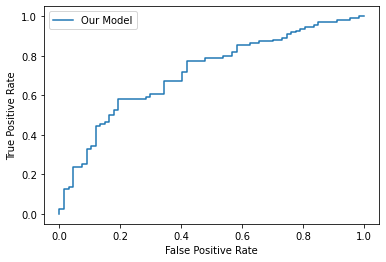

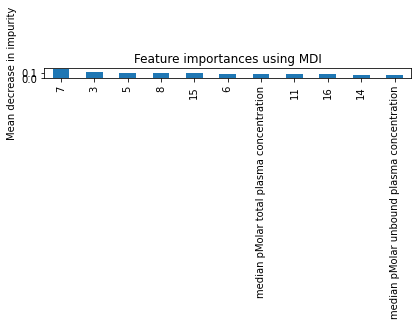

 36%|████████████████                            | 4/11 [03:38<06:28, 55.47s/it]

46
0
Best Threshold=0.618689
[[29 37]
 [36 76]]
              precision    recall  f1-score   support

           0       0.45      0.44      0.44        66
           1       0.67      0.68      0.68       112

    accuracy                           0.59       178
   macro avg       0.56      0.56      0.56       178
weighted avg       0.59      0.59      0.59       178

balanced_accuracy_score  0.558982683982684
matthews_corrcoef  0.11834219104725639
Sensitivity 0.4393939393939394
Specificity 0.6785714285714286
f1 0.6755555555555557
LR+ 1.3670033670033672
ppv 0.672566371681416
average_precision_score 0.7580165445853139
roc_auc_score 0.640422077922078


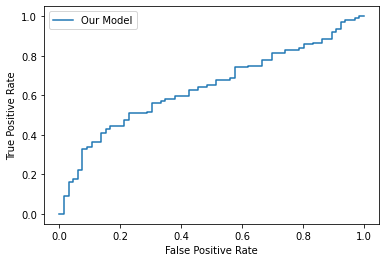

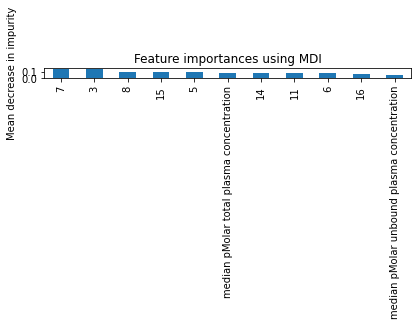

1
Best Threshold=0.587873
[[31 29]
 [41 77]]
              precision    recall  f1-score   support

           0       0.43      0.52      0.47        60
           1       0.73      0.65      0.69       118

    accuracy                           0.61       178
   macro avg       0.58      0.58      0.58       178
weighted avg       0.63      0.61      0.61       178

balanced_accuracy_score  0.5846045197740113
matthews_corrcoef  0.1629750069979812
Sensitivity 0.5166666666666667
Specificity 0.652542372881356
f1 0.6875
LR+ 1.4869918699186995
ppv 0.7264150943396226
average_precision_score 0.7616984269431519
roc_auc_score 0.6402542372881356


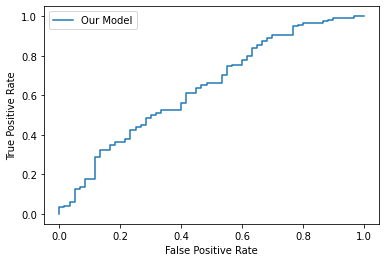

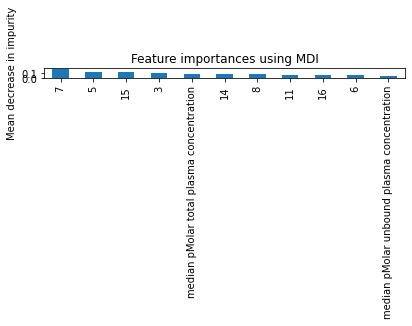

2
Best Threshold=0.590312
[[44 21]
 [27 86]]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        65
           1       0.80      0.76      0.78       113

    accuracy                           0.73       178
   macro avg       0.71      0.72      0.71       178
weighted avg       0.74      0.73      0.73       178

balanced_accuracy_score  0.718992511912866
matthews_corrcoef  0.43065956524339466
Sensitivity 0.676923076923077
Specificity 0.7610619469026548
f1 0.7818181818181817
LR+ 2.833048433048433
ppv 0.8037383177570093
average_precision_score 0.805926375462458
roc_auc_score 0.7339686861810757


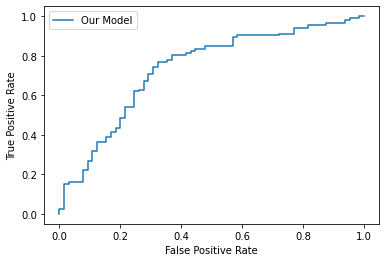

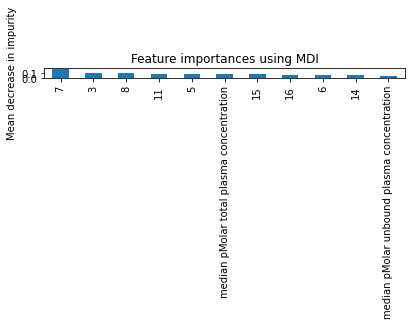

3
Best Threshold=0.545652
[[40 25]
 [42 70]]
              precision    recall  f1-score   support

           0       0.49      0.62      0.54        65
           1       0.74      0.62      0.68       112

    accuracy                           0.62       177
   macro avg       0.61      0.62      0.61       177
weighted avg       0.65      0.62      0.63       177

balanced_accuracy_score  0.6201923076923077
matthews_corrcoef  0.23238261269026653
Sensitivity 0.6153846153846154
Specificity 0.625
f1 0.6763285024154588
LR+ 1.6410256410256412
ppv 0.7368421052631579
average_precision_score 0.7978658037237515
roc_auc_score 0.7010989010989012


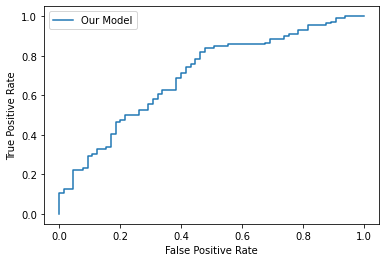

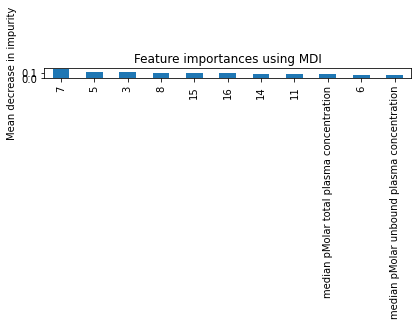

4
Best Threshold=0.625101
[[37 35]
 [36 69]]
              precision    recall  f1-score   support

           0       0.51      0.51      0.51        72
           1       0.66      0.66      0.66       105

    accuracy                           0.60       177
   macro avg       0.59      0.59      0.59       177
weighted avg       0.60      0.60      0.60       177

balanced_accuracy_score  0.5855158730158729
matthews_corrcoef  0.1706709191614033
Sensitivity 0.5138888888888888
Specificity 0.6571428571428571
f1 0.6602870813397129
LR+ 1.4988425925925923
ppv 0.6634615384615384
average_precision_score 0.6846143587817255
roc_auc_score 0.5943121693121693


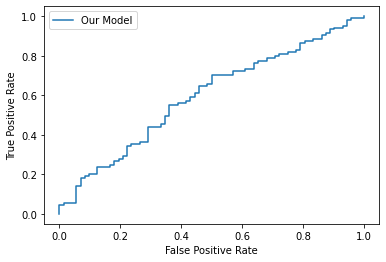

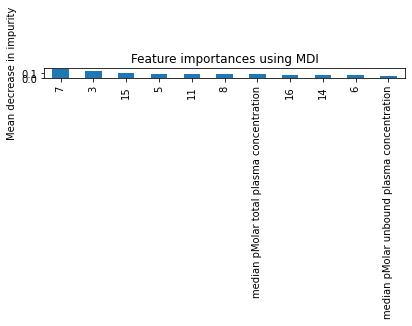

 45%|████████████████████                        | 5/11 [04:40<05:48, 58.00s/it]

47
0
Best Threshold=0.687241
[[47 21]
 [59 51]]
              precision    recall  f1-score   support

           0       0.44      0.69      0.54        68
           1       0.71      0.46      0.56       110

    accuracy                           0.55       178
   macro avg       0.58      0.58      0.55       178
weighted avg       0.61      0.55      0.55       178

balanced_accuracy_score  0.5774064171122995
matthews_corrcoef  0.15326344371801356
Sensitivity 0.6911764705882353
Specificity 0.4636363636363636
f1 0.5604395604395606
LR+ 1.2886340977068793
ppv 0.7083333333333334
average_precision_score 0.7074411535323537
roc_auc_score 0.6348930481283422


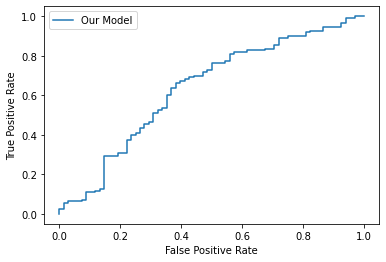

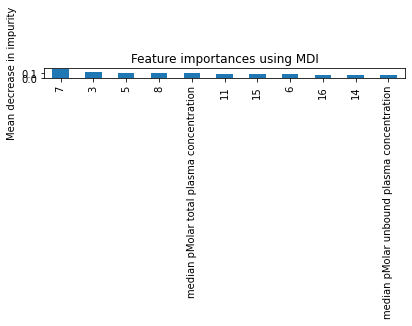

1
Best Threshold=0.663380
[[40 18]
 [54 66]]
              precision    recall  f1-score   support

           0       0.43      0.69      0.53        58
           1       0.79      0.55      0.65       120

    accuracy                           0.60       178
   macro avg       0.61      0.62      0.59       178
weighted avg       0.67      0.60      0.61       178

balanced_accuracy_score  0.6198275862068966
matthews_corrcoef  0.22500276582399084
Sensitivity 0.6896551724137931
Specificity 0.55
f1 0.6470588235294117
LR+ 1.5325670498084294
ppv 0.7857142857142857
average_precision_score 0.7769322528720404
roc_auc_score 0.6429597701149425


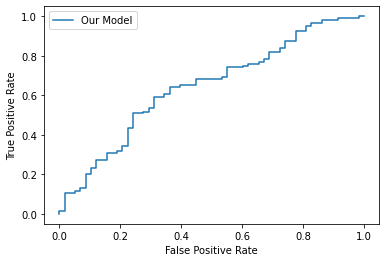

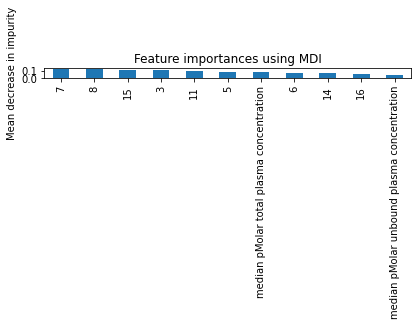

2
Best Threshold=0.603432
[[34 34]
 [24 86]]
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        68
           1       0.72      0.78      0.75       110

    accuracy                           0.67       178
   macro avg       0.65      0.64      0.64       178
weighted avg       0.67      0.67      0.67       178

balanced_accuracy_score  0.6409090909090909
matthews_corrcoef  0.29215625426644737
Sensitivity 0.5
Specificity 0.7818181818181819
f1 0.7478260869565218
LR+ 2.291666666666667
ppv 0.7166666666666667
average_precision_score 0.8003733292306962
roc_auc_score 0.7062834224598931


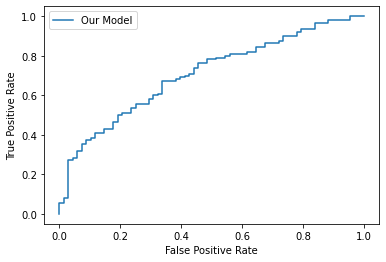

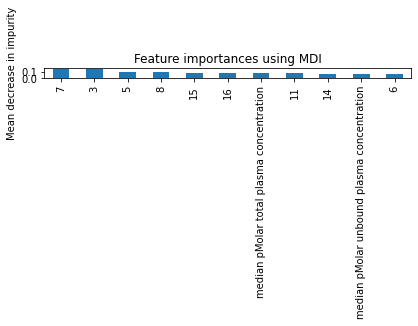

3
Best Threshold=0.607687
[[40 23]
 [32 82]]
              precision    recall  f1-score   support

           0       0.56      0.63      0.59        63
           1       0.78      0.72      0.75       114

    accuracy                           0.69       177
   macro avg       0.67      0.68      0.67       177
weighted avg       0.70      0.69      0.69       177

balanced_accuracy_score  0.677109440267335
matthews_corrcoef  0.3452498581619884
Sensitivity 0.6349206349206349
Specificity 0.7192982456140351
f1 0.7488584474885845
LR+ 2.261904761904762
ppv 0.780952380952381
average_precision_score 0.817740366152355
roc_auc_score 0.7250069618490672


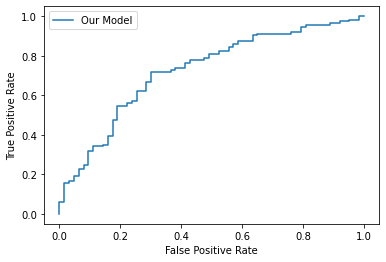

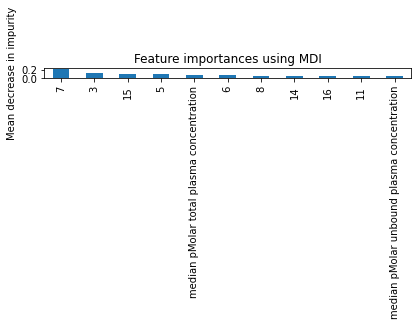

4
Best Threshold=0.591427
[[34 37]
 [30 76]]
              precision    recall  f1-score   support

           0       0.53      0.48      0.50        71
           1       0.67      0.72      0.69       106

    accuracy                           0.62       177
   macro avg       0.60      0.60      0.60       177
weighted avg       0.62      0.62      0.62       177

balanced_accuracy_score  0.5979271857560456
matthews_corrcoef  0.19979571411704142
Sensitivity 0.4788732394366197
Specificity 0.7169811320754716
f1 0.6940639269406392
LR+ 1.6920187793427226
ppv 0.672566371681416
average_precision_score 0.7619838425612
roc_auc_score 0.6745947382407653


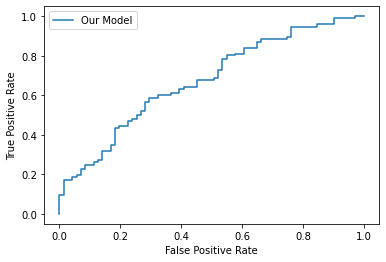

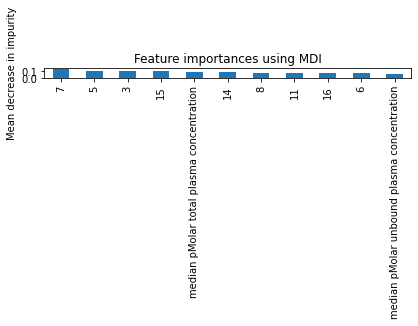

 55%|████████████████████████                    | 6/11 [05:32<04:40, 56.06s/it]

48
0
Best Threshold=0.495343
[[21 42]
 [25 90]]
              precision    recall  f1-score   support

           0       0.46      0.33      0.39        63
           1       0.68      0.78      0.73       115

    accuracy                           0.62       178
   macro avg       0.57      0.56      0.56       178
weighted avg       0.60      0.62      0.61       178

balanced_accuracy_score  0.5579710144927537
matthews_corrcoef  0.12664679673989898
Sensitivity 0.3333333333333333
Specificity 0.782608695652174
f1 0.728744939271255
LR+ 1.5333333333333334
ppv 0.6818181818181818
average_precision_score 0.7489732487165484
roc_auc_score 0.6168391994478952


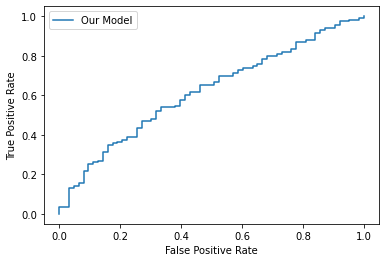

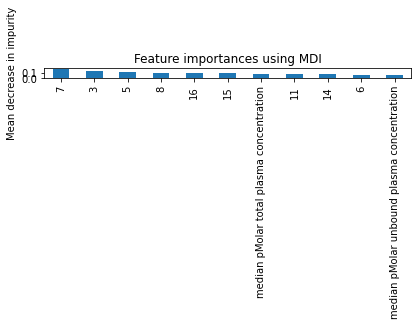

1
Best Threshold=0.607657
[[48 21]
 [55 54]]
              precision    recall  f1-score   support

           0       0.47      0.70      0.56        69
           1       0.72      0.50      0.59       109

    accuracy                           0.57       178
   macro avg       0.59      0.60      0.57       178
weighted avg       0.62      0.57      0.58       178

balanced_accuracy_score  0.5955325089748704
matthews_corrcoef  0.18852533871869934
Sensitivity 0.6956521739130435
Specificity 0.4954128440366973
f1 0.5869565217391305
LR+ 1.3786561264822135
ppv 0.72
average_precision_score 0.7350401970547611
roc_auc_score 0.640739263395825


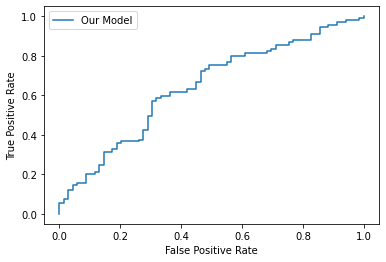

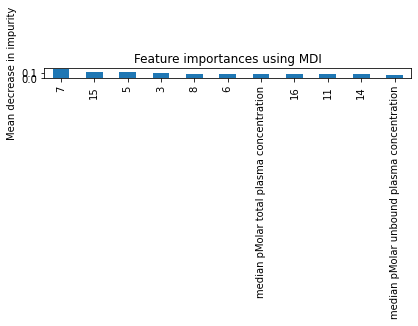

2
Best Threshold=0.551889
[[39 24]
 [45 70]]
              precision    recall  f1-score   support

           0       0.46      0.62      0.53        63
           1       0.74      0.61      0.67       115

    accuracy                           0.61       178
   macro avg       0.60      0.61      0.60       178
weighted avg       0.65      0.61      0.62       178

balanced_accuracy_score  0.6138716356107661
matthews_corrcoef  0.21815299486514786
Sensitivity 0.6190476190476191
Specificity 0.6086956521739131
f1 0.6698564593301435
LR+ 1.5820105820105823
ppv 0.7446808510638298
average_precision_score 0.7975819736623113
roc_auc_score 0.6884748102139406


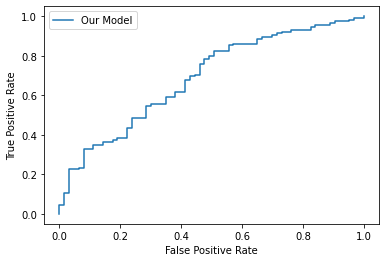

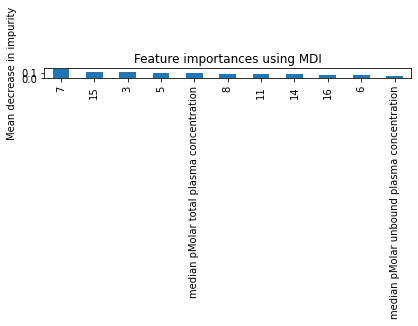

3
Best Threshold=0.331573
[[26 35]
 [30 86]]
              precision    recall  f1-score   support

           0       0.46      0.43      0.44        61
           1       0.71      0.74      0.73       116

    accuracy                           0.63       177
   macro avg       0.59      0.58      0.59       177
weighted avg       0.63      0.63      0.63       177

balanced_accuracy_score  0.5838044092707745
matthews_corrcoef  0.17127898404757397
Sensitivity 0.4262295081967213
Specificity 0.7413793103448276
f1 0.7257383966244725
LR+ 1.6480874316939893
ppv 0.7107438016528925
average_precision_score 0.713712653848876
roc_auc_score 0.5812605992085924


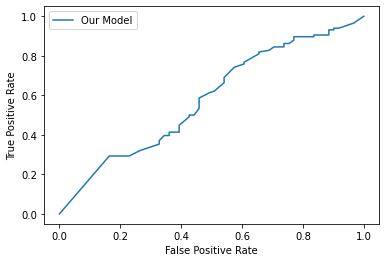

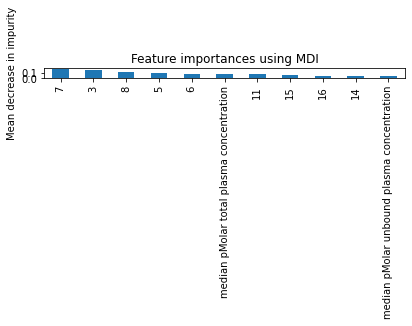

4
Best Threshold=0.633661
[[52 20]
 [56 49]]
              precision    recall  f1-score   support

           0       0.48      0.72      0.58        72
           1       0.71      0.47      0.56       105

    accuracy                           0.57       177
   macro avg       0.60      0.59      0.57       177
weighted avg       0.62      0.57      0.57       177

balanced_accuracy_score  0.5944444444444444
matthews_corrcoef  0.19025272529223763
Sensitivity 0.7222222222222222
Specificity 0.4666666666666667
f1 0.5632183908045977
LR+ 1.3541666666666667
ppv 0.7101449275362319
average_precision_score 0.732623003130207
roc_auc_score 0.6579365079365079


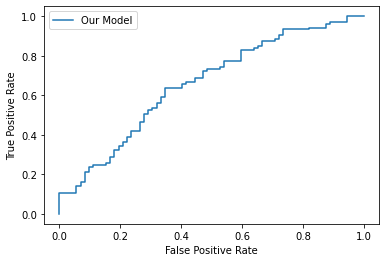

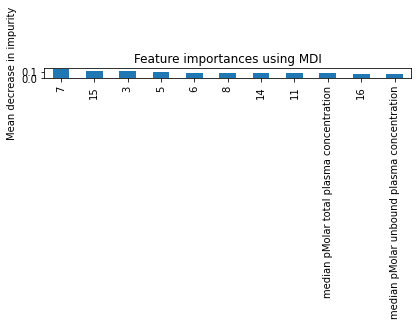

 64%|████████████████████████████                | 7/11 [06:35<03:52, 58.07s/it]

49
0
Best Threshold=0.534514
[[33 31]
 [41 73]]
              precision    recall  f1-score   support

           0       0.45      0.52      0.48        64
           1       0.70      0.64      0.67       114

    accuracy                           0.60       178
   macro avg       0.57      0.58      0.57       178
weighted avg       0.61      0.60      0.60       178

balanced_accuracy_score  0.5779879385964912
matthews_corrcoef  0.15186836586881752
Sensitivity 0.515625
Specificity 0.6403508771929824
f1 0.6697247706422018
LR+ 1.4336890243902438
ppv 0.7019230769230769
average_precision_score 0.7156097761592063
roc_auc_score 0.6055372807017544


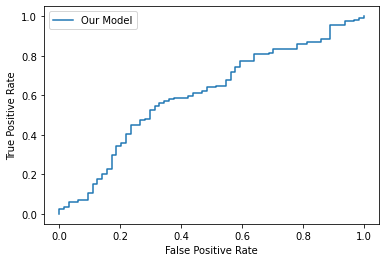

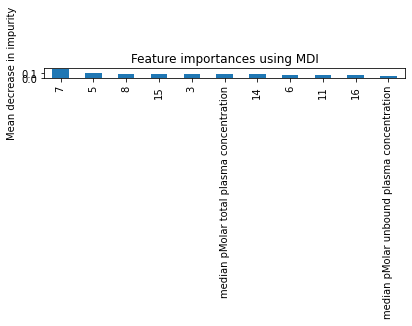

1
Best Threshold=0.604458
[[31 39]
 [29 79]]
              precision    recall  f1-score   support

           0       0.52      0.44      0.48        70
           1       0.67      0.73      0.70       108

    accuracy                           0.62       178
   macro avg       0.59      0.59      0.59       178
weighted avg       0.61      0.62      0.61       178

balanced_accuracy_score  0.5871693121693122
matthews_corrcoef  0.18015150046115333
Sensitivity 0.44285714285714284
Specificity 0.7314814814814815
f1 0.6991150442477877
LR+ 1.6492610837438424
ppv 0.6694915254237288
average_precision_score 0.7324873900468347
roc_auc_score 0.6355820105820107


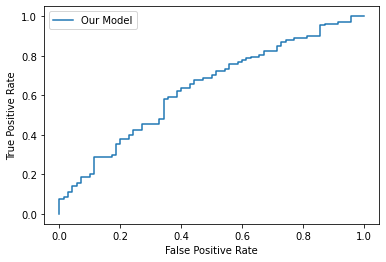

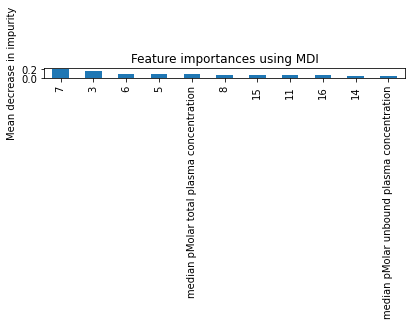

2
Best Threshold=0.573922
[[35 40]
 [25 78]]
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        75
           1       0.66      0.76      0.71       103

    accuracy                           0.63       178
   macro avg       0.62      0.61      0.61       178
weighted avg       0.63      0.63      0.63       178

balanced_accuracy_score  0.6119741100323625
matthews_corrcoef  0.23392693482159038
Sensitivity 0.4666666666666667
Specificity 0.7572815533980582
f1 0.7058823529411764
LR+ 1.9226666666666667
ppv 0.6610169491525424
average_precision_score 0.7042288247989437
roc_auc_score 0.6481553398058252


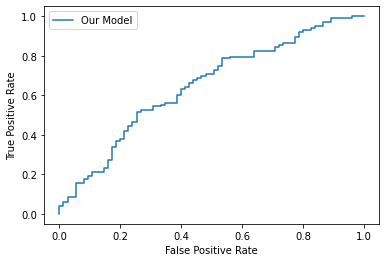

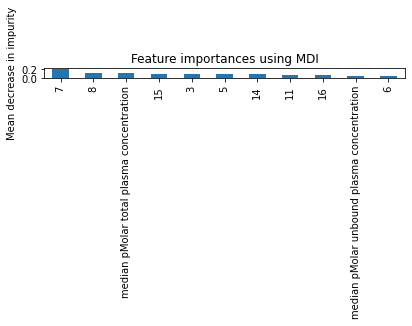

3
Best Threshold=0.553160
[[30 23]
 [26 98]]
              precision    recall  f1-score   support

           0       0.54      0.57      0.55        53
           1       0.81      0.79      0.80       124

    accuracy                           0.72       177
   macro avg       0.67      0.68      0.68       177
weighted avg       0.73      0.72      0.73       177

balanced_accuracy_score  0.678180158247109
matthews_corrcoef  0.35095498430409755
Sensitivity 0.5660377358490566
Specificity 0.7903225806451613
f1 0.7999999999999999
LR+ 2.6995645863570386
ppv 0.8099173553719008
average_precision_score 0.8239632036517204
roc_auc_score 0.7125684723067558


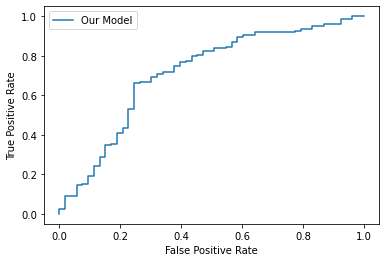

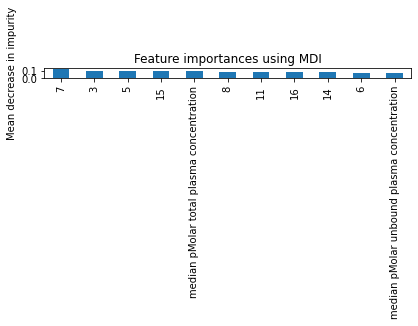

4
Best Threshold=0.600265
[[46 20]
 [50 61]]
              precision    recall  f1-score   support

           0       0.48      0.70      0.57        66
           1       0.75      0.55      0.64       111

    accuracy                           0.60       177
   macro avg       0.62      0.62      0.60       177
weighted avg       0.65      0.60      0.61       177

balanced_accuracy_score  0.6232596232596233
matthews_corrcoef  0.23927986932871512
Sensitivity 0.696969696969697
Specificity 0.5495495495495496
f1 0.6354166666666667
LR+ 1.5472727272727276
ppv 0.7530864197530864
average_precision_score 0.7760931950480638
roc_auc_score 0.6752661752661753


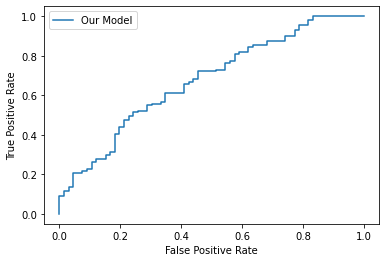

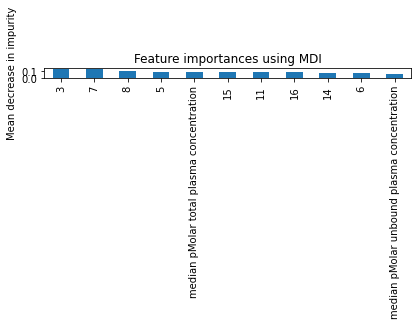

 73%|████████████████████████████████            | 8/11 [07:30<02:51, 57.27s/it]

50
0
Best Threshold=0.620379
[[31 30]
 [35 82]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49        61
           1       0.73      0.70      0.72       117

    accuracy                           0.63       178
   macro avg       0.60      0.60      0.60       178
weighted avg       0.64      0.63      0.64       178

balanced_accuracy_score  0.6045257110830882
matthews_corrcoef  0.20541397919966536
Sensitivity 0.5081967213114754
Specificity 0.7008547008547008
f1 0.7161572052401747
LR+ 1.6988290398126462
ppv 0.7321428571428571
average_precision_score 0.794700957406774
roc_auc_score 0.6533557517164075


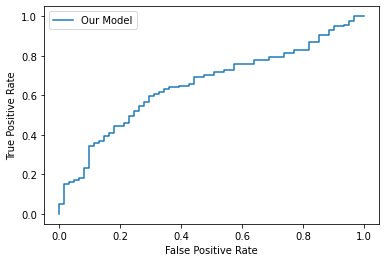

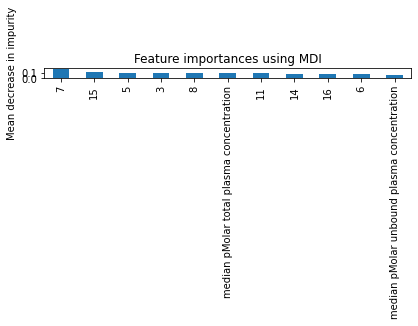

1
Best Threshold=0.588235
[[30 35]
 [53 60]]
              precision    recall  f1-score   support

           0       0.36      0.46      0.41        65
           1       0.63      0.53      0.58       113

    accuracy                           0.51       178
   macro avg       0.50      0.50      0.49       178
weighted avg       0.53      0.51      0.51       178

balanced_accuracy_score  0.4962559564329476
matthews_corrcoef  -0.007227131228415697
Sensitivity 0.46153846153846156
Specificity 0.5309734513274337
f1 0.5769230769230769
LR+ 0.984034833091437
ppv 0.631578947368421
average_precision_score 0.6581967183442502
roc_auc_score 0.5270932607215792


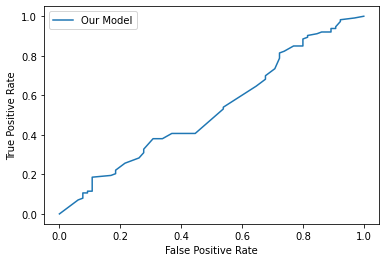

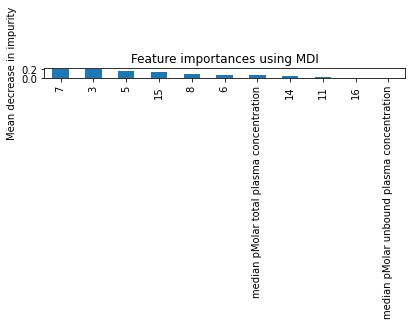

2
Best Threshold=0.777778
[[56 19]
 [62 41]]
              precision    recall  f1-score   support

           0       0.47      0.75      0.58        75
           1       0.68      0.40      0.50       103

    accuracy                           0.54       178
   macro avg       0.58      0.57      0.54       178
weighted avg       0.60      0.54      0.54       178

balanced_accuracy_score  0.5723624595469256
matthews_corrcoef  0.15117359140493528
Sensitivity 0.7466666666666667
Specificity 0.39805825242718446
f1 0.5030674846625767
LR+ 1.2404301075268818
ppv 0.6833333333333333
average_precision_score 0.6623855996958652
roc_auc_score 0.623948220064725


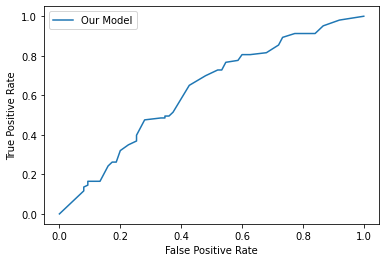

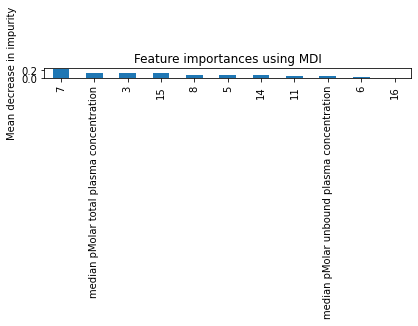

3
Best Threshold=0.555439
[[43 28]
 [39 67]]
              precision    recall  f1-score   support

           0       0.52      0.61      0.56        71
           1       0.71      0.63      0.67       106

    accuracy                           0.62       177
   macro avg       0.61      0.62      0.61       177
weighted avg       0.63      0.62      0.62       177

balanced_accuracy_score  0.6188546372575072
matthews_corrcoef  0.23364662105648312
Sensitivity 0.6056338028169014
Specificity 0.6320754716981132
f1 0.6666666666666666
LR+ 1.6460816179126037
ppv 0.7052631578947368
average_precision_score 0.7459090559629724
roc_auc_score 0.6708743024182832


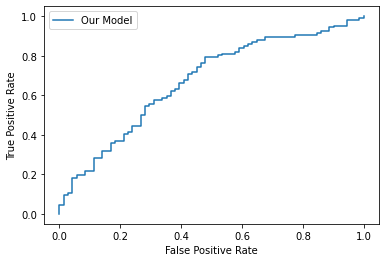

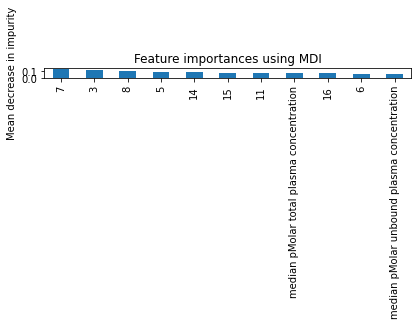

4
Best Threshold=0.552676
[[39 17]
 [49 72]]
              precision    recall  f1-score   support

           0       0.44      0.70      0.54        56
           1       0.81      0.60      0.69       121

    accuracy                           0.63       177
   macro avg       0.63      0.65      0.61       177
weighted avg       0.69      0.63      0.64       177

balanced_accuracy_score  0.6457349468713105
matthews_corrcoef  0.27110907916676125
Sensitivity 0.6964285714285714
Specificity 0.5950413223140496
f1 0.6857142857142857
LR+ 1.7197521865889214
ppv 0.8089887640449438
average_precision_score 0.7883558913432355
roc_auc_score 0.6894923258559623


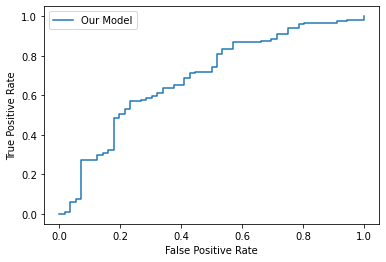

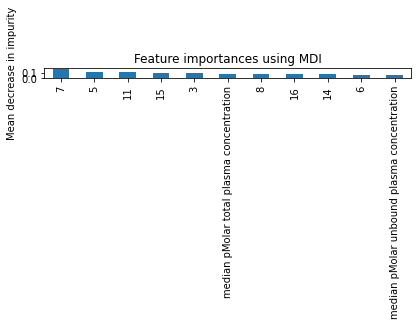

 82%|████████████████████████████████████        | 9/11 [08:23<01:51, 55.95s/it]

51
0
Best Threshold=0.502179
[[31 37]
 [27 83]]
              precision    recall  f1-score   support

           0       0.53      0.46      0.49        68
           1       0.69      0.75      0.72       110

    accuracy                           0.64       178
   macro avg       0.61      0.61      0.61       178
weighted avg       0.63      0.64      0.63       178

balanced_accuracy_score  0.6052139037433155
matthews_corrcoef  0.21814703236024108
Sensitivity 0.45588235294117646
Specificity 0.7545454545454545
f1 0.7217391304347825
LR+ 1.8572984749455335
ppv 0.6916666666666667
average_precision_score 0.7034200977152764
roc_auc_score 0.6057486631016042


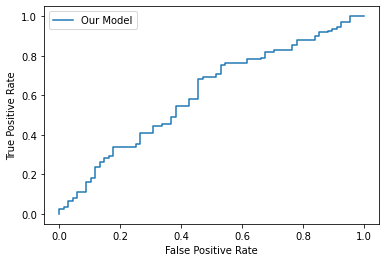

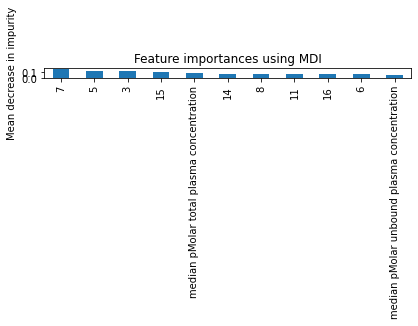

1
Best Threshold=0.499293
[[37 31]
 [30 80]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.55        68
           1       0.72      0.73      0.72       110

    accuracy                           0.66       178
   macro avg       0.64      0.64      0.64       178
weighted avg       0.66      0.66      0.66       178

balanced_accuracy_score  0.6356951871657754
matthews_corrcoef  0.2721738196924865
Sensitivity 0.5441176470588235
Specificity 0.7272727272727273
f1 0.7239819004524887
LR+ 1.9950980392156863
ppv 0.7207207207207207
average_precision_score 0.7797159525671702
roc_auc_score 0.6947860962566846


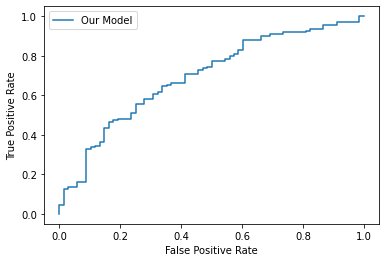

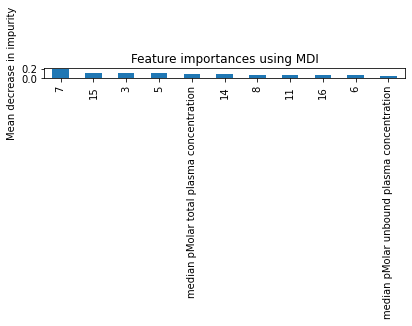

2
Best Threshold=0.602824
[[53 19]
 [53 53]]
              precision    recall  f1-score   support

           0       0.50      0.74      0.60        72
           1       0.74      0.50      0.60       106

    accuracy                           0.60       178
   macro avg       0.62      0.62      0.60       178
weighted avg       0.64      0.60      0.60       178

balanced_accuracy_score  0.6180555555555556
matthews_corrcoef  0.2361111111111111
Sensitivity 0.7361111111111112
Specificity 0.5
f1 0.5955056179775281
LR+ 1.4722222222222223
ppv 0.7361111111111112
average_precision_score 0.7578798053154981
roc_auc_score 0.6840932914046122


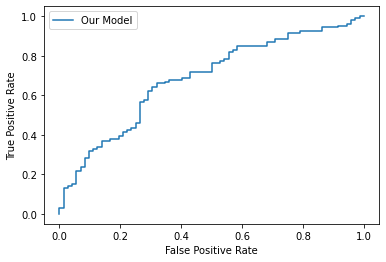

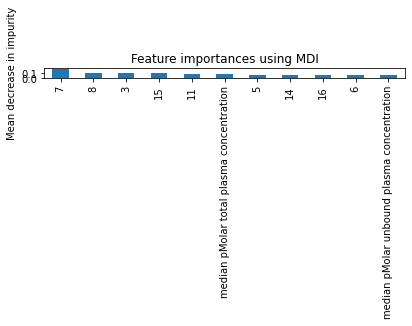

3
Best Threshold=0.472890
[[24 27]
 [31 95]]
              precision    recall  f1-score   support

           0       0.44      0.47      0.45        51
           1       0.78      0.75      0.77       126

    accuracy                           0.67       177
   macro avg       0.61      0.61      0.61       177
weighted avg       0.68      0.67      0.68       177

balanced_accuracy_score  0.6122782446311859
matthews_corrcoef  0.2197529482670753
Sensitivity 0.47058823529411764
Specificity 0.753968253968254
f1 0.7661290322580644
LR+ 1.9127134724857684
ppv 0.7786885245901639
average_precision_score 0.8357891178586773
roc_auc_score 0.6803610333022098


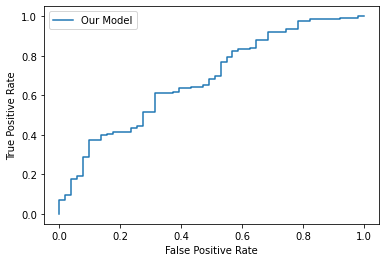

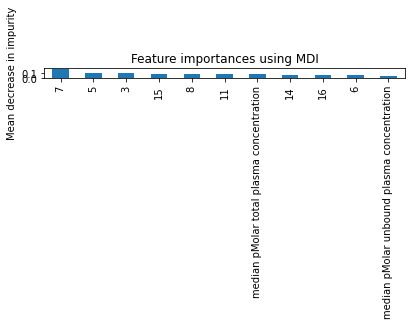

4
Best Threshold=0.552358
[[42 27]
 [39 69]]
              precision    recall  f1-score   support

           0       0.52      0.61      0.56        69
           1       0.72      0.64      0.68       108

    accuracy                           0.63       177
   macro avg       0.62      0.62      0.62       177
weighted avg       0.64      0.63      0.63       177

balanced_accuracy_score  0.623792270531401
matthews_corrcoef  0.24237165111881037
Sensitivity 0.6086956521739131
Specificity 0.6388888888888888
f1 0.676470588235294
LR+ 1.68561872909699
ppv 0.71875
average_precision_score 0.760234540527669
roc_auc_score 0.6731078904991948


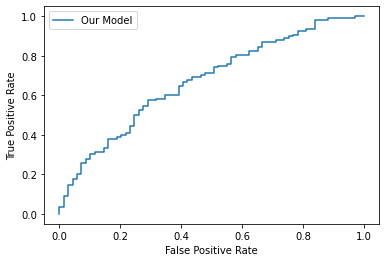

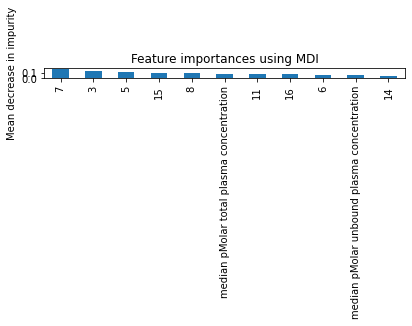

 91%|███████████████████████████████████████    | 10/11 [09:28<00:58, 58.73s/it]

52
0
Best Threshold=0.553364
[[40 22]
 [48 68]]
              precision    recall  f1-score   support

           0       0.45      0.65      0.53        62
           1       0.76      0.59      0.66       116

    accuracy                           0.61       178
   macro avg       0.61      0.62      0.60       178
weighted avg       0.65      0.61      0.62       178

balanced_accuracy_score  0.6156840934371524
matthews_corrcoef  0.22047832040255275
Sensitivity 0.6451612903225806
Specificity 0.5862068965517241
f1 0.6601941747572815
LR+ 1.5591397849462363
ppv 0.7555555555555555
average_precision_score 0.7565780638996376
roc_auc_score 0.636123470522803


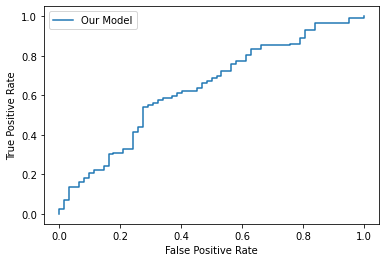

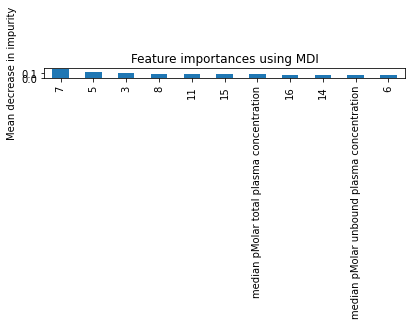

1
Best Threshold=0.508851
[[31 28]
 [35 84]]
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        59
           1       0.75      0.71      0.73       119

    accuracy                           0.65       178
   macro avg       0.61      0.62      0.61       178
weighted avg       0.66      0.65      0.65       178

balanced_accuracy_score  0.6156530408773679
matthews_corrcoef  0.22542680682207025
Sensitivity 0.5254237288135594
Specificity 0.7058823529411765
f1 0.7272727272727272
LR+ 1.7864406779661022
ppv 0.75
average_precision_score 0.7740928412263528
roc_auc_score 0.6665717134311352


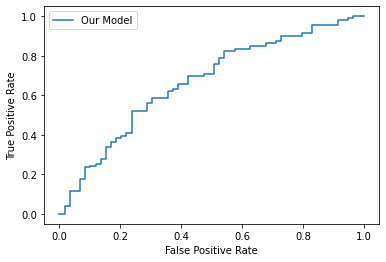

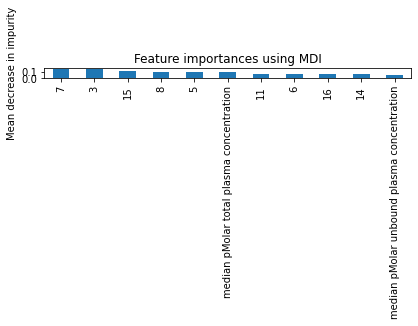

2
Best Threshold=0.550299
[[36 32]
 [39 71]]
              precision    recall  f1-score   support

           0       0.48      0.53      0.50        68
           1       0.69      0.65      0.67       110

    accuracy                           0.60       178
   macro avg       0.58      0.59      0.59       178
weighted avg       0.61      0.60      0.60       178

balanced_accuracy_score  0.5874331550802139
matthews_corrcoef  0.17207100727783953
Sensitivity 0.5294117647058824
Specificity 0.6454545454545455
f1 0.6666666666666666
LR+ 1.4932126696832582
ppv 0.6893203883495146
average_precision_score 0.6763100470628837
roc_auc_score 0.6036096256684493


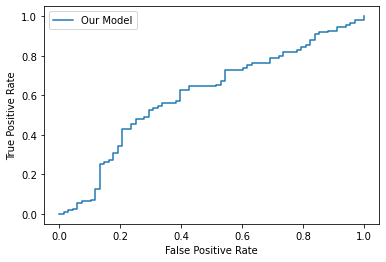

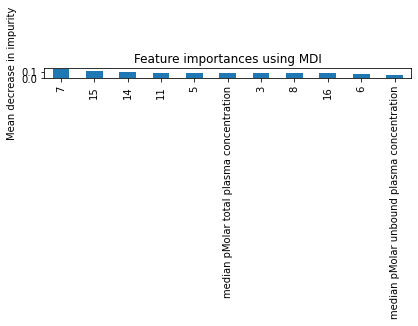

3
Best Threshold=0.617770
[[44 30]
 [31 72]]
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        74
           1       0.71      0.70      0.70       103

    accuracy                           0.66       177
   macro avg       0.65      0.65      0.65       177
weighted avg       0.66      0.66      0.66       177

balanced_accuracy_score  0.6468118604040934
matthews_corrcoef  0.2930858776127606
Sensitivity 0.5945945945945946
Specificity 0.6990291262135923
f1 0.702439024390244
LR+ 1.9755884917175242
ppv 0.7058823529411765
average_precision_score 0.7442427600442356
roc_auc_score 0.6830228286538965


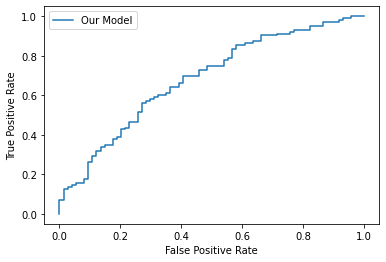

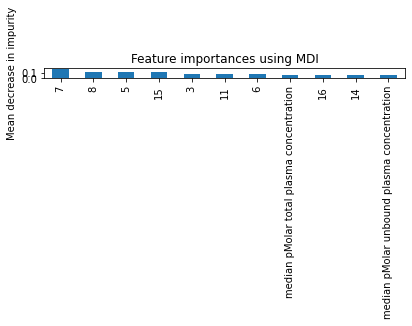

4
Best Threshold=0.436676
[[23 42]
 [18 94]]
              precision    recall  f1-score   support

           0       0.56      0.35      0.43        65
           1       0.69      0.84      0.76       112

    accuracy                           0.66       177
   macro avg       0.63      0.60      0.60       177
weighted avg       0.64      0.66      0.64       177

balanced_accuracy_score  0.5965659340659341
matthews_corrcoef  0.2206775981612948
Sensitivity 0.35384615384615387
Specificity 0.8392857142857143
f1 0.7580645161290324
LR+ 2.201709401709402
ppv 0.6911764705882353
average_precision_score 0.8280634643638632
roc_auc_score 0.7078296703296703


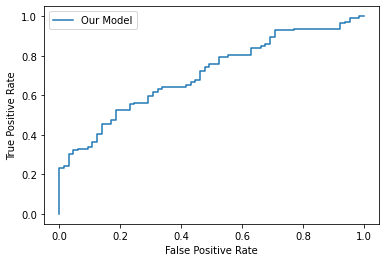

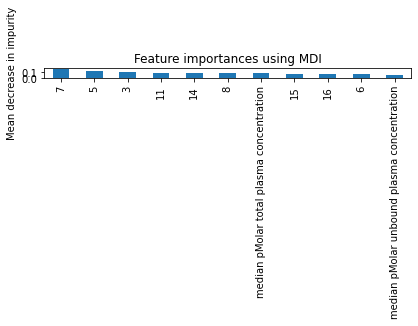

100%|███████████████████████████████████████████| 11/11 [10:19<00:00, 56.35s/it]


In [85]:
#Models to predict DILI with Liv preds only
list_of_lists=[]
baseline=0.50
for i in tqdm(range(42,53)):
    
    print(i)
    outercv = KFold(n_splits=5, random_state=i, shuffle=True) 
    for split, (train_index, test_index) in enumerate(outercv.split(X_ncv)):
            
        print(split)
        X_train= X_ncv[train_index]
        y_train= y_ncv[train_index]

        X_test= X_ncv[test_index]
        y_test= y_ncv[test_index]

        inner_cv = KFold(n_splits=4, random_state=i, shuffle=True) 

        #Hyperparameter Optimisation
        rf = RandomForestClassifier(n_jobs=-1, random_state=i)
        # Instantiate the RandomHalving search model
        param_dist_grid = { 
                'max_depth': randint(5, 20),
                'max_features': randint(30, 50),
                'min_samples_leaf': randint(5, 15),
                'min_samples_split': randint(5, 15),
                'n_estimators':[200, 300, 400, 500, 600],
                'bootstrap': [True, False],
                'oob_score': [False],
                'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'n_jobs': [40],
                'class_weight' : [None, 'balanced_subsample', 'balanced']}

        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                    factor=2, random_state=i, n_jobs=40, verbose=0, cv = inner_cv)
        rsh.fit(X_train, y_train)
        classifier = rsh.best_estimator_
        classifier.fit(X_train, y_train)

        #Threshold Balancing
        cross_val_prob_cp = cross_val_predict(classifier, X_train, y_train, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_train, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))


        y_proba = classifier.predict_proba(X_test)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        print(classification_report(y_test, y_pred))
        ba =balanced_accuracy_score(y_test, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(y_test, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

        f1= metrics.f1_score(y_test, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_test, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_test, y_proba)
        print("average_precision_score", average_precision_score)

        auc= roc_auc_score(y_test, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_proba)
        # plot the roc curve for the model
        plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        if (auc>baseline):
            # save
            print("saving model")
            baseline=auc
            pickle.dump(classifier, open("dili_NCV_bestLivdataonly_model.sav",  'wb'))


        importances = classifier.feature_importances_
        forest_importances = pd.Series(importances, index=test_feature_list)

        fig, ax = plt.subplots()
        forest_importances.sort_values(ascending=False)[:20].plot.bar()
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

        plt.show()

        metrics_row=["NCV",  "DILI", i, split, ba, mcc, Sensitivity, Specificity, auc, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(metrics_row)


In [86]:
results = pd.DataFrame(list_of_lists, columns=["NCV",  "DILI", "i", "split", "ba", "mcc", "Sensitivity"
                                                       , "Specificity", "auc", "f1", "pos_LR", "ppv", 
                                                       "average_precision_score"])
results["Features"] = "Liv data only"
results.to_csv("NCV_models_Livdataonly.csv", index=False)
results

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0   NCV  DILI  42      0  0.602451  0.209576     0.461538     0.743363   
1   NCV  DILI  42      1  0.574186  0.165320     0.313725     0.834646   
2   NCV  DILI  42      2  0.640912  0.282769     0.538462     0.743363   
3   NCV  DILI  42      3  0.641207  0.288014     0.756098     0.526316   
4   NCV  DILI  42      4  0.567102  0.129636     0.553846     0.580357   
5   NCV  DILI  43      0  0.635978  0.268270     0.517857     0.754098   
6   NCV  DILI  43      1  0.591129  0.181532     0.604938     0.577320   
7   NCV  DILI  43      2  0.625878  0.238745     0.571429     0.680328   
8   NCV  DILI  43      3  0.661654  0.311396     0.761905     0.561404   
9   NCV  DILI  43      4  0.613889  0.225376     0.694444     0.533333   
10  NCV  DILI  44      0  0.609856  0.236844     0.417910     0.801802   
11  NCV  DILI  44      1  0.559896  0.118651     0.453125     0.666667   
12  NCV  DILI  44      2  0.636480  0.272174     0.552239     0.720721   
13  NCV  DILI  44      3  0.687627  0.384559     0.551724     0.823529   
14  NCV  DILI  44      4  0.610714  0.218556     0.583333     0.638095   
15  NCV  DILI  45      0  0.682292  0.382601     0.531250     0.833333   
16  NCV  DILI  45      1  0.567893  0.134554     0.571429     0.564356   
17  NCV  DILI  45      2  0.597869  0.186957     0.526316     0.669421   
18  NCV  DILI  45      3  0.582080  0.159352     0.523810     0.640351   
19  NCV  DILI  45      4  0.618385  0.274582     0.373134     0.863636   
20  NCV  DILI  46      0  0.558983  0.118342     0.439394     0.678571   
21  NCV  DILI  46      1  0.584605  0.162975     0.516667     0.652542   
22  NCV  DILI  46      2  0.718993  0.430660     0.676923     0.761062   
23  NCV  DILI  46      3  0.620192  0.232383     0.615385     0.625000   
24  NCV  DILI  46      4  0.585516  0.170671     0.513889     0.657143   
25  NCV  DILI  47      0  0.577406  0.153263     0.691176     0.463636   
26  NCV  DILI  47      1  0.619828  0.225003     0.689655     0.550000   
27  NCV  DILI  47      2  0.640909  0.292156     0.500000     0.781818   
28  NCV  DILI  47      3  0.677109  0.345250     0.634921     0.719298   
29  NCV  DILI  47      4  0.597927  0.199796     0.478873     0.716981   
30  NCV  DILI  48      0  0.557971  0.126647     0.333333     0.782609   
31  NCV  DILI  48      1  0.595533  0.188525     0.695652     0.495413   
32  NCV  DILI  48      2  0.613872  0.218153     0.619048     0.608696   
33  NCV  DILI  48      3  0.583804  0.171279     0.426230     0.741379   
34  NCV  DILI  48      4  0.594444  0.190253     0.722222     0.466667   
35  NCV  DILI  49      0  0.577988  0.151868     0.515625     0.640351   
36  NCV  DILI  49      1  0.587169  0.180152     0.442857     0.731481   
37  NCV  DILI  49      2  0.611974  0.233927     0.466667     0.757282   
38  NCV  DILI  49      3  0.678180  0.350955     0.566038     0.790323   
39  NCV  DILI  49      4  0.623260  0.239280     0.696970     0.549550   
40  NCV  DILI  50      0  0.604526  0.205414     0.508197     0.700855   
41  NCV  DILI  50      1  0.496256 -0.007227     0.461538     0.530973   
42  NCV  DILI  50      2  0.572362  0.151174     0.746667     0.398058   
43  NCV  DILI  50      3  0.618855  0.233647     0.605634     0.632075   
44  NCV  DILI  50      4  0.645735  0.271109     0.696429     0.595041   
45  NCV  DILI  51      0  0.605214  0.218147     0.455882     0.754545   
46  NCV  DILI  51      1  0.635695  0.272174     0.544118     0.727273   
47  NCV  DILI  51      2  0.618056  0.236111     0.736111     0.500000   
48  NCV  DILI  51      3  0.612278  0.219753     0.470588     0.753968   
49  NCV  DILI  51      4  0.623792  0.242372     0.608696     0.638889   
50  NCV  DILI  52      0  0.615684  0.220478     0.645161     0.586207   
51  NCV  DILI  52      1  0.615653  0.225427     0.525424     0.705882   
52  NCV  DILI  52      2  0.587433  0.172071     0.529412     0.645455   
53  NCV 

In [87]:
results.describe()

i      split         ba        mcc  Sensitivity  Specificity  \
count  55.000000  55.000000  55.000000  55.000000    55.000000    55.000000   
mean   47.000000   2.000000   0.611056   0.222280     0.556042     0.666069   
std     3.191424   1.427248   0.037974   0.075488     0.110643     0.108812   
min    42.000000   0.000000   0.496256  -0.007227     0.313725     0.398058   
25%    44.000000   1.000000   0.586343   0.171675     0.474731     0.583282   
50%    47.000000   2.000000   0.611974   0.220478     0.544118     0.669421   
75%    50.000000   3.000000   0.630787   0.269690     0.626984     0.748666   
max    52.000000   4.000000   0.718993   0.430660     0.761905     0.863636   

             auc         f1     pos_LR        ppv  average_precision_score  
count  55.000000  55.000000  55.000000  55.000000                55.000000  
mean    0.658358   0.687788   1.774509   0.721393                 0.756529  
std     0.044494   0.067285   0.458515   0.044912                 0.048241  
min     0.527093   0.503067   0.984035   0.631579                 0.658197  
25%     0.631712   0.660241   1.487544   0.691333                 0.721707  
50%     0.657937   0.687500   1.648087   0.716667                 0.759626  
75%     0.689358   0.728009   1.949128   0.750887                 0.795969  
max     0.737323   0.806584   3.187500   0.810127                 0.869965

In [88]:
loaded_rf = pickle.load(open("dili_NCV_bestLivdataonly_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features=48,
                       min_samples_leaf=14, min_samples_split=12,
                       n_estimators=600, n_jobs=40, random_state=42)

Best Threshold=0.666421
[[ 40  27]
 [ 53 103]]
              precision    recall  f1-score   support

           0       0.43      0.60      0.50        67
           1       0.79      0.66      0.72       156

    accuracy                           0.64       223
   macro avg       0.61      0.63      0.61       223
weighted avg       0.68      0.64      0.65       223

balanced_accuracy_score  0.6286356678147722
matthews_corrcoef  0.23920924000798574
Sensitivity 0.5970149253731343
Specificity 0.6602564102564102
f1 0.7202797202797202
LR+ 1.7572514784567725
ppv 0.7923076923076923
average_precision_score 0.8115573668100201
roc_auc_score 0.6746077305778798


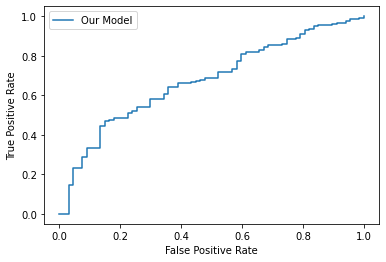

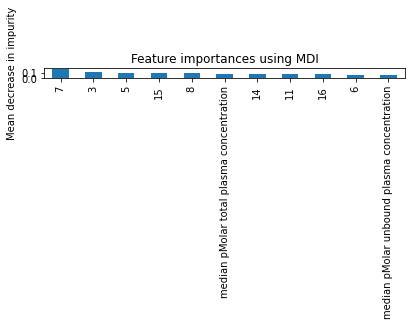

In [89]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)

average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
print("average_precision_score", average_precision_score)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [90]:
#Final model released on all data
loaded_rf = pickle.load(open("dili_NCV_bestLivdataonly_model.sav", 'rb'))
params = loaded_rf.get_params()
    
final_classifier= RandomForestClassifier(**params)
final_classifier.fit(X_dili, y_dili)
pickle.dump(final_classifier, open("final_dili_bestLivdataonly_model.sav",  'wb'))

In [91]:
#Morgan and MACCS model

In [92]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[selected_mfp_Features+selected_maccs_Features]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [93]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[selected_mfp_Features+selected_maccs_Features]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [94]:
test_dili_all = pd.concat([test_data_heldouttest, test_data_ncv]).reset_index(drop=True)
test_dili_all

smiles_r  TOXICITY  \
0        C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1         1   
1                                    CC1OC1[P](=O)(=O)O         1   
2                    CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1         1   
3     COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...         1   
4                    CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21         1   
...                                                 ...       ...   
1106         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1         0   
1107  CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...         0   
1108                         CCC(c1cccc(O)c1)C(C)CN(C)C         0   
1109                                     CC(N)Cc1ccccc1         0   
1110                              C[N+](C)(C)CC(=O)[O-]         0   

      Source_rank                              Source  Data  \
0               1         DILIst Classification  Oral  DILI   
1               1         DILIst Classification  Oral  DILI   
2               1         DILIst Classification  Oral  DILI   
3               1         DILIst Classification  Oral  DILI   
4               1         DILIst Classification  Oral  DILI   
...           ...                                 ...   ...   
1106            1             DILIst Classification    DILI   
1107            1  DILIst Classification  Intravenous  DILI   
1108            1         DILIst Classification  Oral  DILI   
1109            1         DILIst Classification  Oral  DILI   
1110            1         DILIst Classification  Oral  DILI   

                         InChIKey      InChIKey14  \
0     AAKJLRGGTJKAMG-UHFFFAOYSA-N  AAKJLRGGTJKAMG   
1     UJNUDOLLRRCQDH-UHFFFAOYSA-N  UJNUDOLLRRCQDH   
2     UNAANXDKBXWMLN-UHFFFAOYSA-N  UNAANXDKBXWMLN   
3     UXOWGYHJODZGMF-UHFFFAOYSA-N  UXOWGYHJODZGMF   
4     VGKDLMBJGBXTGI-UHFFFAOYSA-N  VGKDLMBJGBXTGI   
...                           ...             ...   
1106  KYRVNWMVYQXFEU-UHFFFAOYSA-N  KYRVNWMVYQXFEU   
1107  KXNPVXPOPUZYGB-UHFFFAOYSA-N  KXNPVXPOPUZYGB   
1108  KWTWDQCKEHXFFR-UHFFFAOYSA-N  KWTWDQCKEHXFFR   
1109  KWTSXDURSIMDCE-UHFFFAOYSA-N  KWTSXDURSIMDCE   
1110  KWIUHFFTVRNATP-UHFFFAOYSA-N  KWIUHFFTVRNATP   

                                    protonated_smiles_r        ABC      ABCGG  \
0        C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1  21.798990  16.570489   
1                                    CC1OC1[P](=O)(=O)O   6.140950   6.624294   
2                CC(C)CC([NH+](C)C)C1(c2ccc(Cl)cc2)CCC1  14.525425  13.493219   
3     COCCCOc1cc(CC(CC([NH3+])C(O)CC(C(=O)NCC(C)(C)C...  28.615700  24.127835   
4               C[NH2+]C1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21  15.572928  12.623559   
...                                                 ...        ...        ...   
1106         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1  16.360915  13.772089   
1107  CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...  26.942267  21.807837   
1108                     CCC(c1cccc(O)c1)C(C)C[NH+](C)C  11.670387  10.989759   
1109                                CC([NH3+])Cc1ccccc1   7.289847   6.783462   
1110                              C[N+](C)(C)CC(=O)[O-]   5.645283   5.873928   

      ...  median pMolar total plasma concentration         3         5  \
0     ...                                  5.992269  0.557014  0.456931   
1     ...                                  3.857602  0.350417  0.254330   
2     ...                                  6.538902  0.322297  0.636731   
3     ...                                  6.467869  0.595764  0.176782   
4     ...                                  6.091766  0.708626  0.679524   
...   ...                                       ...       ...       ...   
1106  ...                                  5.241611  0.732836  0.500677   
1107  ...                                  5.653729  0.711124  0.155374   
1108  ...                                  6.116869  0.185916  0.241239   
1109  ...                                  6.057551  0.301023  0.163379   
1110  ...                 

In [95]:
y_dili = np.array(test_dili_all['TOXICITY'])
test_features= test_dili_all[selected_mfp_Features+selected_maccs_Features]

test_feature_list = list(test_features.columns)
X_dili = np.array(test_features)

In [96]:
test_feature_list = list(test_feature_list)
test_feature_list

['Mfp1',
 'Mfp13',
 'Mfp80',
 'Mfp114',
 'Mfp147',
 'Mfp216',
 'Mfp222',
 'Mfp227',
 'Mfp231',
 'Mfp249',
 'Mfp283',
 'Mfp294',
 'Mfp310',
 'Mfp314',
 'Mfp322',
 'Mfp350',
 'Mfp378',
 'Mfp389',
 'Mfp392',
 'Mfp397',
 'Mfp486',
 'Mfp519',
 'Mfp561',
 'Mfp591',
 'Mfp650',
 'Mfp656',
 'Mfp675',
 'Mfp694',
 'Mfp695',
 'Mfp715',
 'Mfp718',
 'Mfp725',
 'Mfp739',
 'Mfp745',
 'Mfp794',
 'Mfp807',
 'Mfp816',
 'Mfp841',
 'Mfp875',
 'Mfp926',
 'Mfp935',
 'Mfp1017',
 'Mfp1019',
 'Mfp1028',
 'Mfp1039',
 'Mfp1057',
 'Mfp1060',
 'Mfp1088',
 'Mfp1114',
 'Mfp1143',
 'Mfp1152',
 'Mfp1162',
 'Mfp1171',
 'Mfp1199',
 'Mfp1226',
 'Mfp1257',
 'Mfp1274',
 'Mfp1292',
 'Mfp1309',
 'Mfp1325',
 'Mfp1357',
 'Mfp1366',
 'Mfp1380',
 'Mfp1385',
 'Mfp1386',
 'Mfp1391',
 'Mfp1444',
 'Mfp1452',
 'Mfp1476',
 'Mfp1536',
 'Mfp1564',
 'Mfp1602',
 'Mfp1607',
 'Mfp1683',
 'Mfp1690',
 'Mfp1722',
 'Mfp1729',
 'Mfp1738',
 'Mfp1750',
 'Mfp1754',
 'Mfp1855',
 'Mfp1873',
 'Mfp1911',
 'Mfp1917',
 'Mfp1921',
 'Mfp1928',
 'Mfp1970',
 

In [97]:
len(test_feature_list)

189

In [98]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

print((X_dili).shape)
print(len(y_dili)) 

(888, 189)
(223, 189)
888
223
(1111, 189)
1111


  0%|                                                    | 0/11 [00:00<?, ?it/s]

42
0
Best Threshold=0.676326
[[51 14]
 [60 53]]
              precision    recall  f1-score   support

           0       0.46      0.78      0.58        65
           1       0.79      0.47      0.59       113

    accuracy                           0.58       178
   macro avg       0.63      0.63      0.58       178
weighted avg       0.67      0.58      0.59       178

balanced_accuracy_score  0.6268209666439755
matthews_corrcoef  0.2520682022966066
Sensitivity 0.7846153846153846
Specificity 0.4690265486725664
f1 0.5888888888888889
LR+ 1.4776923076923079
ppv 0.7910447761194029
average_precision_score 0.7672062479543675
roc_auc_score 0.6820966643975492


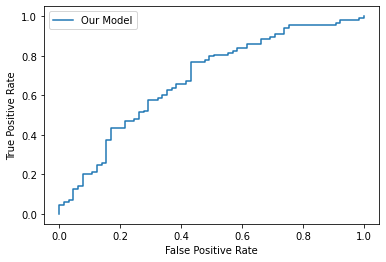

saving model


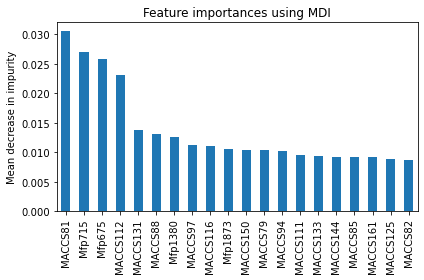

1
Best Threshold=0.568574
[[26 25]
 [39 88]]
              precision    recall  f1-score   support

           0       0.40      0.51      0.45        51
           1       0.78      0.69      0.73       127

    accuracy                           0.64       178
   macro avg       0.59      0.60      0.59       178
weighted avg       0.67      0.64      0.65       178

balanced_accuracy_score  0.6013586536976996
matthews_corrcoef  0.1903627094391605
Sensitivity 0.5098039215686274
Specificity 0.6929133858267716
f1 0.7333333333333333
LR+ 1.6601307189542482
ppv 0.7787610619469026
average_precision_score 0.8333796079407882
roc_auc_score 0.6597190057125212


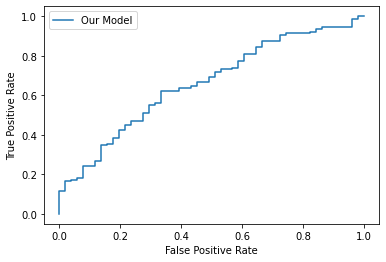

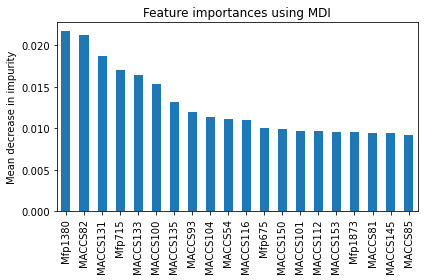

2
Best Threshold=0.606151
[[40 25]
 [38 75]]
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        65
           1       0.75      0.66      0.70       113

    accuracy                           0.65       178
   macro avg       0.63      0.64      0.63       178
weighted avg       0.66      0.65      0.65       178

balanced_accuracy_score  0.6395507147719537
matthews_corrcoef  0.27083866201424783
Sensitivity 0.6153846153846154
Specificity 0.6637168141592921
f1 0.7042253521126761
LR+ 1.8299595141700407
ppv 0.75
average_precision_score 0.7484841263922613
roc_auc_score 0.6793737236215113


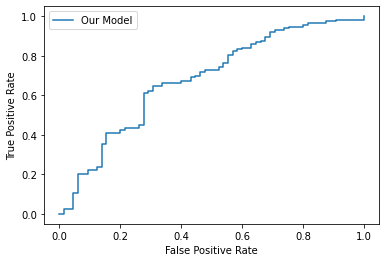

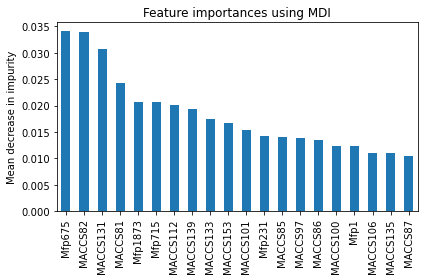

3
Best Threshold=0.661924
[[56 26]
 [42 53]]
              precision    recall  f1-score   support

           0       0.57      0.68      0.62        82
           1       0.67      0.56      0.61        95

    accuracy                           0.62       177
   macro avg       0.62      0.62      0.62       177
weighted avg       0.62      0.62      0.62       177

balanced_accuracy_score  0.620410783055199
matthews_corrcoef  0.24156695318905685
Sensitivity 0.6829268292682927
Specificity 0.5578947368421052
f1 0.6091954022988505
LR+ 1.5447154471544715
ppv 0.6708860759493671
average_precision_score 0.7040529576085759
roc_auc_score 0.7152759948652119


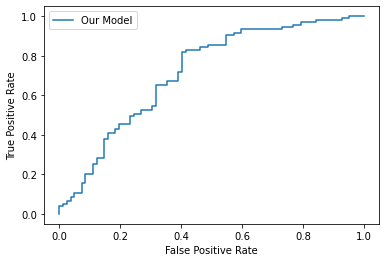

saving model


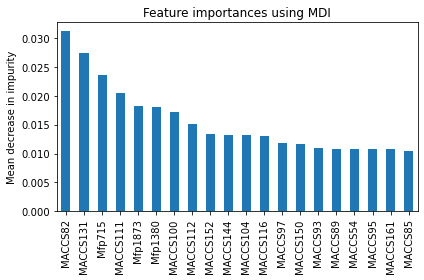

4
Best Threshold=0.543573
[[30 35]
 [25 87]]
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        65
           1       0.71      0.78      0.74       112

    accuracy                           0.66       177
   macro avg       0.63      0.62      0.62       177
weighted avg       0.65      0.66      0.65       177

balanced_accuracy_score  0.6191620879120879
matthews_corrcoef  0.24824043830403777
Sensitivity 0.46153846153846156
Specificity 0.7767857142857143
f1 0.7435897435897436
LR+ 2.067692307692308
ppv 0.7131147540983607
average_precision_score 0.743495402415716
roc_auc_score 0.6587225274725276


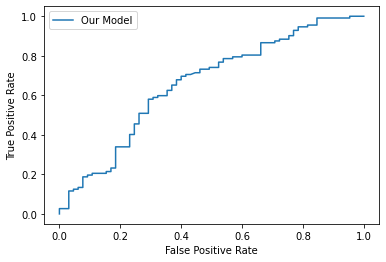

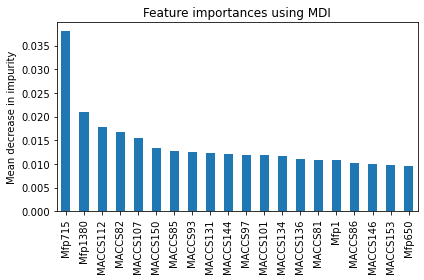

  9%|████                                        | 1/11 [00:51<08:34, 51.41s/it]

43
0
Best Threshold=0.619638
[[36 20]
 [56 66]]
              precision    recall  f1-score   support

           0       0.39      0.64      0.49        56
           1       0.77      0.54      0.63       122

    accuracy                           0.57       178
   macro avg       0.58      0.59      0.56       178
weighted avg       0.65      0.57      0.59       178

balanced_accuracy_score  0.59192037470726
matthews_corrcoef  0.17083331612706076
Sensitivity 0.6428571428571429
Specificity 0.5409836065573771
f1 0.6346153846153847
LR+ 1.4005102040816328
ppv 0.7674418604651163
average_precision_score 0.7768441645244661
roc_auc_score 0.6517857142857142


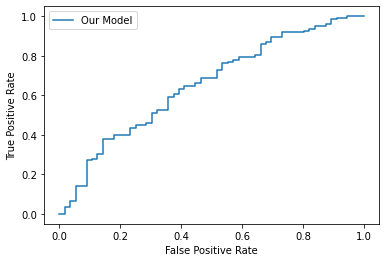

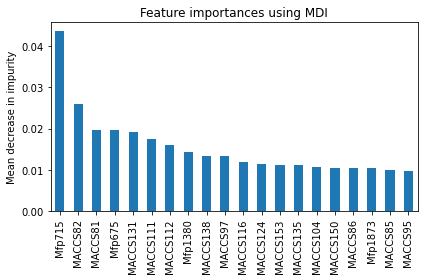

1
Best Threshold=0.607252
[[42 39]
 [30 67]]
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        81
           1       0.63      0.69      0.66        97

    accuracy                           0.61       178
   macro avg       0.61      0.60      0.60       178
weighted avg       0.61      0.61      0.61       178

balanced_accuracy_score  0.6046200840015272
matthews_corrcoef  0.21230208325430325
Sensitivity 0.5185185185185185
Specificity 0.6907216494845361
f1 0.6600985221674877
LR+ 1.6765432098765432
ppv 0.6320754716981132
average_precision_score 0.6798484817765313
roc_auc_score 0.6349751813669341


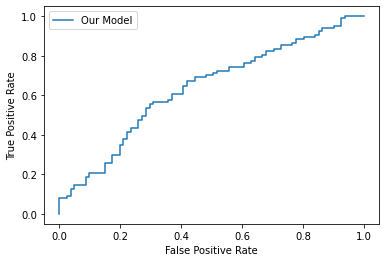

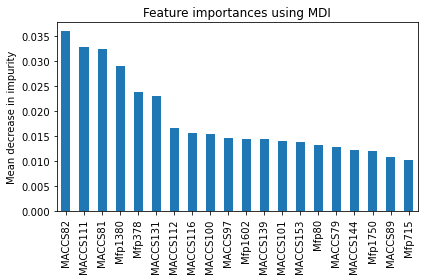

2
Best Threshold=0.589856
[[32 24]
 [43 79]]
              precision    recall  f1-score   support

           0       0.43      0.57      0.49        56
           1       0.77      0.65      0.70       122

    accuracy                           0.62       178
   macro avg       0.60      0.61      0.60       178
weighted avg       0.66      0.62      0.63       178

balanced_accuracy_score  0.6094847775175645
matthews_corrcoef  0.20592468989202475
Sensitivity 0.5714285714285714
Specificity 0.6475409836065574
f1 0.7022222222222223
LR+ 1.621262458471761
ppv 0.7669902912621359
average_precision_score 0.7893133955972773
roc_auc_score 0.6738875878220141


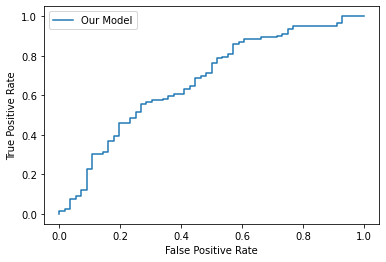

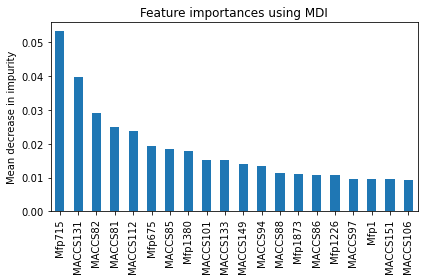

3
Best Threshold=0.625488
[[41 22]
 [45 69]]
              precision    recall  f1-score   support

           0       0.48      0.65      0.55        63
           1       0.76      0.61      0.67       114

    accuracy                           0.62       177
   macro avg       0.62      0.63      0.61       177
weighted avg       0.66      0.62      0.63       177

balanced_accuracy_score  0.6280284043441938
matthews_corrcoef  0.24529523228363334
Sensitivity 0.6507936507936508
Specificity 0.6052631578947368
f1 0.6731707317073171
LR+ 1.6486772486772487
ppv 0.7582417582417582
average_precision_score 0.8129164071057671
roc_auc_score 0.717488164856586


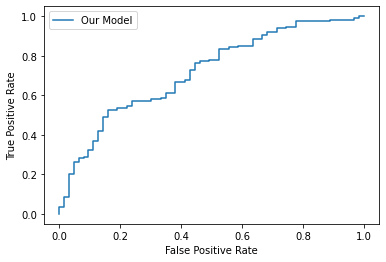

saving model


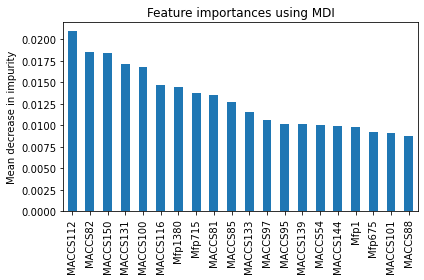

4
Best Threshold=0.598887
[[38 34]
 [30 75]]
              precision    recall  f1-score   support

           0       0.56      0.53      0.54        72
           1       0.69      0.71      0.70       105

    accuracy                           0.64       177
   macro avg       0.62      0.62      0.62       177
weighted avg       0.64      0.64      0.64       177

balanced_accuracy_score  0.621031746031746
matthews_corrcoef  0.24446826293141952
Sensitivity 0.5277777777777778
Specificity 0.7142857142857143
f1 0.7009345794392523
LR+ 1.8472222222222223
ppv 0.6880733944954128
average_precision_score 0.7328045176207236
roc_auc_score 0.6835978835978835


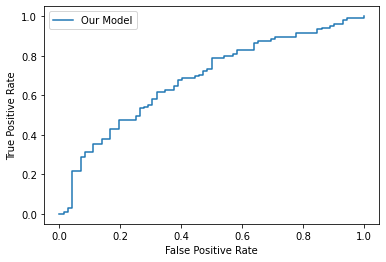

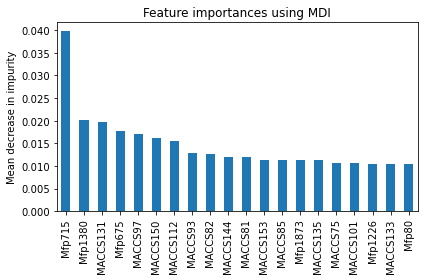

 18%|████████                                    | 2/11 [01:46<08:00, 53.36s/it]

44
0
Best Threshold=0.638851
[[50 17]
 [48 63]]
              precision    recall  f1-score   support

           0       0.51      0.75      0.61        67
           1       0.79      0.57      0.66       111

    accuracy                           0.63       178
   macro avg       0.65      0.66      0.63       178
weighted avg       0.68      0.63      0.64       178

balanced_accuracy_score  0.6569181121419927
matthews_corrcoef  0.3056637448791126
Sensitivity 0.746268656716418
Specificity 0.5675675675675675
f1 0.6596858638743455
LR+ 1.7257462686567164
ppv 0.7875
average_precision_score 0.7842300648890551
roc_auc_score 0.7217964232889605


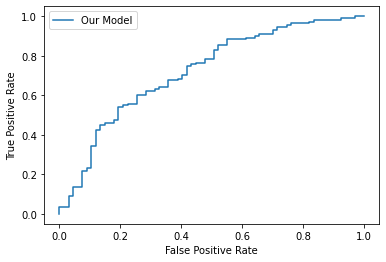

saving model


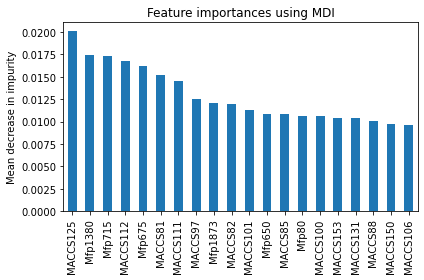

1
Best Threshold=0.624876
[[35 29]
 [49 65]]
              precision    recall  f1-score   support

           0       0.42      0.55      0.47        64
           1       0.69      0.57      0.62       114

    accuracy                           0.56       178
   macro avg       0.55      0.56      0.55       178
weighted avg       0.59      0.56      0.57       178

balanced_accuracy_score  0.5585252192982456
matthews_corrcoef  0.11251537920400892
Sensitivity 0.546875
Specificity 0.5701754385964912
f1 0.625
LR+ 1.2723214285714286
ppv 0.6914893617021277
average_precision_score 0.727748703168947
roc_auc_score 0.5971765350877193


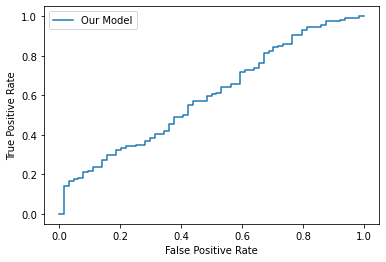

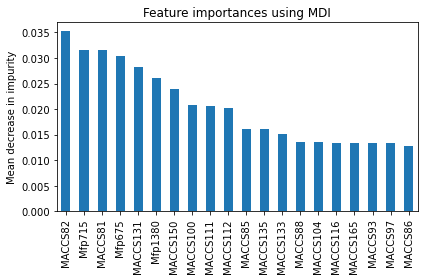

2
Best Threshold=0.651528
[[52 15]
 [45 66]]
              precision    recall  f1-score   support

           0       0.54      0.78      0.63        67
           1       0.81      0.59      0.69       111

    accuracy                           0.66       178
   macro avg       0.68      0.69      0.66       178
weighted avg       0.71      0.66      0.67       178

balanced_accuracy_score  0.6853569987898347
matthews_corrcoef  0.3606695672779826
Sensitivity 0.7761194029850746
Specificity 0.5945945945945946
f1 0.6875
LR+ 1.9144278606965177
ppv 0.8148148148148148
average_precision_score 0.7981063493095282
roc_auc_score 0.7500336157052574


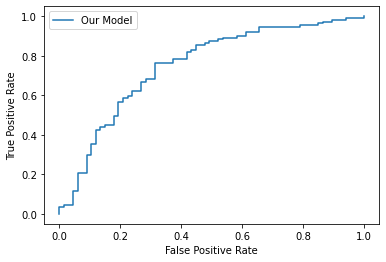

saving model


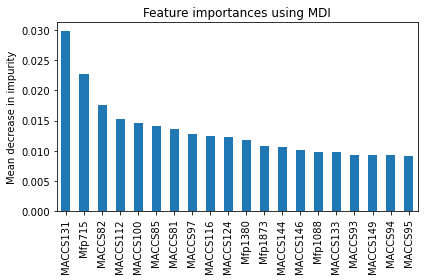

3
Best Threshold=0.614078
[[41 17]
 [41 78]]
              precision    recall  f1-score   support

           0       0.50      0.71      0.59        58
           1       0.82      0.66      0.73       119

    accuracy                           0.67       177
   macro avg       0.66      0.68      0.66       177
weighted avg       0.72      0.67      0.68       177

balanced_accuracy_score  0.6811793682990437
matthews_corrcoef  0.3410809668692151
Sensitivity 0.7068965517241379
Specificity 0.6554621848739496
f1 0.7289719626168224
LR+ 2.0517241379310343
ppv 0.8210526315789474
average_precision_score 0.8276612067336565
roc_auc_score 0.7361634308895972


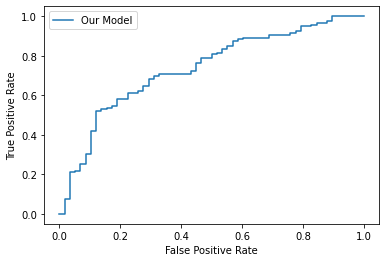

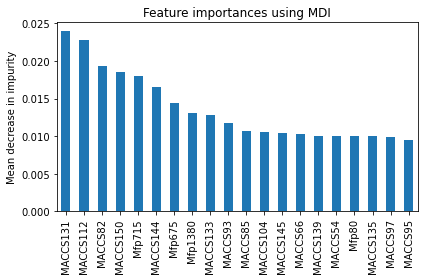

4
Best Threshold=0.585516
[[29 43]
 [32 73]]
              precision    recall  f1-score   support

           0       0.48      0.40      0.44        72
           1       0.63      0.70      0.66       105

    accuracy                           0.58       177
   macro avg       0.55      0.55      0.55       177
weighted avg       0.57      0.58      0.57       177

balanced_accuracy_score  0.5490079365079366
matthews_corrcoef  0.1013125853614605
Sensitivity 0.4027777777777778
Specificity 0.6952380952380952
f1 0.6606334841628959
LR+ 1.3216145833333333
ppv 0.6293103448275862
average_precision_score 0.6751978754333634
roc_auc_score 0.6055555555555556


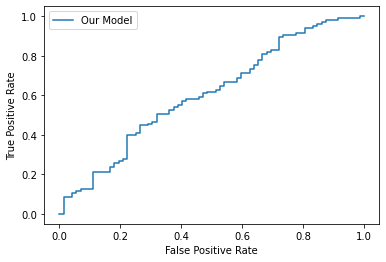

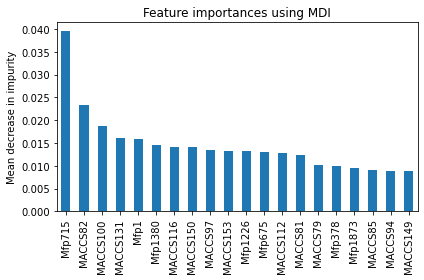

 27%|████████████                                | 3/11 [02:42<07:16, 54.60s/it]

45
0
Best Threshold=0.622893
[[44 20]
 [37 77]]
              precision    recall  f1-score   support

           0       0.54      0.69      0.61        64
           1       0.79      0.68      0.73       114

    accuracy                           0.68       178
   macro avg       0.67      0.68      0.67       178
weighted avg       0.70      0.68      0.69       178

balanced_accuracy_score  0.6814692982456141
matthews_corrcoef  0.349741518675287
Sensitivity 0.6875
Specificity 0.6754385964912281
f1 0.7298578199052134
LR+ 2.118243243243243
ppv 0.7938144329896907
average_precision_score 0.7834108967786222
roc_auc_score 0.7265625


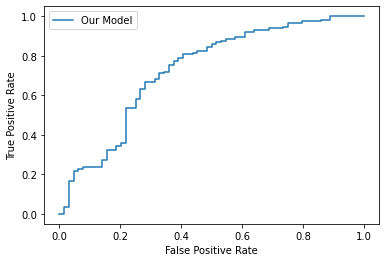

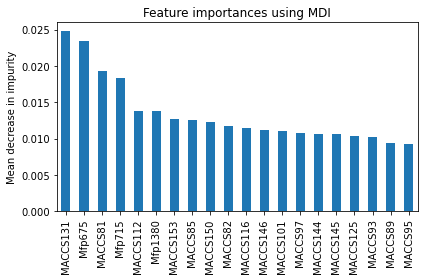

1
Best Threshold=0.613421
[[39 38]
 [31 70]]
              precision    recall  f1-score   support

           0       0.56      0.51      0.53        77
           1       0.65      0.69      0.67       101

    accuracy                           0.61       178
   macro avg       0.60      0.60      0.60       178
weighted avg       0.61      0.61      0.61       178

balanced_accuracy_score  0.5997814067120997
matthews_corrcoef  0.20240664659678362
Sensitivity 0.5064935064935064
Specificity 0.693069306930693
f1 0.6698564593301435
LR+ 1.6501885211562626
ppv 0.6481481481481481
average_precision_score 0.7348878746918138
roc_auc_score 0.6652951009386653


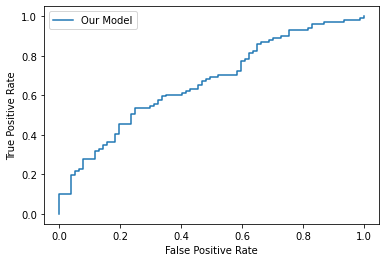

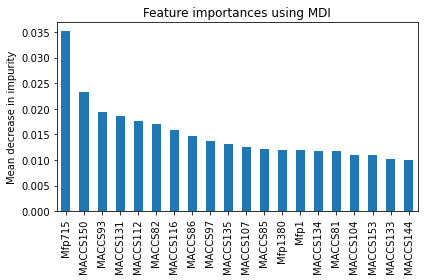

2
Best Threshold=0.611596
[[33 24]
 [57 64]]
              precision    recall  f1-score   support

           0       0.37      0.58      0.45        57
           1       0.73      0.53      0.61       121

    accuracy                           0.54       178
   macro avg       0.55      0.55      0.53       178
weighted avg       0.61      0.54      0.56       178

balanced_accuracy_score  0.5539364941278817
matthews_corrcoef  0.10066540189746312
Sensitivity 0.5789473684210527
Specificity 0.5289256198347108
f1 0.6124401913875598
LR+ 1.2289935364727609
ppv 0.7272727272727273
average_precision_score 0.7898508266650923
roc_auc_score 0.6394084384515006


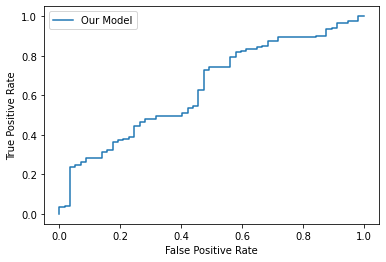

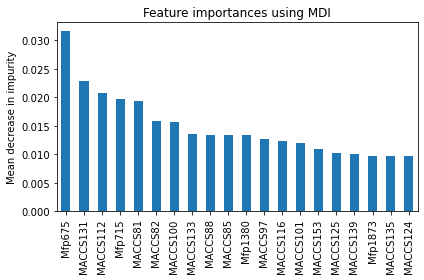

3
Best Threshold=0.599524
[[35 28]
 [40 74]]
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        63
           1       0.73      0.65      0.69       114

    accuracy                           0.62       177
   macro avg       0.60      0.60      0.60       177
weighted avg       0.63      0.62      0.62       177

balanced_accuracy_score  0.6023391812865497
matthews_corrcoef  0.19831881409450408
Sensitivity 0.5555555555555556
Specificity 0.6491228070175439
f1 0.6851851851851852
LR+ 1.5833333333333335
ppv 0.7254901960784313
average_precision_score 0.7622802403896581
roc_auc_score 0.648008911166806


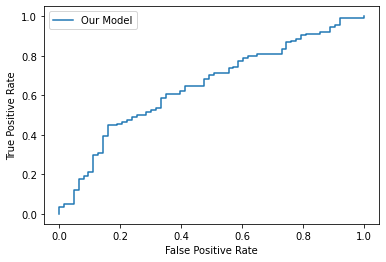

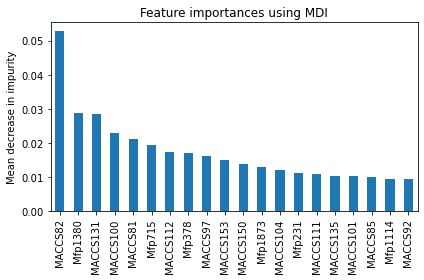

4
Best Threshold=0.632068
[[45 22]
 [40 70]]
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        67
           1       0.76      0.64      0.69       110

    accuracy                           0.65       177
   macro avg       0.65      0.65      0.64       177
weighted avg       0.67      0.65      0.65       177

balanced_accuracy_score  0.6540027137042063
matthews_corrcoef  0.29901208184904554
Sensitivity 0.6716417910447762
Specificity 0.6363636363636364
f1 0.693069306930693
LR+ 1.8470149253731345
ppv 0.7608695652173914
average_precision_score 0.8221245354845457
roc_auc_score 0.7377204884667571


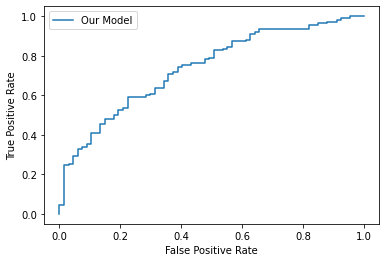

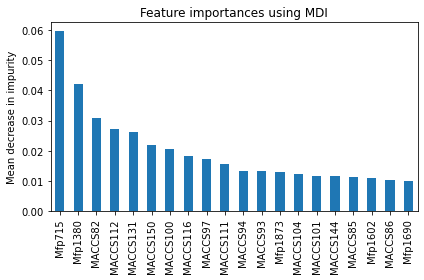

 36%|████████████████                            | 4/11 [03:36<06:21, 54.54s/it]

46
0
Best Threshold=0.580989
[[31 35]
 [28 84]]
              precision    recall  f1-score   support

           0       0.53      0.47      0.50        66
           1       0.71      0.75      0.73       112

    accuracy                           0.65       178
   macro avg       0.62      0.61      0.61       178
weighted avg       0.64      0.65      0.64       178

balanced_accuracy_score  0.6098484848484849
matthews_corrcoef  0.22542680682207025
Sensitivity 0.4696969696969697
Specificity 0.75
f1 0.7272727272727272
LR+ 1.878787878787879
ppv 0.7058823529411765
average_precision_score 0.7358204149564151
roc_auc_score 0.6485389610389609


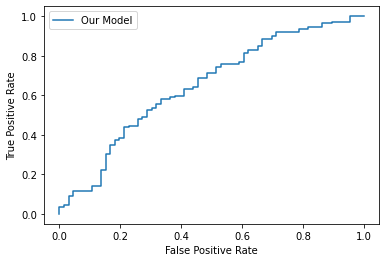

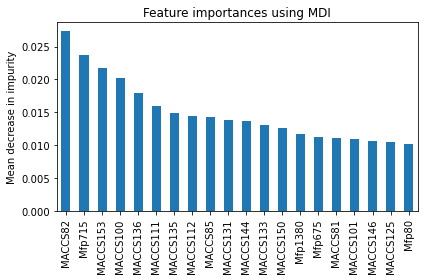

1
Best Threshold=0.646905
[[42 18]
 [61 57]]
              precision    recall  f1-score   support

           0       0.41      0.70      0.52        60
           1       0.76      0.48      0.59       118

    accuracy                           0.56       178
   macro avg       0.58      0.59      0.55       178
weighted avg       0.64      0.56      0.57       178

balanced_accuracy_score  0.5915254237288136
matthews_corrcoef  0.17524237429409315
Sensitivity 0.7
Specificity 0.4830508474576271
f1 0.5906735751295337
LR+ 1.3540983606557377
ppv 0.76
average_precision_score 0.7652062923871221
roc_auc_score 0.6309322033898305


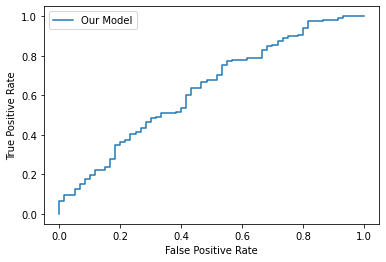

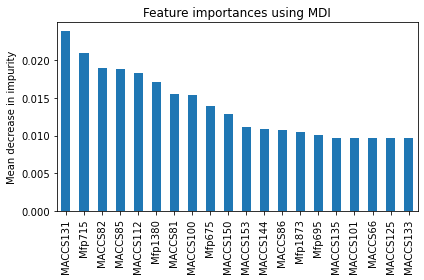

2
Best Threshold=0.568045
[[37 28]
 [24 89]]
              precision    recall  f1-score   support

           0       0.61      0.57      0.59        65
           1       0.76      0.79      0.77       113

    accuracy                           0.71       178
   macro avg       0.68      0.68      0.68       178
weighted avg       0.70      0.71      0.71       178

balanced_accuracy_score  0.6784206943498978
matthews_corrcoef  0.36200391928308684
Sensitivity 0.5692307692307692
Specificity 0.7876106194690266
f1 0.7739130434782607
LR+ 2.680128205128205
ppv 0.7606837606837606
average_precision_score 0.8060400428924768
roc_auc_score 0.723213070115725


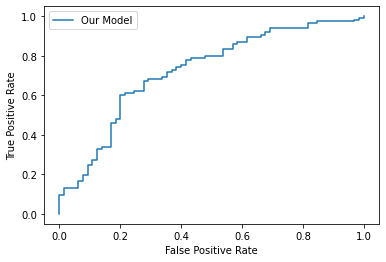

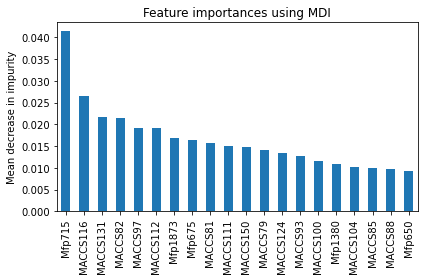

3
Best Threshold=0.632558
[[47 18]
 [39 73]]
              precision    recall  f1-score   support

           0       0.55      0.72      0.62        65
           1       0.80      0.65      0.72       112

    accuracy                           0.68       177
   macro avg       0.67      0.69      0.67       177
weighted avg       0.71      0.68      0.68       177

balanced_accuracy_score  0.6874313186813187
matthews_corrcoef  0.361549632336004
Sensitivity 0.7230769230769231
Specificity 0.6517857142857143
f1 0.7192118226600986
LR+ 2.0765285996055227
ppv 0.8021978021978022
average_precision_score 0.8282550950044825
roc_auc_score 0.7576923076923077


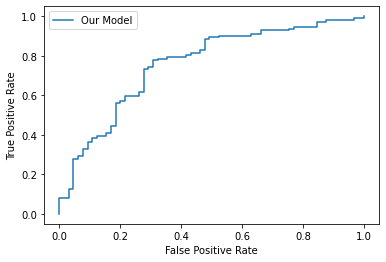

saving model


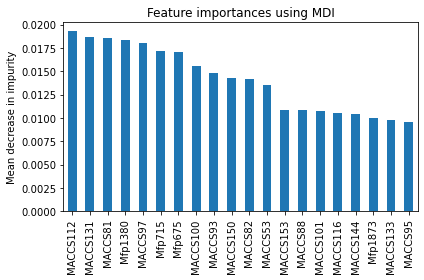

4
Best Threshold=0.645214
[[45 27]
 [44 61]]
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        72
           1       0.69      0.58      0.63       105

    accuracy                           0.60       177
   macro avg       0.60      0.60      0.60       177
weighted avg       0.62      0.60      0.60       177

balanced_accuracy_score  0.6029761904761906
matthews_corrcoef  0.2023444866046577
Sensitivity 0.625
Specificity 0.580952380952381
f1 0.6321243523316064
LR+ 1.491477272727273
ppv 0.6931818181818182
average_precision_score 0.706695870126451
roc_auc_score 0.6335978835978836


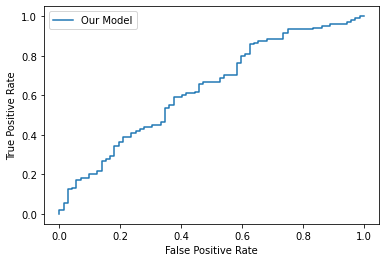

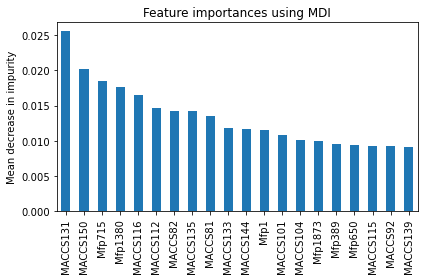

 45%|████████████████████                        | 5/11 [04:38<05:42, 57.00s/it]

47
0
Best Threshold=0.587431
[[48 20]
 [59 51]]
              precision    recall  f1-score   support

           0       0.45      0.71      0.55        68
           1       0.72      0.46      0.56       110

    accuracy                           0.56       178
   macro avg       0.58      0.58      0.56       178
weighted avg       0.62      0.56      0.56       178

balanced_accuracy_score  0.58475935828877
matthews_corrcoef  0.16820828829361376
Sensitivity 0.7058823529411765
Specificity 0.4636363636363636
f1 0.56353591160221
LR+ 1.3160518444666003
ppv 0.7183098591549296
average_precision_score 0.7465878905922907
roc_auc_score 0.6596256684491979


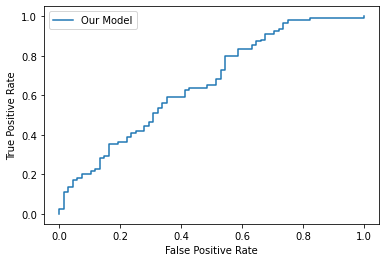

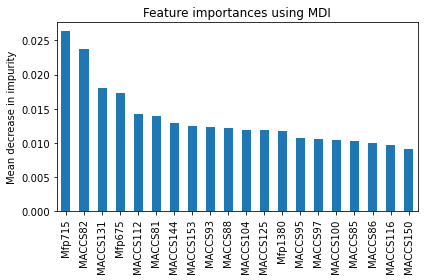

1
Best Threshold=0.603946
[[33 25]
 [41 79]]
              precision    recall  f1-score   support

           0       0.45      0.57      0.50        58
           1       0.76      0.66      0.71       120

    accuracy                           0.63       178
   macro avg       0.60      0.61      0.60       178
weighted avg       0.66      0.63      0.64       178

balanced_accuracy_score  0.6136494252873563
matthews_corrcoef  0.21615701274582555
Sensitivity 0.5689655172413793
Specificity 0.6583333333333333
f1 0.7053571428571429
LR+ 1.665264928511354
ppv 0.7596153846153846
average_precision_score 0.7743010468416329
roc_auc_score 0.6419540229885057


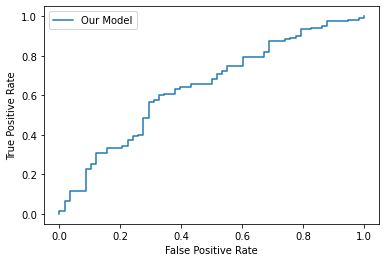

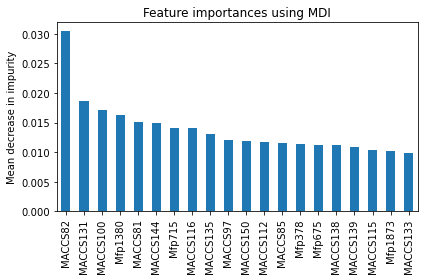

2
Best Threshold=0.606357
[[36 32]
 [29 81]]
              precision    recall  f1-score   support

           0       0.55      0.53      0.54        68
           1       0.72      0.74      0.73       110

    accuracy                           0.66       178
   macro avg       0.64      0.63      0.63       178
weighted avg       0.65      0.66      0.66       178

balanced_accuracy_score  0.6328877005347593
matthews_corrcoef  0.2682067360785403
Sensitivity 0.5294117647058824
Specificity 0.7363636363636363
f1 0.7264573991031391
LR+ 2.0081135902636915
ppv 0.7168141592920354
average_precision_score 0.7729204906848839
roc_auc_score 0.6951871657754011


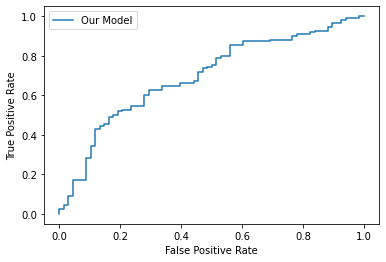

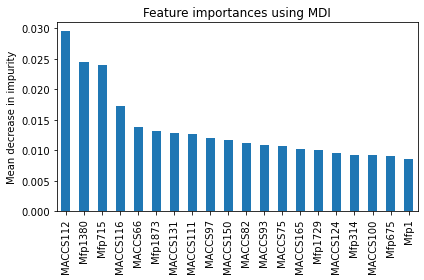

3
Best Threshold=0.634170
[[46 17]
 [49 65]]
              precision    recall  f1-score   support

           0       0.48      0.73      0.58        63
           1       0.79      0.57      0.66       114

    accuracy                           0.63       177
   macro avg       0.64      0.65      0.62       177
weighted avg       0.68      0.63      0.63       177

balanced_accuracy_score  0.6501670843776106
matthews_corrcoef  0.2883757359489244
Sensitivity 0.7301587301587301
Specificity 0.5701754385964912
f1 0.663265306122449
LR+ 1.6987366375121475
ppv 0.7926829268292683
average_precision_score 0.8137665122796979
roc_auc_score 0.7225006961849066


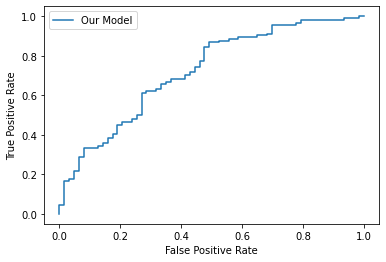

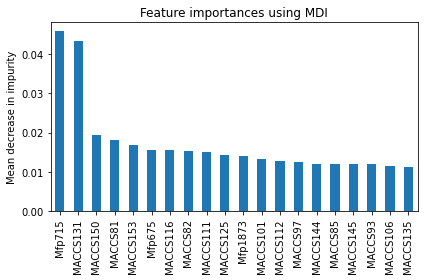

4
Best Threshold=0.576879
[[37 34]
 [25 81]]
              precision    recall  f1-score   support

           0       0.60      0.52      0.56        71
           1       0.70      0.76      0.73       106

    accuracy                           0.67       177
   macro avg       0.65      0.64      0.64       177
weighted avg       0.66      0.67      0.66       177

balanced_accuracy_score  0.6426388519798034
matthews_corrcoef  0.2930928152876669
Sensitivity 0.5211267605633803
Specificity 0.7641509433962265
f1 0.7330316742081449
LR+ 2.2095774647887327
ppv 0.7043478260869566
average_precision_score 0.725442499687643
roc_auc_score 0.6930640446452299


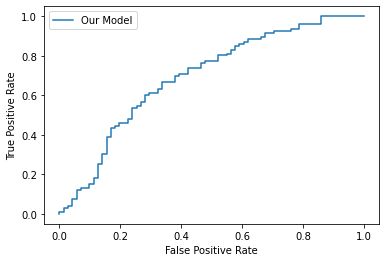

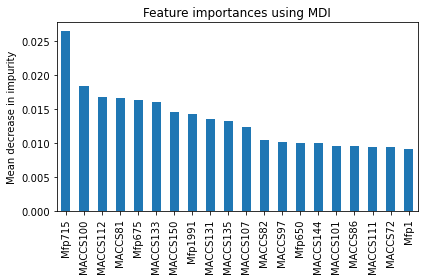

 55%|████████████████████████                    | 6/11 [05:31<04:39, 55.86s/it]

48
0
Best Threshold=0.521277
[[29 34]
 [27 88]]
              precision    recall  f1-score   support

           0       0.52      0.46      0.49        63
           1       0.72      0.77      0.74       115

    accuracy                           0.66       178
   macro avg       0.62      0.61      0.62       178
weighted avg       0.65      0.66      0.65       178

balanced_accuracy_score  0.612767425810904
matthews_corrcoef  0.23225171438212455
Sensitivity 0.4603174603174603
Specificity 0.7652173913043478
f1 0.7426160337552744
LR+ 1.9606114050558496
ppv 0.7213114754098361
average_precision_score 0.7354238640170999
roc_auc_score 0.6405797101449275


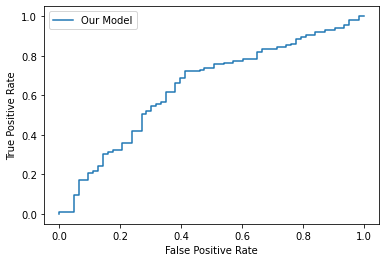

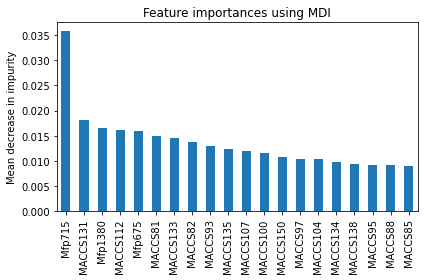

1
Best Threshold=0.584065
[[38 31]
 [34 75]]
              precision    recall  f1-score   support

           0       0.53      0.55      0.54        69
           1       0.71      0.69      0.70       109

    accuracy                           0.63       178
   macro avg       0.62      0.62      0.62       178
weighted avg       0.64      0.63      0.64       178

balanced_accuracy_score  0.6193990160882861
matthews_corrcoef  0.23705512946640014
Sensitivity 0.5507246376811594
Specificity 0.6880733944954128
f1 0.6976744186046512
LR+ 1.7655583972719522
ppv 0.7075471698113207
average_precision_score 0.7427495474348232
roc_auc_score 0.6565616274431592


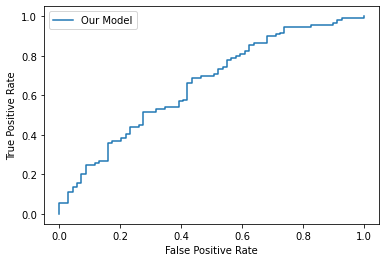

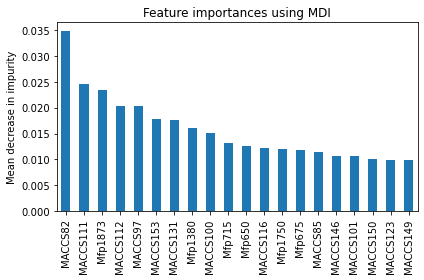

2
Best Threshold=0.628770
[[48 15]
 [38 77]]
              precision    recall  f1-score   support

           0       0.56      0.76      0.64        63
           1       0.84      0.67      0.74       115

    accuracy                           0.70       178
   macro avg       0.70      0.72      0.69       178
weighted avg       0.74      0.70      0.71       178

balanced_accuracy_score  0.7157349896480332
matthews_corrcoef  0.4128826556916857
Sensitivity 0.7619047619047619
Specificity 0.6695652173913044
f1 0.7439613526570048
LR+ 2.305764411027569
ppv 0.8369565217391305
average_precision_score 0.8295774253757909
roc_auc_score 0.7636991028295377


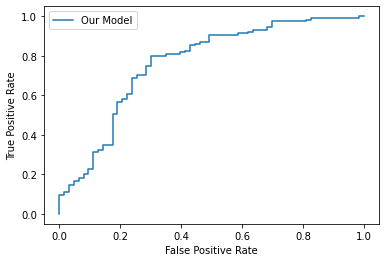

saving model


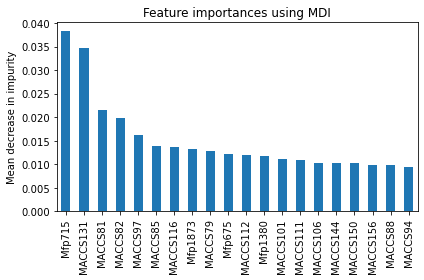

3
Best Threshold=0.477602
[[35 26]
 [28 88]]
              precision    recall  f1-score   support

           0       0.56      0.57      0.56        61
           1       0.77      0.76      0.77       116

    accuracy                           0.69       177
   macro avg       0.66      0.67      0.66       177
weighted avg       0.70      0.69      0.70       177

balanced_accuracy_score  0.6661955907292255
matthews_corrcoef  0.32992916271140077
Sensitivity 0.5737704918032787
Specificity 0.7586206896551724
f1 0.7652173913043477
LR+ 2.377049180327868
ppv 0.7719298245614035
average_precision_score 0.811335545713035
roc_auc_score 0.7316280384397965


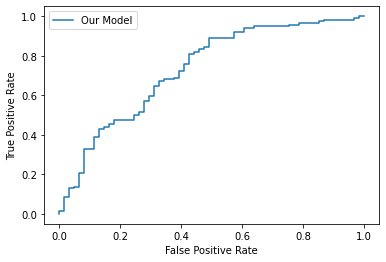

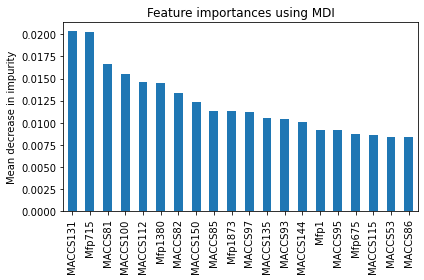

4
Best Threshold=0.541201
[[25 47]
 [17 88]]
              precision    recall  f1-score   support

           0       0.60      0.35      0.44        72
           1       0.65      0.84      0.73       105

    accuracy                           0.64       177
   macro avg       0.62      0.59      0.59       177
weighted avg       0.63      0.64      0.61       177

balanced_accuracy_score  0.5926587301587302
matthews_corrcoef  0.21398617119964702
Sensitivity 0.3472222222222222
Specificity 0.8380952380952381
f1 0.7333333333333333
LR+ 2.1446078431372553
ppv 0.6518518518518519
average_precision_score 0.712986495686986
roc_auc_score 0.6466931216931217


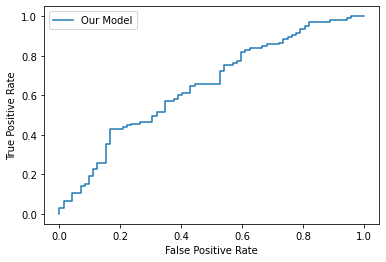

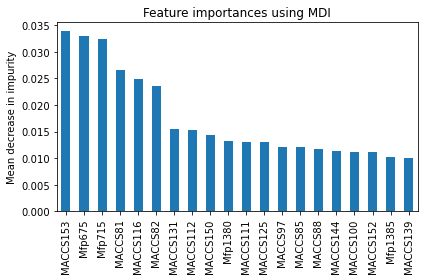

 64%|████████████████████████████                | 7/11 [06:28<03:44, 56.10s/it]

49
0
Best Threshold=0.617310
[[37 27]
 [51 63]]
              precision    recall  f1-score   support

           0       0.42      0.58      0.49        64
           1       0.70      0.55      0.62       114

    accuracy                           0.56       178
   macro avg       0.56      0.57      0.55       178
weighted avg       0.60      0.56      0.57       178

balanced_accuracy_score  0.5653782894736843
matthews_corrcoef  0.12549989753898866
Sensitivity 0.578125
Specificity 0.5526315789473685
f1 0.6176470588235295
LR+ 1.292279411764706
ppv 0.7
average_precision_score 0.7476628613910838
roc_auc_score 0.6105400219298246


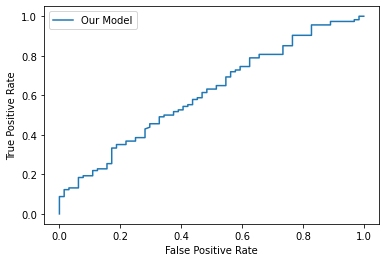

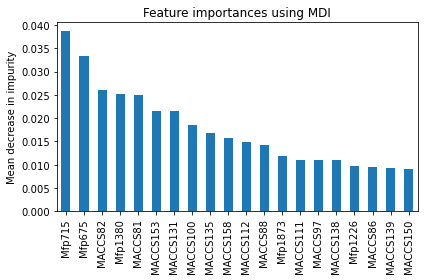

1
Best Threshold=0.603092
[[34 36]
 [39 69]]
              precision    recall  f1-score   support

           0       0.47      0.49      0.48        70
           1       0.66      0.64      0.65       108

    accuracy                           0.58       178
   macro avg       0.56      0.56      0.56       178
weighted avg       0.58      0.58      0.58       178

balanced_accuracy_score  0.5623015873015873
matthews_corrcoef  0.12374678524816358
Sensitivity 0.4857142857142857
Specificity 0.6388888888888888
f1 0.647887323943662
LR+ 1.345054945054945
ppv 0.6571428571428571
average_precision_score 0.7099504406339814
roc_auc_score 0.6263227513227513


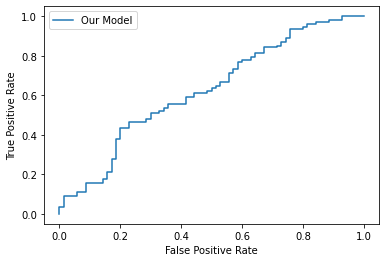

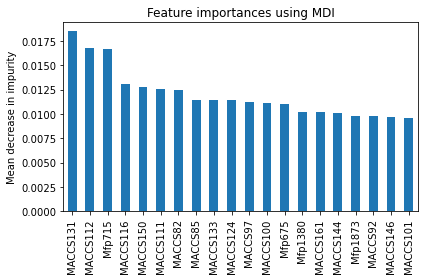

2
Best Threshold=0.626536
[[45 30]
 [30 73]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        75
           1       0.71      0.71      0.71       103

    accuracy                           0.66       178
   macro avg       0.65      0.65      0.65       178
weighted avg       0.66      0.66      0.66       178

balanced_accuracy_score  0.654368932038835
matthews_corrcoef  0.3087378640776699
Sensitivity 0.6
Specificity 0.7087378640776699
f1 0.7087378640776699
LR+ 2.06
ppv 0.7087378640776699
average_precision_score 0.7323602533358977
roc_auc_score 0.7171521035598705


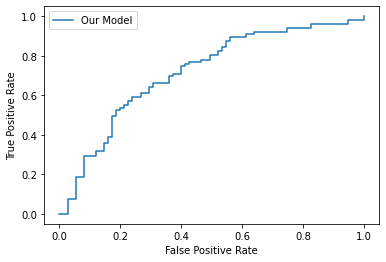

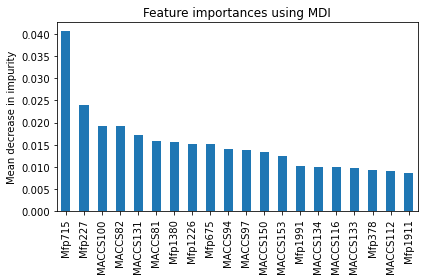

3
Best Threshold=0.635803
[[40 13]
 [53 71]]
              precision    recall  f1-score   support

           0       0.43      0.75      0.55        53
           1       0.85      0.57      0.68       124

    accuracy                           0.63       177
   macro avg       0.64      0.66      0.62       177
weighted avg       0.72      0.63      0.64       177

balanced_accuracy_score  0.6636488131466829
matthews_corrcoef  0.30019988096281075
Sensitivity 0.7547169811320755
Specificity 0.5725806451612904
f1 0.6826923076923077
LR+ 1.7657529369882523
ppv 0.8452380952380952
average_precision_score 0.8392926079801564
roc_auc_score 0.7215459525258673


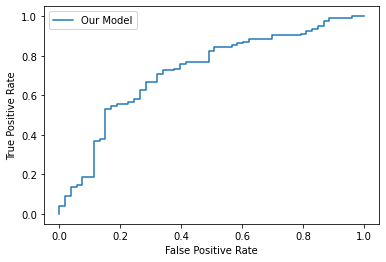

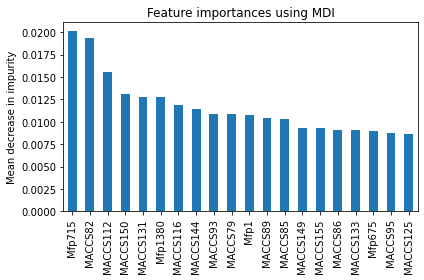

4
Best Threshold=0.640474
[[51 15]
 [51 60]]
              precision    recall  f1-score   support

           0       0.50      0.77      0.61        66
           1       0.80      0.54      0.65       111

    accuracy                           0.63       177
   macro avg       0.65      0.66      0.63       177
weighted avg       0.69      0.63      0.63       177

balanced_accuracy_score  0.6566339066339066
matthews_corrcoef  0.3065621372256267
Sensitivity 0.7727272727272727
Specificity 0.5405405405405406
f1 0.6451612903225806
LR+ 1.6818181818181819
ppv 0.8
average_precision_score 0.7562615136743667
roc_auc_score 0.7048867048867049


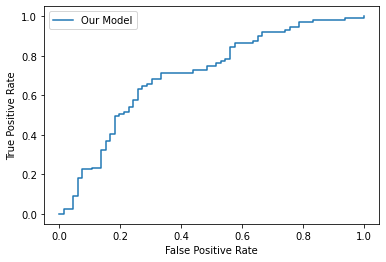

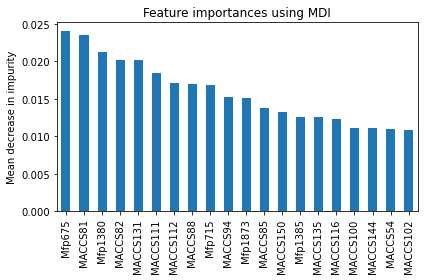

 73%|████████████████████████████████            | 8/11 [07:24<02:47, 55.99s/it]

50
0
Best Threshold=0.605501
[[30 31]
 [37 80]]
              precision    recall  f1-score   support

           0       0.45      0.49      0.47        61
           1       0.72      0.68      0.70       117

    accuracy                           0.62       178
   macro avg       0.58      0.59      0.59       178
weighted avg       0.63      0.62      0.62       178

balanced_accuracy_score  0.5877819812246041
matthews_corrcoef  0.17198648945379416
Sensitivity 0.4918032786885246
Specificity 0.6837606837606838
f1 0.7017543859649122
LR+ 1.5551617190961453
ppv 0.7207207207207207
average_precision_score 0.7624409913445185
roc_auc_score 0.6345803558918313


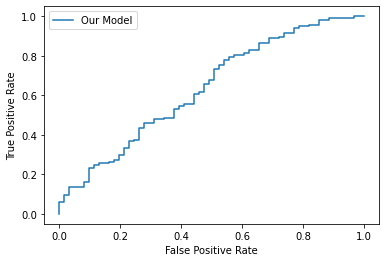

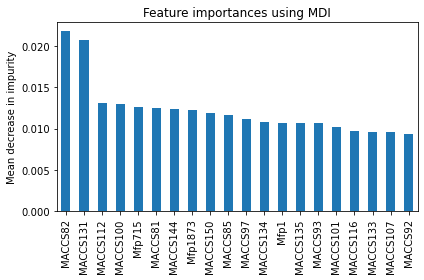

1
Best Threshold=0.643081
[[45 20]
 [54 59]]
              precision    recall  f1-score   support

           0       0.45      0.69      0.55        65
           1       0.75      0.52      0.61       113

    accuracy                           0.58       178
   macro avg       0.60      0.61      0.58       178
weighted avg       0.64      0.58      0.59       178

balanced_accuracy_score  0.607215793056501
matthews_corrcoef  0.20780381440597945
Sensitivity 0.6923076923076923
Specificity 0.5221238938053098
f1 0.6145833333333333
LR+ 1.4487179487179487
ppv 0.7468354430379747
average_precision_score 0.7841770327846899
roc_auc_score 0.6567733151803948


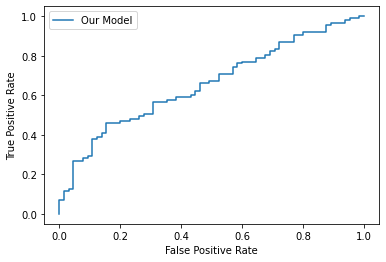

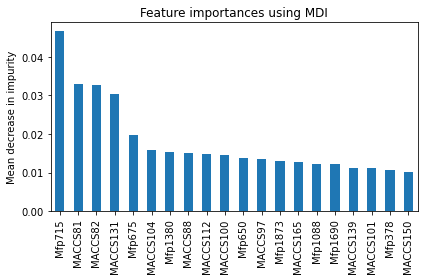

2
Best Threshold=0.619315
[[49 26]
 [35 68]]
              precision    recall  f1-score   support

           0       0.58      0.65      0.62        75
           1       0.72      0.66      0.69       103

    accuracy                           0.66       178
   macro avg       0.65      0.66      0.65       178
weighted avg       0.66      0.66      0.66       178

balanced_accuracy_score  0.6567637540453075
matthews_corrcoef  0.3101139658382654
Sensitivity 0.6533333333333333
Specificity 0.6601941747572816
f1 0.6903553299492386
LR+ 1.922666666666667
ppv 0.723404255319149
average_precision_score 0.7494305537302701
roc_auc_score 0.7082200647249192


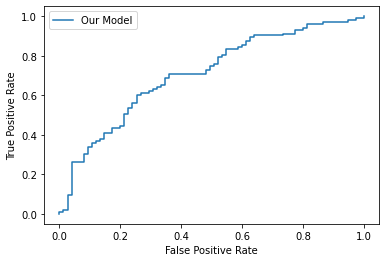

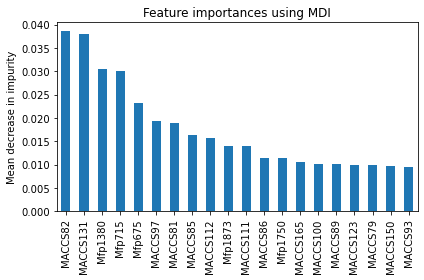

3
Best Threshold=0.500214
[[46 25]
 [37 69]]
              precision    recall  f1-score   support

           0       0.55      0.65      0.60        71
           1       0.73      0.65      0.69       106

    accuracy                           0.65       177
   macro avg       0.64      0.65      0.64       177
weighted avg       0.66      0.65      0.65       177

balanced_accuracy_score  0.6494153600850385
matthews_corrcoef  0.293497479157907
Sensitivity 0.647887323943662
Specificity 0.6509433962264151
f1 0.6900000000000001
LR+ 1.856109630757518
ppv 0.7340425531914894
average_precision_score 0.7362895967155652
roc_auc_score 0.6819027371777837


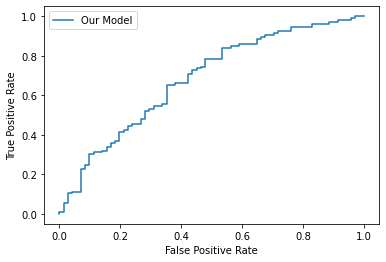

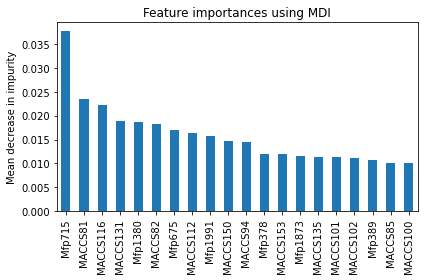

4
Best Threshold=0.519596
[[24 32]
 [22 99]]
              precision    recall  f1-score   support

           0       0.52      0.43      0.47        56
           1       0.76      0.82      0.79       121

    accuracy                           0.69       177
   macro avg       0.64      0.62      0.63       177
weighted avg       0.68      0.69      0.69       177

balanced_accuracy_score  0.6233766233766234
matthews_corrcoef  0.2616585984305947
Sensitivity 0.42857142857142855
Specificity 0.8181818181818182
f1 0.7857142857142857
LR+ 2.3571428571428577
ppv 0.7557251908396947
average_precision_score 0.8117740419305227
roc_auc_score 0.7055785123966942


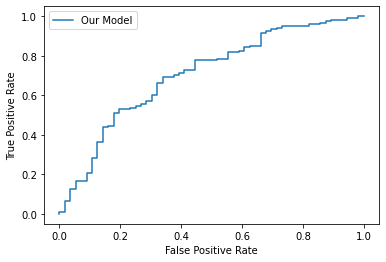

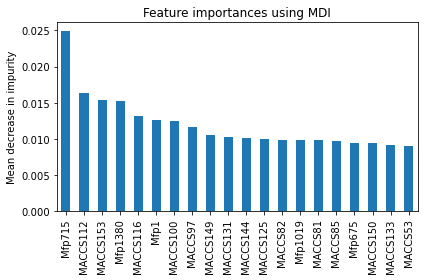

 82%|████████████████████████████████████        | 9/11 [08:18<01:50, 55.39s/it]

51
0
Best Threshold=0.565491
[[46 22]
 [41 69]]
              precision    recall  f1-score   support

           0       0.53      0.68      0.59        68
           1       0.76      0.63      0.69       110

    accuracy                           0.65       178
   macro avg       0.64      0.65      0.64       178
weighted avg       0.67      0.65      0.65       178

balanced_accuracy_score  0.6518716577540107
matthews_corrcoef  0.29524136573951115
Sensitivity 0.6764705882352942
Specificity 0.6272727272727273
f1 0.6865671641791045
LR+ 1.8149210903873747
ppv 0.7582417582417582
average_precision_score 0.7548564538173096
roc_auc_score 0.6729946524064171


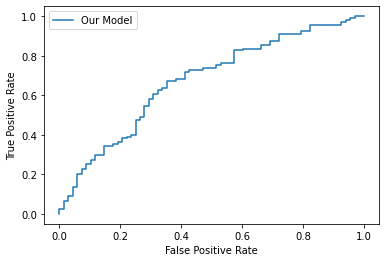

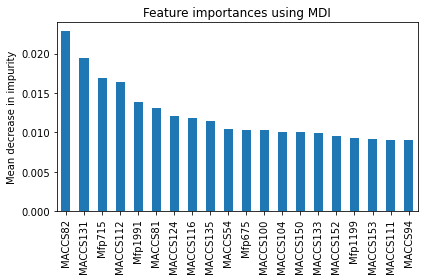

1
Best Threshold=0.529275
[[42 26]
 [40 70]]
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        68
           1       0.73      0.64      0.68       110

    accuracy                           0.63       178
   macro avg       0.62      0.63      0.62       178
weighted avg       0.65      0.63      0.63       178

balanced_accuracy_score  0.6270053475935828
matthews_corrcoef  0.24760548402336938
Sensitivity 0.6176470588235294
Specificity 0.6363636363636364
f1 0.6796116504854369
LR+ 1.6985294117647058
ppv 0.7291666666666666
average_precision_score 0.7563123039647801
roc_auc_score 0.6927807486631015


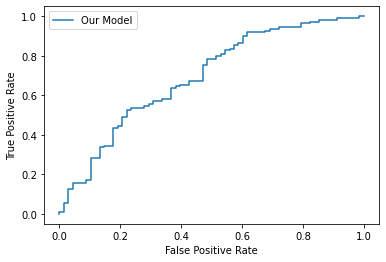

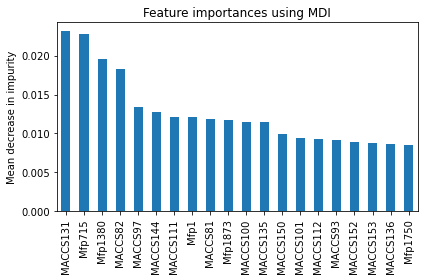

2
Best Threshold=0.585006
[[38 34]
 [26 80]]
              precision    recall  f1-score   support

           0       0.59      0.53      0.56        72
           1       0.70      0.75      0.73       106

    accuracy                           0.66       178
   macro avg       0.65      0.64      0.64       178
weighted avg       0.66      0.66      0.66       178

balanced_accuracy_score  0.6412473794549267
matthews_corrcoef  0.288926357866433
Sensitivity 0.5277777777777778
Specificity 0.7547169811320755
f1 0.7272727272727273
LR+ 2.151709401709402
ppv 0.7017543859649122
average_precision_score 0.757498784973871
roc_auc_score 0.7068920335429769


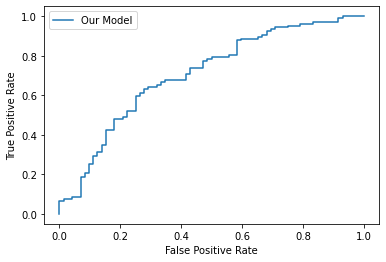

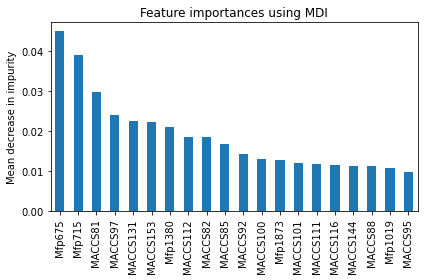

3
Best Threshold=0.557237
[[27 24]
 [28 98]]
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        51
           1       0.80      0.78      0.79       126

    accuracy                           0.71       177
   macro avg       0.65      0.65      0.65       177
weighted avg       0.71      0.71      0.71       177

balanced_accuracy_score  0.6535947712418301
matthews_corrcoef  0.30061837829466853
Sensitivity 0.5294117647058824
Specificity 0.7777777777777778
f1 0.7903225806451613
LR+ 2.3823529411764706
ppv 0.8032786885245902
average_precision_score 0.8697052015622225
roc_auc_score 0.7261126672891378


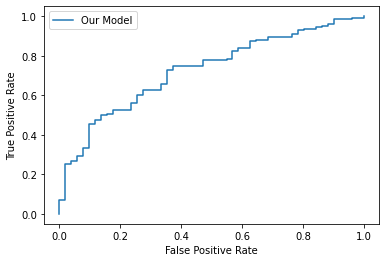

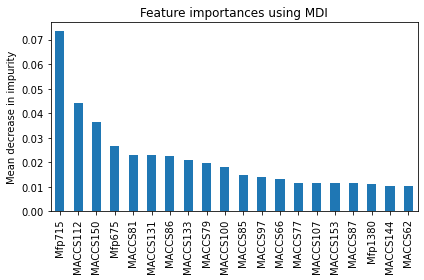

4
Best Threshold=0.615252
[[40 29]
 [41 67]]
              precision    recall  f1-score   support

           0       0.49      0.58      0.53        69
           1       0.70      0.62      0.66       108

    accuracy                           0.60       177
   macro avg       0.60      0.60      0.60       177
weighted avg       0.62      0.60      0.61       177

balanced_accuracy_score  0.6000402576489533
matthews_corrcoef  0.1958678221236565
Sensitivity 0.5797101449275363
Specificity 0.6203703703703703
f1 0.6568627450980392
LR+ 1.5270413573700954
ppv 0.6979166666666666
average_precision_score 0.7127622508313689
roc_auc_score 0.6552603327965646


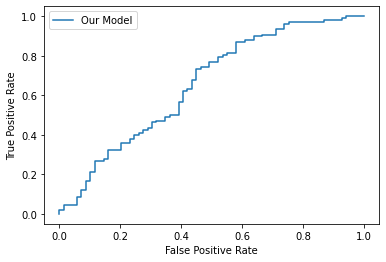

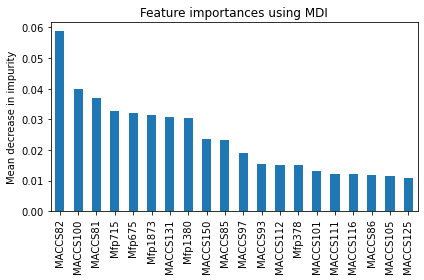

 91%|███████████████████████████████████████    | 10/11 [09:17<00:56, 56.78s/it]

52
0
Best Threshold=0.661798
[[44 18]
 [53 63]]
              precision    recall  f1-score   support

           0       0.45      0.71      0.55        62
           1       0.78      0.54      0.64       116

    accuracy                           0.60       178
   macro avg       0.62      0.63      0.60       178
weighted avg       0.66      0.60      0.61       178

balanced_accuracy_score  0.6263904338153504
matthews_corrcoef  0.24184697684236414
Sensitivity 0.7096774193548387
Specificity 0.5431034482758621
f1 0.6395939086294417
LR+ 1.5532562385879491
ppv 0.7777777777777778
average_precision_score 0.775974662431967
roc_auc_score 0.6765850945494994


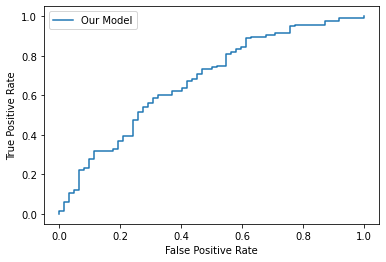

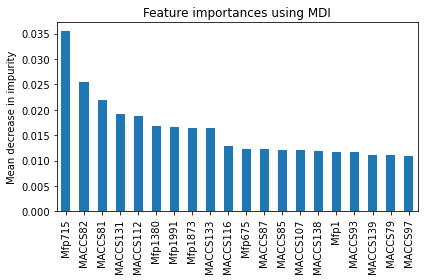

1
Best Threshold=0.591706
[[46 13]
 [59 60]]
              precision    recall  f1-score   support

           0       0.44      0.78      0.56        59
           1       0.82      0.50      0.62       119

    accuracy                           0.60       178
   macro avg       0.63      0.64      0.59       178
weighted avg       0.69      0.60      0.60       178

balanced_accuracy_score  0.6419313488107108
matthews_corrcoef  0.27167628667878574
Sensitivity 0.7796610169491526
Specificity 0.5042016806722689
f1 0.625
LR+ 1.5725366274059178
ppv 0.821917808219178
average_precision_score 0.7807314050549395
roc_auc_score 0.686369463039453


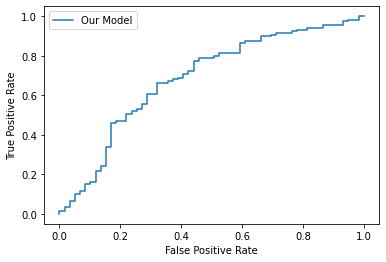

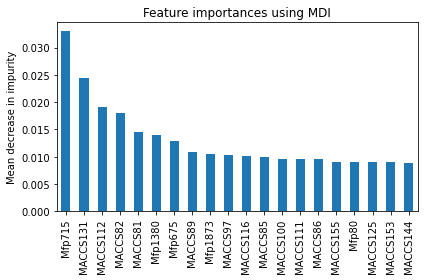

2
Best Threshold=0.495242
[[36 32]
 [31 79]]
              precision    recall  f1-score   support

           0       0.54      0.53      0.53        68
           1       0.71      0.72      0.71       110

    accuracy                           0.65       178
   macro avg       0.62      0.62      0.62       178
weighted avg       0.65      0.65      0.65       178

balanced_accuracy_score  0.6237967914438503
matthews_corrcoef  0.2483083320544261
Sensitivity 0.5294117647058824
Specificity 0.7181818181818181
f1 0.7149321266968325
LR+ 1.8785578747628082
ppv 0.7117117117117117
average_precision_score 0.6858794708981293
roc_auc_score 0.622192513368984


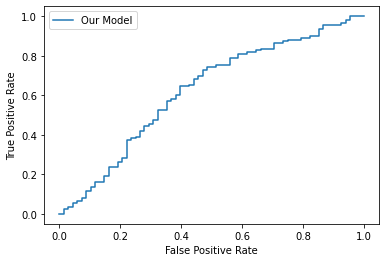

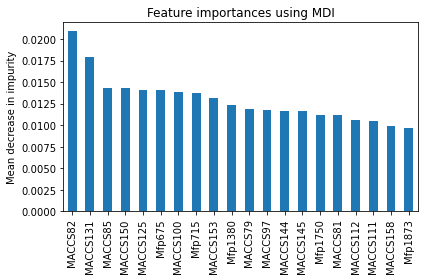

3
Best Threshold=0.619138
[[44 30]
 [38 65]]
              precision    recall  f1-score   support

           0       0.54      0.59      0.56        74
           1       0.68      0.63      0.66       103

    accuracy                           0.62       177
   macro avg       0.61      0.61      0.61       177
weighted avg       0.62      0.62      0.62       177

balanced_accuracy_score  0.6128312778798216
matthews_corrcoef  0.22321596118599632
Sensitivity 0.5945945945945946
Specificity 0.6310679611650486
f1 0.6565656565656567
LR+ 1.6116642958748224
ppv 0.6842105263157895
average_precision_score 0.7107893933161261
roc_auc_score 0.6822356336919444


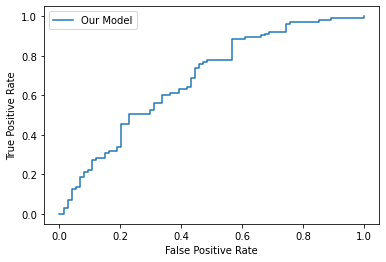

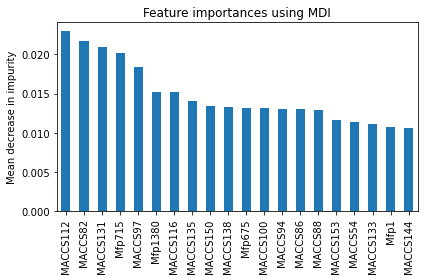

4
Best Threshold=0.564382
[[27 38]
 [25 87]]
              precision    recall  f1-score   support

           0       0.52      0.42      0.46        65
           1       0.70      0.78      0.73       112

    accuracy                           0.64       177
   macro avg       0.61      0.60      0.60       177
weighted avg       0.63      0.64      0.63       177

balanced_accuracy_score  0.5960851648351648
matthews_corrcoef  0.20337396066919572
Sensitivity 0.4153846153846154
Specificity 0.7767857142857143
f1 0.7341772151898734
LR+ 1.8609230769230771
ppv 0.696
average_precision_score 0.8108804576266703
roc_auc_score 0.704532967032967


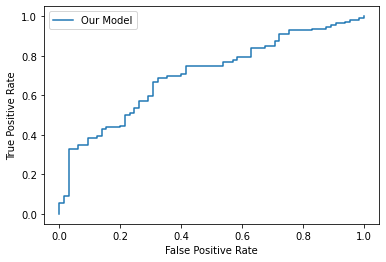

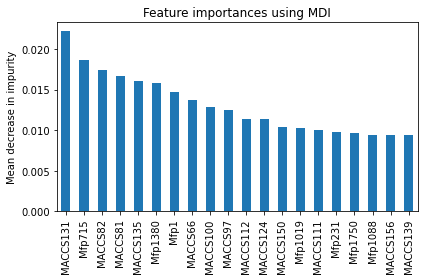

100%|███████████████████████████████████████████| 11/11 [10:12<00:00, 55.68s/it]


In [99]:
#Models to predict DILI with All : MACCS, Morgan
list_of_lists=[]
baseline=0.50
for i in tqdm(range(42,53)):
    
    print(i)
    outercv = KFold(n_splits=5, random_state=i, shuffle=True) 
    for split, (train_index, test_index) in enumerate(outercv.split(X_ncv)):
            
        print(split)
        X_train= X_ncv[train_index]
        y_train= y_ncv[train_index]

        X_test= X_ncv[test_index]
        y_test= y_ncv[test_index]

        inner_cv = KFold(n_splits=4, random_state=i, shuffle=True) 

        #Hyperparameter Optimisation
        rf = RandomForestClassifier(n_jobs=-1, random_state=i)
        # Instantiate the RandomHalving search model
        param_dist_grid = { 
                'max_depth': randint(5, 20),
                'max_features': randint(30, 50),
                'min_samples_leaf': randint(5, 15),
                'min_samples_split': randint(5, 15),
                'n_estimators':[200, 300, 400, 500, 600],
                'bootstrap': [True, False],
                'oob_score': [False],
                'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'n_jobs': [40],
                'class_weight' : [None, 'balanced_subsample', 'balanced']}

        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                    factor=2, random_state=i, n_jobs=40, verbose=0, cv = inner_cv)
        rsh.fit(X_train, y_train)
        classifier = rsh.best_estimator_
        classifier.fit(X_train, y_train)

        #Threshold Balancing
        cross_val_prob_cp = cross_val_predict(classifier, X_train, y_train, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_train, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))


        y_proba = classifier.predict_proba(X_test)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        print(classification_report(y_test, y_pred))
        ba =balanced_accuracy_score(y_test, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(y_test, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

        f1= metrics.f1_score(y_test, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_test, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_test, y_proba)
        print("average_precision_score", average_precision_score)

        auc= roc_auc_score(y_test, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_proba)
        # plot the roc curve for the model
        plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        if (auc>baseline):
                    # save
                    print("saving model")
                    baseline=auc
                    pickle.dump(classifier, open("dili_NCV_bestMfpMACCS_model.sav",  'wb'))


        importances = classifier.feature_importances_
        forest_importances = pd.Series(importances, index=test_feature_list)

        fig, ax = plt.subplots()
        forest_importances.sort_values(ascending=False)[:20].plot.bar()
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

        plt.show()

        metrics_row=["NCV",  "DILI", i, split, ba, mcc, Sensitivity, Specificity, auc, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(metrics_row)


In [100]:
results = pd.DataFrame(list_of_lists, columns=["NCV",  "DILI", "i", "split", "ba", "mcc", "Sensitivity"
                                                       , "Specificity", "auc", "f1", "pos_LR", "ppv", 
                                                       "average_precision_score"])
results["Features"] = "MfpMACCS"
results.to_csv("NCV_models_MfpMACCS.csv", index=False)
results

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0   NCV  DILI  42      0  0.626821  0.252068     0.784615     0.469027   
1   NCV  DILI  42      1  0.601359  0.190363     0.509804     0.692913   
2   NCV  DILI  42      2  0.639551  0.270839     0.615385     0.663717   
3   NCV  DILI  42      3  0.620411  0.241567     0.682927     0.557895   
4   NCV  DILI  42      4  0.619162  0.248240     0.461538     0.776786   
5   NCV  DILI  43      0  0.591920  0.170833     0.642857     0.540984   
6   NCV  DILI  43      1  0.604620  0.212302     0.518519     0.690722   
7   NCV  DILI  43      2  0.609485  0.205925     0.571429     0.647541   
8   NCV  DILI  43      3  0.628028  0.245295     0.650794     0.605263   
9   NCV  DILI  43      4  0.621032  0.244468     0.527778     0.714286   
10  NCV  DILI  44      0  0.656918  0.305664     0.746269     0.567568   
11  NCV  DILI  44      1  0.558525  0.112515     0.546875     0.570175   
12  NCV  DILI  44      2  0.685357  0.360670     0.776119     0.594595   
13  NCV  DILI  44      3  0.681179  0.341081     0.706897     0.655462   
14  NCV  DILI  44      4  0.549008  0.101313     0.402778     0.695238   
15  NCV  DILI  45      0  0.681469  0.349742     0.687500     0.675439   
16  NCV  DILI  45      1  0.599781  0.202407     0.506494     0.693069   
17  NCV  DILI  45      2  0.553936  0.100665     0.578947     0.528926   
18  NCV  DILI  45      3  0.602339  0.198319     0.555556     0.649123   
19  NCV  DILI  45      4  0.654003  0.299012     0.671642     0.636364   
20  NCV  DILI  46      0  0.609848  0.225427     0.469697     0.750000   
21  NCV  DILI  46      1  0.591525  0.175242     0.700000     0.483051   
22  NCV  DILI  46      2  0.678421  0.362004     0.569231     0.787611   
23  NCV  DILI  46      3  0.687431  0.361550     0.723077     0.651786   
24  NCV  DILI  46      4  0.602976  0.202344     0.625000     0.580952   
25  NCV  DILI  47      0  0.584759  0.168208     0.705882     0.463636   
26  NCV  DILI  47      1  0.613649  0.216157     0.568966     0.658333   
27  NCV  DILI  47      2  0.632888  0.268207     0.529412     0.736364   
28  NCV  DILI  47      3  0.650167  0.288376     0.730159     0.570175   
29  NCV  DILI  47      4  0.642639  0.293093     0.521127     0.764151   
30  NCV  DILI  48      0  0.612767  0.232252     0.460317     0.765217   
31  NCV  DILI  48      1  0.619399  0.237055     0.550725     0.688073   
32  NCV  DILI  48      2  0.715735  0.412883     0.761905     0.669565   
33  NCV  DILI  48      3  0.666196  0.329929     0.573770     0.758621   
34  NCV  DILI  48      4  0.592659  0.213986     0.347222     0.838095   
35  NCV  DILI  49      0  0.565378  0.125500     0.578125     0.552632   
36  NCV  DILI  49      1  0.562302  0.123747     0.485714     0.638889   
37  NCV  DILI  49      2  0.654369  0.308738     0.600000     0.708738   
38  NCV  DILI  49      3  0.663649  0.300200     0.754717     0.572581   
39  NCV  DILI  49      4  0.656634  0.306562     0.772727     0.540541   
40  NCV  DILI  50      0  0.587782  0.171986     0.491803     0.683761   
41  NCV  DILI  50      1  0.607216  0.207804     0.692308     0.522124   
42  NCV  DILI  50      2  0.656764  0.310114     0.653333     0.660194   
43  NCV  DILI  50      3  0.649415  0.293497     0.647887     0.650943   
44  NCV  DILI  50      4  0.623377  0.261659     0.428571     0.818182   
45  NCV  DILI  51      0  0.651872  0.295241     0.676471     0.627273   
46  NCV  DILI  51      1  0.627005  0.247605     0.617647     0.636364   
47  NCV  DILI  51      2  0.641247  0.288926     0.527778     0.754717   
48  NCV  DILI  51      3  0.653595  0.300618     0.529412     0.777778   
49  NCV  DILI  51      4  0.600040  0.195868     0.579710     0.620370   
50  NCV  DILI  52      0  0.626390  0.241847     0.709677     0.543103   
51  NCV  DILI  52      1  0.641931  0.271676     0.779661     0.504202   
52  NCV  DILI  52      2  0.623797  0.248308     0.529412     0.718182   
53  NCV 

In [101]:
results.describe()

i      split         ba        mcc  Sensitivity  Specificity  \
count  55.000000  55.000000  55.000000  55.000000    55.000000    55.000000   
mean   47.000000   2.000000   0.625230   0.246663     0.600839     0.649621   
std     3.191424   1.427248   0.036311   0.069872     0.108359     0.092271   
min    42.000000   0.000000   0.549008   0.100665     0.347222     0.463636   
25%    44.000000   1.000000   0.601849   0.202890     0.527778     0.571378   
50%    47.000000   2.000000   0.623377   0.245295     0.579710     0.651786   
75%    50.000000   3.000000   0.652733   0.297127     0.689904     0.711512   
max    52.000000   4.000000   0.715735   0.412883     0.784615     0.838095   

             auc         f1     pos_LR        ppv  average_precision_score  
count  55.000000  55.000000  55.000000  55.000000                55.000000  
mean    0.680429   0.685737   1.777392   0.738064                 0.764472  
std     0.040949   0.051681   0.324264   0.052118                 0.043967  
min     0.597177   0.563536   1.228994   0.629310                 0.675198  
25%     0.648274   0.652226   1.554209   0.703051                 0.735156  
50%     0.681903   0.690000   1.725746   0.729167                 0.762280  
75%     0.716214   0.727273   1.984362   0.774854                 0.793979  
max     0.763699   0.790323   2.680128   0.845238                 0.869705

In [102]:
loaded_rf = pickle.load(open("dili_NCV_bestMfpMACCS_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(bootstrap=False, max_depth=16, max_features=33,
                       min_samples_leaf=8, min_samples_split=11,
                       n_estimators=200, n_jobs=40, random_state=42)

Best Threshold=0.564842
[[ 23  44]
 [ 41 115]]
              precision    recall  f1-score   support

           0       0.36      0.34      0.35        67
           1       0.72      0.74      0.73       156

    accuracy                           0.62       223
   macro avg       0.54      0.54      0.54       223
weighted avg       0.61      0.62      0.62       223

balanced_accuracy_score  0.5402315346345197
matthews_corrcoef  0.08154695447245423
Sensitivity 0.34328358208955223
Specificity 0.7371794871794872
f1 0.7301587301587301
LR+ 1.306152165999272
ppv 0.7232704402515723
average_precision_score 0.7616856713719652
roc_auc_score 0.5698430922311518


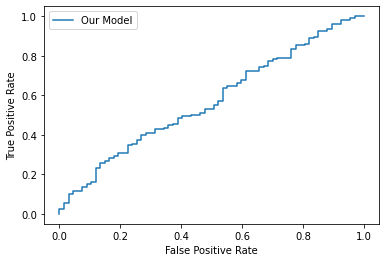

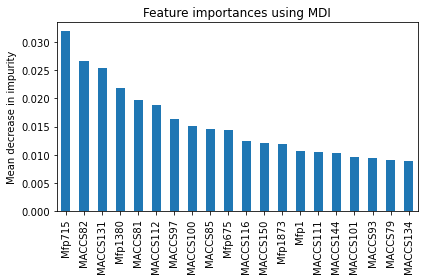

In [103]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)

average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
print("average_precision_score", average_precision_score)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [104]:
#Final model released on all data
loaded_rf = pickle.load(open("dili_NCV_bestMfpMACCS_model.sav", 'rb'))
params = loaded_rf.get_params()
    
final_classifier= RandomForestClassifier(**params)
final_classifier.fit(X_dili, y_dili)
pickle.dump(final_classifier, open("final_dili_bestMfpMACCS_model.sav",  'wb'))

In [105]:
#Mordred and PhysicoChemical model

In [106]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [107]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [108]:
test_dili_all = pd.concat([test_data_heldouttest, test_data_ncv]).reset_index(drop=True)
test_dili_all

smiles_r  TOXICITY  \
0        C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1         1   
1                                    CC1OC1[P](=O)(=O)O         1   
2                    CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1         1   
3     COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...         1   
4                    CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21         1   
...                                                 ...       ...   
1106         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1         0   
1107  CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...         0   
1108                         CCC(c1cccc(O)c1)C(C)CN(C)C         0   
1109                                     CC(N)Cc1ccccc1         0   
1110                              C[N+](C)(C)CC(=O)[O-]         0   

      Source_rank                              Source  Data  \
0               1         DILIst Classification  Oral  DILI   
1               1         DILIst Classification  Oral  DILI   
2               1         DILIst Classification  Oral  DILI   
3               1         DILIst Classification  Oral  DILI   
4               1         DILIst Classification  Oral  DILI   
...           ...                                 ...   ...   
1106            1             DILIst Classification    DILI   
1107            1  DILIst Classification  Intravenous  DILI   
1108            1         DILIst Classification  Oral  DILI   
1109            1         DILIst Classification  Oral  DILI   
1110            1         DILIst Classification  Oral  DILI   

                         InChIKey      InChIKey14  \
0     AAKJLRGGTJKAMG-UHFFFAOYSA-N  AAKJLRGGTJKAMG   
1     UJNUDOLLRRCQDH-UHFFFAOYSA-N  UJNUDOLLRRCQDH   
2     UNAANXDKBXWMLN-UHFFFAOYSA-N  UNAANXDKBXWMLN   
3     UXOWGYHJODZGMF-UHFFFAOYSA-N  UXOWGYHJODZGMF   
4     VGKDLMBJGBXTGI-UHFFFAOYSA-N  VGKDLMBJGBXTGI   
...                           ...             ...   
1106  KYRVNWMVYQXFEU-UHFFFAOYSA-N  KYRVNWMVYQXFEU   
1107  KXNPVXPOPUZYGB-UHFFFAOYSA-N  KXNPVXPOPUZYGB   
1108  KWTWDQCKEHXFFR-UHFFFAOYSA-N  KWTWDQCKEHXFFR   
1109  KWTSXDURSIMDCE-UHFFFAOYSA-N  KWTSXDURSIMDCE   
1110  KWIUHFFTVRNATP-UHFFFAOYSA-N  KWIUHFFTVRNATP   

                                    protonated_smiles_r        ABC      ABCGG  \
0        C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1  21.798990  16.570489   
1                                    CC1OC1[P](=O)(=O)O   6.140950   6.624294   
2                CC(C)CC([NH+](C)C)C1(c2ccc(Cl)cc2)CCC1  14.525425  13.493219   
3     COCCCOc1cc(CC(CC([NH3+])C(O)CC(C(=O)NCC(C)(C)C...  28.615700  24.127835   
4               C[NH2+]C1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21  15.572928  12.623559   
...                                                 ...        ...        ...   
1106         COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1  16.360915  13.772089   
1107  CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...  26.942267  21.807837   
1108                     CCC(c1cccc(O)c1)C(C)C[NH+](C)C  11.670387  10.989759   
1109                                CC([NH3+])Cc1ccccc1   7.289847   6.783462   
1110                              C[N+](C)(C)CC(=O)[O-]   5.645283   5.873928   

      ...  median pMolar total plasma concentration         3         5  \
0     ...                                  5.992269  0.557014  0.456931   
1     ...                                  3.857602  0.350417  0.254330   
2     ...                                  6.538902  0.322297  0.636731   
3     ...                                  6.467869  0.595764  0.176782   
4     ...                                  6.091766  0.708626  0.679524   
...   ...                                       ...       ...       ...   
1106  ...                                  5.241611  0.732836  0.500677   
1107  ...                                  5.653729  0.711124  0.155374   
1108  ...                                  6.116869  0.185916  0.241239   
1109  ...                                  6.057551  0.301023  0.163379   
1110  ...                 

In [109]:
y_dili = np.array(test_dili_all['TOXICITY'])
test_features= test_dili_all[selected_mordred_features+list(physicochemical_features)]

test_feature_list = list(test_features.columns)
X_dili = np.array(test_features)

In [110]:
test_feature_list = list(test_feature_list)
test_feature_list

['ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpDiam_A',
 'SpAD_A',
 'LogEE_A',
 'VE1_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe',
 'ATS6pe',
 'ATS7pe',
 'ATS8pe',
 'ATS0are',
 'ATS1are',
 'ATS2are',
 'ATS3are',
 'ATS4are',
 'ATS5are',
 'ATS6a

In [111]:
len(test_feature_list)

668

In [112]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

print((X_dili).shape)
print(len(y_dili)) 

(888, 668)
(223, 668)
888
223
(1111, 668)
1111


  0%|                                                    | 0/11 [00:00<?, ?it/s]

42
0
Best Threshold=0.611793
[[38 27]
 [37 76]]
              precision    recall  f1-score   support

           0       0.51      0.58      0.54        65
           1       0.74      0.67      0.70       113

    accuracy                           0.64       178
   macro avg       0.62      0.63      0.62       178
weighted avg       0.65      0.64      0.64       178

balanced_accuracy_score  0.6285908781484003
matthews_corrcoef  0.25077648673079955
Sensitivity 0.5846153846153846
Specificity 0.672566371681416
f1 0.7037037037037037
LR+ 1.7854469854469859
ppv 0.7378640776699029
average_precision_score 0.7769712513915753
roc_auc_score 0.6639891082368957


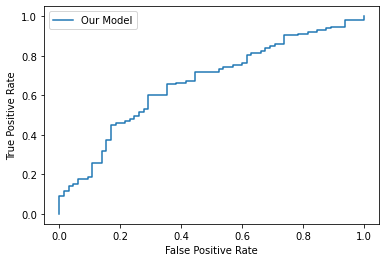

saving model


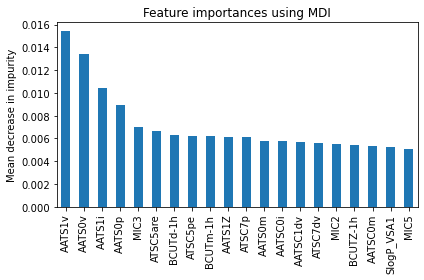

1
Best Threshold=0.609054
[[32 19]
 [41 86]]
              precision    recall  f1-score   support

           0       0.44      0.63      0.52        51
           1       0.82      0.68      0.74       127

    accuracy                           0.66       178
   macro avg       0.63      0.65      0.63       178
weighted avg       0.71      0.66      0.68       178

balanced_accuracy_score  0.6523081673614328
matthews_corrcoef  0.2800167799482819
Sensitivity 0.6274509803921569
Specificity 0.6771653543307087
f1 0.7413793103448276
LR+ 1.9435676709708274
ppv 0.819047619047619
average_precision_score 0.8458209945648223
roc_auc_score 0.7051103906129379


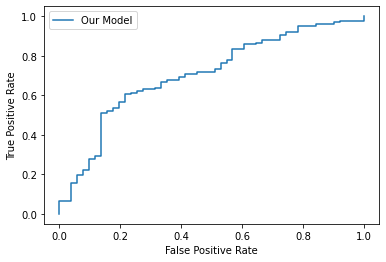

saving model


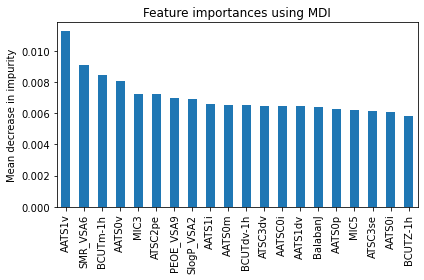

2
Best Threshold=0.625146
[[37 28]
 [38 75]]
              precision    recall  f1-score   support

           0       0.49      0.57      0.53        65
           1       0.73      0.66      0.69       113

    accuracy                           0.63       178
   macro avg       0.61      0.62      0.61       178
weighted avg       0.64      0.63      0.63       178

balanced_accuracy_score  0.6164737916950307
matthews_corrcoef  0.22714588078157652
Sensitivity 0.5692307692307692
Specificity 0.6637168141592921
f1 0.6944444444444445
LR+ 1.6927125506072875
ppv 0.7281553398058253
average_precision_score 0.7573216984500191
roc_auc_score 0.6645336963921035


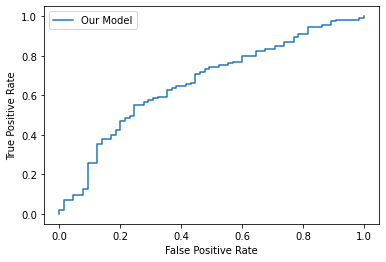

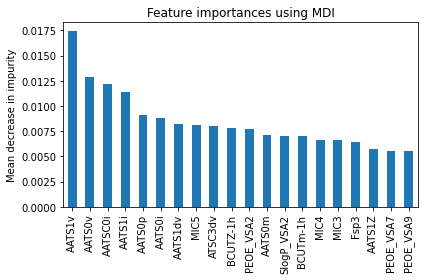

3
Best Threshold=0.665469
[[58 24]
 [33 62]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        82
           1       0.72      0.65      0.69        95

    accuracy                           0.68       177
   macro avg       0.68      0.68      0.68       177
weighted avg       0.68      0.68      0.68       177

balanced_accuracy_score  0.6799743260590501
matthews_corrcoef  0.35911980673795957
Sensitivity 0.7073170731707317
Specificity 0.6526315789473685
f1 0.6850828729281767
LR+ 2.0362158167036215
ppv 0.7209302325581395
average_precision_score 0.7011408348976902
roc_auc_score 0.7074454428754814


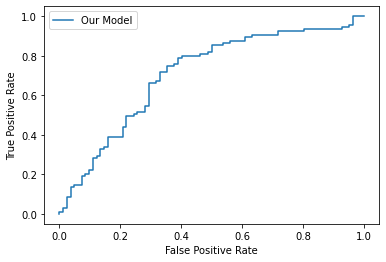

saving model


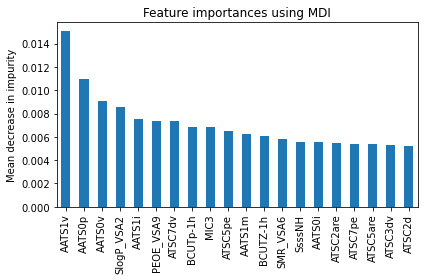

4
Best Threshold=0.590603
[[30 35]
 [38 74]]
              precision    recall  f1-score   support

           0       0.44      0.46      0.45        65
           1       0.68      0.66      0.67       112

    accuracy                           0.59       177
   macro avg       0.56      0.56      0.56       177
weighted avg       0.59      0.59      0.59       177

balanced_accuracy_score  0.5611263736263736
matthews_corrcoef  0.12115925986626755
Sensitivity 0.46153846153846156
Specificity 0.6607142857142857
f1 0.669683257918552
LR+ 1.360323886639676
ppv 0.6788990825688074
average_precision_score 0.7544760237272765
roc_auc_score 0.6435439560439561


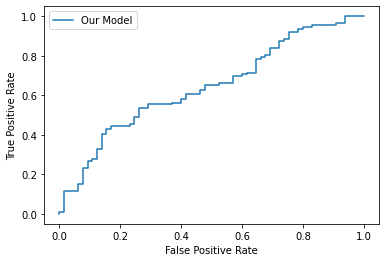

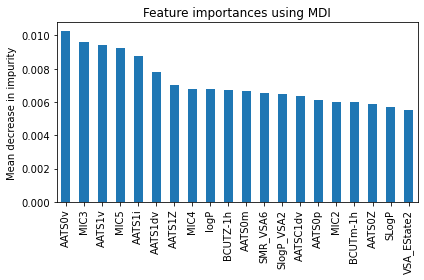

  9%|████                                        | 1/11 [00:54<09:04, 54.48s/it]

43
0
Best Threshold=0.625124
[[34 22]
 [43 79]]
              precision    recall  f1-score   support

           0       0.44      0.61      0.51        56
           1       0.78      0.65      0.71       122

    accuracy                           0.63       178
   macro avg       0.61      0.63      0.61       178
weighted avg       0.68      0.63      0.65       178

balanced_accuracy_score  0.6273419203747073
matthews_corrcoef  0.2387092619221108
Sensitivity 0.6071428571428571
Specificity 0.6475409836065574
f1 0.7085201793721972
LR+ 1.7225913621262459
ppv 0.7821782178217822
average_precision_score 0.7966131547270578
roc_auc_score 0.6687646370023419


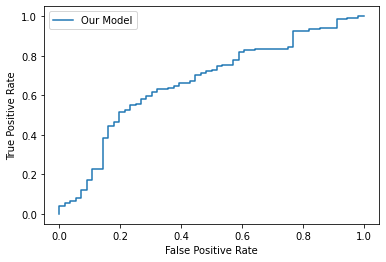

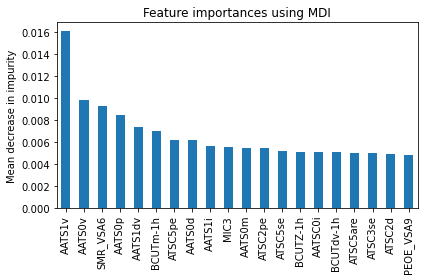

1
Best Threshold=0.665528
[[58 23]
 [40 57]]
              precision    recall  f1-score   support

           0       0.59      0.72      0.65        81
           1       0.71      0.59      0.64        97

    accuracy                           0.65       178
   macro avg       0.65      0.65      0.65       178
weighted avg       0.66      0.65      0.65       178

balanced_accuracy_score  0.6518391243477154
matthews_corrcoef  0.30400731340795517
Sensitivity 0.7160493827160493
Specificity 0.5876288659793815
f1 0.6440677966101694
LR+ 1.7364197530864198
ppv 0.7125
average_precision_score 0.7075794723616026
roc_auc_score 0.6609392898052692


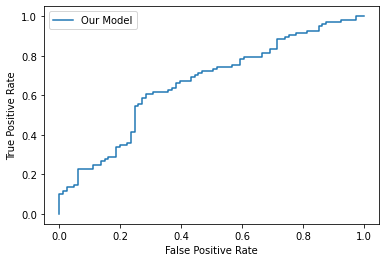

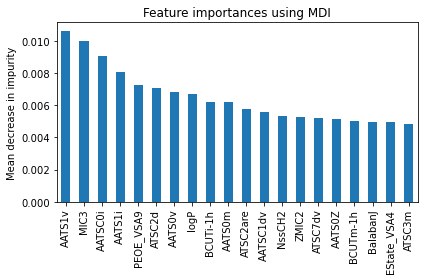

2
Best Threshold=0.603836
[[32 24]
 [44 78]]
              precision    recall  f1-score   support

           0       0.42      0.57      0.48        56
           1       0.76      0.64      0.70       122

    accuracy                           0.62       178
   macro avg       0.59      0.61      0.59       178
weighted avg       0.66      0.62      0.63       178

balanced_accuracy_score  0.6053864168618267
matthews_corrcoef  0.1978707870548831
Sensitivity 0.5714285714285714
Specificity 0.639344262295082
f1 0.6964285714285714
LR+ 1.5844155844155845
ppv 0.7647058823529411
average_precision_score 0.7816090822955395
roc_auc_score 0.6598360655737705


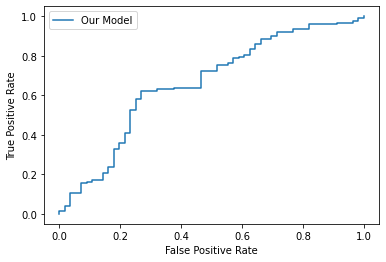

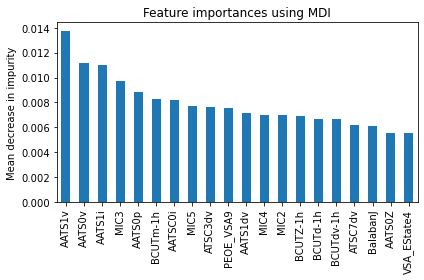

3
Best Threshold=0.678317
[[47 16]
 [49 65]]
              precision    recall  f1-score   support

           0       0.49      0.75      0.59        63
           1       0.80      0.57      0.67       114

    accuracy                           0.63       177
   macro avg       0.65      0.66      0.63       177
weighted avg       0.69      0.63      0.64       177

balanced_accuracy_score  0.6581035923141186
matthews_corrcoef  0.3038899291341476
Sensitivity 0.746031746031746
Specificity 0.5701754385964912
f1 0.6666666666666667
LR+ 1.7356656948493683
ppv 0.8024691358024691
average_precision_score 0.8066093318902409
roc_auc_score 0.7080200501253132


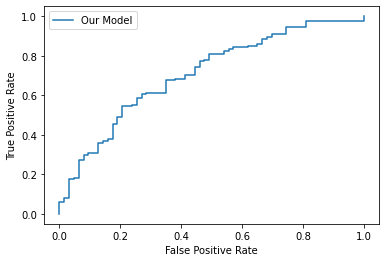

saving model


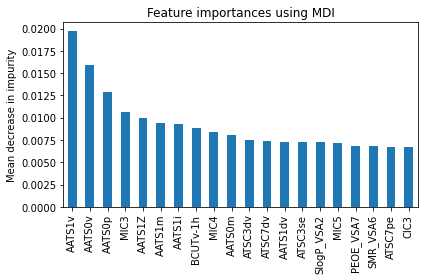

4
Best Threshold=0.644444
[[52 20]
 [38 67]]
              precision    recall  f1-score   support

           0       0.58      0.72      0.64        72
           1       0.77      0.64      0.70       105

    accuracy                           0.67       177
   macro avg       0.67      0.68      0.67       177
weighted avg       0.69      0.67      0.68       177

balanced_accuracy_score  0.6801587301587302
matthews_corrcoef  0.3540505916444364
Sensitivity 0.7222222222222222
Specificity 0.638095238095238
f1 0.6979166666666666
LR+ 1.995614035087719
ppv 0.7701149425287356
average_precision_score 0.7554015000749699
roc_auc_score 0.6974867724867725


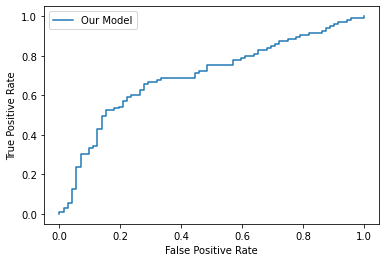

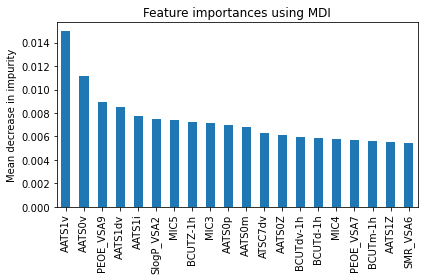

 18%|████████                                    | 2/11 [01:49<08:11, 54.63s/it]

44
0
Best Threshold=0.624618
[[44 23]
 [39 72]]
              precision    recall  f1-score   support

           0       0.53      0.66      0.59        67
           1       0.76      0.65      0.70       111

    accuracy                           0.65       178
   macro avg       0.64      0.65      0.64       178
weighted avg       0.67      0.65      0.66       178

balanced_accuracy_score  0.6526825332795483
matthews_corrcoef  0.29656329248522584
Sensitivity 0.6567164179104478
Specificity 0.6486486486486487
f1 0.6990291262135923
LR+ 1.8691159586681978
ppv 0.7578947368421053
average_precision_score 0.7986724854285923
roc_auc_score 0.7006857603872529


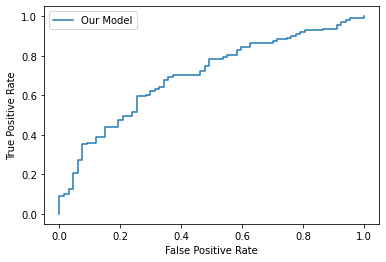

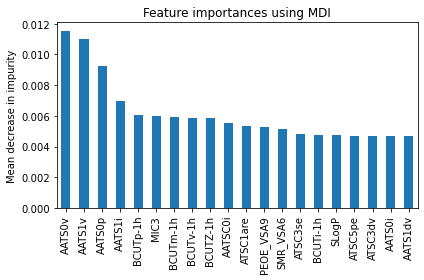

1
Best Threshold=0.613580
[[36 28]
 [38 76]]
              precision    recall  f1-score   support

           0       0.49      0.56      0.52        64
           1       0.73      0.67      0.70       114

    accuracy                           0.63       178
   macro avg       0.61      0.61      0.61       178
weighted avg       0.64      0.63      0.63       178

balanced_accuracy_score  0.6145833333333333
matthews_corrcoef  0.22313172911481802
Sensitivity 0.5625
Specificity 0.6666666666666666
f1 0.6972477064220183
LR+ 1.6874999999999998
ppv 0.7307692307692307
average_precision_score 0.7291038787813001
roc_auc_score 0.6222587719298245


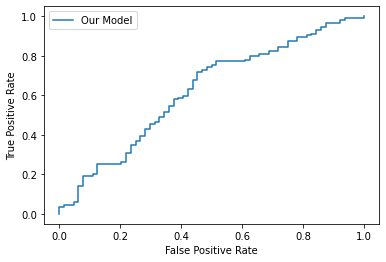

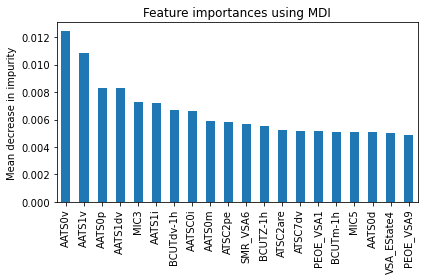

2
Best Threshold=0.618845
[[42 25]
 [30 81]]
              precision    recall  f1-score   support

           0       0.58      0.63      0.60        67
           1       0.76      0.73      0.75       111

    accuracy                           0.69       178
   macro avg       0.67      0.68      0.68       178
weighted avg       0.70      0.69      0.69       178

balanced_accuracy_score  0.6782977006857605
matthews_corrcoef  0.35201036224899684
Sensitivity 0.6268656716417911
Specificity 0.7297297297297297
f1 0.7465437788018433
LR+ 2.319402985074627
ppv 0.7641509433962265
average_precision_score 0.7865612309310307
roc_auc_score 0.7399489041280086


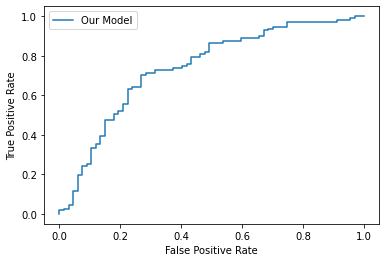

saving model


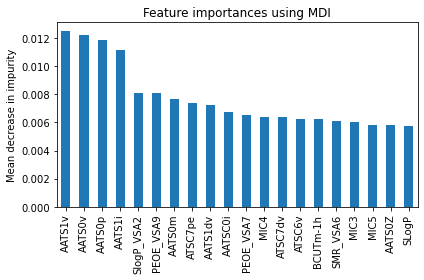

3
Best Threshold=0.642486
[[41 17]
 [39 80]]
              precision    recall  f1-score   support

           0       0.51      0.71      0.59        58
           1       0.82      0.67      0.74       119

    accuracy                           0.68       177
   macro avg       0.67      0.69      0.67       177
weighted avg       0.72      0.68      0.69       177

balanced_accuracy_score  0.6895827296435816
matthews_corrcoef  0.3575900158741855
Sensitivity 0.7068965517241379
Specificity 0.6722689075630253
f1 0.7407407407407408
LR+ 2.1569407603890367
ppv 0.8247422680412371
average_precision_score 0.830091682804476
roc_auc_score 0.7397855694001739


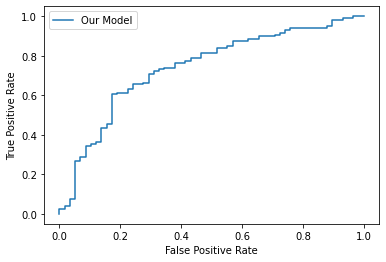

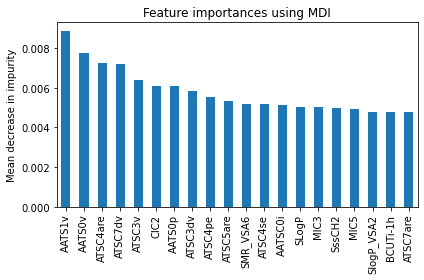

4
Best Threshold=0.623655
[[42 30]
 [40 65]]
              precision    recall  f1-score   support

           0       0.51      0.58      0.55        72
           1       0.68      0.62      0.65       105

    accuracy                           0.60       177
   macro avg       0.60      0.60      0.60       177
weighted avg       0.61      0.60      0.61       177

balanced_accuracy_score  0.6011904761904763
matthews_corrcoef  0.1993709160065119
Sensitivity 0.5833333333333334
Specificity 0.6190476190476191
f1 0.6500000000000001
LR+ 1.5312500000000002
ppv 0.6842105263157895
average_precision_score 0.7255406618084967
roc_auc_score 0.6376984126984127


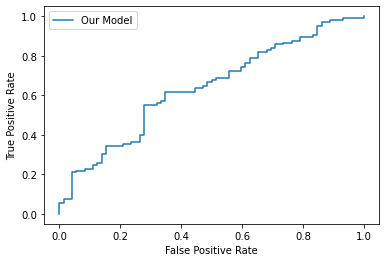

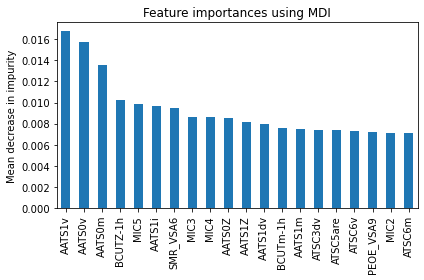

 27%|████████████                                | 3/11 [02:48<07:33, 56.65s/it]

45
0
Best Threshold=0.604923
[[32 32]
 [29 85]]
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        64
           1       0.73      0.75      0.74       114

    accuracy                           0.66       178
   macro avg       0.63      0.62      0.62       178
weighted avg       0.65      0.66      0.66       178

balanced_accuracy_score  0.6228070175438596
matthews_corrcoef  0.2483348922365578
Sensitivity 0.5
Specificity 0.7456140350877193
f1 0.735930735930736
LR+ 1.9655172413793103
ppv 0.7264957264957265
average_precision_score 0.7284939851858493
roc_auc_score 0.6711896929824561


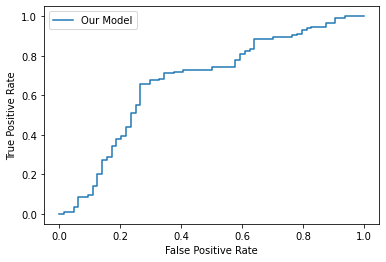

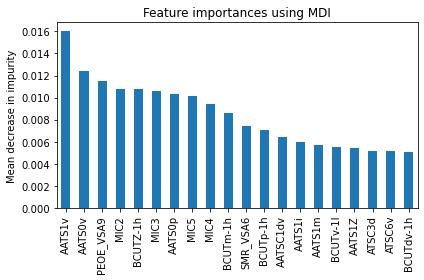

1
Best Threshold=0.626581
[[40 37]
 [30 71]]
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        77
           1       0.66      0.70      0.68       101

    accuracy                           0.62       178
   macro avg       0.61      0.61      0.61       178
weighted avg       0.62      0.62      0.62       178

balanced_accuracy_score  0.6112254082551112
matthews_corrcoef  0.2256208109616209
Sensitivity 0.5194805194805194
Specificity 0.7029702970297029
f1 0.6794258373205742
LR+ 1.7489177489177485
ppv 0.6574074074074074
average_precision_score 0.7366441732715775
roc_auc_score 0.6721100681496721


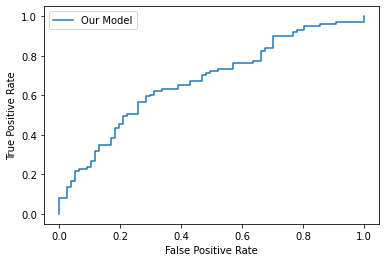

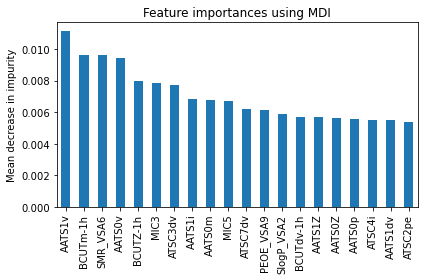

2
Best Threshold=0.517913
[[30 27]
 [39 82]]
              precision    recall  f1-score   support

           0       0.43      0.53      0.48        57
           1       0.75      0.68      0.71       121

    accuracy                           0.63       178
   macro avg       0.59      0.60      0.59       178
weighted avg       0.65      0.63      0.64       178

balanced_accuracy_score  0.6020008699434536
matthews_corrcoef  0.19535574620056048
Sensitivity 0.5263157894736842
Specificity 0.6776859504132231
f1 0.7130434782608697
LR+ 1.6329284750337378
ppv 0.7522935779816514
average_precision_score 0.7915926423050332
roc_auc_score 0.6481078729882557


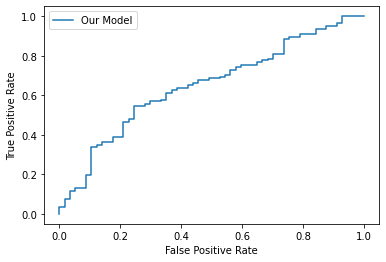

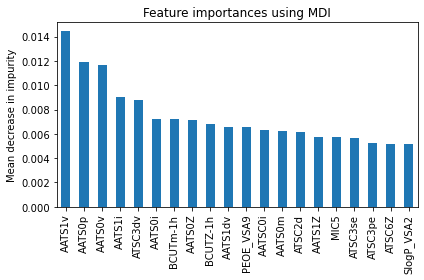

3
Best Threshold=0.582120
[[30 33]
 [29 85]]
              precision    recall  f1-score   support

           0       0.51      0.48      0.49        63
           1       0.72      0.75      0.73       114

    accuracy                           0.65       177
   macro avg       0.61      0.61      0.61       177
weighted avg       0.64      0.65      0.65       177

balanced_accuracy_score  0.6109022556390977
matthews_corrcoef  0.2252817784447915
Sensitivity 0.47619047619047616
Specificity 0.7456140350877193
f1 0.7327586206896551
LR+ 1.8719211822660096
ppv 0.7203389830508474
average_precision_score 0.790346796351367
roc_auc_score 0.6824004455583403


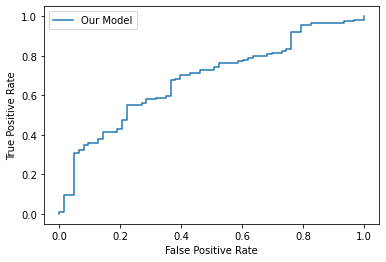

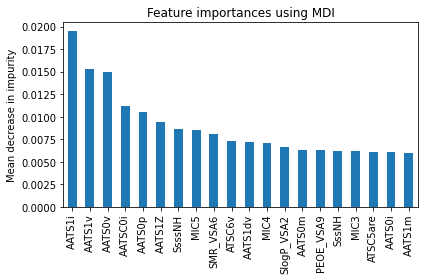

4
Best Threshold=0.594614
[[48 19]
 [44 66]]
              precision    recall  f1-score   support

           0       0.52      0.72      0.60        67
           1       0.78      0.60      0.68       110

    accuracy                           0.64       177
   macro avg       0.65      0.66      0.64       177
weighted avg       0.68      0.64      0.65       177

balanced_accuracy_score  0.6582089552238806
matthews_corrcoef  0.30717893166166266
Sensitivity 0.7164179104477612
Specificity 0.6
f1 0.676923076923077
LR+ 1.7910447761194028
ppv 0.7764705882352941
average_precision_score 0.8075485864815972
roc_auc_score 0.728493894165536


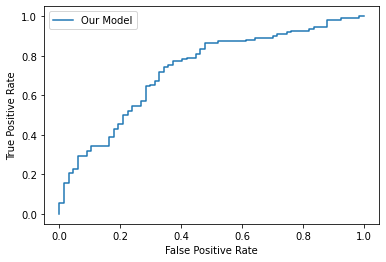

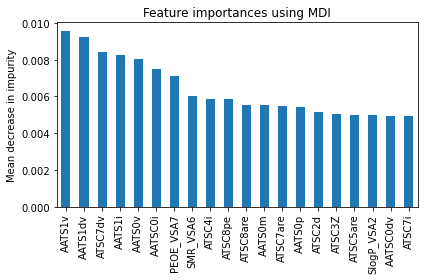

 36%|████████████████                            | 4/11 [03:48<06:46, 58.04s/it]

46
0
Best Threshold=0.609210
[[32 34]
 [25 87]]
              precision    recall  f1-score   support

           0       0.56      0.48      0.52        66
           1       0.72      0.78      0.75       112

    accuracy                           0.67       178
   macro avg       0.64      0.63      0.63       178
weighted avg       0.66      0.67      0.66       178

balanced_accuracy_score  0.6308170995670996
matthews_corrcoef  0.2708603140330303
Sensitivity 0.48484848484848486
Specificity 0.7767857142857143
f1 0.7467811158798283
LR+ 2.1721212121212123
ppv 0.71900826446281
average_precision_score 0.7665744718151268
roc_auc_score 0.6735660173160174


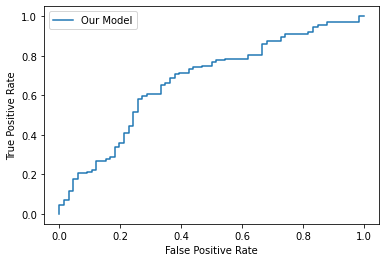

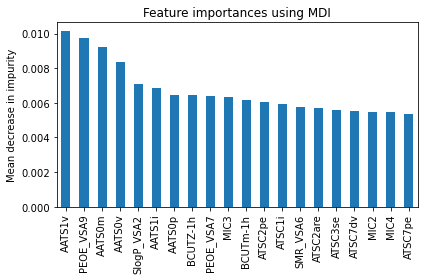

1
Best Threshold=0.637172
[[41 19]
 [55 63]]
              precision    recall  f1-score   support

           0       0.43      0.68      0.53        60
           1       0.77      0.53      0.63       118

    accuracy                           0.58       178
   macro avg       0.60      0.61      0.58       178
weighted avg       0.65      0.58      0.59       178

balanced_accuracy_score  0.6086158192090396
matthews_corrcoef  0.20601420368458187
Sensitivity 0.6833333333333333
Specificity 0.5338983050847458
f1 0.63
LR+ 1.466060606060606
ppv 0.7682926829268293
average_precision_score 0.7387717313059329
roc_auc_score 0.6216101694915255


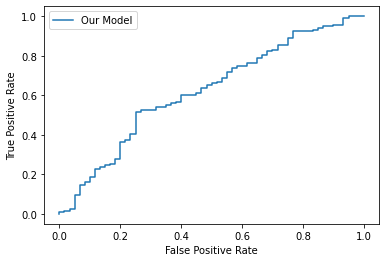

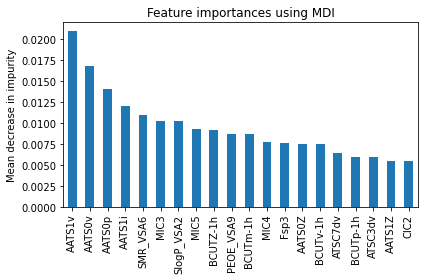

2
Best Threshold=0.673711
[[55 10]
 [56 57]]
              precision    recall  f1-score   support

           0       0.50      0.85      0.62        65
           1       0.85      0.50      0.63       113

    accuracy                           0.63       178
   macro avg       0.67      0.68      0.63       178
weighted avg       0.72      0.63      0.63       178

balanced_accuracy_score  0.675289312457454
matthews_corrcoef  0.3484034465452292
Sensitivity 0.8461538461538461
Specificity 0.504424778761062
f1 0.6333333333333333
LR+ 1.7074175824175823
ppv 0.8507462686567164
average_precision_score 0.7988725358149726
roc_auc_score 0.7339686861810757


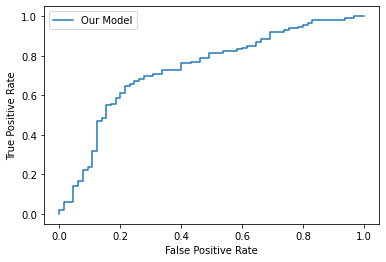

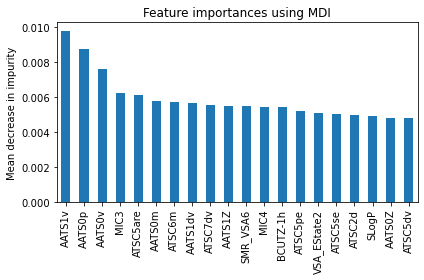

3
Best Threshold=0.666215
[[51 14]
 [43 69]]
              precision    recall  f1-score   support

           0       0.54      0.78      0.64        65
           1       0.83      0.62      0.71       112

    accuracy                           0.68       177
   macro avg       0.69      0.70      0.67       177
weighted avg       0.73      0.68      0.68       177

balanced_accuracy_score  0.7003434065934067
matthews_corrcoef  0.3870506191142453
Sensitivity 0.7846153846153846
Specificity 0.6160714285714286
f1 0.7076923076923078
LR+ 2.0436493738819324
ppv 0.8313253012048193
average_precision_score 0.8431664199139726
roc_auc_score 0.7527472527472527


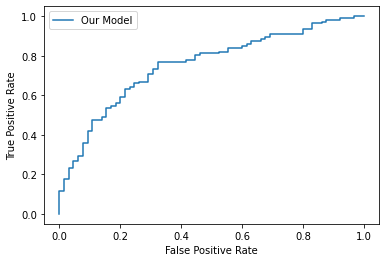

saving model


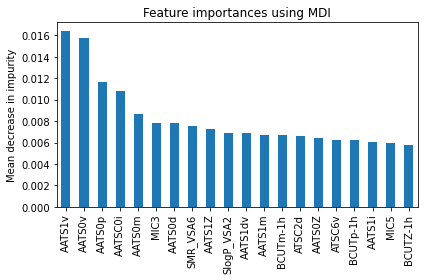

4
Best Threshold=0.640288
[[46 26]
 [44 61]]
              precision    recall  f1-score   support

           0       0.51      0.64      0.57        72
           1       0.70      0.58      0.64       105

    accuracy                           0.60       177
   macro avg       0.61      0.61      0.60       177
weighted avg       0.62      0.60      0.61       177

balanced_accuracy_score  0.609920634920635
matthews_corrcoef  0.21601765173019577
Sensitivity 0.6388888888888888
Specificity 0.580952380952381
f1 0.6354166666666667
LR+ 1.5246212121212122
ppv 0.7011494252873564
average_precision_score 0.6655483234454861
roc_auc_score 0.6048941798941799


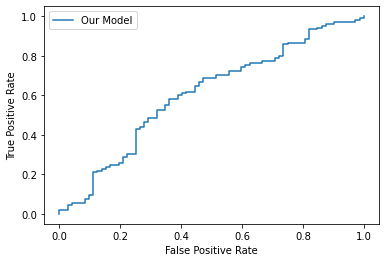

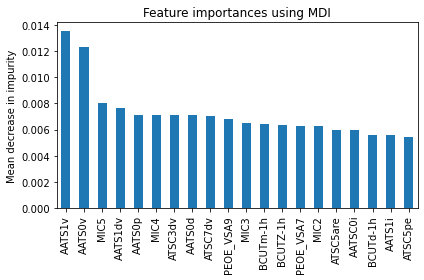

 45%|████████████████████                        | 5/11 [04:52<06:00, 60.16s/it]

47
0
Best Threshold=0.598649
[[40 28]
 [32 78]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.57        68
           1       0.74      0.71      0.72       110

    accuracy                           0.66       178
   macro avg       0.65      0.65      0.65       178
weighted avg       0.67      0.66      0.66       178

balanced_accuracy_score  0.6486631016042781
matthews_corrcoef  0.29435051712336974
Sensitivity 0.5882352941176471
Specificity 0.7090909090909091
f1 0.7222222222222221
LR+ 2.022058823529412
ppv 0.7358490566037735
average_precision_score 0.7302171868491849
roc_auc_score 0.659090909090909


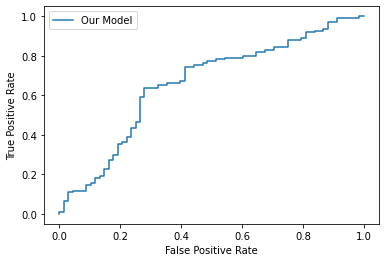

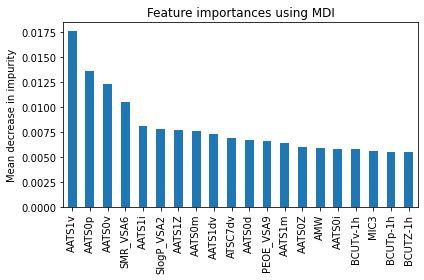

1
Best Threshold=0.613671
[[34 24]
 [40 80]]
              precision    recall  f1-score   support

           0       0.46      0.59      0.52        58
           1       0.77      0.67      0.71       120

    accuracy                           0.64       178
   macro avg       0.61      0.63      0.61       178
weighted avg       0.67      0.64      0.65       178

balanced_accuracy_score  0.6264367816091954
matthews_corrcoef  0.24047809256172753
Sensitivity 0.5862068965517241
Specificity 0.6666666666666666
f1 0.7142857142857142
LR+ 1.7586206896551722
ppv 0.7692307692307693
average_precision_score 0.7855911765930956
roc_auc_score 0.6669540229885057


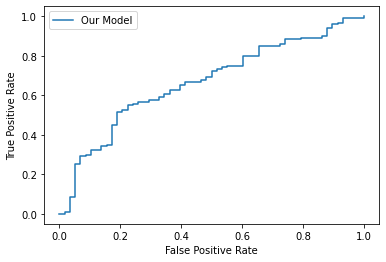

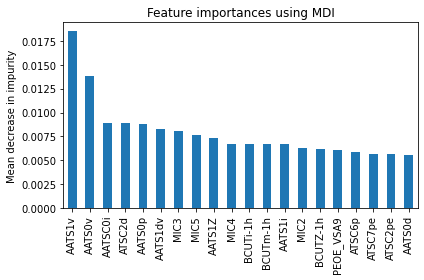

2
Best Threshold=0.605940
[[41 27]
 [30 80]]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        68
           1       0.75      0.73      0.74       110

    accuracy                           0.68       178
   macro avg       0.66      0.67      0.66       178
weighted avg       0.68      0.68      0.68       178

balanced_accuracy_score  0.6651069518716577
matthews_corrcoef  0.3276612555877177
Sensitivity 0.6029411764705882
Specificity 0.7272727272727273
f1 0.7373271889400922
LR+ 2.2107843137254903
ppv 0.7476635514018691
average_precision_score 0.7530730552619312
roc_auc_score 0.6895721925133691


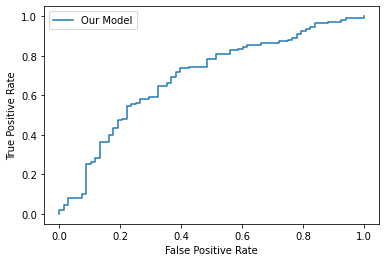

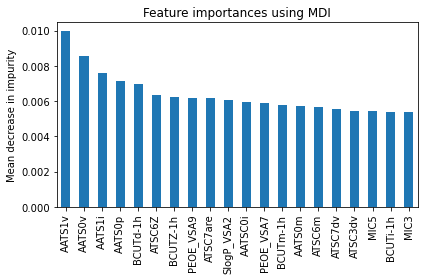

3
Best Threshold=0.578739
[[36 27]
 [34 80]]
              precision    recall  f1-score   support

           0       0.51      0.57      0.54        63
           1       0.75      0.70      0.72       114

    accuracy                           0.66       177
   macro avg       0.63      0.64      0.63       177
weighted avg       0.66      0.66      0.66       177

balanced_accuracy_score  0.6365914786967418
matthews_corrcoef  0.26750714960087596
Sensitivity 0.5714285714285714
Specificity 0.7017543859649122
f1 0.7239819004524887
LR+ 1.9159663865546215
ppv 0.7476635514018691
average_precision_score 0.7800546707180007
roc_auc_score 0.6876914508493456


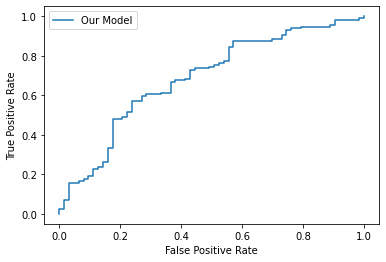

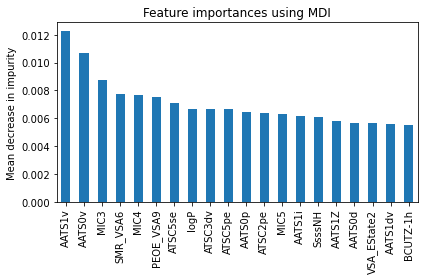

4
Best Threshold=0.634840
[[40 31]
 [40 66]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        71
           1       0.68      0.62      0.65       106

    accuracy                           0.60       177
   macro avg       0.59      0.59      0.59       177
weighted avg       0.61      0.60      0.60       177

balanced_accuracy_score  0.5930108955620516
matthews_corrcoef  0.18319561244554125
Sensitivity 0.5633802816901409
Specificity 0.6226415094339622
f1 0.6502463054187193
LR+ 1.4929577464788732
ppv 0.6804123711340206
average_precision_score 0.7114013843284851
roc_auc_score 0.6521392505979272


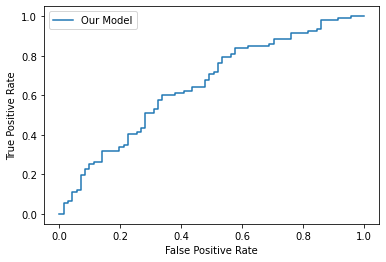

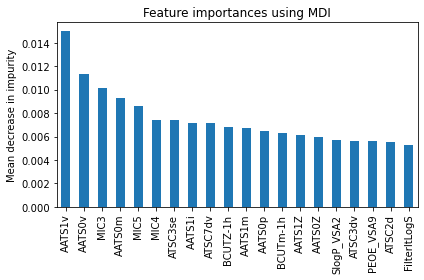

 55%|████████████████████████                    | 6/11 [05:47<04:52, 58.48s/it]

48
0
Best Threshold=0.570498
[[32 31]
 [41 74]]
              precision    recall  f1-score   support

           0       0.44      0.51      0.47        63
           1       0.70      0.64      0.67       115

    accuracy                           0.60       178
   macro avg       0.57      0.58      0.57       178
weighted avg       0.61      0.60      0.60       178

balanced_accuracy_score  0.5757073844030365
matthews_corrcoef  0.1472079799183196
Sensitivity 0.5079365079365079
Specificity 0.6434782608695652
f1 0.6727272727272727
LR+ 1.4246999612853268
ppv 0.7047619047619048
average_precision_score 0.7297085654438682
roc_auc_score 0.6008281573498966


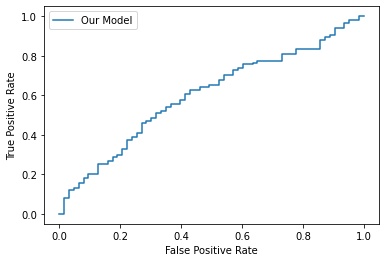

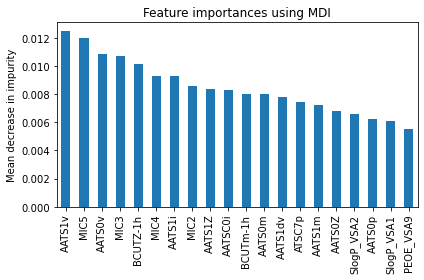

1
Best Threshold=0.593111
[[33 36]
 [29 80]]
              precision    recall  f1-score   support

           0       0.53      0.48      0.50        69
           1       0.69      0.73      0.71       109

    accuracy                           0.63       178
   macro avg       0.61      0.61      0.61       178
weighted avg       0.63      0.63      0.63       178

balanced_accuracy_score  0.6061029118468289
matthews_corrcoef  0.21700525622952074
Sensitivity 0.4782608695652174
Specificity 0.7339449541284404
f1 0.7111111111111111
LR+ 1.7976011994003003
ppv 0.6896551724137931
average_precision_score 0.7427563880363153
roc_auc_score 0.6636085626911314


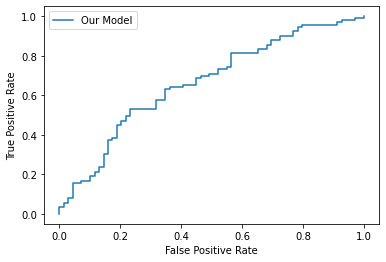

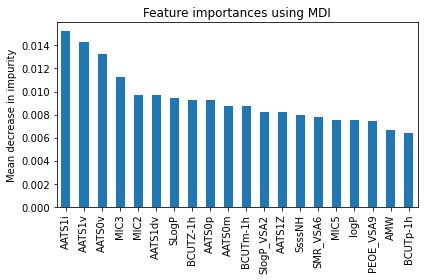

2
Best Threshold=0.547834
[[39 24]
 [34 81]]
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        63
           1       0.77      0.70      0.74       115

    accuracy                           0.67       178
   macro avg       0.65      0.66      0.65       178
weighted avg       0.69      0.67      0.68       178

balanced_accuracy_score  0.6616977225672878
matthews_corrcoef  0.31441048035425967
Sensitivity 0.6190476190476191
Specificity 0.7043478260869566
f1 0.7363636363636363
LR+ 2.093837535014006
ppv 0.7714285714285715
average_precision_score 0.8073170107672234
roc_auc_score 0.7133195307108351


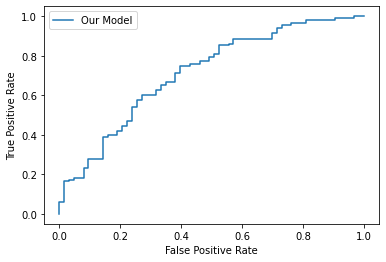

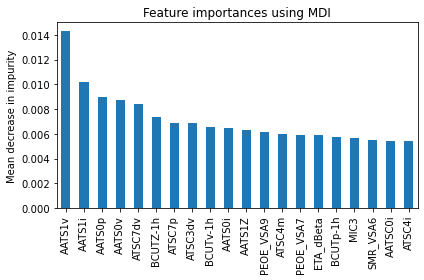

3
Best Threshold=0.531076
[[37 24]
 [32 84]]
              precision    recall  f1-score   support

           0       0.54      0.61      0.57        61
           1       0.78      0.72      0.75       116

    accuracy                           0.68       177
   macro avg       0.66      0.67      0.66       177
weighted avg       0.69      0.68      0.69       177

balanced_accuracy_score  0.6653476540418315
matthews_corrcoef  0.32224450633334284
Sensitivity 0.6065573770491803
Specificity 0.7241379310344828
f1 0.75
LR+ 2.1987704918032787
ppv 0.7777777777777778
average_precision_score 0.8120619140597016
roc_auc_score 0.7139626907857546


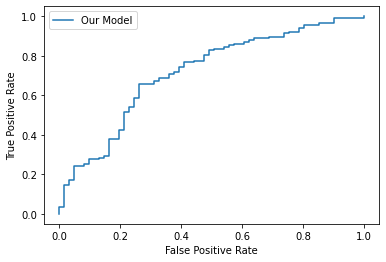

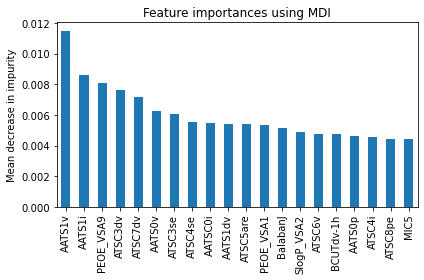

4
Best Threshold=0.609645
[[48 24]
 [40 65]]
              precision    recall  f1-score   support

           0       0.55      0.67      0.60        72
           1       0.73      0.62      0.67       105

    accuracy                           0.64       177
   macro avg       0.64      0.64      0.64       177
weighted avg       0.66      0.64      0.64       177

balanced_accuracy_score  0.6428571428571428
matthews_corrcoef  0.280709114364843
Sensitivity 0.6666666666666666
Specificity 0.6190476190476191
f1 0.6701030927835052
LR+ 1.75
ppv 0.7303370786516854
average_precision_score 0.726307901997091
roc_auc_score 0.6746031746031746


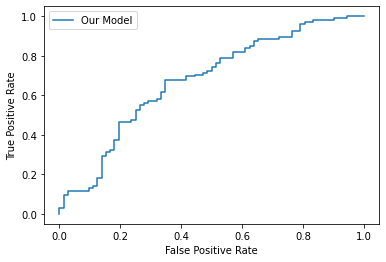

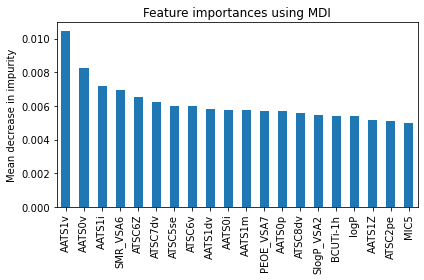

 64%|████████████████████████████                | 7/11 [06:48<03:56, 59.16s/it]

49
0
Best Threshold=0.592222
[[44 20]
 [49 65]]
              precision    recall  f1-score   support

           0       0.47      0.69      0.56        64
           1       0.76      0.57      0.65       114

    accuracy                           0.61       178
   macro avg       0.62      0.63      0.61       178
weighted avg       0.66      0.61      0.62       178

balanced_accuracy_score  0.6288377192982456
matthews_corrcoef  0.24755089422643803
Sensitivity 0.6875
Specificity 0.5701754385964912
f1 0.6532663316582914
LR+ 1.5994897959183674
ppv 0.7647058823529411
average_precision_score 0.735900642437024
roc_auc_score 0.629111842105263


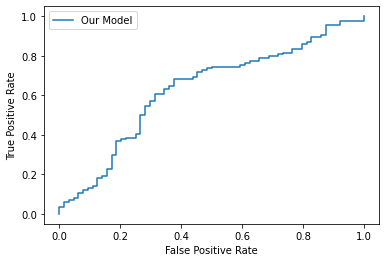

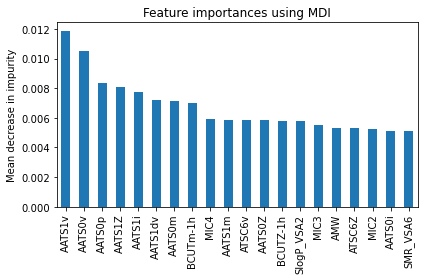

1
Best Threshold=0.628747
[[39 31]
 [34 74]]
              precision    recall  f1-score   support

           0       0.53      0.56      0.55        70
           1       0.70      0.69      0.69       108

    accuracy                           0.63       178
   macro avg       0.62      0.62      0.62       178
weighted avg       0.64      0.63      0.64       178

balanced_accuracy_score  0.6211640211640213
matthews_corrcoef  0.24066253776500604
Sensitivity 0.5571428571428572
Specificity 0.6851851851851852
f1 0.6948356807511737
LR+ 1.7697478991596642
ppv 0.7047619047619048
average_precision_score 0.748440545858957
roc_auc_score 0.6712962962962964


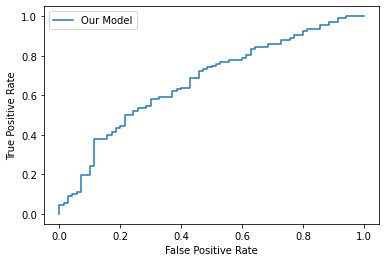

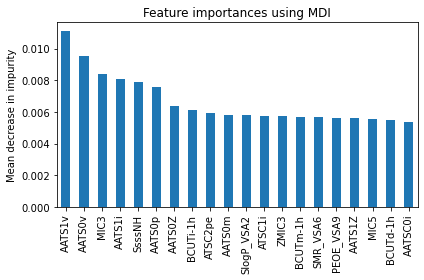

2
Best Threshold=0.640274
[[47 28]
 [27 76]]
              precision    recall  f1-score   support

           0       0.64      0.63      0.63        75
           1       0.73      0.74      0.73       103

    accuracy                           0.69       178
   macro avg       0.68      0.68      0.68       178
weighted avg       0.69      0.69      0.69       178

balanced_accuracy_score  0.6822653721682848
matthews_corrcoef  0.36521690932803075
Sensitivity 0.6266666666666667
Specificity 0.7378640776699029
f1 0.7342995169082126
LR+ 2.3906172839506175
ppv 0.7307692307692307
average_precision_score 0.7303516068398747
roc_auc_score 0.7106796116504854


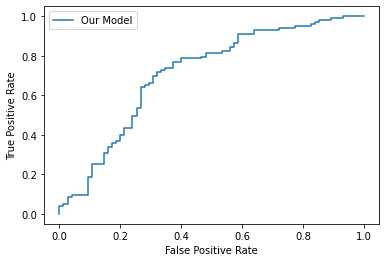

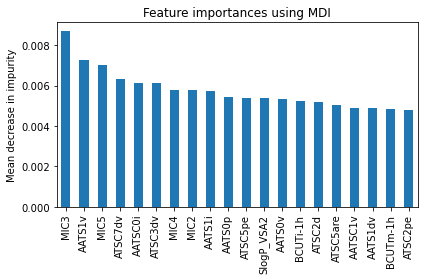

3
Best Threshold=0.593879
[[38 15]
 [49 75]]
              precision    recall  f1-score   support

           0       0.44      0.72      0.54        53
           1       0.83      0.60      0.70       124

    accuracy                           0.64       177
   macro avg       0.64      0.66      0.62       177
weighted avg       0.71      0.64      0.65       177

balanced_accuracy_score  0.6609099208764455
matthews_corrcoef  0.29483613764206207
Sensitivity 0.7169811320754716
Specificity 0.6048387096774194
f1 0.7009345794392523
LR+ 1.8144012321909895
ppv 0.8333333333333334
average_precision_score 0.813303261875481
roc_auc_score 0.6950699939135727


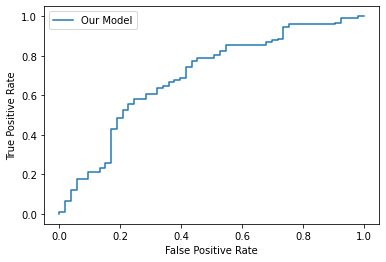

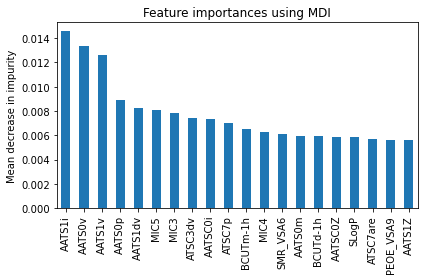

4
Best Threshold=0.610372
[[43 23]
 [39 72]]
              precision    recall  f1-score   support

           0       0.52      0.65      0.58        66
           1       0.76      0.65      0.70       111

    accuracy                           0.65       177
   macro avg       0.64      0.65      0.64       177
weighted avg       0.67      0.65      0.66       177

balanced_accuracy_score  0.6500819000819
matthews_corrcoef  0.29108715627702914
Sensitivity 0.6515151515151515
Specificity 0.6486486486486487
f1 0.6990291262135923
LR+ 1.8543123543123545
ppv 0.7578947368421053
average_precision_score 0.7511340209330817
roc_auc_score 0.6767676767676767


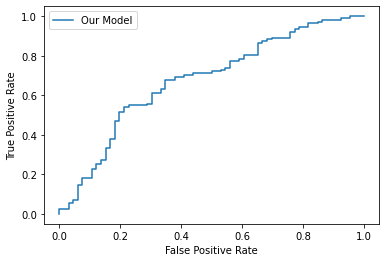

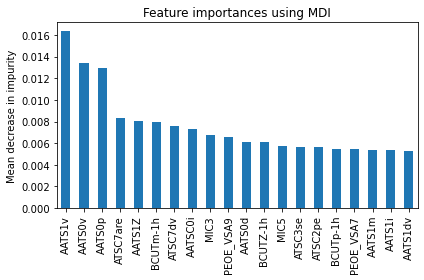

 73%|████████████████████████████████            | 8/11 [07:46<02:56, 58.78s/it]

50
0
Best Threshold=0.505898
[[27 34]
 [32 85]]
              precision    recall  f1-score   support

           0       0.46      0.44      0.45        61
           1       0.71      0.73      0.72       117

    accuracy                           0.63       178
   macro avg       0.59      0.58      0.59       178
weighted avg       0.63      0.63      0.63       178

balanced_accuracy_score  0.5845593386576993
matthews_corrcoef  0.17051003172431778
Sensitivity 0.4426229508196721
Specificity 0.7264957264957265
f1 0.7203389830508475
LR+ 1.6183401639344261
ppv 0.7142857142857143
average_precision_score 0.7503369743176294
roc_auc_score 0.6417262154967074


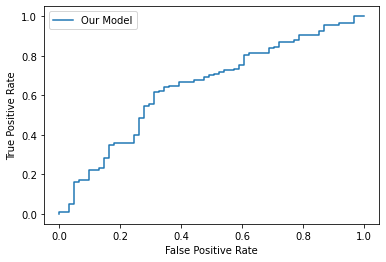

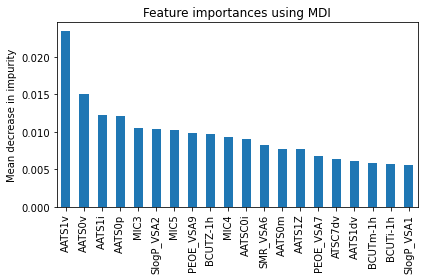

1
Best Threshold=0.476831
[[30 35]
 [28 85]]
              precision    recall  f1-score   support

           0       0.52      0.46      0.49        65
           1       0.71      0.75      0.73       113

    accuracy                           0.65       178
   macro avg       0.61      0.61      0.61       178
weighted avg       0.64      0.65      0.64       178

balanced_accuracy_score  0.6068754254594962
matthews_corrcoef  0.2195832115016843
Sensitivity 0.46153846153846156
Specificity 0.7522123893805309
f1 0.7296137339055794
LR+ 1.8626373626373625
ppv 0.7083333333333334
average_precision_score 0.7522876436876366
roc_auc_score 0.6465622872702519


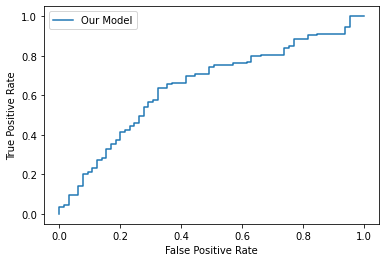

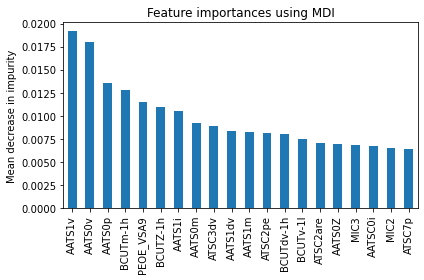

2
Best Threshold=0.561276
[[52 23]
 [37 66]]
              precision    recall  f1-score   support

           0       0.58      0.69      0.63        75
           1       0.74      0.64      0.69       103

    accuracy                           0.66       178
   macro avg       0.66      0.67      0.66       178
weighted avg       0.68      0.66      0.67       178

balanced_accuracy_score  0.6670550161812299
matthews_corrcoef  0.32995047191337307
Sensitivity 0.6933333333333334
Specificity 0.6407766990291263
f1 0.6875
LR+ 1.9300900900900904
ppv 0.7415730337078652
average_precision_score 0.7544031261007847
roc_auc_score 0.728284789644013


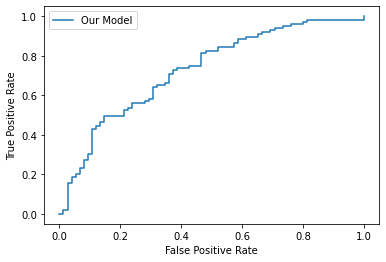

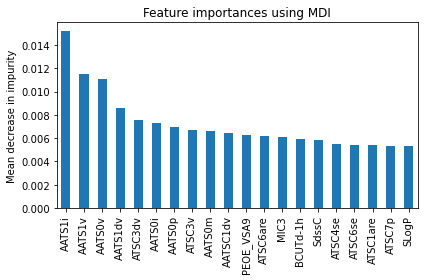

3
Best Threshold=0.568354
[[46 25]
 [38 68]]
              precision    recall  f1-score   support

           0       0.55      0.65      0.59        71
           1       0.73      0.64      0.68       106

    accuracy                           0.64       177
   macro avg       0.64      0.64      0.64       177
weighted avg       0.66      0.64      0.65       177

balanced_accuracy_score  0.644698378952963
matthews_corrcoef  0.2840499068023385
Sensitivity 0.647887323943662
Specificity 0.6415094339622641
f1 0.6834170854271355
LR+ 1.8072646404744255
ppv 0.7311827956989247
average_precision_score 0.7425802336722415
roc_auc_score 0.6850916821684827


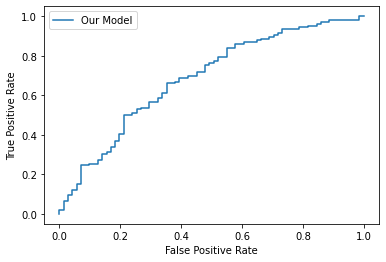

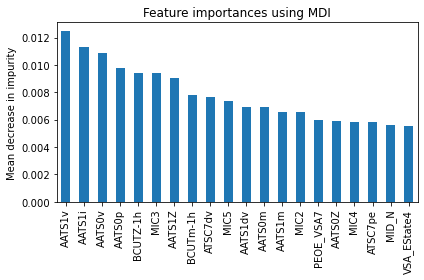

4
Best Threshold=0.557331
[[27 29]
 [26 95]]
              precision    recall  f1-score   support

           0       0.51      0.48      0.50        56
           1       0.77      0.79      0.78       121

    accuracy                           0.69       177
   macro avg       0.64      0.63      0.64       177
weighted avg       0.68      0.69      0.69       177

balanced_accuracy_score  0.633633412042503
matthews_corrcoef  0.2713832094682838
Sensitivity 0.48214285714285715
Specificity 0.7851239669421488
f1 0.7755102040816327
LR+ 2.243818681318682
ppv 0.7661290322580645
average_precision_score 0.8071522683969504
roc_auc_score 0.689344746162928


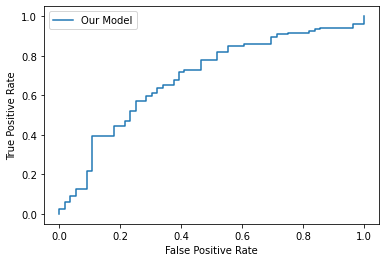

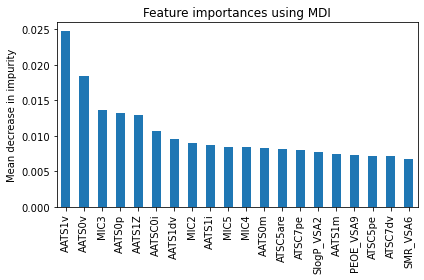

 82%|████████████████████████████████████        | 9/11 [08:43<01:56, 58.20s/it]

51
0
Best Threshold=0.505486
[[32 36]
 [26 84]]
              precision    recall  f1-score   support

           0       0.55      0.47      0.51        68
           1       0.70      0.76      0.73       110

    accuracy                           0.65       178
   macro avg       0.63      0.62      0.62       178
weighted avg       0.64      0.65      0.65       178

balanced_accuracy_score  0.6171122994652407
matthews_corrcoef  0.24281677299564317
Sensitivity 0.47058823529411764
Specificity 0.7636363636363637
f1 0.7304347826086957
LR+ 1.9909502262443441
ppv 0.7
average_precision_score 0.7383740224240734
roc_auc_score 0.679946524064171


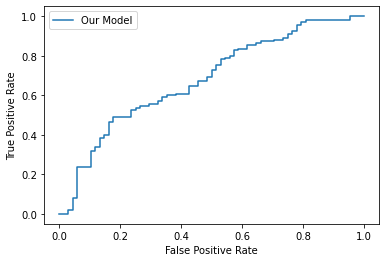

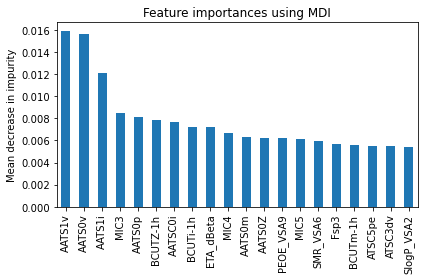

1
Best Threshold=0.606147
[[49 19]
 [40 70]]
              precision    recall  f1-score   support

           0       0.55      0.72      0.62        68
           1       0.79      0.64      0.70       110

    accuracy                           0.67       178
   macro avg       0.67      0.68      0.66       178
weighted avg       0.70      0.67      0.67       178

balanced_accuracy_score  0.678475935828877
matthews_corrcoef  0.34687296754716024
Sensitivity 0.7205882352941176
Specificity 0.6363636363636364
f1 0.7035175879396984
LR+ 1.9816176470588234
ppv 0.7865168539325843
average_precision_score 0.7769283133823763
roc_auc_score 0.7089572192513369


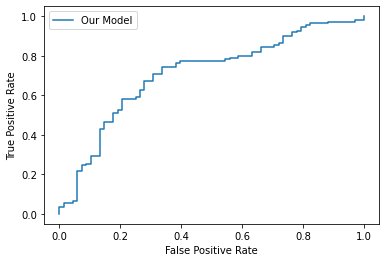

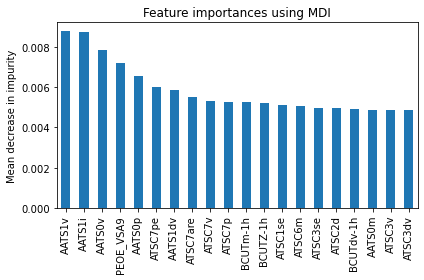

2
Best Threshold=0.584150
[[50 22]
 [41 65]]
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        72
           1       0.75      0.61      0.67       106

    accuracy                           0.65       178
   macro avg       0.65      0.65      0.64       178
weighted avg       0.67      0.65      0.65       178

balanced_accuracy_score  0.6538259958071279
matthews_corrcoef  0.3020637357930894
Sensitivity 0.6944444444444444
Specificity 0.6132075471698113
f1 0.6735751295336787
LR+ 1.795392953929539
ppv 0.7471264367816092
average_precision_score 0.7917192930439868
roc_auc_score 0.7215670859538784


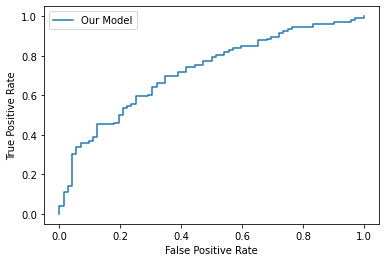

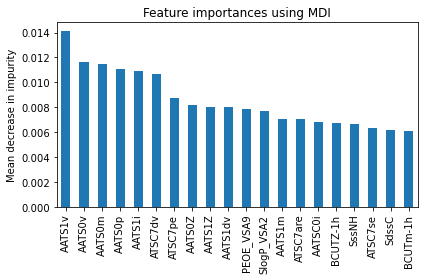

3
Best Threshold=0.616033
[[35 16]
 [42 84]]
              precision    recall  f1-score   support

           0       0.45      0.69      0.55        51
           1       0.84      0.67      0.74       126

    accuracy                           0.67       177
   macro avg       0.65      0.68      0.65       177
weighted avg       0.73      0.67      0.69       177

balanced_accuracy_score  0.6764705882352942
matthews_corrcoef  0.32242397437432735
Sensitivity 0.6862745098039216
Specificity 0.6666666666666666
f1 0.743362831858407
LR+ 2.0588235294117645
ppv 0.84
average_precision_score 0.8591604436597982
roc_auc_score 0.721444133208839


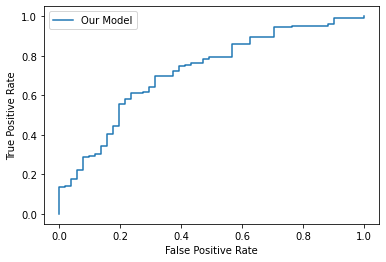

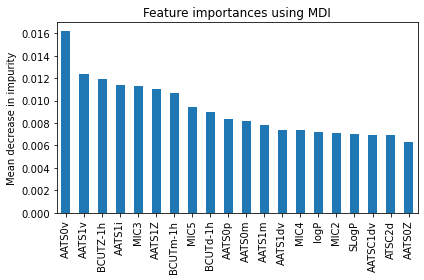

4
Best Threshold=0.674835
[[42 27]
 [45 63]]
              precision    recall  f1-score   support

           0       0.48      0.61      0.54        69
           1       0.70      0.58      0.64       108

    accuracy                           0.59       177
   macro avg       0.59      0.60      0.59       177
weighted avg       0.62      0.59      0.60       177

balanced_accuracy_score  0.5960144927536233
matthews_corrcoef  0.1873364687500491
Sensitivity 0.6086956521739131
Specificity 0.5833333333333334
f1 0.6363636363636365
LR+ 1.4608695652173915
ppv 0.7
average_precision_score 0.6827283106860653
roc_auc_score 0.628690284487386


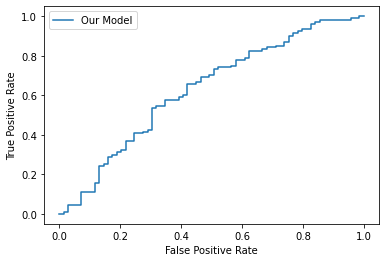

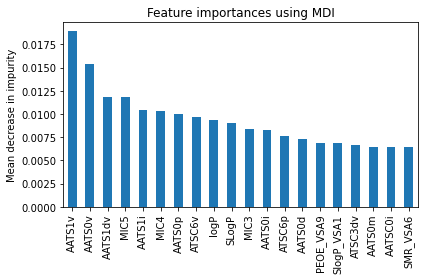

 91%|███████████████████████████████████████    | 10/11 [09:46<00:59, 59.79s/it]

52
0
Best Threshold=0.618516
[[36 26]
 [40 76]]
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        62
           1       0.75      0.66      0.70       116

    accuracy                           0.63       178
   macro avg       0.61      0.62      0.61       178
weighted avg       0.65      0.63      0.64       178

balanced_accuracy_score  0.6179087875417131
matthews_corrcoef  0.22714026416612146
Sensitivity 0.5806451612903226
Specificity 0.6551724137931034
f1 0.6972477064220184
LR+ 1.6838709677419355
ppv 0.7450980392156863
average_precision_score 0.7670792846983041
roc_auc_score 0.6507230255839823


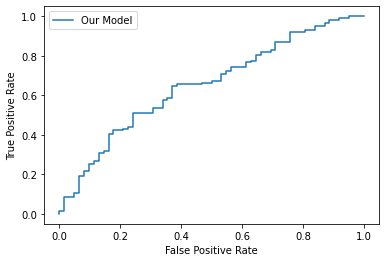

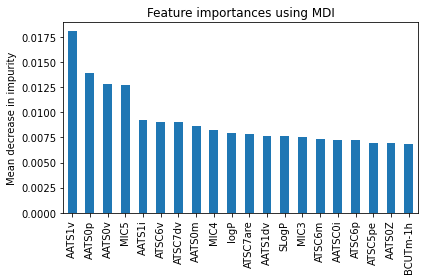

1
Best Threshold=0.520317
[[33 26]
 [39 80]]
              precision    recall  f1-score   support

           0       0.46      0.56      0.50        59
           1       0.75      0.67      0.71       119

    accuracy                           0.63       178
   macro avg       0.61      0.62      0.61       178
weighted avg       0.66      0.63      0.64       178

balanced_accuracy_score  0.6157954707306652
matthews_corrcoef  0.22212726736192587
Sensitivity 0.559322033898305
Specificity 0.6722689075630253
f1 0.7111111111111111
LR+ 1.7066492829204696
ppv 0.7547169811320755
average_precision_score 0.777071455945981
roc_auc_score 0.6501922803019512


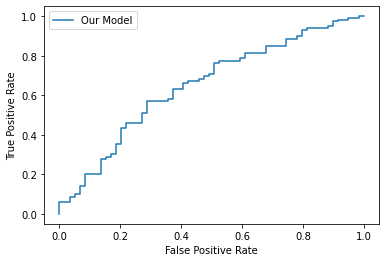

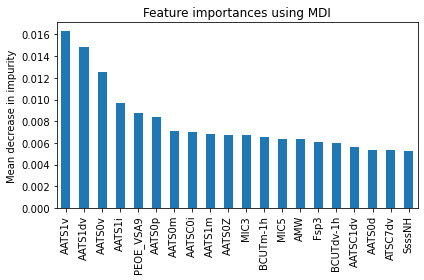

2
Best Threshold=0.595657
[[39 29]
 [33 77]]
              precision    recall  f1-score   support

           0       0.54      0.57      0.56        68
           1       0.73      0.70      0.71       110

    accuracy                           0.65       178
   macro avg       0.63      0.64      0.64       178
weighted avg       0.66      0.65      0.65       178

balanced_accuracy_score  0.6367647058823529
matthews_corrcoef  0.2707918876054022
Sensitivity 0.5735294117647058
Specificity 0.7
f1 0.7129629629629629
LR+ 1.9117647058823526
ppv 0.7264150943396226
average_precision_score 0.7373516774154436
roc_auc_score 0.6684491978609625


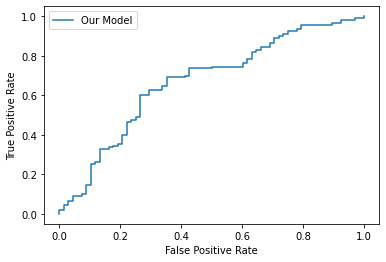

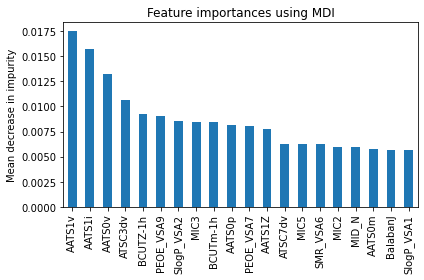

3
Best Threshold=0.663631
[[53 21]
 [48 55]]
              precision    recall  f1-score   support

           0       0.52      0.72      0.61        74
           1       0.72      0.53      0.61       103

    accuracy                           0.61       177
   macro avg       0.62      0.63      0.61       177
weighted avg       0.64      0.61      0.61       177

balanced_accuracy_score  0.625098399370244
matthews_corrcoef  0.24931518900843458
Sensitivity 0.7162162162162162
Specificity 0.5339805825242718
f1 0.6145251396648046
LR+ 1.5368806306306306
ppv 0.7236842105263158
average_precision_score 0.7279656272179512
roc_auc_score 0.6918131723956967


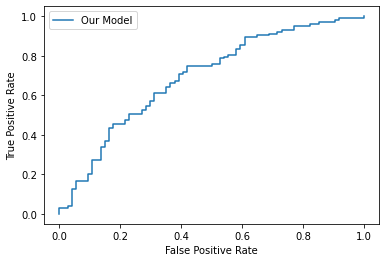

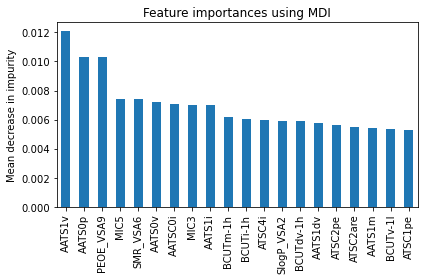

4
Best Threshold=0.660626
[[45 20]
 [38 74]]
              precision    recall  f1-score   support

           0       0.54      0.69      0.61        65
           1       0.79      0.66      0.72       112

    accuracy                           0.67       177
   macro avg       0.66      0.68      0.66       177
weighted avg       0.70      0.67      0.68       177

balanced_accuracy_score  0.676510989010989
matthews_corrcoef  0.3410079160519748
Sensitivity 0.6923076923076923
Specificity 0.6607142857142857
f1 0.7184466019417476
LR+ 2.040485829959514
ppv 0.7872340425531915
average_precision_score 0.814736636257567
roc_auc_score 0.710989010989011


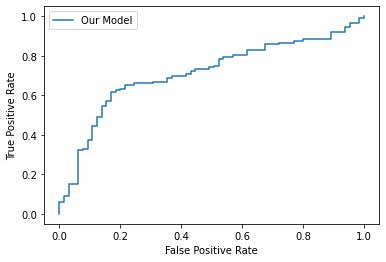

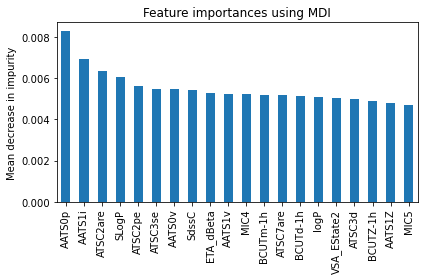

100%|███████████████████████████████████████████| 11/11 [10:39<00:00, 58.17s/it]


In [113]:
#Models to predict DILI with Physicochemical
list_of_lists=[]
baseline=0.50
for i in tqdm(range(42,53)):
    
    print(i)
    outercv = KFold(n_splits=5, random_state=i, shuffle=True) 
    for split, (train_index, test_index) in enumerate(outercv.split(X_ncv)):
            
        print(split)
        X_train= X_ncv[train_index]
        y_train= y_ncv[train_index]

        X_test= X_ncv[test_index]
        y_test= y_ncv[test_index]

        inner_cv = KFold(n_splits=4, random_state=i, shuffle=True) 

        #Hyperparameter Optimisation
        rf = RandomForestClassifier(n_jobs=-1, random_state=i)
        # Instantiate the RandomHalving search model
        param_dist_grid = { 
                'max_depth': randint(5, 20),
                'max_features': randint(30, 50),
                'min_samples_leaf': randint(5, 15),
                'min_samples_split': randint(5, 15),
                'n_estimators':[200, 300, 400, 500, 600],
                'bootstrap': [True, False],
                'oob_score': [False],
                'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'n_jobs': [40],
                'class_weight' : [None, 'balanced_subsample', 'balanced']}

        rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                    factor=2, random_state=i, n_jobs=40, verbose=0, cv = inner_cv)
        rsh.fit(X_train, y_train)
        classifier = rsh.best_estimator_
        classifier.fit(X_train, y_train)

        #Threshold Balancing
        cross_val_prob_cp = cross_val_predict(classifier, X_train, y_train, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
        # calculate roc curves
        fpr, tpr, thresholds = roc_curve(y_train, cross_val_prob_cp)
        # get the best threshold
        J = tpr - fpr
        ix = argmax(J)
        best_thresh_cp = thresholds[ix]
        print('Best Threshold=%f' % (best_thresh_cp))


        y_proba = classifier.predict_proba(X_test)[:,1]
        y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        print(classification_report(y_test, y_pred))
        ba =balanced_accuracy_score(y_test, y_pred)
        print('balanced_accuracy_score ',ba)
        mcc=matthews_corrcoef(y_test, y_pred)
        print('matthews_corrcoef ',mcc)

        # Sensitivity, hit rate, recall, or true positive rate
        Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        # Specificity or true negative rate
        Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

        f1= metrics.f1_score(y_test, y_pred)
        pos_LR = Sensitivity / (1 - Specificity) 
        ppv= metrics.precision_score(y_test, y_pred, average='binary')

        print("Sensitivity", Sensitivity)
        print("Specificity", Specificity)
        print("f1", f1)
        print("LR+", pos_LR)
        print("ppv", ppv)

        average_precision_score=metrics.average_precision_score(y_test, y_proba)
        print("average_precision_score", average_precision_score)


        auc= roc_auc_score(y_test, y_proba)
        print("roc_auc_score", auc)    
        # calculate roc curves
        best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_proba)
        # plot the roc curve for the model
        plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        if (auc>baseline):
                    # save
                    print("saving model")
                    baseline=auc
                    pickle.dump(classifier, open("dili_NCV_bestMordredPC_model.sav",  'wb'))


        importances = classifier.feature_importances_
        forest_importances = pd.Series(importances, index=test_feature_list)

        fig, ax = plt.subplots()
        forest_importances.sort_values(ascending=False)[:20].plot.bar()
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

        plt.show()

        metrics_row=["NCV",  "DILI", i, split, ba, mcc, Sensitivity, Specificity, auc, f1, pos_LR, ppv, average_precision_score]
        list_of_lists.append(metrics_row)


In [114]:
results = pd.DataFrame(list_of_lists, columns=["NCV",  "DILI", "i", "split", "ba", "mcc", "Sensitivity"
                                                       , "Specificity", "auc", "f1", "pos_LR", "ppv", 
                                                       "average_precision_score"])
results["Features"] = "MordredPC"
results.to_csv("NCV_models_MordredPC.csv", index=False)
results

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0   NCV  DILI  42      0  0.628591  0.250776     0.584615     0.672566   
1   NCV  DILI  42      1  0.652308  0.280017     0.627451     0.677165   
2   NCV  DILI  42      2  0.616474  0.227146     0.569231     0.663717   
3   NCV  DILI  42      3  0.679974  0.359120     0.707317     0.652632   
4   NCV  DILI  42      4  0.561126  0.121159     0.461538     0.660714   
5   NCV  DILI  43      0  0.627342  0.238709     0.607143     0.647541   
6   NCV  DILI  43      1  0.651839  0.304007     0.716049     0.587629   
7   NCV  DILI  43      2  0.605386  0.197871     0.571429     0.639344   
8   NCV  DILI  43      3  0.658104  0.303890     0.746032     0.570175   
9   NCV  DILI  43      4  0.680159  0.354051     0.722222     0.638095   
10  NCV  DILI  44      0  0.652683  0.296563     0.656716     0.648649   
11  NCV  DILI  44      1  0.614583  0.223132     0.562500     0.666667   
12  NCV  DILI  44      2  0.678298  0.352010     0.626866     0.729730   
13  NCV  DILI  44      3  0.689583  0.357590     0.706897     0.672269   
14  NCV  DILI  44      4  0.601190  0.199371     0.583333     0.619048   
15  NCV  DILI  45      0  0.622807  0.248335     0.500000     0.745614   
16  NCV  DILI  45      1  0.611225  0.225621     0.519481     0.702970   
17  NCV  DILI  45      2  0.602001  0.195356     0.526316     0.677686   
18  NCV  DILI  45      3  0.610902  0.225282     0.476190     0.745614   
19  NCV  DILI  45      4  0.658209  0.307179     0.716418     0.600000   
20  NCV  DILI  46      0  0.630817  0.270860     0.484848     0.776786   
21  NCV  DILI  46      1  0.608616  0.206014     0.683333     0.533898   
22  NCV  DILI  46      2  0.675289  0.348403     0.846154     0.504425   
23  NCV  DILI  46      3  0.700343  0.387051     0.784615     0.616071   
24  NCV  DILI  46      4  0.609921  0.216018     0.638889     0.580952   
25  NCV  DILI  47      0  0.648663  0.294351     0.588235     0.709091   
26  NCV  DILI  47      1  0.626437  0.240478     0.586207     0.666667   
27  NCV  DILI  47      2  0.665107  0.327661     0.602941     0.727273   
28  NCV  DILI  47      3  0.636591  0.267507     0.571429     0.701754   
29  NCV  DILI  47      4  0.593011  0.183196     0.563380     0.622642   
30  NCV  DILI  48      0  0.575707  0.147208     0.507937     0.643478   
31  NCV  DILI  48      1  0.606103  0.217005     0.478261     0.733945   
32  NCV  DILI  48      2  0.661698  0.314410     0.619048     0.704348   
33  NCV  DILI  48      3  0.665348  0.322245     0.606557     0.724138   
34  NCV  DILI  48      4  0.642857  0.280709     0.666667     0.619048   
35  NCV  DILI  49      0  0.628838  0.247551     0.687500     0.570175   
36  NCV  DILI  49      1  0.621164  0.240663     0.557143     0.685185   
37  NCV  DILI  49      2  0.682265  0.365217     0.626667     0.737864   
38  NCV  DILI  49      3  0.660910  0.294836     0.716981     0.604839   
39  NCV  DILI  49      4  0.650082  0.291087     0.651515     0.648649   
40  NCV  DILI  50      0  0.584559  0.170510     0.442623     0.726496   
41  NCV  DILI  50      1  0.606875  0.219583     0.461538     0.752212   
42  NCV  DILI  50      2  0.667055  0.329950     0.693333     0.640777   
43  NCV  DILI  50      3  0.644698  0.284050     0.647887     0.641509   
44  NCV  DILI  50      4  0.633633  0.271383     0.482143     0.785124   
45  NCV  DILI  51      0  0.617112  0.242817     0.470588     0.763636   
46  NCV  DILI  51      1  0.678476  0.346873     0.720588     0.636364   
47  NCV  DILI  51      2  0.653826  0.302064     0.694444     0.613208   
48  NCV  DILI  51      3  0.676471  0.322424     0.686275     0.666667   
49  NCV  DILI  51      4  0.596014  0.187336     0.608696     0.583333   
50  NCV  DILI  52      0  0.617909  0.227140     0.580645     0.655172   
51  NCV  DILI  52      1  0.615795  0.222127     0.559322     0.672269   
52  NCV  DILI  52      2  0.636765  0.270792     0.573529     0.700000   
53  NCV 

In [115]:
results.describe()

i      split         ba        mcc  Sensitivity  Specificity  \
count  55.000000  55.000000  55.000000  55.000000    55.000000    55.000000   
mean   47.000000   2.000000   0.636788   0.267582     0.612476     0.661100   
std     3.191424   1.427248   0.031550   0.060520     0.092035     0.062648   
min    42.000000   0.000000   0.561126   0.121159     0.442623     0.504425   
25%    44.000000   1.000000   0.612904   0.224207     0.560911     0.620845   
50%    47.000000   2.000000   0.633633   0.270792     0.607143     0.660714   
75%    50.000000   3.000000   0.661304   0.310795     0.689904     0.703659   
max    52.000000   4.000000   0.700343   0.387051     0.846154     0.785124   

             auc         f1     pos_LR        ppv  average_precision_score  
count  55.000000  55.000000  55.000000  55.000000                55.000000  
mean    0.678866   0.698935   1.832813   0.747285                 0.764701  
std     0.035430   0.035953   0.237203   0.043375                 0.041011  
min     0.600828   0.614525   1.360324   0.657407                 0.665548  
25%     0.655615   0.675249   1.690106   0.719674                 0.736272  
50%     0.674603   0.700935   1.797601   0.745098                 0.755402  
75%     0.707733   0.726798   1.993282   0.769673                 0.794166  
max     0.752747   0.775510   2.390617   0.850746                 0.859160

In [116]:
loaded_rf = pickle.load(open("dili_NCV_bestMordredPC_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(max_depth=15, max_features=44, min_samples_leaf=14,
                       min_samples_split=5, n_estimators=600, n_jobs=40,
                       random_state=42)

Best Threshold=0.645754
[[42 25]
 [74 82]]
              precision    recall  f1-score   support

           0       0.36      0.63      0.46        67
           1       0.77      0.53      0.62       156

    accuracy                           0.56       223
   macro avg       0.56      0.58      0.54       223
weighted avg       0.64      0.56      0.57       223

balanced_accuracy_score  0.5762533486414083
matthews_corrcoef  0.13994833408240473
Sensitivity 0.6268656716417911
Specificity 0.5256410256410257
f1 0.623574144486692
LR+ 1.3215006050826947
ppv 0.7663551401869159
average_precision_score 0.7819231097276214
roc_auc_score 0.6083046306926904


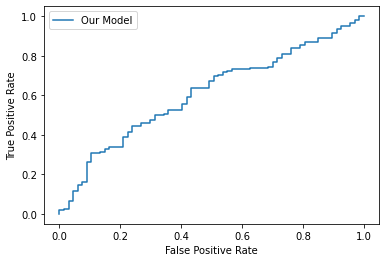

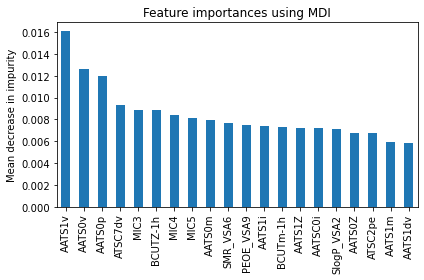

In [117]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

f1= metrics.f1_score(y_heldouttest, y_pred)
pos_LR = Sensitivity / (1 - Specificity) 
ppv= metrics.precision_score(y_heldouttest, y_pred, average='binary')

print("Sensitivity", Sensitivity)
print("Specificity", Specificity)
print("f1", f1)
print("LR+", pos_LR)
print("ppv", ppv)

average_precision_score=metrics.average_precision_score(y_heldouttest, y_proba)
print("average_precision_score", average_precision_score)

print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [118]:
#Final model released on all data
loaded_rf = pickle.load(open("dili_NCV_bestMordredPC_model.sav", 'rb'))
params = loaded_rf.get_params()
    
final_classifier= RandomForestClassifier(**params)
final_classifier.fit(X_dili, y_dili)
pickle.dump(final_classifier, open("final_dili_bestMordredPC_model.sav",  'wb'))